# Analyzing and Visualizing Ford GoBike System Data (February 2019)

### presented by Sherif Elghazawy

## Table of Contents
- [Introduction](#intro)
- [Investigation Overview](#investigate)
- [Wrangling Data](#wrangling)
- [Dataset Overview](#overview)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)
- [Sources](#sources)

<a id='intro'></a>
## Introduction

> Ford GoBike (also known as Bay Wheels system) is a regional public bicycle sharing system in California's San Francisco Bay Area and was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose.

> Ford GoBike consists of a fleet of specially designed, environment-friendly and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.

> People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

> The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> In June 2017, the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

<a id='investigate'></a>
## Investigation Overview
> In this investigation of the Ford GoBike System, I would like to explore the most influential customer behaviors and characteristics, such as user type, gender and age, as well as features like ride duration, timing, distance, stations, and whether the whole ride used GoBike bike or not. Finally, I will investigate how these attributes impact the usage of Bay Wheels system.

<a id='import'></a>
## Importing Data and Libararies

In [2]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import math

%matplotlib inline

<a id='overview'></a>
## Dataset Overview
>- The data consisted of 183,412 rows and 16 attributes for 183,412 bike rides. The attributes include the ride statistics, such as ride duration, ride start and end time, and station information and coordinates, user information, such as user type, birth day, and gender, as well as additional features such as bike id and bike share. 17,318 missing data points were imputed, rather than being removed from the analysis as these rows, including these NaN values, are used in analyzing and ploting other attributes of interest.

>- After wrangling the dataset, the total number of columns has become 27, instead of 16, as we have extracted 11 attributes to facilitate our exploratory analysis and visualization.

In [3]:
# import data and show the head rows
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
# check the structure of the dataset
df.shape

(183412, 16)

<a id='wrangling'></a>
## Wrangling Data
> In this section, I will assess the dataset and clean the data so that we have a tidy and consistent dataset.

### First, let's start assessing our dataset.

In [5]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Insight:
> There are some attributes with impropor data types, they need to be converted as below:
> - start_time and end_time: From Object To Datetime
> - user_type, member_gender and bike_share_for_all_trip: From Object To Category

In [6]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# check missing values
print('Total Missing Values:', df.isnull().sum().sum())
df.isnull().sum()

Total Missing Values: 17318


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Insight:
> There is no duplicates in the dataset.

> The total of missing values in the dataset is 17,318. Missing values are included in attributes: 'start_station_id','start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year, and 'member_gender'.

> Deleting the entire rows and/or columns with missing values may cause losing valuable data. A better strategy is to impute the missing values. Source: [Handling Missing Values](https://hrngok.github.io/posts/missing%20values/)

In [8]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

### Now, let's start cleaning our dataset:
In this part of cleaning data, we will perform some necessary changes to the original dataframe. These changes will include dropping start and end stations id columns, converting incorrect data types to correct ones, imputing missing values, and extracting some new attributes from the existing ones that can support and add value to the exploratory analysis.

- **1- Dropping Station Ids**

In [9]:
# dropping columns: 'start_station_id' and 'end_station_id'
df.drop(['start_station_id', 'end_station_id'], axis = 1, inplace = True)

- **2- Converting incorrect data types to correct ones**

In [10]:
# converting incorrect data types to correct ones
# start_time and end_time: From Object To Datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# user_type, member_gender and bike_share_for_all_trip: From Object To Category
df['user_type'] = df['user_type'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')


- **3- Imputing and filling up missing values**

In [11]:
# imputing and filling up missing values
# filling up missing values in 'start_station_name', 'end_station_name' and 'member_gender' with 'Not Defined'
df.start_station_name.fillna("Not_Defined", inplace = True)
df.end_station_name.fillna("Not_Defined", inplace = True)

# filling up missing values in 'member_birth_year' with '0'
df.member_birth_year.fillna(0, inplace = True)

In [12]:
# Imputing categorical variable needs to fill NaN values in 'member_gender' with 'Not_Defined' 
# and store it as string first then converting it to category
df['member_gender'].fillna("Not_Defined", inplace = True)
# converting 'member_gender' to category
df['member_gender'] = df['member_gender'].astype('category')

In [13]:
# confirm changes are applied
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- **4. Extracting the following new attributes from the existing features:**
> - Duration Minute and Duration Hour
> - Start Time Hour, Start Time Day, Start Time Weekday and Start Time Month
> - End Time Hour, End Time Day, End Time Weekday and End Time Month
> - Member Age
> - Distance(km)

**4.1. Extracting duration and time new attributes**

In [14]:
# extracting duration in minutes and rounding to decimal of 2 points
df['duration_minute'] = df['duration_sec']/60
df['duration_minute'] = df['duration_minute'].round(2)
# extracting duration in hour and rounding to decimal of 2 points
df['duration_hour'] = df['duration_minute']/60
df['duration_hour'] = df['duration_hour'].round(2)

In [15]:
# extracting start and end time in day hour, day, weekday and month
# extracting start and end time in day hour
df['start_time_hour'] = df.start_time.dt.strftime('%H').astype('int')
df['end_time_hour'] = df.end_time.dt.strftime('%H').astype('int')

# extracting start and end time in day
df['start_time_day'] = df.start_time.dt.day
df['end_time_day'] = df.end_time.dt.day

# extracting start and end  time in weekday
df['start_time_weekday'] = df.start_time.dt.strftime('%A')
df['end_time_weekday'] = df.end_time.dt.strftime('%A')

# extracting start and end time in month
df['start_time_month'] = df.start_time.dt.strftime('%B')
df['end_time_month'] = df.end_time.dt.strftime('%B')

**4.2 Extracting member age attribute**

In [16]:
# extracting members age and replacing age values with 2019 # which previously imputed with 0 value
# in place of NaN values and finaly converting age to int datatype
df['member_age'] = 2019 - df['member_birth_year']
df['member_age'] = df['member_age'].replace(to_replace = 2019, value = 0).astype('int64')

**4.3 Extracting distance in kilometers**
> Thanks to `Haversine formula coded by Wayne Dyck`. I have used this code to calculate distance between-latitude longitude pairs with Python


In [17]:
# Use Haversine formula coded by Wayne Dyck to calculate distance between latitude-longitude pairs with Python

import math
from math import radians, sin, cos, acos

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [18]:
# extracting distance in kilometers
df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']),
                                                (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

### Wrangling Data Summary:
> **We have assessed data types and corrected the incorrect ones:**
> - start_time and end_time: From Object To Datetime.
> - user_type, member_gender and bike_share_for_all_trip: From Object To Category.


> **We have imputed and filled up the missing values to ignore losing valuable data related to our attributes of interest:**
> - Filled up missing values in 'start_station_name', 'end_station_name' and 'member_gender' with 'Not Defined'.
> - Filled up missing values in 'member_birth_year' with '0'
> - Filled up missing values in 'member_gender' with 'Not_Defined'


> **We have Extracted the following new attributes from the existing features:**
> - Duration Minute and Duration Hour.
> - Start Time Hour, Start Time Day, Start Time Weekday and Start Time Month.
> - End Time Hour, End Time Day, End Time Weekday and End Time Month.
> - Member Age.
> - Distance(km).

> **Accordingly, the structure of the dataset has changed as follows:**
> - Total number of columns has become 26 as shown in the next info cell, instead of 16, as we have droped 2 attributes and extracted 12 attributes to facilitate our exploratory analysis and visualization.
> - The dataset becomes very tidy with no missing data or wrong data types.

In [19]:
# check the final structure of the dataset after wrangling the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183412 non-null  object        
 4   start_station_latitude   183412 non-null  float64       
 5   start_station_longitude  183412 non-null  float64       
 6   end_station_name         183412 non-null  object        
 7   end_station_latitude     183412 non-null  float64       
 8   end_station_longitude    183412 non-null  float64       
 9   bike_id                  183412 non-null  int64         
 10  user_type                183412 non-null  category      
 11  member_birth_year        183412 non-null  float64       
 12  member_gender   

# Exploratory Analysis and Visualization
### What is/are the main feature(s) of interest in your dataset?

The main features that I am most interested in include ride durations, ride times, ride stations and distance, and user types and characteristics. My investigation is primarily to explore the patterns and correlations in these features and how the user behaviors and characteristics in relation to these features influence the usage of GoBike system. I will explore the dataset with a goal to answer the rsearch questions: When are most trips taken in terms of time of day, day of the week, or month of the year?, How long does the average trip take? and Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The supportive features that can facilitate the investigation and exploration of the features of interest include:
- User characteristics in terms of user type, member gender, and member age can help explore how these information is associated with other features.
- Ride duration in terms of seconds, minutes and hours can support in identifying how long a trip takes.
- Ride start and end times in terms of hour, day, weekday, and month can support in identifying the timing of most trips.
- Ride stations and distance can help explore the major stations riders travel from/to and the average distance they travel.
- Bike id and bike share can help identify if there is a specific pattern of bike usage.

### Now, let's srart our exploration and visualization journey

<a id='univariate'></a>
## Univariate Exploration

> In this exploration, I will investigate and plot the data distribution of the most influential variables in the dataset individually, one feature at a time.

## 1. Ride Duration 

### 1.1 Duration in seconds:
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

In [20]:
# check duration in seconds summary statistics and summary statistics to a scale of log10
(df.duration_sec.describe(), np.log10(df['duration_sec'].describe()))

(count    183412.000000
 mean        726.078435
 std        1794.389780
 min          61.000000
 25%         325.000000
 50%         514.000000
 75%         796.000000
 max       85444.000000
 Name: duration_sec, dtype: float64,
 count    5.263428
 mean     2.860984
 std      3.253917
 min      1.785330
 25%      2.511883
 50%      2.710963
 75%      2.900913
 max      4.931682
 Name: duration_sec, dtype: float64)

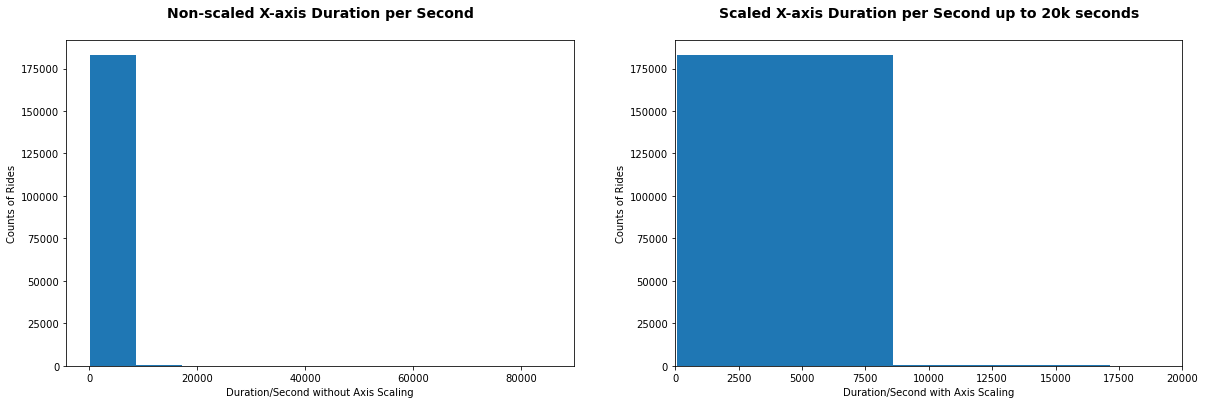

In [21]:
# plotting Duration in seconds
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration/Second without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Duration per Second", y=1.05, fontsize=14, fontweight='bold');


# HISTOGRAM ON RIGHT: data with x axis limits 
plt.subplot(1,2, 2)
plt.hist(data = df, x = 'duration_sec')
# x-axis scale limit
plt.xlim(0,20000)
plt.xlabel('Duration/Second with Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis Duration per Second up to 20k seconds", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Durations/second is highly skewed and clustered to the left in a long-normal distribution and most of the data falls below 10k seconds for more than 175k of the rides.
> - Changing the x-axis limit shows that data is clustered in position between 7.5k-10k seconds.
> - Accordingly, I have decided to transform the x-axis to explore the data distribution in depth as follows.

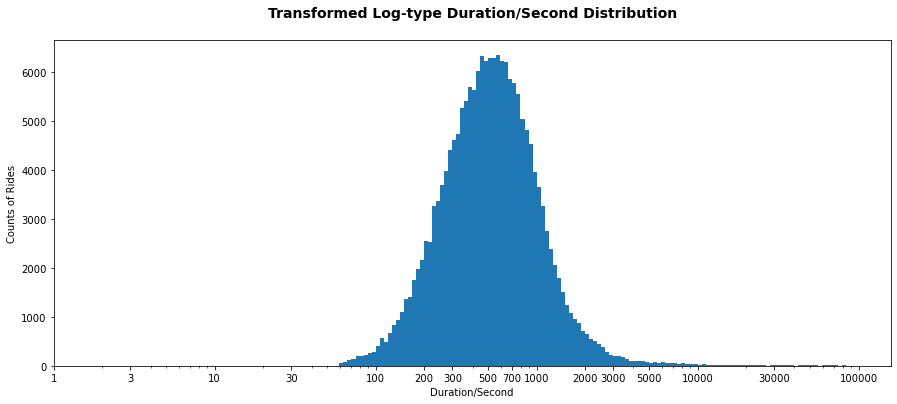

In [22]:
# Axis transformation: x axis scaled and transformed to log-type for Duration in seconds
# Bin size
bins = 10 ** np.arange(1, 5+0.025, 0.025)
# Generate the x-ticks you want to apply
ticks = [1, 3, 10, 30, 100, 200, 300, 500,700, 1000, 2000, 3000, 5000, 10000, 30000, 100000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=df, x='duration_sec', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Duration/Second')
plt.ylabel('Counts of Rides')
plt.title("Transformed Log-type Duration/Second Distribution", y=1.05, fontsize=14, fontweight='bold');

In [23]:
# find 95% statistic of duration per second 
df['duration_sec'].describe(percentiles=[.95])

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
50%         514.000000
95%        1571.000000
max       85444.000000
Name: duration_sec, dtype: float64

### Insights:
> - Transforming the x-axis shows that data is normally distributed with a little bit skewnees to the right with a mean of 726 seconds.
> - Most of the rides has a duration between 300-1000 seconds and 95% of the rides has a duration below 1571 seconds.

### 1.2 Duration in minutes
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

In [24]:
# check duration in minutes summary statistics and same summary statistics to a scale of log10
df.duration_minute.describe(), np.log10(df['duration_minute'].describe())

(count    183412.000000
 mean         12.101301
 std          29.906501
 min           1.020000
 25%           5.420000
 50%           8.570000
 75%          13.270000
 max        1424.070000
 Name: duration_minute, dtype: float64,
 count    5.263428
 mean     1.082832
 std      1.475766
 min      0.008600
 25%      0.733999
 50%      0.932981
 75%      1.122871
 max      3.153531
 Name: duration_minute, dtype: float64)

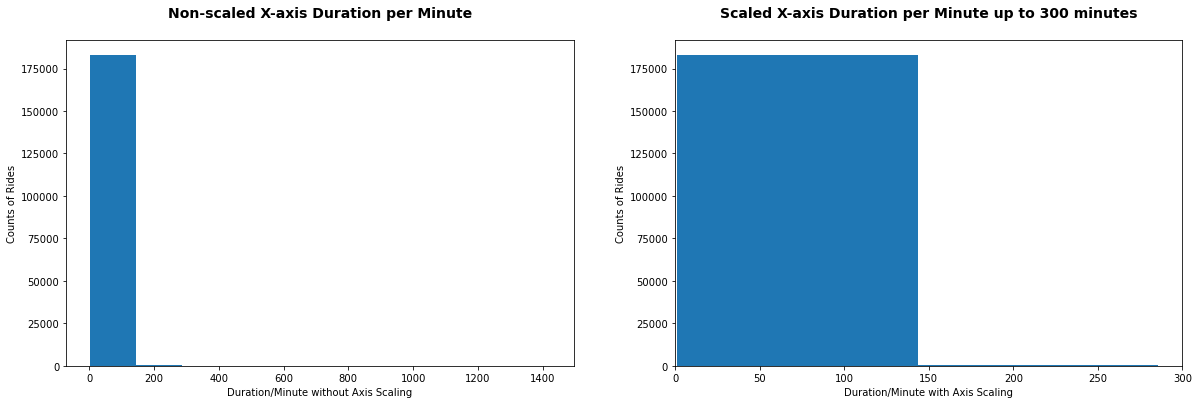

In [25]:
# plotting duration in minutes
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: Duration/Minute without Axis Scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'duration_minute')
# labels and titles
plt.xlabel('Duration/Minute without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Duration per Minute", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON RIGHT: Duration/Minute with Axis Scaling 
plt.subplot(1,2, 2)
plt.hist(data = df, x = 'duration_minute')
# x-axis scale limit
plt.xlim(0,300)
# labels and titles
plt.xlabel('Duration/Minute with Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis Duration per Minute up to 300 minutes", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Duration/minute follows the same distribution of duration/second as it has been actually extracted from it. It has a similar long-normal distribution and skewness to the right. Most of rides (175K) has <150 minutes in duration.
> - Scaling the x-axis showed up that most of the data is actually custered in the same position > 150 minutes.
> - Again, I have decided to transform the x-axis to explore the data distribution in depth as follows.

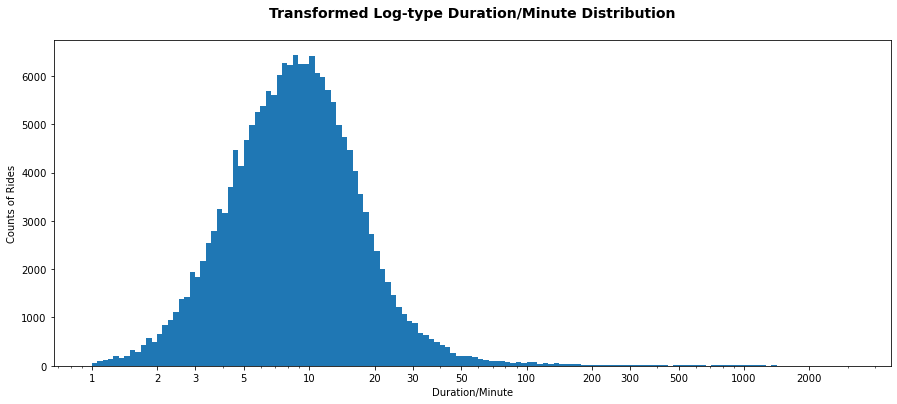

In [26]:
# Axis transformation: x axis scaled and transformed to log-type for duration/minute
# Bin size
bins = 10 ** np.arange(0, 3.5+0.025, 0.025)
# Generate the x-ticks you want to apply
ticks = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=df, x='duration_minute', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Duration/Minute')
plt.ylabel('Counts of Rides')
plt.title("Transformed Log-type Duration/Minute Distribution", y=1.05, fontsize=14, fontweight='bold');

In [27]:
# find 95% statistic of duration per minute 
df['duration_minute'].describe(percentiles=[.95])

count    183412.000000
mean         12.101301
std          29.906501
min           1.020000
50%           8.570000
95%          26.180000
max        1424.070000
Name: duration_minute, dtype: float64

### Insights:
> - Transforming the x-axis shows that data is normally distributed with a mean of 12 minutes. 
> - 95% of the rides has a duration below 26 minutes.

### 1.3 Duration in hours
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

In [28]:
# check duration in hour summary statistics and summary statistics to a scale of log10
(((df.duration_hour) * 10).describe(), np.log10(df['duration_hour'].describe()))

(count    183412.000000
 mean          2.016845
 std           4.984551
 min           0.200000
 25%           0.900000
 50%           1.400000
 75%           2.200000
 max         237.300000
 Name: duration_hour, dtype: float64,
 count    5.263428
 mean    -0.695328
 std     -0.302374
 min     -1.698970
 25%     -1.045757
 50%     -0.853872
 75%     -0.657577
 max      1.375298
 Name: duration_hour, dtype: float64)

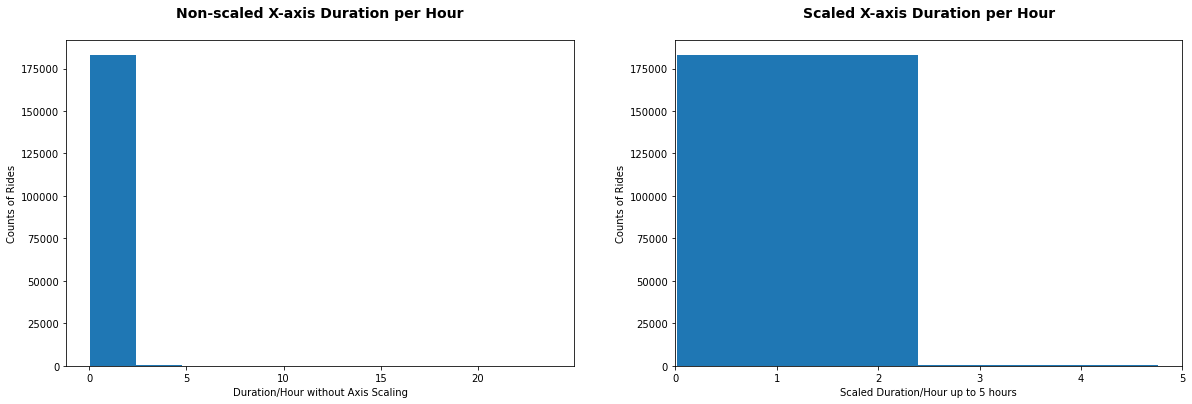

In [29]:
# plotting duration in hour
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: Duration/Hour without Axis Scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'duration_hour')
# labels and titles
plt.xlabel('Duration/Hour without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Duration per Hour", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON RIGHT: Scaled Duration/Hour up to 5 hours
plt.subplot(1,2, 2)
plt.hist(data = df, x = 'duration_hour')
# x-axis scale limit
plt.xlim(0,5)
# labels and titles
plt.xlabel('Scaled Duration/Hour up to 5 hours')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis Duration per Hour", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Duration/hour follows the same distribution of duration/second as it has been actually extracted from it. It has a similar long-normal distribution and skewness to the right. Most of rides (175K) has <2.5 hours in duration.
> - Scaling the x-axis showed up thay data actually is custered in the same position > 2.5 hours.
> - Similarly, I have decided to transform the x-axis to explore the data distribution in depth as follows.

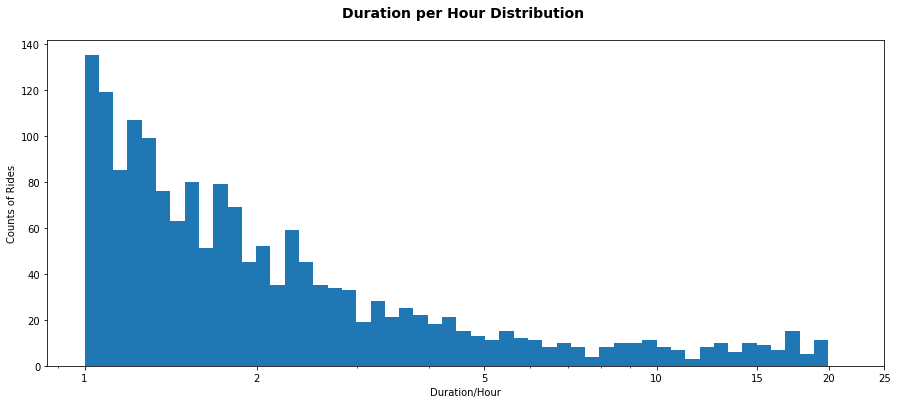

In [30]:
# Axis transformation: x axis scaled and transformed to log-type for duration/hour
# Bin size
bins = 10 ** np.arange(0, 1.3+0.025, 0.025)
# Generate the x-ticks you want to apply
ticks = [1, 2, 5, 10, 15, 20, 25]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=df, x='duration_hour', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Duration/Hour')
plt.ylabel('Counts of Rides')
plt.title("Duration per Hour Distribution ", y=1.05, fontsize=14, fontweight='bold');

In [31]:
# find 95% statistic of duration per hour 
(df['duration_hour']*10).describe(percentiles=[.95])

count    183412.000000
mean          2.016845
std           4.984551
min           0.200000
50%           1.400000
95%           4.400000
max         237.300000
Name: duration_hour, dtype: float64

### Insights:
> - Transforming the x-axis shows that data is highly skewed to the right with a mean of 2 hours.
> - 95% of the rides has a duration below 3.3 hours.

## 2. Ride Start and End Times

### 2.1 Start Time Hour and End Time Hour
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

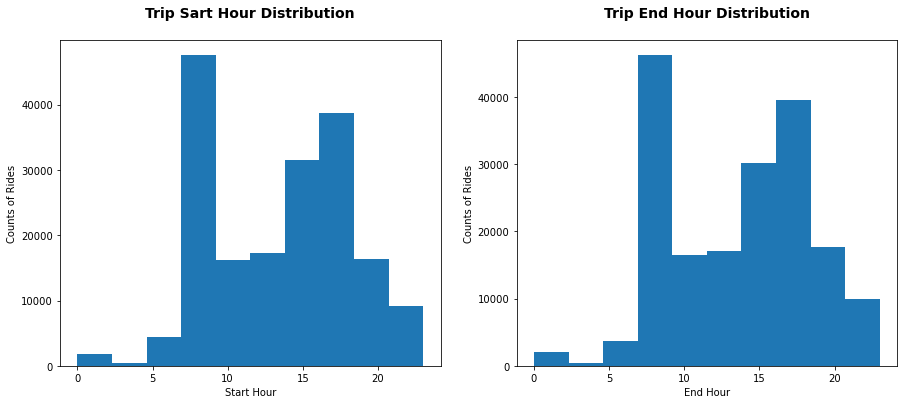

In [32]:
# plotting start and end time hour
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# BAR CHART ON LEFT: Trip Sart Hour
plt.subplot(1,2, 1)
# Bar chart for Trip Start Hour
plt.hist(data=df, x='start_time_hour', color=base_color)
# labels and titles
plt.xlabel('Start Hour')
plt.ylabel('Counts of Rides')
plt.title("Trip Sart Hour Distribution", y=1.05, fontsize=14, fontweight='bold');

# BAR CHART ON LEFT: Trip End Hour
plt.subplot(1,2, 2)
# Bar chart for Trip Start Hour
plt.hist(data=df, x='end_time_hour', color=base_color)
# labels and titles
plt.xlabel('End Hour')
plt.ylabel('Counts of Rides')
plt.title("Trip End Hour Distribution", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Start time hour and end time hour follow the same bimodel distribution with a very small skew to the left. 
> - Most of rides (50K) starts at 8-9 AM in peak one and at 2-6 PM in peak two (30k-40k rides). Similarly, Most of rides (50K) ends at 8-9 AM in peak one and at 2-6 PM in peak 2 (30k-40k rides).
> - I have decided to transform the x-axis to explore the data distribution in depth as follows.

In [33]:
# check startand end time hour summary statistics
df.start_time_hour.describe(), df.end_time_hour.describe()

(count    183412.000000
 mean         13.458421
 std           4.724978
 min           0.000000
 25%           9.000000
 50%          14.000000
 75%          17.000000
 max          23.000000
 Name: start_time_hour, dtype: float64,
 count    183412.000000
 mean         13.614769
 std           4.739638
 min           0.000000
 25%           9.000000
 50%          14.000000
 75%          18.000000
 max          23.000000
 Name: end_time_hour, dtype: float64)

In [34]:
# transform start and end time hour summary statistics to a scale of log10
np.log10(df['start_time_hour'].describe()), np.log10(df['end_time_hour'].describe())

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(count    5.263428
 mean     1.128994
 std      0.674400
 min          -inf
 25%      0.954243
 50%      1.146128
 75%      1.230449
 max      1.361728
 Name: start_time_hour, dtype: float64,
 count    5.263428
 mean     1.134010
 std      0.675745
 min          -inf
 25%      0.954243
 50%      1.146128
 75%      1.255273
 max      1.361728
 Name: end_time_hour, dtype: float64)

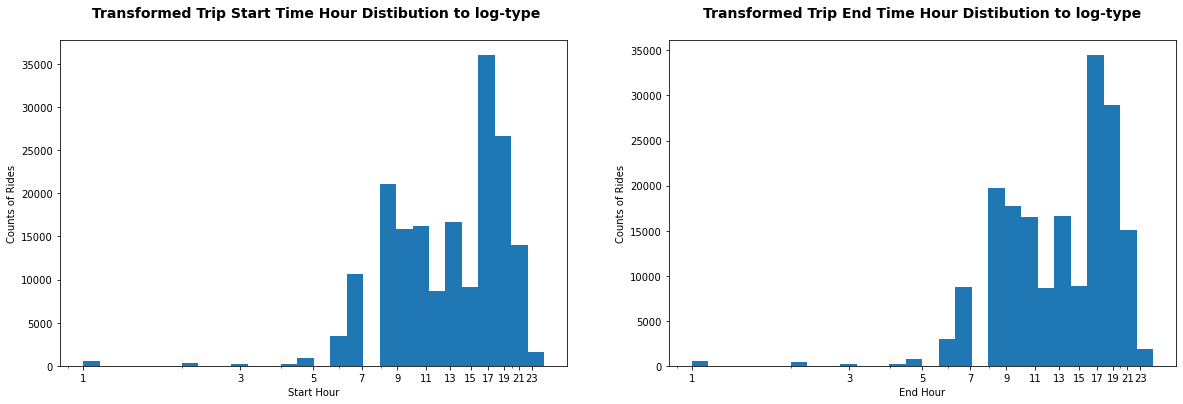

In [35]:
# Axis transformation: x axis scaled and transformed to log-type for start and end time hour
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: Trip Start Time Hour
plt.subplot(1,2, 1)
# Axis transformation: x axis scaled and transformed to log-type
# Bin size
bins = 10 ** np.arange(0, 1.4+0.025, 0.05)
# Generate the x-ticks you want to apply
ticks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=df, x='start_time_hour', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Start Hour')
plt.ylabel('Counts of Rides')
plt.title(" Transformed Trip Start Time Hour Distibution to log-type", y=1.05, fontsize=14, fontweight='bold');


# HISTOGRAM ON RIGHT: Trip End Time Hour
plt.subplot(1,2, 2)
# Axis transformation: x axis scaled and transformed to log-type
# Bin size
bins = 10 ** np.arange(0, 1.4+0.025, 0.05)

# Generate the x-ticks you want to apply
ticks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=df, x='end_time_hour', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)

# labels and titles
plt.xlabel('End Hour')
plt.ylabel('Counts of Rides')
plt.title("Transformed Trip End Time Hour Distibution to log-type", y=1.05, fontsize=14, fontweight='bold');


In [36]:
# find summary statistics of start and end time hour
df['start_time_hour'].describe(percentiles=[1]), df['end_time_hour'].describe(percentiles=[1])

(count    183412.000000
 mean         13.458421
 std           4.724978
 min           0.000000
 50%          14.000000
 100%         23.000000
 max          23.000000
 Name: start_time_hour, dtype: float64,
 count    183412.000000
 mean         13.614769
 std           4.739638
 min           0.000000
 50%          14.000000
 100%         23.000000
 max          23.000000
 Name: end_time_hour, dtype: float64)

> ### Insights:
> - Transforming start and end hours shows that they follow the same bimodel distribution skewed to the left. 
> - Most of rides (15k-25k) starts at 8-11 AM in peak one and at 1-9 PM in peak two (15k-35k rides). Similarly, Most of rides (20K) ends at 8-11 AM in peak one and at 1-9 PM in peak 2 (15k-35k rides).
> 50% of rides start before 2 PM and mean start hour is 1.45 PM and 50% of rides ends before 2 PM and mean end hour is 1.6 PM.

### 2.3 Start Time Day and End Time Day
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Bar Chart and Histogram

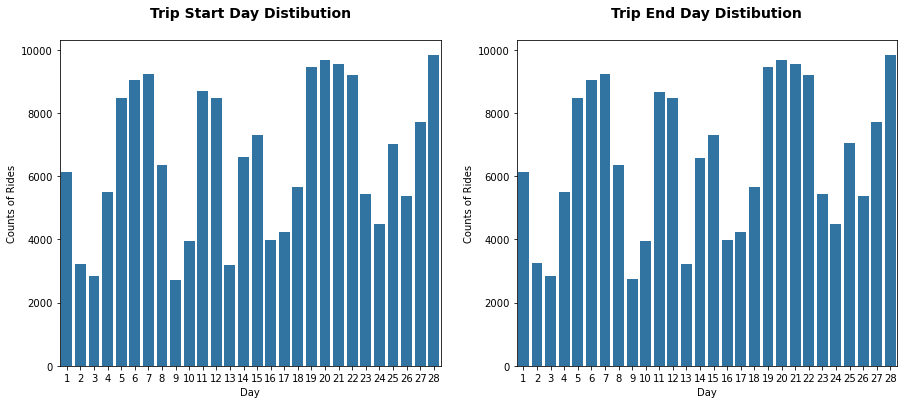

In [37]:
# plotting bar charts for start and end time days 
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

#BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
sb.countplot(data=df, x='start_time_day', color=base_color)
# labels and titles
plt.xlabel('Day')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=0)
plt.title("Trip Start Day Distibution", y=1.05, fontsize=14, fontweight='bold');

# BAR CHART ON RIGHT: Trip End Day
plt.subplot(1,2, 2)
sb.countplot(data=df, x='end_time_day', color=base_color)
# labels and titles
plt.xlabel('Day')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=0)
plt.title("Trip End Day Distibution", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Start time days with higher number of rides are 5-7, 11-12, 14-15, 19-22, 25, and 27-28 with average number of rides  of 8k-10k rides/day.
> - Similarly, End time days with higher number of rides are 5-7, 11-12, 14-15, 19-22, 25, and 27-28 with average number of rides  of 8k-10k rides/day.


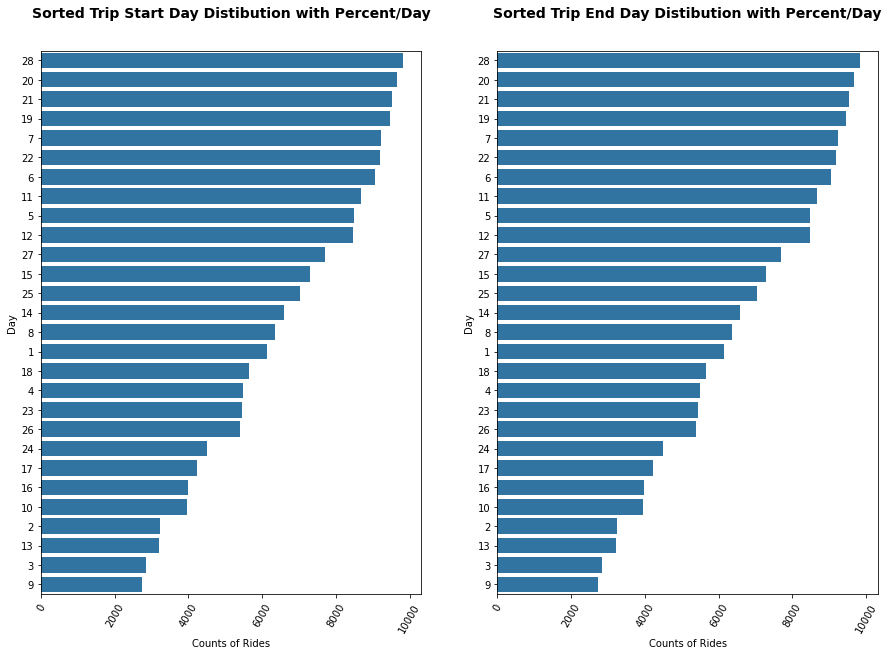

In [38]:
# plotting bar charts for sorted start and end time days 
# figure size and color palette
plt.figure(figsize =[15, 10])
base_color = sb.color_palette()[0]

# BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
# Returns the sum of all not-null values in `start_time_day` column
n_start_day = df['start_time_day'].value_counts().sum()
# Recalculating the day_counts just to have clarity.
start_counts = df['start_time_day'].value_counts()
# Get the unique values of the `start_time_day` column, in the decreasing order of the frequency.
start_order = start_counts.index
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
sb.countplot(data=df, y='start_time_day', color=base_color, order=start_order)
# labels and titles
plt.xlabel('Counts of Rides')
plt.ylabel('Day')
plt.xticks(rotation=60)
plt.title("Sorted Trip Start Day Distibution with Percent/Day", y=1.05, fontsize=14, fontweight='bold');


# BAR CHART ON RIGHT: Trip End Day
plt.subplot(1,2, 2)
# Returns the sum of all not-null values in `start_time_day` column
n_end_day = df['end_time_day'].value_counts().sum()
# Recalculating the day_counts just to have clarity.
end_counts = df['end_time_day'].value_counts()
# Get the unique values of the `start_time_day` column, in the decreasing order of the frequency.
end_order = end_counts.index
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
sb.countplot(data=df, y='end_time_day', color=base_color, order=end_order)
# labels and titles
plt.xlabel('Counts of Rides')
plt.ylabel('Day')
plt.xticks(rotation=60)
plt.title("Sorted Trip End Day Distibution with Percent/Day", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Sorting the start and end time days horizontally confirms our notes before and as follows: 
> 1. Start time days with higher number of rides are 5-7, 11-12, 14-15, 19-22, and 27-28 with average number of rides  of 8k-10k rides/day.
> 2. Similarly, End time days with higher number of rides are 5-7, 11-12, 14-15, 19-22, 25, and 27-28 with average number of rides of 8k-10k rides/day.
> - Moreover, days with lower number of rides are 2-3, 9, and 13.
> - I have decided to explore more how start and end time days are normally distributed to gain more insights.

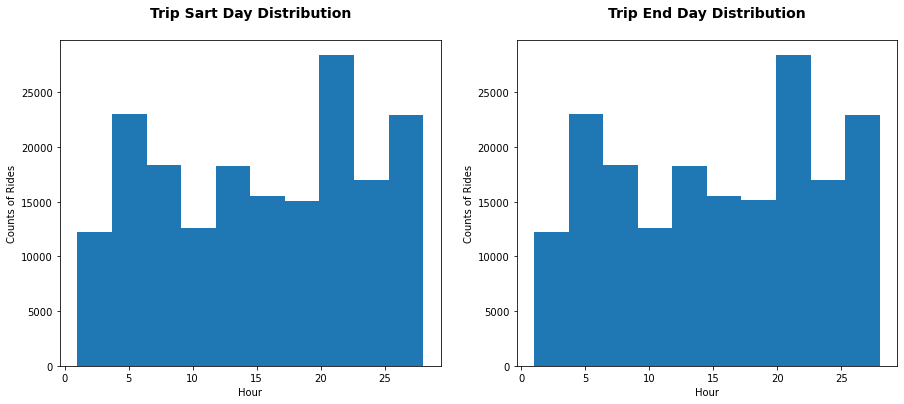

In [39]:
# plotting start and end time days
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
# Bar chart for Trip Start Day
plt.hist(data=df, x='start_time_day', color=base_color)
# labels and titles
plt.xlabel('Hour')
plt.ylabel('Counts of Rides')
plt.title("Trip Sart Day Distribution", y=1.05, fontsize=14, fontweight='bold');

# BAR CHART ON LEFT: Trip End Day
plt.subplot(1,2, 2)
# Bar chart for Trip Start Day
plt.hist(data=df, x='end_time_day', color=base_color)
# labels and titles
plt.xlabel('Hour')
plt.ylabel('Counts of Rides')
plt.title("Trip End Day Distribution", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Start time hours and end time hours follow the same bimodel distribution with a skewness to the left. 
> - Most of start time rides occurs in days 4-8, 13-15, 20-22, and 25-28. Similarly, Most of end time rides occurs in days 4-8, 13-15, 20-22
> - I have decided to transform the x-axis to explore the data distribution in depth as follows.

In [40]:
# check start time day summary statistics
df.start_time_day.describe(), df.end_time_day.describe()

(count    183412.000000
 mean         15.298977
 std           8.028187
 min           1.000000
 25%           8.000000
 50%          15.000000
 75%          22.000000
 max          28.000000
 Name: start_time_day, dtype: float64,
 count    183412.000000
 mean         15.298279
 std           8.028355
 min           1.000000
 25%           8.000000
 50%          15.000000
 75%          22.000000
 max          28.000000
 Name: end_time_day, dtype: float64)

In [41]:
# transform start and end time day summary statistics to a scale of log10
np.log10(df['start_time_day'].describe()), np.log10(df['end_time_day'].describe())

(count    5.263428
 mean     1.184662
 std      0.904617
 min      0.000000
 25%      0.903090
 50%      1.176091
 75%      1.342423
 max      1.447158
 Name: start_time_day, dtype: float64,
 count    5.263428
 mean     1.184643
 std      0.904627
 min      0.000000
 25%      0.903090
 50%      1.176091
 75%      1.342423
 max      1.447158
 Name: end_time_day, dtype: float64)

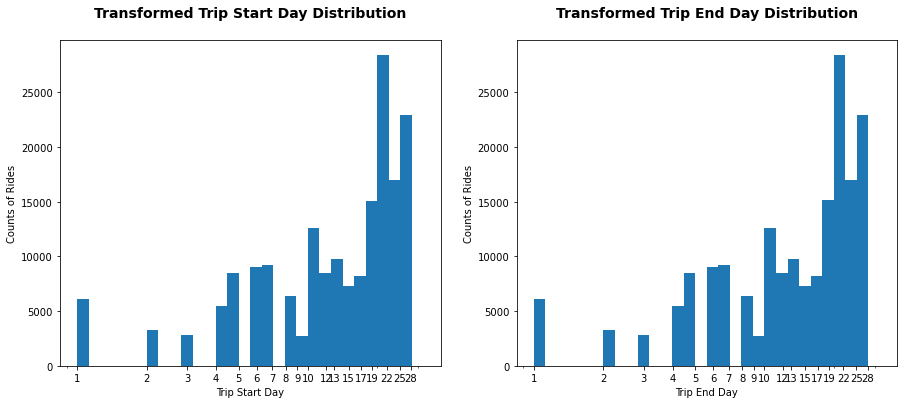

In [42]:
# plotting sorted start and end time days
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
# Axis transformation: x axis scaled and transformed to log-type for start day
# Bin size
bins = 10 ** np.arange(0, 1.5+0.05, 0.05)
# Generate the x-ticks you want to apply
ticks = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10 , 12, 13, 15, 17, 19, 22, 25, 28]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=df, x='start_time_day', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Trip Start Day')
plt.ylabel('Counts of Rides')
plt.title("Transformed Trip Start Day Distribution", y=1.05, fontsize=14, fontweight='bold');


# BAR CHART ON RIGHT: Trip End Day
plt.subplot(1,2, 2)
# Axis transformation: x axis scaled and transformed to log-type for end day
# Bin size
bins = 10 ** np.arange(0, 1.5+0.05, 0.05)
# Generate the x-ticks you want to apply
ticks = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10 , 12, 13, 15, 17, 19, 22, 25, 28]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=df, x='end_time_day', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Trip End Day')
plt.ylabel('Counts of Rides')
plt.title("Transformed Trip End Day Distribution", y=1.05, fontsize=14, fontweight='bold');

In [43]:
# check mean rides /start time day
print(df['start_time_day'].value_counts().mean())
# value counts per each end time day.mean()
print(df['end_time_day'].value_counts().mean())

# find summary statistics of start and end time day
df['start_time_day'].describe(percentiles =[1]),df['start_time_day'].describe(percentiles =[1])

6550.428571428572
6550.428571428572


(count    183412.000000
 mean         15.298977
 std           8.028187
 min           1.000000
 50%          15.000000
 100%         28.000000
 max          28.000000
 Name: start_time_day, dtype: float64,
 count    183412.000000
 mean         15.298977
 std           8.028187
 min           1.000000
 50%          15.000000
 100%         28.000000
 max          28.000000
 Name: start_time_day, dtype: float64)

### Insights:
> - Transforming start and end time days shows that follow the same bimodel distribution skewed to the left. 
> - Most of rides starts at days 4-7 in peak one, 10-13 in peak two, and 19-28 in peak three. Similarly, Most of rides ends at days 4-7 in peak one, 10-13 in peak two, and 19-28 in peak three.
> - Mean start and end time rides/day is 6,550.
> - 50% of start and end time rides occured  before day 15.

### 2.4 Start Time Weekday and End Time Weekday
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart/Waffle Plot


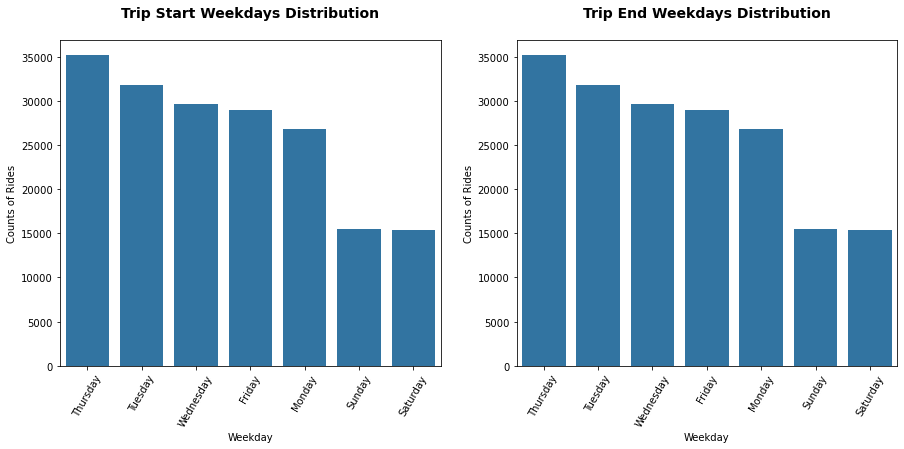

In [44]:
# plotting bar charts for start and end  time weekdays
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

#BAR CHART ON LEFT: Start Time Weekday
plt.subplot(1,2, 1)
start_weekday_order = df['start_time_weekday'].value_counts().index
sb.countplot(data=df, x='start_time_weekday', color=base_color, order = start_weekday_order)
# labels and titles
plt.xlabel('Weekday')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=60)
plt.title("Trip Start Weekdays Distribution", y=1.05, fontsize=14, fontweight='bold');

# BAR CHART ON RIGHT: End Time Weekday
plt.subplot(1,2, 2)
end_weekday_order = df['end_time_weekday'].value_counts().index
sb.countplot(data=df, x='end_time_weekday', color=base_color, order = end_weekday_order)
# labels and titles
plt.xlabel('Weekday')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=60)
plt.title("Trip End Weekdays Distribution", y=1.05, fontsize=14, fontweight='bold');

In [45]:
# weekday counts
df[['start_time_weekday', 'end_time_weekday']].value_counts()

start_time_weekday  end_time_weekday
Thursday            Thursday            35142
Tuesday             Tuesday             31780
Wednesday           Wednesday           29598
Friday              Friday              28926
Monday              Monday              26812
Sunday              Sunday              15476
Saturday            Saturday            15358
Thursday            Friday                 55
Friday              Saturday               55
Sunday              Monday                 47
Saturday            Sunday                 47
Wednesday           Thursday               43
Monday              Tuesday                40
Tuesday             Wednesday              33
dtype: int64

### Insights:
> - Both start and end time weekdays follow the same distribution.
> - Thursday is the highest weekday in terms of number of rides (35K) while Saturday and Sunday are the lowest days (15k).
> - Working weekdays (26k-35k) are higher in number of rides than weekend days (15k).
> - It seems that riders are commuters, rather than people who use bikes for fun or sports.

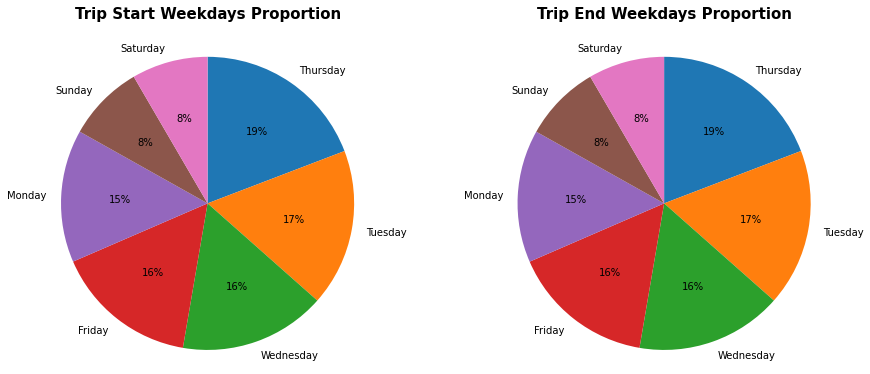

In [46]:
# plotting pie charts for start and end  time weekdays
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: Start Time Weekday
plt.subplot(1,2, 1)
start_weekday_sorted = df['start_time_weekday'].value_counts()
plt.pie(start_weekday_sorted, labels = start_weekday_sorted.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Trip Start Weekdays Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

# PIE CHART ON LEFT: End Time Weekday
plt.subplot(1,2, 2)
end_weekday_sorted = df['end_time_weekday'].value_counts()
plt.pie(end_weekday_sorted, labels = end_weekday_sorted.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Trip End Weekdays Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

In [47]:
# average counts per each start time weekday
start_weekday = df['start_time_weekday'].value_counts()
# average counts per each end time weekday
end_weekday = df['end_time_weekday'].value_counts()

print(df['start_time_weekday'].value_counts().mean())
print(df['end_time_weekday'].value_counts().mean())

# find 95% statistic of start and end time weekday
start_weekday.describe(percentiles=[.95]), end_weekday.describe(percentiles=[.95])

26201.714285714286
26201.714285714286


(count        7.000000
 mean     26201.714286
 std       7777.978073
 min      15405.000000
 50%      28981.000000
 95%      34181.800000
 max      35197.000000
 Name: start_time_weekday, dtype: float64,
 count        7.000000
 mean     26201.714286
 std       7774.019825
 min      15413.000000
 50%      28981.000000
 95%      34175.500000
 max      35185.000000
 Name: end_time_weekday, dtype: float64)

### Insights:
> - Both start and end time weekdays follow the same pie distribution.
> - Thursday is the highest weekday in terms of proportion of rides (19%) while Saturday and Sunday are the lowest days (8%/day).
> - Working weekday (15%-19%/day) are higher in proportion of rides than weekend day (8%/day).
> - Average start and end weekday rides/day is 26,201 and 95% of rides are 34,181 for start time weekday and 34,175 for end time weekday.
> - Again, It seems that riders are commuters, rather than people who use bikes for fun or sports.

### 2.5 Start Time Month and End Time Month
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart

In [48]:
# value counts per each start time month
start_month = df['start_time_month'].value_counts()
# value counts per each end time month
end_month = df['end_time_month'].value_counts()

print('Rides per Start Month: \n {}'.format(start_month))
print()
print('Rides per End Month: \n {}'.format(end_month))

#print(end_month)

Rides per Start Month: 
 February    183412
Name: start_time_month, dtype: int64

Rides per End Month: 
 February    183396
March           16
Name: end_time_month, dtype: int64


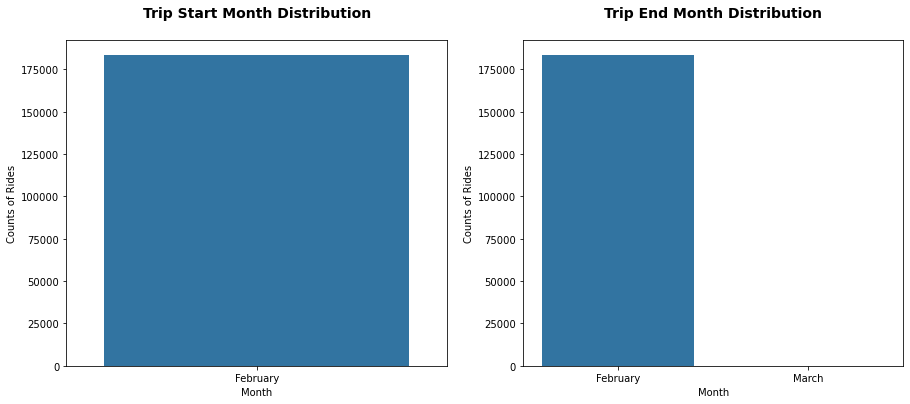

In [49]:
# plotting bar charts for start and end  time month
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

#BAR CHART ON LEFT: Start Time Month
plt.subplot(1,2, 1)
start_month_order = df['start_time_month'].value_counts().index
sb.countplot(data=df, x='start_time_month', color=base_color, order = start_month_order)
# labels and titles
plt.xlabel('Month')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=0)
plt.title("Trip Start Month Distribution", y=1.05, fontsize=14, fontweight='bold');

# BAR CHART ON RIGHT: End Time Month
plt.subplot(1,2, 2)
end_month_order = df['end_time_month'].value_counts().index
sb.countplot(data=df, x='end_time_month', color=base_color, order = end_month_order)
# labels and titles
plt.xlabel('Month')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=0)
plt.title("Trip End Month Distribution", y=1.05, fontsize=14, fontweight='bold');

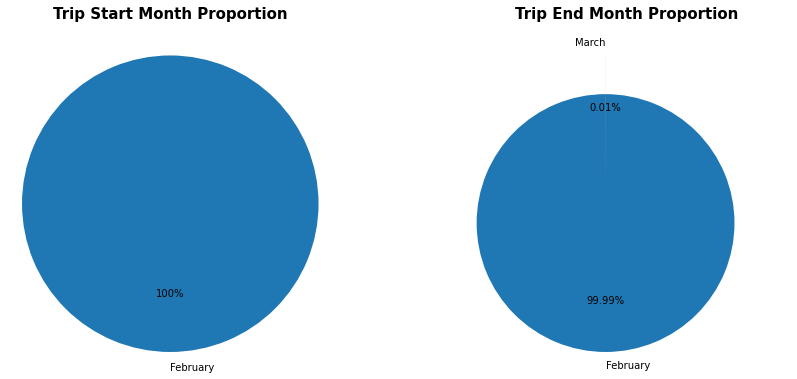

In [50]:
# plotting pie charts for start and end  time month
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: Start Time Month
plt.subplot(1,2, 1)
start_month_sorted = df['start_time_month'].value_counts()
plt.pie(start_month_sorted, labels = start_month_sorted.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Trip Start Month Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

# PIE CHART ON LEFT: End Time Month
plt.subplot(1,2, 2)
end_month_sorted = df['end_time_month'].value_counts()
plt.pie(end_month_sorted, labels = end_month_sorted.index, autopct='%0.2f%%', startangle=90, counterclock = False, explode = (0.3, 0))
plt.title("Trip End Month Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

In [51]:
# check total rides started in February and ended in March
march_rides = df.query("end_time_month == 'March'").value_counts().sum()
print('Total rides started in February and ended in March:{}'.format(march_rides))
df.query("end_time_month == 'March'")

Total rides started in February and ended in March:16


duration_sec              start_time                end_time  \
0          52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1          42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2          61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3          36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4           1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5           1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6           1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7           1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8           1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
9           1049 2019-02-28 23:49:47.699 2019-03-01 00:07:17.025   
10           458 2019-02-28 23:57:57.211 2019-03-01 00:05:35.435   
11           506 2019-02-28 23:56:55.540 2019-03-01 00:05:21.733   
12          1176 2019-02-28 23:45:12.651 2019-03-01 00:04:49.184   
13           915 2019-02-28 23:49:06.062 2019-03-01 00:04:21.867   
14           395 2019-02-28 23:56:26.848 2019-03-01 00:03:01.947   
15           208 2019-02-28 23:59:18.548 2019-03-01 00:02:47.228   

                                   start_station_name  start_station_latitude  \
0    Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                       The Embarcadero at Steuart St               37.791464   
2                             Market St at Dolores St               37.769305   
3                             Grove St at Masonic Ave               37.774836   
4                                 Frank H Ogawa Plaza               37.804562   
5                        4th St at Mission Bay Blvd S               37.770407   
6                                Palm St at Willow St               37.317298   
7                          Washington St at Kearny St               37.795393   
8                          Washington St at Kearny St               37.795393   
9                                Post St at Kearny St               37.788975   
10                                Jones St at Post St               37.787327   
11  Civic Center/UN Plaza BART Station (Market St ...               37.781074   
12                             Valencia St at 21st St               37.756708   
13                       Channing Way at Shattuck Ave               37.865847   
14                        Bancroft Way at College Ave               37.869360   
15                               Howard St at Mary St               37.781010   

    start_station_longitude  \
0               -122.400811   
1               -122.391034   
2               -122.426826   
3               -122.446546   
4               -122.271738   
5               -122.391198   
6               -121.884995   
7               -122.404770   
8               -122.404770   
9               -122.403452   
10              -122.413278   
11              -122.411738   
12              -122.421025   
13              -122.267443   
14              -122.254337   
15              -122.405666   

                                     end_station_name  end_station_latitude  \
0                      Commercial St at Montgomery St             37.794231   
1                                  Berry St at 4th St             37.775880   
2        Powell St BART Station (Market St at 4th St)             37.786375   
3                              Central Ave at Fell St             37.773311   
4                               10th Ave at E 15th St             37.792714   
5                                  Broadway at Kearny             37.798014   
6                            San Jose Diridon Station             37.329732   
7                              Valencia St at 21st St             37.756708   
8                              Valencia St at 21st St             37.756708   
9                                  Mission Playground             37.759210   
10  San Francisco Public Library (Grove St at Hyde...             37.778

### Insights:
> - All rides start at February (183,412) and most of them ends in the same month of February (183,396), except fo 16 rides ended in March.
> - 99.99% of rides ends in February and 0.01% ends in March.

## 3. Ride Stations and Distance 
### 3.1 Ride Stations
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart/Waffle Plot

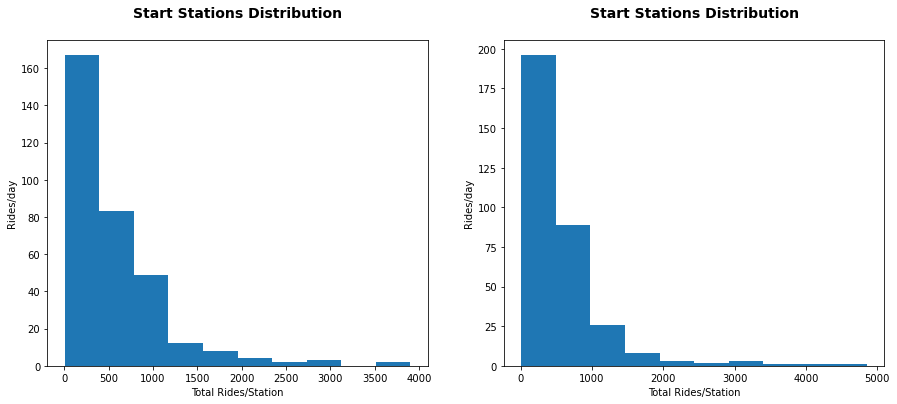

In [52]:
# plotting histogram for start and end stations 
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[15, 6])

# HISTOGRAM ON LEFT: Cluster area of start stations
plt.subplot(1,2, 1)
start_station = df['start_station_name'].value_counts().hist(grid=False, color=base_color)
# labels and titles
plt.xlabel('Total Rides/Station')
plt.ylabel('Rides/day')
plt.xticks(rotation=0)
plt.title("Start Stations Distribution", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON RIGHT: Cluster area of end stations
plt.subplot(1,2, 2)
end_station = df['end_station_name'].value_counts().hist(grid=False, color=base_color)
# labels and titles
plt.xlabel('Total Rides/Station')
plt.ylabel('Rides/day')
plt.xticks(rotation=0)
plt.title("Start Stations Distribution", y=1.05, fontsize=14, fontweight='bold');

In [53]:
# check counts of start stations and end stations and counts of total rides
df[['start_station_name', 'end_station_name']].describe()

start_station_name  \
count                 183412   
unique                   330   
top     Market St at 10th St   
freq                    3904   

                                         end_station_name  
count                                              183412  
unique                                                330  
top     San Francisco Caltrain Station 2  (Townsend St...  
freq                                                 4857

In [54]:
# check counts summary statistics of start stations and end stations/ avrg. rides per station
start_station_counts = df.start_station_name.value_counts()
end_station_counts = df.end_station_name.value_counts()
(start_station_counts.describe(percentiles =[1]), end_station_counts.describe(percentiles =[1]))

(count     330.000000
 mean      555.793939
 std       580.327064
 min         2.000000
 50%       388.500000
 100%     3904.000000
 max      3904.000000
 Name: start_station_name, dtype: float64,
 count     330.000000
 mean      555.793939
 std       629.439781
 min         5.000000
 50%       370.500000
 100%     4857.000000
 max      4857.000000
 Name: end_station_name, dtype: float64)

### Insights:
> - Both start and end stations are skewed to the right with most of rides around the mean of ~ 556 rides/station for both start and end stations. 
> - Number of rides handled by end stations (4857 rides) is greater than that of start station(3904 rides).
> - To better understand the distribution of start and end stations, I will explore how stations are clustered and how they are perfroming in each city. So, first I will visulaize their cluster in cities; then, I will plot each city/its stations.

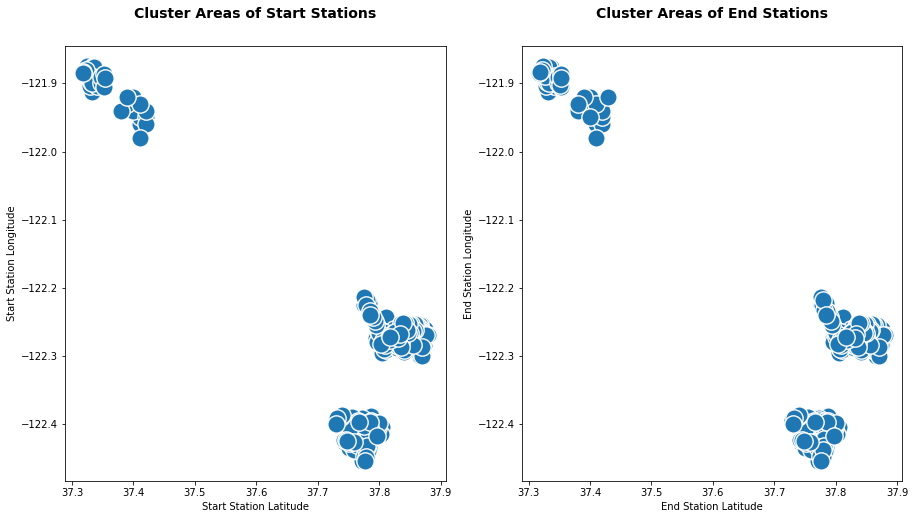

In [55]:
# plotting clustering areas of start and end stations 
# create a dataframe for start station and its latitude and longitude
start_cluster = df[['start_station_name', 'start_station_latitude', 'start_station_longitude']].value_counts()

# create a dataframe for end station and its latitude and longitude
end_cluster = df[['end_station_name', 'end_station_latitude', 'end_station_longitude']].value_counts()

# figure size 
plt.figure(figsize =[15, 8])

# SCATTER CHART ON LEFT: Cluster area of start stations
plt.subplot(1,2, 1)
# plot cluster area of start stations 
sb.scatterplot(data = start_cluster, x = "start_station_latitude", y = "start_station_longitude", s = 300)
# labels and titles
plt.xlabel('Start Station Latitude')
plt.ylabel('Start Station Longitude')
plt.xticks(rotation=0)
plt.title("Cluster Areas of Start Stations", y=1.05, fontsize=14, fontweight='bold');

# SCATTER CHART ON RIGHT: Cluster area of end stations
plt.subplot(1,2, 2)
# plot cluster area of end stations 
sb.scatterplot(data = end_cluster, x = "end_station_latitude", y = "end_station_longitude", s = 300)
# labels and titles
plt.xlabel('End Station Latitude')
plt.ylabel('End Station Longitude')
plt.xticks(rotation=0)
plt.title("Cluster Areas of End Stations", y=1.05, fontsize=14, fontweight='bold');

### Insight:
> - From top left to bottom right of the plots above, the 330 stations are clustered in San Jose, Oakland_Berkeley, and San Fransisco cities.
> - Based on longitude Coordinate, San Jose is located at latitude > -122.1, Oakland_Berkeley at longitude > -122.35 & < -122.1, and San Fransisco at longitude > -122.5 & > -122.35.
> - Accordingly, we can filter stations based on longitude and create subsets of data to mask and visualize the cluster of stations based on their city location.
> = I will user 'start_station_longitude' to create masks to filter coordinates as both start and end coordinates of stations is roughly the same.

In [56]:
# find coordinates summary statistics to identify the range of coordinates for each city
df.start_station_longitude.describe()

count    183412.000000
mean       -122.352664
std           0.117097
min        -122.453704
25%        -122.412408
50%        -122.398285
75%        -122.286533
max        -121.874119
Name: start_station_longitude, dtype: float64

In [57]:
# create 'San_Fransisco' subset based on start station latitude
San_Fransisco = df.query('start_station_longitude > -122.50000 and start_station_longitude < -122.350000') 

In [58]:
# number of total rides handled by San Fransisco stations
San_Fransisco.value_counts().sum()

133708

In [59]:
# confirm results
San_Fransisco['start_station_longitude'].describe()

count    133708.000000
mean       -122.407963
std           0.014050
min        -122.453704
25%        -122.418230
50%        -122.404904
75%        -122.395526
max        -122.385655
Name: start_station_longitude, dtype: float64

In [60]:
# create 'Oakland_Berkeley' subset based on start station latitude
Oakland_Berkeley = df.query('start_station_longitude > -122.350000 and start_station_longitude < -122.100000') 

In [61]:
# number of total rides handled by Oakland_Berkeley stations
Oakland_Berkeley.value_counts().sum()

41434

In [62]:
# confirm results
Oakland_Berkeley.start_station_longitude.describe()

count    41434.000000
mean      -122.266391
std          0.011906
min       -122.299676
25%       -122.270582
50%       -122.265896
75%       -122.258764
max       -122.213037
Name: start_station_longitude, dtype: float64

In [63]:
# create 'San_Jose' subset based on start station latitude
San_Jose = df.query('start_station_longitude > -122.100000')

In [64]:
# number of total rides handled by San Jose stations
San_Jose.value_counts().sum()

8270

In [65]:
# confirm results
San_Jose.start_station_longitude.describe()

count    8270.000000
mean     -121.890830
std         0.013038
min      -121.980000
25%      -121.895617
50%      -121.886943
75%      -121.883215
max      -121.874119
Name: start_station_longitude, dtype: float64

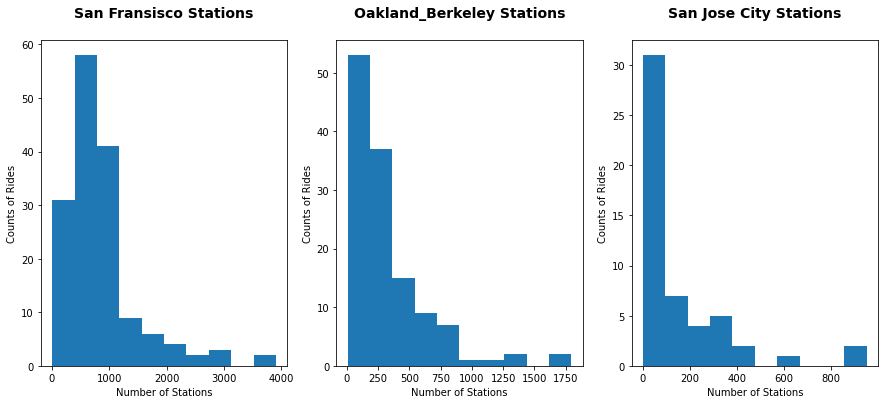

In [66]:
# plotting histogram for Start Stations' cities based on their coordinates and ride/stations
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[15, 6])

# HISTOGRAM ON LEFT: San Fransisco City
plt.subplot(1,3, 1)
San_Fransisco_stations = San_Fransisco['start_station_longitude'].value_counts().hist(grid=False, color=base_color)
# labels and title
plt.xlabel("Number of Stations")
plt.ylabel('Counts of Rides')
plt.title("San Fransisco Stations", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON MIDDLE: Oakland_Berkeley Cities
plt.subplot(1,3, 2)
Oakland_Berkeley_stations = Oakland_Berkeley['start_station_longitude'].value_counts().hist(grid=False, color=base_color)
# labels and title
plt.xlabel("Number of Stations")
plt.ylabel('Counts of Rides')
plt.title("Oakland_Berkeley Stations", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON RIGHT: San Jose City
plt.subplot(1,3,3)
San_Jose_stations = San_Jose['start_station_longitude'].value_counts().hist(grid=False, color=base_color)
# labels and title
plt.xlabel("Number of Stations")
plt.ylabel('Counts of Rides')
plt.title("San Jose City Stations", y=1.05, fontsize=14, fontweight='bold');


In [67]:
# check counts summary statistics of start stations and end stations/ avg. rides per each city stations
#San_Fransisco_stations
San_Fransisco_stations_counts = San_Fransisco.start_station_name.value_counts()
print('San_Fransisco Stations Capacity/day:{}'. format(round(San_Fransisco_stations_counts.sum()/28)))
print('San_Fransisco Stations Capacity/station/day:{}'. format(round(San_Fransisco_stations_counts.sum()/156/28)))

#Oakland_Berkeley_stations
Oakland_Berkeley_stations_counts = Oakland_Berkeley.start_station_name.value_counts()
print('Oakland_Berkeley Stations Capacity/day:{}'. format(round(Oakland_Berkeley_stations_counts.sum()/28)))
print('Oakland_Berkeley Capacity/station/day:{}'. format(round(Oakland_Berkeley_stations_counts.sum()/127/28)))

#San_Jose_stations
San_Jose_stations_counts = San_Jose.start_station_name.value_counts()
print('San Jose Stations Capacity/day:{}'. format(round(San_Jose_stations_counts.sum()/28)))
print('San Jose Stations Capacity/station/day:{}'. format(round(San_Jose_stations_counts.sum()/47/28)))

# city  summary statistics 
(San_Fransisco_stations_counts.describe(percentiles =[1]), Oakland_Berkeley_stations_counts.describe(percentiles =[1]),
 San_Jose_stations_counts.describe(percentiles =[1]))

San_Fransisco Stations Capacity/day:4775
San_Fransisco Stations Capacity/station/day:31
Oakland_Berkeley Stations Capacity/day:1480
Oakland_Berkeley Capacity/station/day:12
San Jose Stations Capacity/day:295
San Jose Stations Capacity/station/day:6


(count     156.000000
 mean      857.102564
 std       662.948109
 min         2.000000
 50%       710.000000
 100%     3904.000000
 max      3904.000000
 Name: start_station_name, dtype: float64,
 count     127.000000
 mean      326.251969
 std       321.708139
 min         4.000000
 50%       211.000000
 100%     1796.000000
 max      1796.000000
 Name: start_station_name, dtype: float64,
 count     47.000000
 mean     175.957447
 std      208.625414
 min        4.000000
 50%       94.000000
 100%     950.000000
 max      950.000000
 Name: start_station_name, dtype: float64)

#### Insights:
> - San Fransisco's stations are greater than both those of Oakland_Berkeley and San Jose in all statistics.
> - San Fransisco has 156 stations, Oakland_Berkeley have 127 stations, and San Jose has 47 stations. 
> - Avg. number of rides per day in San Fransisco is 4,774, in Oakland_Berkeley is 1,480, and in San Jose is 295.
> - Avg. number of rides per station in San Fransisco is , in Oakland_Berkeley is 1,480, and in San Jose is 295.
> - Avg. number of rides per station/day in San Fransisco is 31, in Oakland_Berkeley is 12, and in San Jose is 6.


### 3.2 Ride Distance
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

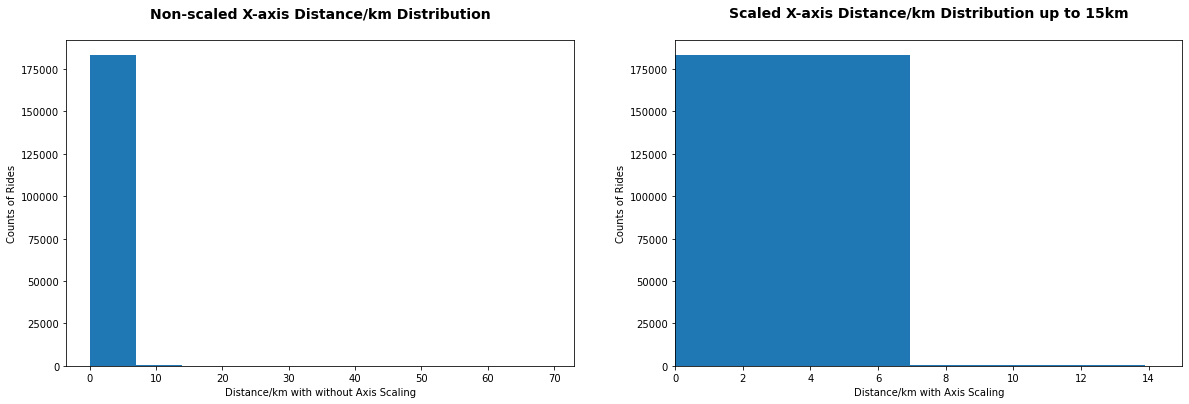

In [68]:
# plotting histogram for ride distances
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: Distance/km with without Axis Scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'distance_km')
plt.xlabel('Distance/km with without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Distance/km Distribution", y=1.05, fontsize=14, fontweight='bold');


# HISTOGRAM ON RIGHT: Distance/km with Axis Scaling
plt.subplot(1,2, 2)
plt.hist(data = df, x = 'distance_km')
# x-axis scale limit
plt.xlim(0,15)
plt.xlabel('Distance/km with Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis Distance/km Distribution up to 15km", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Ride distance distibution is highly skewed to the left with a log-normal distribution as >175k of the rides have a distance ~8km.
> - I have tried to change the scale limit of the distance to better visualize data. However, the data is highly clustered in the same position of ~7km with some outliers.
> - Finally, I have transformed the x-axis to learn more about the distance distribution as shown below.

In [69]:
# chech summary statistics and summary statistics to a scale of log10
(df.distance_km.describe(),np.log10(df['distance_km'].describe()))

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(count    183412.000000
 mean          1.690659
 std           1.097589
 min           0.000000
 25%           0.910955
 50%           1.430738
 75%           2.225687
 max          69.469241
 Name: distance_km, dtype: float64,
 count    5.263428
 mean     0.228056
 std      0.040440
 min          -inf
 25%     -0.040503
 50%      0.155560
 75%      0.347464
 max      1.841793
 Name: distance_km, dtype: float64)

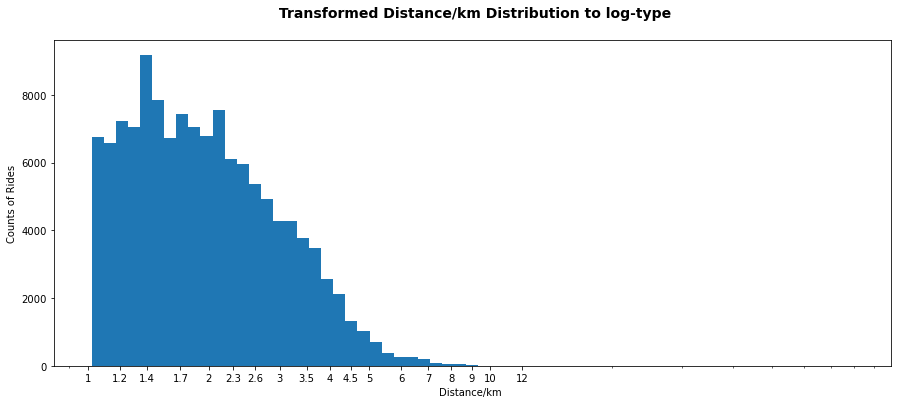

In [70]:
# Axis transformation: x axis scaled and transformed to log-type for ride distances
# Bin size
bins = 10 ** np.arange(0.01, 1.9+0.03, 0.03)
# Generate the x-ticks you want to apply
ticks = [1, 1.2, 1.4, 1.7, 2, 2.3, 2.6, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 12]
# Convert ticks into string values, to be displayed long the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=df, x='distance_km', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Distance/km ')
plt.ylabel('Counts of Rides')
plt.title(" Transformed Distance/km Distribution to log-type", y=1.05, fontsize=14, fontweight='bold');

In [71]:
# find 95% statistic of ride distances
df['distance_km'].describe(percentiles=[.95])

count    183412.000000
mean          1.690659
std           1.097589
min           0.000000
50%           1.430738
95%           3.791153
max          69.469241
Name: distance_km, dtype: float64

In [72]:
# check the number of rides per distance > 5km
dist_km = df[df['distance_km'] > 3.791153]
dist_km.shape[0]

9170

### Insights:
> - Now we have a bimodel distribution with two peaks: One from 1-1.5km and 1.5-2.6km.
> - Avg. distance/ride is 1.7km and 95% of rides has a distance of 3.8km.
> - For each distance level that ranges from 1-2.6k, there is > 6k rides/level.
> - There are 9,170 rides that have a distance above 3.8km.

## 4. Bike Id and Bike Share

###  4.1 Bike Id
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

In [73]:
# check the number of bike ids
bike_ids = df['bike_id'].value_counts()
print('Total Number of Bike Ids: {}'.format(bike_ids.size))
print('Number of Unique Bike Ids: {}'.format(df['bike_id'].nunique()))
print('Mean Rides per Bike Id: {}'.format(bike_ids.mean()))

Total Number of Bike Ids: 4646
Number of Unique Bike Ids: 4646
Mean Rides per Bike Id: 39.477399913904435


In [74]:
# check 90%  statistic of bike rides per bike id
bike_ids.describe(percentiles=[.9])

count    4646.000000
mean       39.477400
std        38.055172
min         1.000000
50%        26.000000
90%       100.500000
max       191.000000
Name: bike_id, dtype: float64

In [75]:
# check 90%  statistic of bike rides per bike id
top_ids = bike_ids[bike_ids >=100.5]
print('Top 10% of Bike Ids per Bike Rides: {}'.format(top_ids.size))


Top 10% of Bike Ids per Bike Rides: 465


In [76]:
# check 10%  statistic of bike rides per bike id
bike_ids.describe(percentiles=[.1])

count    4646.000000
mean       39.477400
std        38.055172
min         1.000000
10%         6.000000
50%        26.000000
max       191.000000
Name: bike_id, dtype: float64

In [77]:
# find lower 10% of bikes 
lower_ids = bike_ids[bike_ids <= 6]
print('Lower 10% of Bike Ids per Bike Rides: {}'.format(lower_ids.size))

Lower 10% of Bike Ids per Bike Rides: 565


In [78]:
# chech summary statistics and summary statistics to a scale of log10
(df.bike_id.describe(),np.log10(df['bike_id'].describe()))

(count    183412.000000
 mean       4472.906375
 std        1664.383394
 min          11.000000
 25%        3777.000000
 50%        4958.000000
 75%        5502.000000
 max        6645.000000
 Name: bike_id, dtype: float64,
 count    5.263428
 mean     3.650590
 std      3.221253
 min      1.041393
 25%      3.577147
 50%      3.695307
 75%      3.740521
 max      3.822495
 Name: bike_id, dtype: float64)

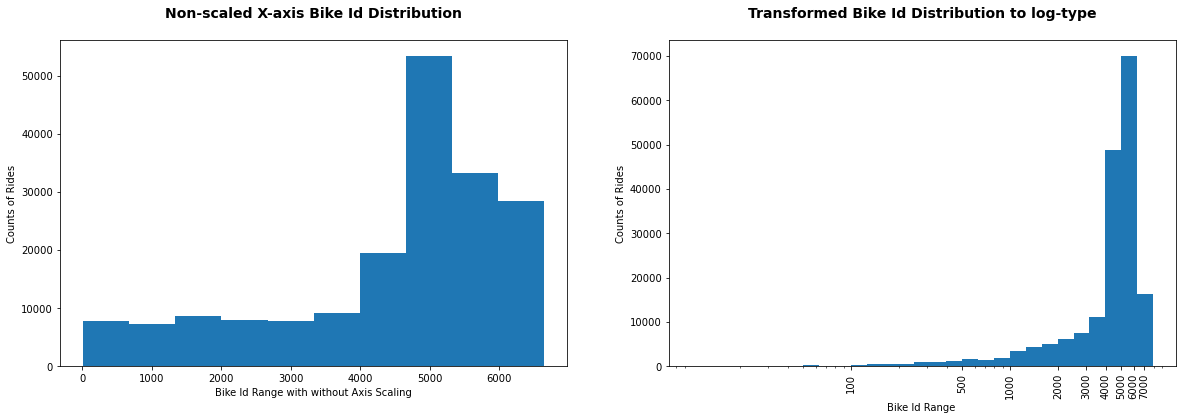

In [79]:
# plotting histogram for bike id distribution
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[20, 6])

# HISTOGRAM ON LEFT: Bike Id with without Axis Scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'bike_id')
plt.xlabel('Bike Id Range with without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Bike Id Distribution", y=1.05, fontsize=14, fontweight='bold');

# HISTOGRAM ON RIGHT: Bike Id with Axis Scaling
plt.subplot(1,2, 2)
# Axis transformation: x axis scaled and transformed to log-type for bike ids
# Bin size
bins = 10 ** np.arange(1, 3.83+0.1, 0.1)
# Generate the x-ticks you want to apply
ticks = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]

# Convert ticks into string values, to be displayed long the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='bike_id', bins=bins)

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)
plt.xticks(rotation=90)

# labels and titles
plt.xlabel('Bike Id Range ')
plt.ylabel('Counts of Rides')
plt.title("Transformed Bike Id Distribution to log-type", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Total unique number of bike ids is 4,646. 
> - Average number of rides per each bike id is 39 rides.
> - Max number of rides/bike id is 191 rides and the min is 1 rides.
> - 90% of bike ids has number of rides below 100 rides and 10% of bike ids has number of rides be 6 rides.
> - Top 10% of bike ids is 465 and lower 10% of bike ids is 565.
> - The distribution of bike ids is skewed to the right with most of bike ids clustered around 4k-6k range of most-used ids.

### 4.2 Bike Share
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart/Waffle Plot

In [80]:
# check number of rides' bike share 
share_counts = df.bike_share_for_all_trip.value_counts()
share_counts

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

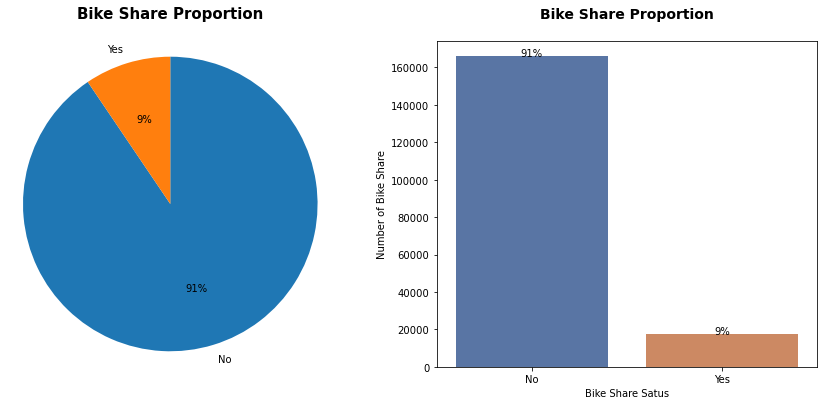

In [81]:
# plotting bar and pie charts for bike share Proportion
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: Bike Share
plt.subplot(1,2, 1)
share_sorted_counts = df['bike_share_for_all_trip'].value_counts()
plt.pie(share_sorted_counts, labels = share_sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Bike Share Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

# BAR CHART ON LEFT: Bike Share
plt.subplot(1,2, 2)
# Returns the sum of values in `bike_share_for_all_trip` column
n_share= df['bike_share_for_all_trip'].value_counts().sum()
# Recalculating the share_counts just to have clarity.
share_counts = df['bike_share_for_all_trip'].value_counts()
# Get the unique values of the `bike_share_for_all_trip` column, in the decreasing order of the frequency.
share_order = share_counts.index

# plot bar chart 
sb.countplot(data=df, x='bike_share_for_all_trip', order=share_order, palette="deep")
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 
plt.xlabel('Bike Share Satus')
plt.ylabel('Number of Bike Share')
plt.xticks(rotation=0)
plt.title("Bike Share Proportion", y=1.05, fontsize=14, fontweight='bold');

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = share_counts[label.get_text()]
    pct_string = '{:1.0f}%'.format(100*count/n_share)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    


### Insights:
> - Total number of bikes that weren't shared during the trip is 166,053 and represents 91% of total rides.
> - Total number of bikes that were shared during the trip is 17,359 and represents 9% of total rides.


## 5.User Characteristics

### 5.1 User Type
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart/Waffle Plot


In [82]:
# check number of users per user type
user_counts = df.user_type.value_counts()
user_counts

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

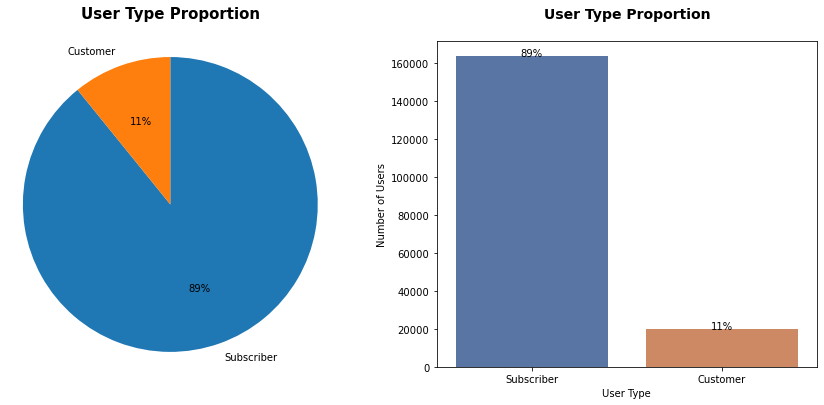

In [83]:
# plotting bar and pie charts for user types
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: User Type
plt.subplot(1,2, 1)
user_sorted_counts = df['user_type'].value_counts()
plt.pie(user_sorted_counts, labels = user_sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("User Type Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

# BAR CHART ON LEFT: User Type
plt.subplot(1,2, 2)
# Returns the sum of all not-null values in `user_type` column
n_user= df['user_type'].value_counts().sum()
# Recalculating the day_counts just to have clarity.
user_counts = df['user_type'].value_counts()
# Get the unique values of the `user_type` column, in the decreasing order of the frequency.
user_order = user_counts.index

# plot bar chart 
sb.countplot(data=df, x='user_type', order=user_order, palette="deep")
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.title("User Type Proportion", y=1.05, fontsize=14, fontweight='bold');

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:1.0f}%'.format(100*count/n_user)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    

### Insights:
> - Total number of subscribers is 163,544 and represents 89% of total users.
> - Total number of customers is 19,868 and represents 11% of total users.

### 5.2 Member Gender
> - Variable Type: Qualitative/Categorical
> - Appropariate Plot: Bar Chart and Pie Chart/Waffle Plot


In [84]:
# check number of members by females, males, and other
gender_counts = df.member_gender.value_counts()
gender_counts

Male           130651
Female          40844
Not_Defined      8265
Other            3652
Name: member_gender, dtype: int64

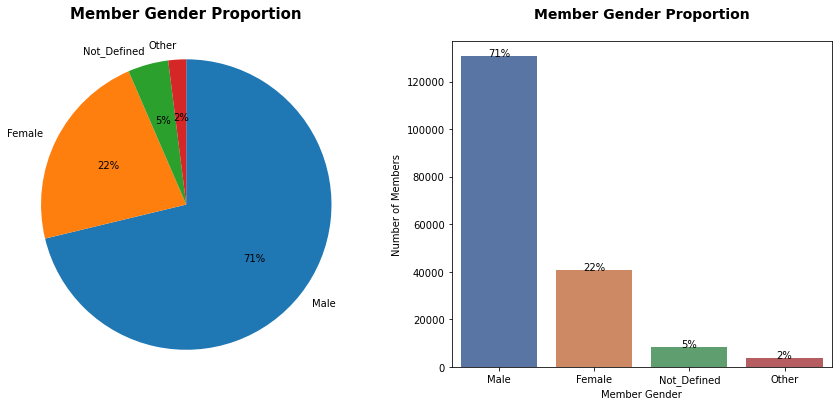

In [85]:
# plotting bar and pie charts for member genders
# figure size and color palette
plt.figure(figsize =[15, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
member_sorted_counts = df['member_gender'].value_counts()
plt.pie(member_sorted_counts, labels = member_sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Member Gender Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square');

# BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 2)
# Returns the sum of all not-null values in `member_gender` column
n_member= df['member_gender'].value_counts().sum()
# Recalculating the day_counts just to have clarity.
member_counts = df['member_gender'].value_counts()
# Get the unique values of the `member_gender` column, in the decreasing order of the frequency.
member_order = member_counts.index

# plot bar chart 
sb.countplot(data=df, x='member_gender', order=member_order, palette="deep")
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 
plt.xlabel('Member Gender')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.title("Member Gender Proportion", y=1.05, fontsize=14, fontweight='bold');

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = member_counts[label.get_text()]
    pct_string = '{:1.0f}%'.format(100*count/n_member)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    

### Insights:
> - Total number of male users is 130,651 and represents 71% of total users.
> - Total number of female users is 40,844 and represents 22% of total users.
> - Total number of nondefined users is 8,265 and represents 5% of total users.
> - Total number of other users is 3,652 and represents 2% of total users.

### 5.3 Member Age
> - Variable Type: Quantitative/Numeric
> - Appropariate Plot: Histogram

In [86]:
# check 99%  statistic of member age
df['member_age'].describe(percentiles=[.99])

count    183412.000000
mean         32.652716
std          12.167516
min           0.000000
50%          31.000000
99%          63.000000
max         141.000000
Name: member_age, dtype: float64

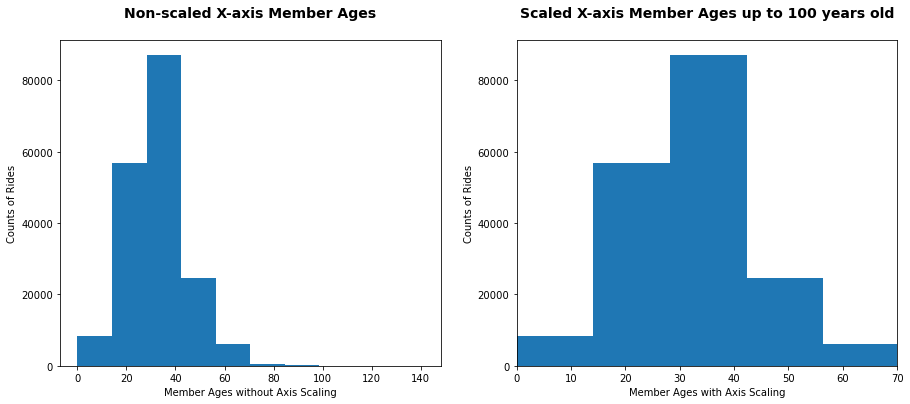

In [87]:
# plotting histogram for member ages distribution
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[15, 6])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1,2, 1)
plt.hist(data = df, x = 'member_age')
plt.xlabel('Member Ages without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis Member Ages", y=1.05, fontsize=14, fontweight='bold');


# HISTOGRAM ON RIGHT: data with x axis limits 
plt.subplot(1,2, 2)
plt.hist(data = df, x = 'member_age')
# x-axis scale limit
plt.xlim(0,70)
plt.xlabel('Member Ages with Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis Member Ages up to 100 years old", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - The member age distribution follows a skewed distribution to the right.
> Scaling the x-axis didn't change the skewed distribution so transforming x-axis may normally distribute data as follows.

In [88]:
# check member age summary statistics and summary statistics to a scale of log10
(df.member_age.describe(), np.log10(df['member_age'].describe()))

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(count    183412.000000
 mean         32.652716
 std          12.167516
 min           0.000000
 25%          26.000000
 50%          31.000000
 75%          38.000000
 max         141.000000
 Name: member_age, dtype: float64,
 count    5.263428
 mean     1.513919
 std      1.085202
 min          -inf
 25%      1.414973
 50%      1.491362
 75%      1.579784
 max      2.149219
 Name: member_age, dtype: float64)

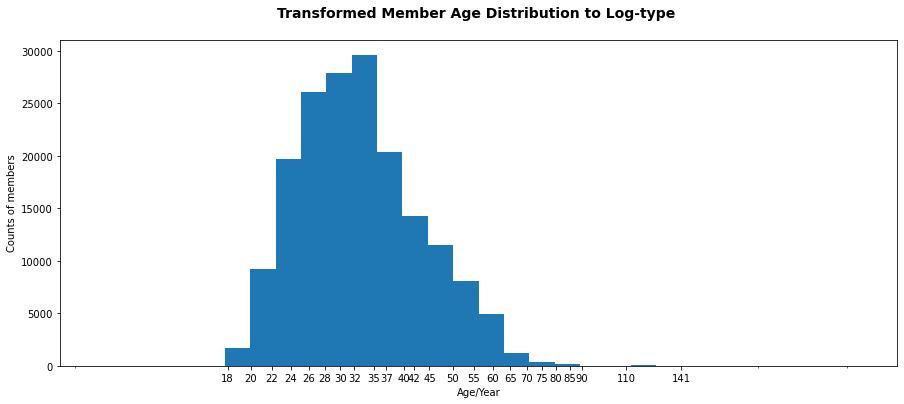

In [89]:
# Axis transformation: x axis scaled and transformed to log-type for member age
# Bin size
bins = 10 ** np.arange(1, 2.5+0.05, 0.05)
# Generate the x-ticks you want to apply
ticks = [18, 20, 22,24, 26, 28,30, 32, 35, 37, 40, 42, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 110, 141]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=df, x='member_age', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Age/Year')
plt.ylabel('Counts of members')
plt.title("Transformed Member Age Distribution to Log-type ", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Average age of members is 32 years old and 75% of ages is under 38 years old and 99% of ages is under 63 years old.
> - Member ages follow a skewed distribution to the right with most ages are clustered between 18-40 years old in non-scaled and scaled distributions. 
> - However, transforming the years' scale showed that most ages are clustered between 23-40 years old.
> - **`To get better understanding of age distribution, I think removing age outliers and 0 age value, which we have previously imputed and filled up missing values in 'member_age' attribute with it, will precisely improve the age distribution as follows`**.

In [90]:
# check the number of member ages <= 63 years old who constitutes 99% of member ages
most_ages = df[df['member_age'] <= 63]
print('Number of 99% of ages <= 63 years old: {}'.format(most_ages.member_age.value_counts().sum()))

# check the number of member ages > 63 years old who constitutes 1% of member ages
older_ages = df[df['member_age'] > 63]
print('Number of 1% of ages > 63 years old: {}'.format(older_ages.member_age.value_counts().sum()))


Number of 99% of ages <= 63 years old: 181598
Number of 1% of ages > 63 years old: 1814


In [91]:
# check the difference between members who have missing values in their records and members who are below 18 years old is 0
# check ages with 0 years old which filled and replaced NaN Values in'member_age'
age_0 = df.query("member_age == 0").value_counts().sum()
print('Number of ages = 0 years old: {}'.format(age_0))

# check ages under 18 years old
age_below_18 = df.query("member_age < 18").value_counts().sum()
print('Number of ages < 18 years old: {}'.format(age_below_18))

# calculate difference between age_0 and age_below_18
diff = df.query("member_age < 18").value_counts().sum() - df.query("member_age == 0").value_counts().sum()
print('Difference between ages = 0 years old and ages < 18 years old: {}'.format(diff))


Number of ages = 0 years old: 8265
Number of ages < 18 years old: 8265
Difference between ages = 0 years old and ages < 18 years old: 0


In [92]:
# Crear a new subset 'net_ages' which filters ages >= 18 and <= 63 years old
net_ages = df.query('member_age >=18 & member_age <= 63')
net_ages.shape[0]

173333

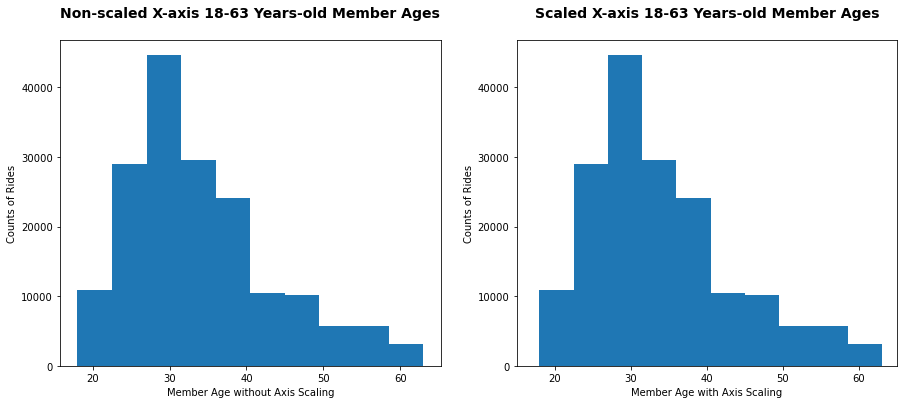

In [93]:
# plotting histogram for member ages distribution who are >= 18 years and <= 63 years 
""" 
Note: I have used the new subset 'net_ages' which filters ages >= 18 and <= 63 years old

"""
# figure size and color palette
base_color = sb.color_palette()[0]
plt.figure(figsize =[15, 6])

# HISTOGRAM ON LEFT: Non-scaled X-axis 18-63 Years-old Member Ages
plt.subplot(1,2, 1)
plt.hist(data = net_ages, x = 'member_age')
plt.xlabel('Member Age without Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Non-scaled X-axis 18-63 Years-old Member Ages", y=1.05, fontsize=14, fontweight='bold');


# HISTOGRAM ON RIGHT: Scaled X-axis 18-63 Years-old Member Ages
plt.subplot(1,2, 2)
plt.hist(data = net_ages, x = 'member_age')
# x-axis scale limit
plt.xlim(15,65)
plt.xlabel('Member Age with Axis Scaling')
plt.ylabel('Counts of Rides')
plt.title("Scaled X-axis 18-63 Years-old Member Ages", y=1.05, fontsize=14, fontweight='bold');


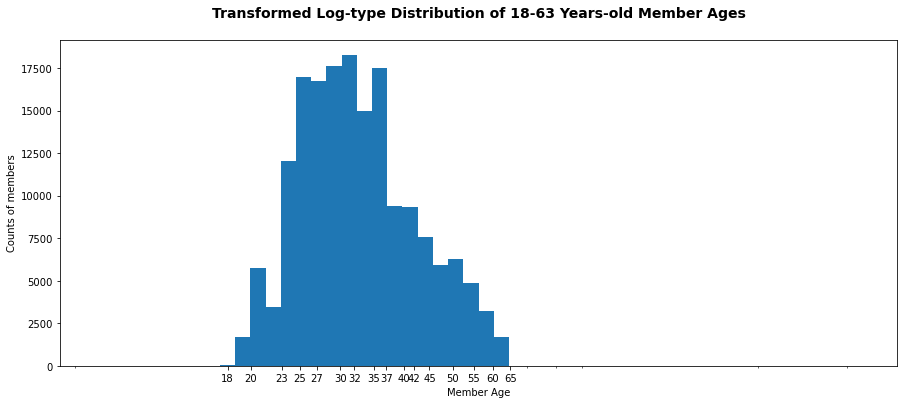

In [94]:
# Axis transformation: x axis scaled and transformed to log-type
# Bin size
bins = 10 ** np.arange(1, 2.5+0.03, 0.03)
# Generate the x-ticks you want to apply
ticks = [18, 20, 23, 25, 27, 30, 32, 35, 37, 40, 42, 45, 50, 55, 60, 65]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.figure(figsize =[15, 6])
plt.hist(data=net_ages, x='member_age', bins=bins)
# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
# labels and titles
plt.xlabel('Member Age')
plt.ylabel('Counts of members')
plt.title("Transformed Log-type Distribution of 18-63 Years-old Member Ages", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - 99% of ages are below 63 years old with total number of records of 181,598.
> - 1% of ages are above 63 years old with total number of records of 1,814.
> - Ages equal to 0 years old or below 18 years old is 8,265.
> - Total net ages from 18-63 years old is 173,333.
> - Both scaled and non-scaled age distribution showed that data is skewed to the right with most ages clustered between 23-39 years old.
> -Transforming the age scale confirmed very close findings: age are clustered between 23-41 years old with 2 peaks, one from 23-31 and the other from 32-41 years old.
> - This leads me to the idea to create member age groupings to compare the distribution of data among these age groups.


In [95]:
# create new subset of ages, exlcuding 0 age
ages_minus_0  = df[df['member_age'] > 0]
ages_minus_0.shape[0]

175147

In [96]:
# create member age groupings
df['net_age_groups'] = ages_minus_0['member_age'].apply(lambda x: '0-20' if 0<x<=20
                                                          else '20-30' if 20<x<=30
                                                          else '30-40' if 30<x<=40
                                                          else '40-50' if 40<x<=50
                                                          else '50-60' if 50<x<=60
                                                          else '60-70' if 60<x<=70
                                                          else '70-140' if 70<x<=150
                                                          else x)
df['net_age_groups'] = df['net_age_groups'].astype('category')                                                                                              
                                                                


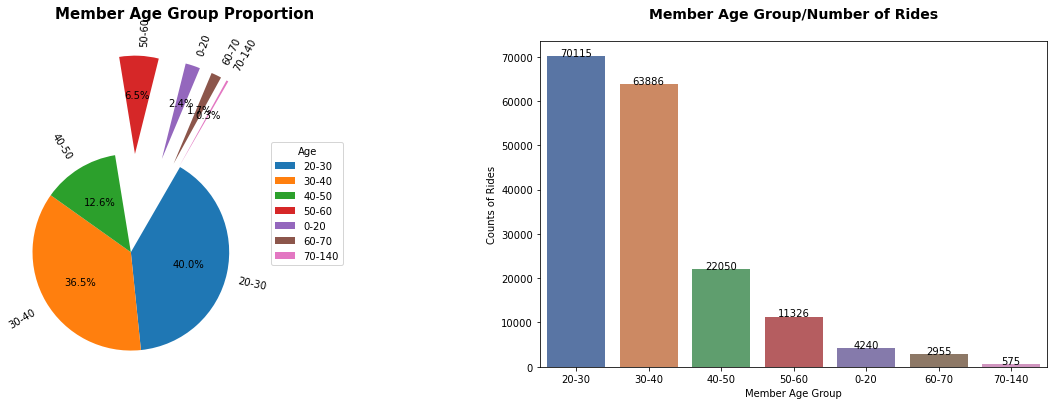

In [97]:
# plotting bar and pie charts for member age groupings
# figure size and color palette
plt.figure(figsize =[20, 6])
base_color = sb.color_palette()[0]

# PIE CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 1)
sorted_groups = df['net_age_groups'].value_counts()
plt.pie(sorted_groups, labels = sorted_groups.index, autopct='%1.1f%%', startangle=60, 
        counterclock = False, rotatelabels = 30, explode =[0,0,0,1,1,1,1])
plt.title("Member Age Group Proportion", fontsize=15, y=1.05, fontweight='bold')
plt.axis('square')
plt.legend(title="Age", loc="center right");

# BAR CHART ON LEFT: Trip Start Day
plt.subplot(1,2, 2)
# Returns the sum of all not-null values in `member_gender` column
n_member= df['net_age_groups'].value_counts().sum()
# Recalculating the day_counts just to have clarity.
member_counts = df['net_age_groups'].value_counts()
# Get the unique values of the `member_gender` column, in the decreasing order of the frequency.
member_order = member_counts.index

# plot bar chart 
sb.countplot(data=df, x=df['net_age_groups'], order=member_order, palette="deep")
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 
plt.xlabel('Member Age Group')
plt.ylabel('Counts of Rides')
plt.xticks(rotation=0)
plt.title("Member Age Group/Number of Rides", y=1.05, fontsize=14, fontweight='bold');

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = member_counts[label.get_text()]
    counter = '{0:0.0f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, counter, ha = 'center', color = 'black')


### Insights:
> - Age groups 20-30 years old is the highest group in terms of rides with a proportion of 40%, followed by 30-40 years old group with a proportion of 36.5%.
> - The lowest age group is 70-141 years old with a proportion of 0.3%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I have found that the follwing variables have skewness and long-normal distribution and need x-axis or y-axis transformation:

### Duration Variables: 
1. 'duration_sec' variable: Durations/second is highly skewed and clustered to the left in a long-normal distribution and most of the data falls below 10k seconds for more than 175k of the rides.
2. 'duration_minute' variable: Duration/minute follows the same distribution of duration/second as it has been actually extracted from it. It has a similar long-normal distribution and skewness to the right. Most of rides (175K) has <150 minutes in duration.
3. 'duration_hour' variable: Duration/hour follows the same distribution of duration/second as it has been actually extracted from it. It has a similar long-normal distribution and skewness to the right. Most of rides (175K) has <2.5 hours in duration.

### Start and End Time Variables: 
1. 'start_time_hour' & 'end_time_hour' variables: Start time hour and end time hour follow the same bimodel distribution with a very small skew to the left. 
2. 'start_time_day' & 'end_time_day' variables: Start time hours and end time hours follow the same bimodel distribution with a skewness to the left.

### Ride Distance(km) Variable:
1. 'distance_km' variable: Ride distance distibution is highly skewed to the left with a log-normal distribution as >175k of the rides have a distance ~8km.

### Member Age variable:
1. 'member_age' variable: The member age distribution follows a skewed distribution to the right. Scaling the x-axis didn't change the skewed distribution so transforming x-axis may normally distribute data as follows.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I have performed many transformations for some x-axis or y-axis scales with skewness and long-normal distribution in order to explore data distribution deeply. I can summarize these transformations as follows:

### Duration Variables: 
1. 'duration_sec' variable: I have changed x-axis scale limit and performed a log-type transformation to x-axis. Changing the x-axis limit shows that data is clustered in position between 7.5k-10k seconds and transforming the x-axis shows that data is normally distributed with a little bit skewnees to the right with a mean of 726 seconds and 95% of the rides has a duration below 1571 seconds.
2. 'duration_minute' variable: I have changed x-axis scale limit and performed a log-type transformation to x-axis. Scaling the x-axis showed up that most of the data is actually custered in the same position > 150 minutes and transforming the x-axis shows that data is normally distributed with a mean of 12 minutes and 95% of the rides has a duration below 26 minutes.
3. 'duration_hour' variable: I have changed x-axis scale limit and performed a log-type transformation to x-axis. Scaling the x-axis showed up thay data actually is custered in the same position > 2.5 hours and transforming the x-axis shows that data is highly skewed to the right with a mean of 2 hours and 95% of the rides has a duration below 4.4 hours.

### Start and End Time Variables: 
1. 'start_time_hour' & 'end_time_hour' variables: I have performed a log-type transformation to x-axis and transforming start and end hours cionfirms that they follow the same bimodel distribution skewed to the left. 50% of rides start before 2 PM and mean start hour is 1.45 PM and 50% of rides ends before 2 PM and mean end hour is 1.6 PM.
2. 'start_time_day' & 'end_time_day' variables: Start time hours and end time hours follow the same bimodel distribution with a skewness to the left. Transforming start and end time days confirms that they follow the same bimodel distribution skewed to the left and 50% of start and end time rides occured before day 15.

### Ride Distance(km) Variable:
1. 'distance_km' variable: I have tried to change the scale limit of the distance to better visualize data. However, the data is highly clustered in the same position of ~7km with some outliers. I have performed a log-type transformation to x-axis and transforming the x-axis confirms that we have a bimodel distribution with two peaks: One from 1-1.5km and 1.5-2.6km. 

### Member Age variable:
1. 'member_age' variable: Member ages follow a skewed distribution to the right with most ages are clustered between 18-40 years old in non-scaled and scaled distributions. I have performed a log-type transformation to x-axis and transforming the years' scale showed that most ages are clustered between 23-40 years old. However, after removinf age outliers, Both scaled and non-scaled age distribution showed that data is skewed to the right with most ages clustered between 23-39 years old and transforming the age scale confirmed very close findings: age are clustered between 23-41 years old with 2 peaks, one from 23-31 and the other from 32-41 years old.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I will investigate and plot the correlations, patterns, trends, models, and relationships between a couple of variables in the dataset, two features at a time.

## 1. Categorical Variable vs. Categorical Variable
We can plot the following categorical 9 relationships for the major categorical variables of user type, member gender, bike share status, amd ride start and end stations:
> 1. User Type vs. Member Gender & User Type vs. Bike Share (2 plots)
> 2. User Type vs. Age Groups (1 plot)
> 3. User Type vs. Ride Start and End Stations (2 plots)
> 4. Member Gender vs. bike share (1 plots)
> 5. Member Gender vs. Age Groups (1 plot)
> 6. Member Gender vs. Ride Stations (2 plots)
> 7. Bike Share vs. Age Groups (1 plot)
> 8. Bike Share vs. Ride Stations (2 plots)


### 1.1  User Type vs. Member Gender & User Type vs. Bike Share (2 plots)

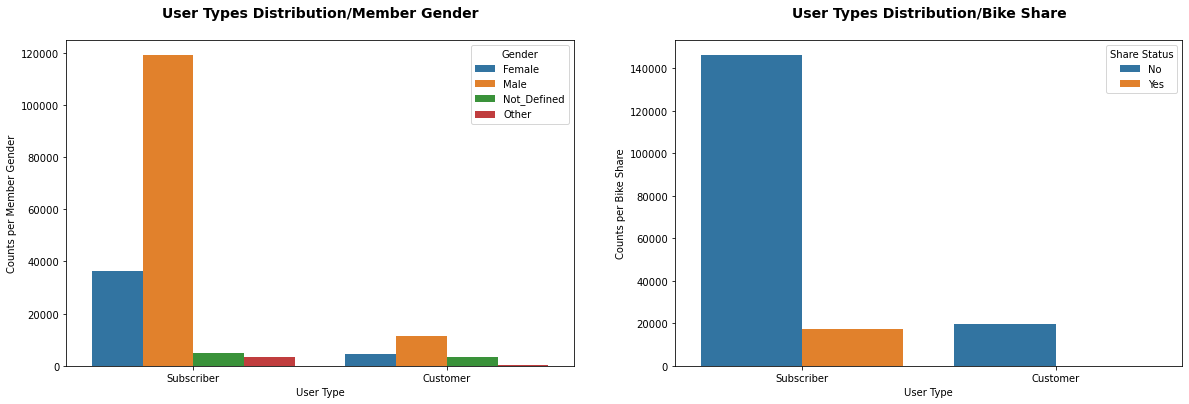

In [98]:
# plotting bar chart for user types based on member gender
# figure size and color palette
plt.figure(figsize =[20, 6])

# BAR CHART ON LEFT: user types/member gender
plt.subplot(1,2,1)
# get 'user_type' as ordered types
user_order = df['user_type'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', order = user_order)
plt.xlabel('User Type')
plt.ylabel('Counts per Member Gender')
plt.xticks(rotation=0)
plt.title("User Types Distribution/Member Gender", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Gender", loc="upper right");

# BAR CHART ON MIDDLE: user types/member gender
plt.subplot(1,2,2)
# get 'user_type' as ordered types
user_order = df['user_type'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', order = user_order)
plt.xlabel('User Type')
plt.ylabel('Counts per Bike Share')
plt.xticks(rotation=0)
plt.title("User Types Distribution/Bike Share", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Share Status", loc="upper right");


In [99]:
# check proportion of rides per user type and member gender
df.groupby('user_type')['member_gender'].value_counts(normalize=True)

user_type   member_gender
Customer    Male             0.580280
            Female           0.233894
            Not_Defined      0.162925
            Other            0.022901
Subscriber  Male             0.728379
            Female           0.221329
            Not_Defined      0.030744
            Other            0.019548
Name: member_gender, dtype: float64

In [100]:
# check proportion of rides per user type and bike share status
df.groupby('user_type')['bike_share_for_all_trip'].value_counts(normalize=True)

user_type   bike_share_for_all_trip
Customer    No                         1.000000
Subscriber  No                         0.893857
            Yes                        0.106143
Name: bike_share_for_all_trip, dtype: float64

### Insights:
> - Most subscribers are males and represents 73% of total subscribers, followed by females with 22%.
> - Most customers are males and represents 58% customers of customers, followed by females with 23%.
> - 89.4% of subscribers don't share bikes during their rides and 10.6 % of subscribers share bikes during their rides.
> - All customers don't share bikes during their rides.

### 1.2 User Type vs. Age Groups (1 plot)

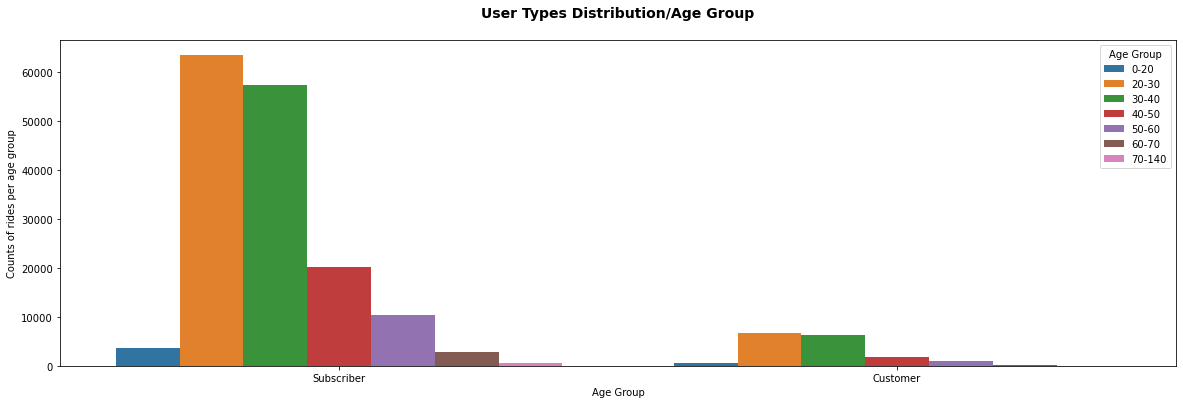

In [101]:
# plotting bar chart for user types based on member gender

# figure size and color palette
plt.figure(figsize =[20, 6])

# get 'user_type' as ordered types
usr_order = df['user_type'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'user_type', hue = 'net_age_groups', order = usr_order)
plt.xlabel('Age Group')
plt.ylabel('Counts of rides per age group')
plt.xticks(rotation=0)
plt.title("User Types Distribution/Age Group", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Age Group", loc="upper right");

In [102]:
# check proportion of rides per User Type vs. Age Groups
df.groupby('user_type')['net_age_groups'].value_counts(normalize=True)

user_type   net_age_groups
Customer    20-30             0.397270
            30-40             0.383861
            40-50             0.114064
            50-60             0.059828
            0-20              0.033311
            60-70             0.010583
            70-140            0.001082
Subscriber  20-30             0.400641
            30-40             0.362752
            40-50             0.127135
            50-60             0.065173
            0-20              0.023253
            60-70             0.017531
            70-140            0.003514
Name: net_age_groups, dtype: float64

### Insights:
> - For subscribers, age group 20-30 is the highest (39.7%), followed by age group 30-40 (39.4%) and the lowest age group is 70-141(0.001%).
> - For customers, age group 20-30 is the highest (40%), followed by age group 30-40 (36.3%) and the lowest age group is 70-141(0.004%).

### 1.3  User Type vs. Start and End Stations (2 plots)

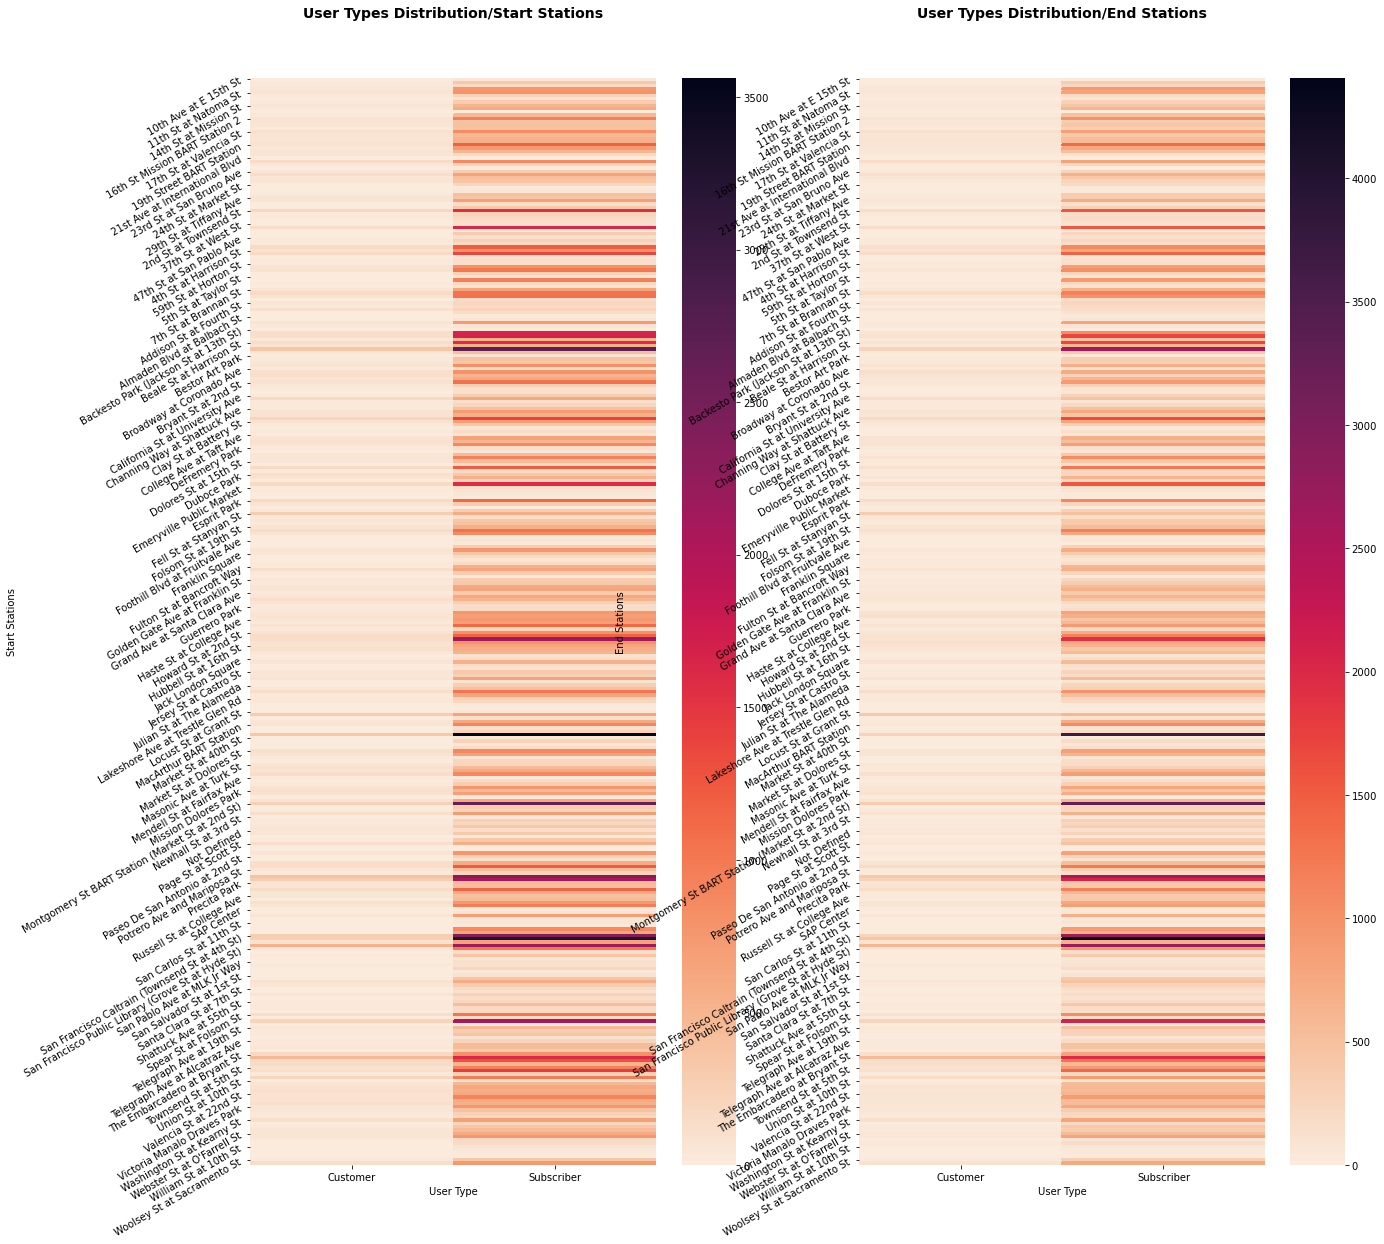

In [103]:
# plotting bar chart for user types based on start and end stations
# figure size
plt.figure(figsize =[20, 20])

# HEAAT MAP ON LEFT: user types/start station
plt.subplot(1,2,1)
# Use group_by() and size() to get the number of start stations and each combination
# of the two variable levels as a pandas Series
start_counts = df.groupby(['user_type', 'start_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
start_counts = start_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have user types on rows
start_counts = start_counts.pivot(index = 'start_station_name', columns = 'user_type', values = 'count')

# plot heat map
sb.heatmap(start_counts, cmap ='rocket_r')
plt.xlabel('User Type')
plt.ylabel('Start Stations')
plt.yticks(rotation=30)
plt.title("User Types Distribution/Start Stations", y=1.05, fontsize=14, fontweight='bold');

# HEAAT MAP ON RIGHT: user types/end station
plt.subplot(1,2,2)
# Use group_by() and size() to get the number of start stations and each combination
# of the two variable levels as a pandas Series
end_counts = df.groupby(['user_type', 'end_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
end_counts = end_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have user types on rows
end_counts = end_counts.pivot(index = 'end_station_name', columns = 'user_type', values = 'count')

# plot heat map
sb.heatmap(end_counts, cmap ='rocket_r')
plt.xlabel('User Type')
plt.ylabel('End Stations')
plt.yticks(rotation=30)
plt.title("User Types Distribution/End Stations", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Subscribers are using both start and end stations more than customers.                         

 ### 1.4 Member Gender vs. bike share (1 plots)

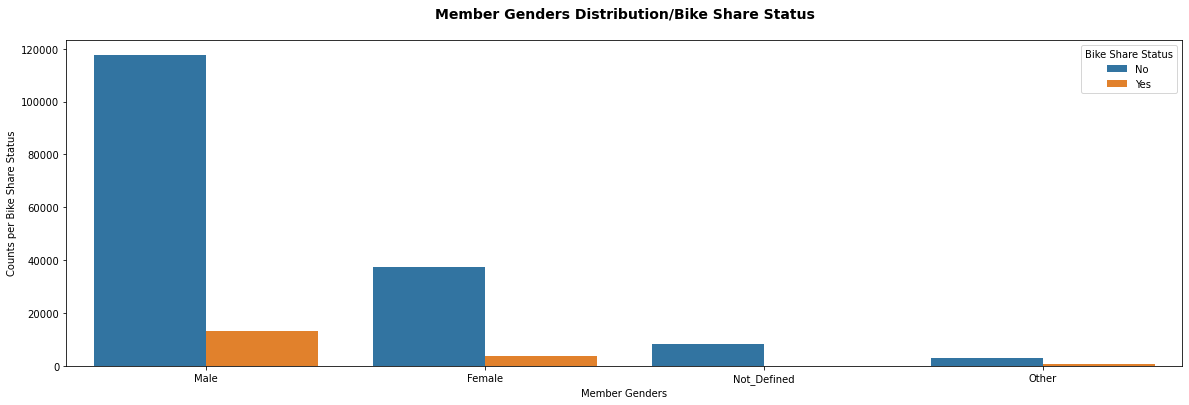

In [104]:
# plotting bar chart for user types based on member gender
# figure size and color palette
plt.figure(figsize =[20, 6])

# get 'user_type' as ordered types
share_order = df['member_gender'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', order = share_order)
plt.xlabel('Member Genders')
plt.ylabel('Counts per Bike Share Status')
plt.xticks(rotation=0)
plt.title("Member Genders Distribution/Bike Share Status", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Bike Share Status", loc="upper right");

In [105]:
# check proportion of rides per member gender and bike share status
df.groupby('member_gender')['bike_share_for_all_trip'].value_counts(normalize=True)

member_gender  bike_share_for_all_trip
Female         No                         0.911860
               Yes                        0.088140
Male           No                         0.899649
               Yes                        0.100351
Not_Defined    No                         1.000000
Other          No                         0.822563
               Yes                        0.177437
Name: bike_share_for_all_trip, dtype: float64

### Insights:
> - 90% of males don't share bikes during the ride and 10% share bikes.
> - 91% of females don't share bikes during the ride and 9% share bikes.
> - All not-defined users don't share bikes during the ride.
> - 82% of other users don't share bikes during the ride and 18% share bikes.

### 1.5 Member Gender vs. Age Groups (1 plot)

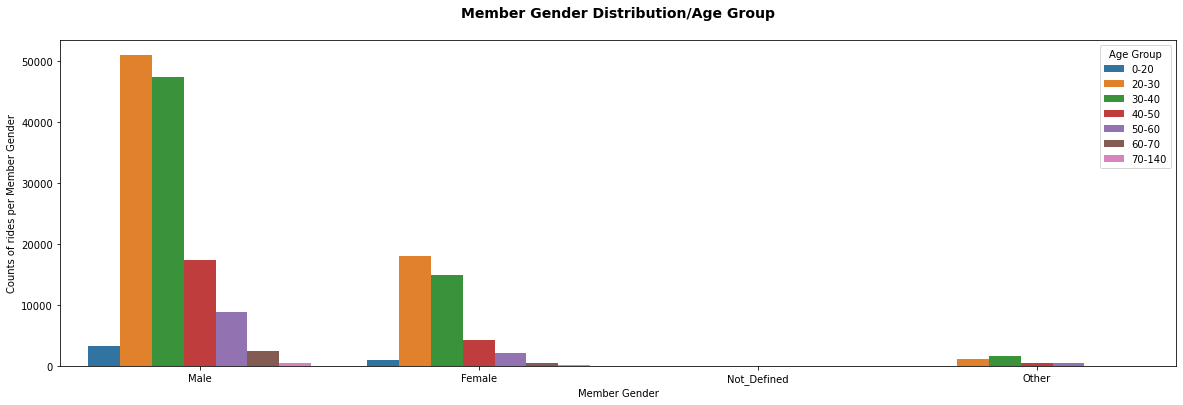

In [106]:
# plotting bar chart for Member Gender vs. Age Groups 

# figure size and color palette
plt.figure(figsize =[20, 6])

# get 'user_type' as ordered types
member_order = df['member_gender'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'member_gender', hue = 'net_age_groups', order = member_order)
plt.xlabel('Member Gender')
plt.ylabel('Counts of rides per Member Gender')
plt.xticks(rotation=0)
plt.title("Member Gender Distribution/Age Group", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Age Group", loc="upper right");

In [107]:
# check proportion of rides per member gender and bike share status
df.groupby('member_gender')['net_age_groups'].value_counts(normalize=True)

member_gender  net_age_groups
Female         20-30             0.440407
               30-40             0.365096
               40-50             0.105009
               50-60             0.051954
               0-20              0.025291
               60-70             0.010479
               70-140            0.001763
Male           20-30             0.389871
               30-40             0.363013
               40-50             0.132613
               50-60             0.067217
               0-20              0.024477
               60-70             0.019173
               70-140            0.003636
Other          30-40             0.423330
               20-30             0.325849
               40-50             0.119113
               50-60             0.115553
               70-140            0.007667
               60-70             0.006024
               0-20              0.002464
Name: net_age_groups, dtype: float64

### Insights:
> - For males and female genders, age group 20-30 is the highest (39%), followed by age group 30-40 (36.3%) and the lowest age group is 70-141 (0.004%).
> - For females and female genders, age group 20-30 is the highest (44%), followed by age group 30-40 (36%) and the lowest age group is 70-141 (0.002%).
> - For other other gender, age group 30-40 (43.3%) is the highest, followed by age group 20-30 (33%) and the lowest age group is 70-141 (0.0025%).

### 1.6 Member Gender vs. Ride Stations (2 plots)

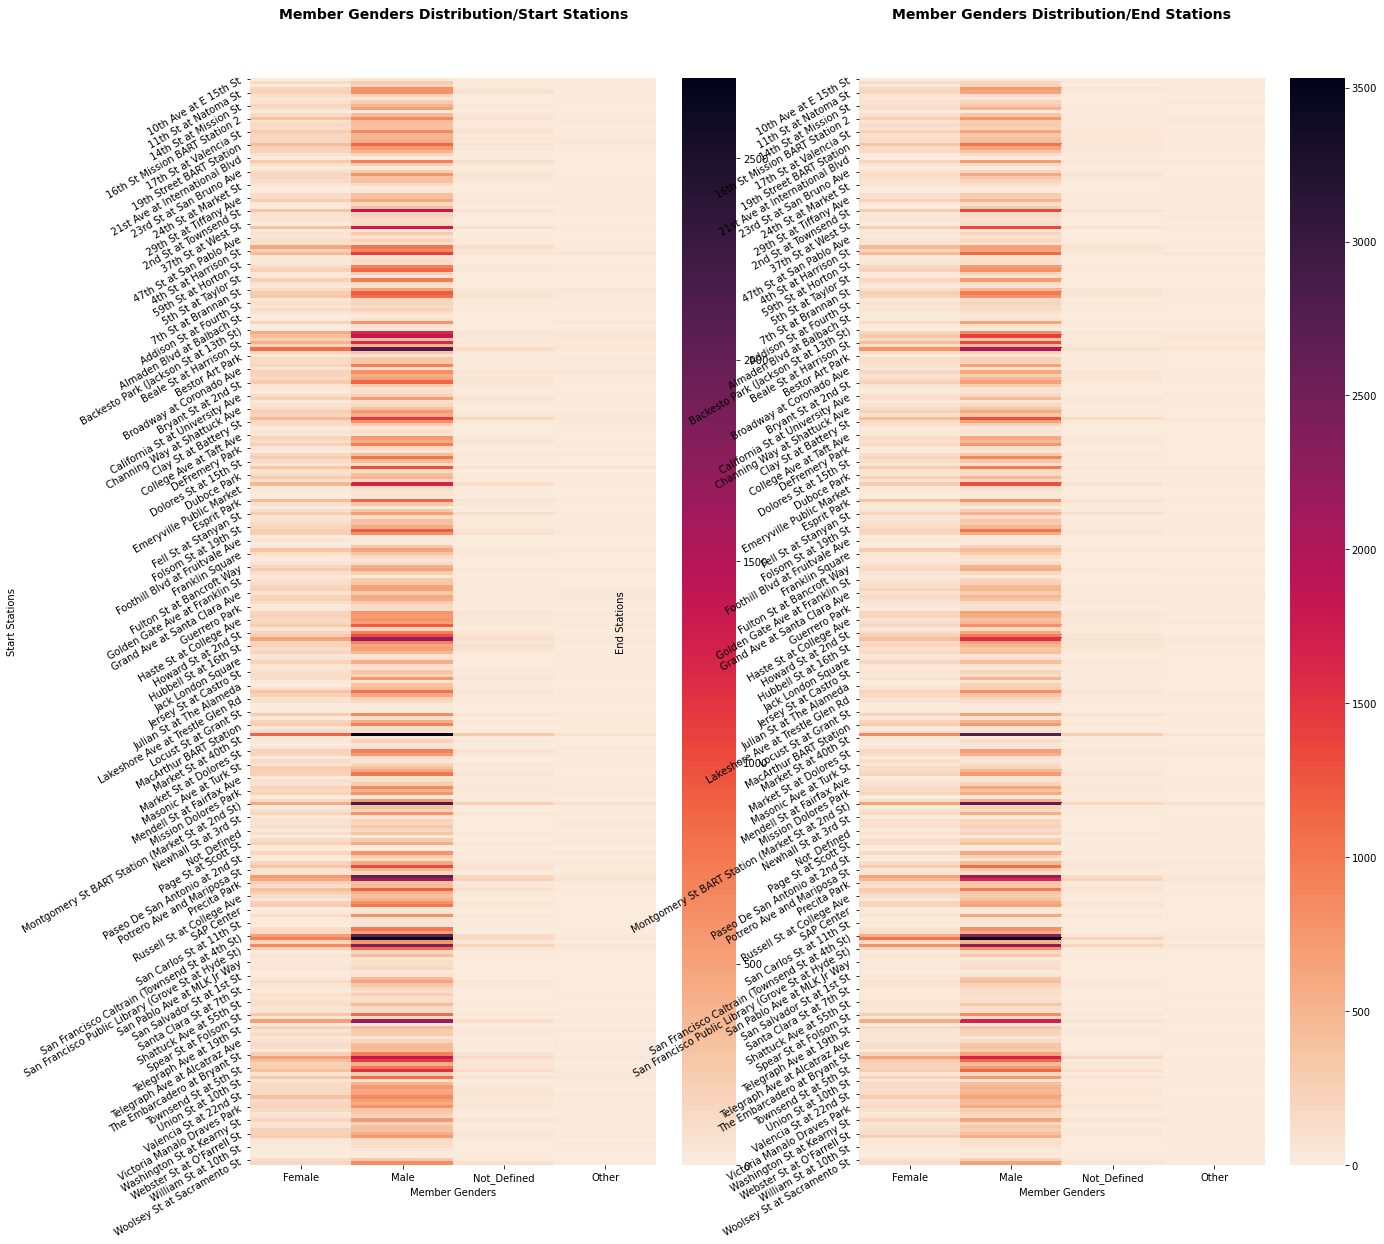

In [108]:
# plotting heatmap for member genders based on start and end stations
# figure size
plt.figure(figsize =[20, 20])

# HEAAT MAP ON LEFT: member gender/start station
plt.subplot(1,2,1)
# Use group_by() and size() to get the number of start stations and each combination 
# of the two variable levels as a pandas Series
start_counts = df.groupby(['member_gender', 'start_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
start_counts = start_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have member gender on rows
start_counts = start_counts.pivot(index = 'start_station_name', columns = 'member_gender', values = 'count')

# plot heat map
sb.heatmap(start_counts, cmap ='rocket_r')
plt.xlabel('Member Genders')
plt.ylabel('Start Stations')
plt.yticks(rotation=30)
plt.title("Member Genders Distribution/Start Stations", y=1.05, fontsize=14, fontweight='bold');

# HEAAT MAP ON RIGHT: member gender/end station
plt.subplot(1,2,2)
# Use group_by() and size() to get the number of start stations and each combination
# of the two variable levels as a pandas Series
end_counts = df.groupby(['member_gender', 'end_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
end_counts = end_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have member gender on rows
end_counts = end_counts.pivot(index = 'end_station_name', columns = 'member_gender', values = 'count')

# plot heat map
sb.heatmap(end_counts, cmap ='rocket_r')
plt.xlabel('Member Genders')
plt.ylabel('End Stations')
plt.yticks(rotation=30)
plt.title("Member Genders Distribution/End Stations", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Males are using both start and end stations more than other genders.

### 1.7 Bike Share vs. Age Groups (1 plot)

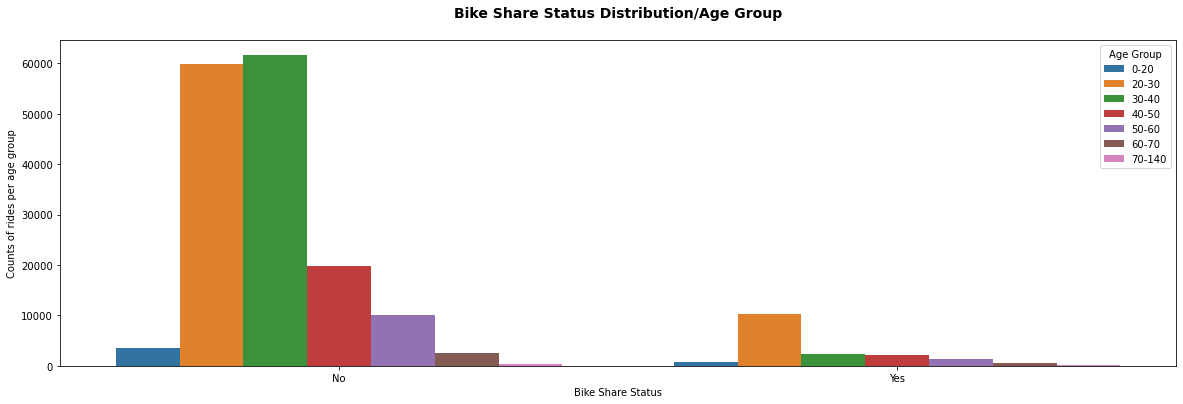

In [109]:
# plotting bar chart for uBike Share vs. Age Groups

# figure size and color palette
plt.figure(figsize =[20, 6])

# get 'user_type' as ordered types
grop_order = df['bike_share_for_all_trip'].value_counts().index
# plot bar chart
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'net_age_groups', order = grop_order)
plt.xlabel('Bike Share Status')
plt.ylabel('Counts of rides per age group')
plt.xticks(rotation=0)
plt.title("Bike Share Status Distribution/Age Group", y=1.05, fontsize=14, fontweight='bold')
plt.legend(title="Age Group", loc="upper right");

In [110]:
# check proportion of rides per member gender and bike share status
df.groupby('bike_share_for_all_trip')['net_age_groups'].value_counts(normalize=True)

bike_share_for_all_trip  net_age_groups
No                       30-40             0.390442
                         20-30             0.379585
                         40-50             0.125928
                         50-60             0.063674
                         0-20              0.022093
                         60-70             0.015806
                         70-140            0.002472
Yes                      20-30             0.588801
                         30-40             0.131286
                         40-50             0.125583
                         50-60             0.073679
                         0-20              0.043436
                         60-70             0.026557
                         70-140            0.010657
Name: net_age_groups, dtype: float64

### Insights:
> - For non-shared rides , age group 30-40 is the highest (39%), followed by age group 20-30 (38%) and the lowest age group is 70-141(0.0024%).
> - For shared rides, age group 20-30 is the highest (58%), followed by age group 30-40 (13%) and the lowest age group is 70-141(0.01%).

### 1.8 Bike Share vs. Ride Stations (2 plots)

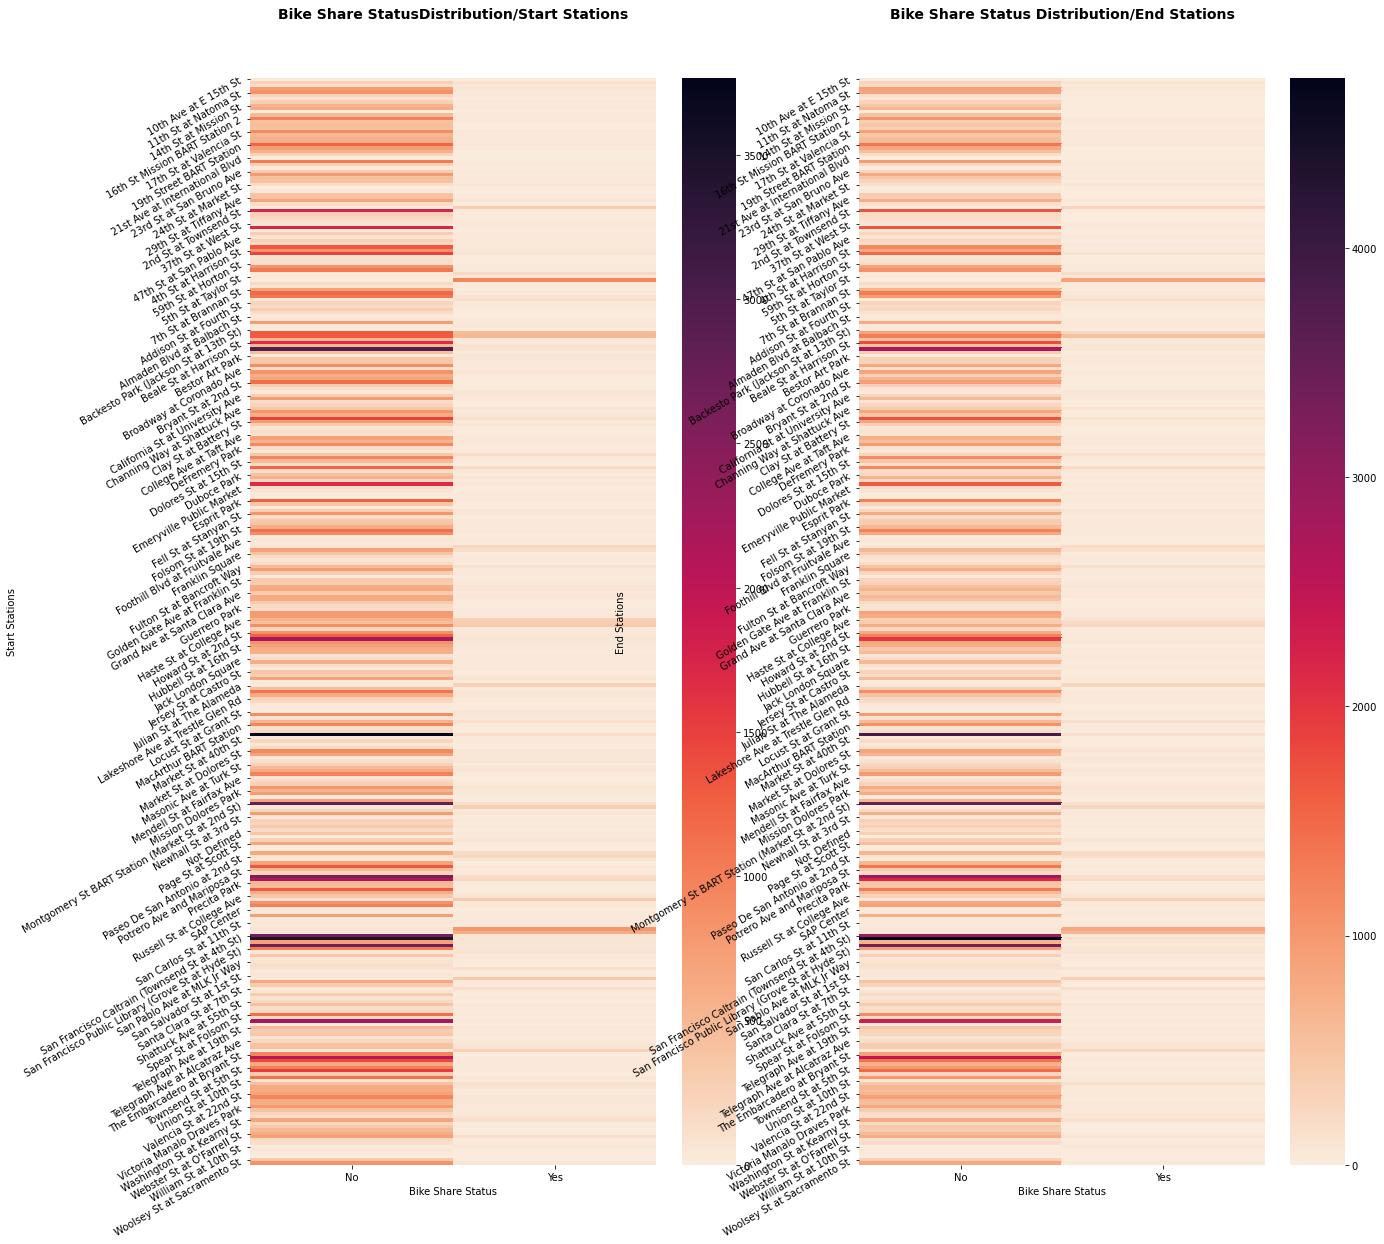

In [111]:
# plotting heatmap for Bike Share vs. Ride Stations
# figure size
plt.figure(figsize =[20, 20])

# HEAAT MAP ON LEFT:Boke Share Status/start station
plt.subplot(1,2,1)
# Use group_by() and size() to get the number of start stations and each combination 
# of the two variable levels as a pandas Series
start_counts = df.groupby(['bike_share_for_all_trip', 'start_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
start_counts = start_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have member gender on rows
start_counts = start_counts.pivot(index = 'start_station_name', columns = 'bike_share_for_all_trip', values = 'count')

# plot heat map
sb.heatmap(start_counts, cmap ='rocket_r')
plt.xlabel('Bike Share Status')
plt.ylabel('Start Stations')
plt.yticks(rotation=30)
plt.title("Bike Share StatusDistribution/Start Stations", y=1.05, fontsize=14, fontweight='bold');

# HEAAT MAP ON RIGHT: Boke Share Status/end station
plt.subplot(1,2,2)
# Use group_by() and size() to get the number of start stations and each combination
# of the two variable levels as a pandas Series
end_counts = df.groupby(['bike_share_for_all_trip', 'end_station_name']).size()

# Use Series.reset_index() to convert a series into a dataframe object
end_counts = end_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have member gender on rows
end_counts = end_counts.pivot(index = 'end_station_name', columns = 'bike_share_for_all_trip', values = 'count')

# plot heat map
sb.heatmap(end_counts, cmap ='rocket_r')
plt.xlabel('Bike Share Status')
plt.ylabel('End Stations')
plt.yticks(rotation=30)
plt.title("Bike Share Status Distribution/End Stations", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Non-shared bikes are more than shared bikes in both start and end stations.

## 2. Numeric Variable vs. Numeric Variable
We can plot many numberic variable relationships for major numeric variables of member age, ride start and end times, ride durations, and ride distances as follows:
> 1. Member Age vs. Ride Duration in Seconds, Minutes, Hours (3 Plots)
> 2. Member Age vs. Ride Start Time Hour and End Time Hour (2 Plots)
> 3. Member Age vs. Ride Start Time Day and End Time Day(2 Plots)
> 4. Member Age vs. Ride Distance (1 Plots)
> 5. Member Age vs. Bike Id (1 Plots)
> 6. Ride Start and End Time Hour vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)
> 7. Ride Start and End Time Day vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)
> 8. Ride Start and End Time Hour vs. Ride distance (2 Plots)
> 9. Ride  Start and End Time Day vs. Ride distance (2 Plots)
> 10. Ride Start and End Time Hour vs. Bike Id (2 Plots)
> 11. Ride Start and End Time Day vs. Bike Id (2 Plots)
> 12. Ride Duration in Seconds, Minutes, and Hours vs. Bike Id (3 Plots)
> 13. Ride Duration in Seconds, Minutes, and Hours vs. Ride Distance (3 Plots)
> 14. Ride Distance vs. Bike Id (1 Plots)


### 2.1 Member Age vs. Ride Duration in Seconds, Minutes, Hours (3 Plots)

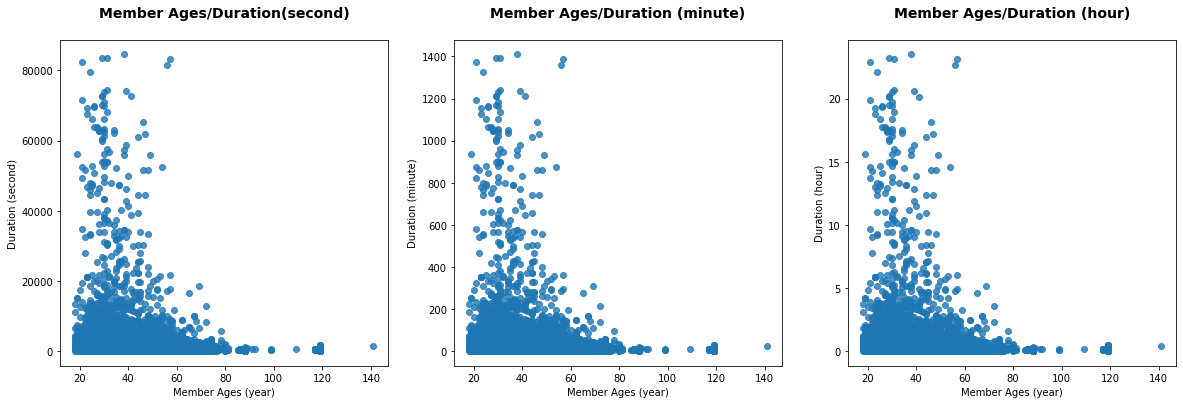

In [112]:
# plotting scatter plot for Member Age vs. Ride Duration in Seconds, Minutes, Hours

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# figure size
plt.figure(figsize =[20, 6])

# SCATTER PLOT ON LEFT: Member Age vs. Ride Duration in Seconds
plt.subplot(1,3,1)
# scatter plot 
sb.regplot(x=ages_minus_0['member_age'], y=ages_minus_0['duration_sec'], fit_reg=False)
plt.xlabel('Member Ages (year)')
plt.ylabel('Duration (second)')
plt.xticks(rotation=0)
plt.title("Member Ages/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE: Member Age vs. Ride Duration in Minutes
plt.subplot(1,3,2)
# scatter plot 
sb.regplot(x=ages_minus_0['member_age'], y=ages_minus_0['duration_minute'],fit_reg=False)
plt.xlabel('Member Ages (year)')
plt.ylabel('Duration (minute)')
plt.xticks(rotation=0)
plt.title("Member Ages/Duration (minute)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT: Member Age vs. Ride Duration in Hours
plt.subplot(1,3,3)
# scatter plot 
sb.regplot(x=ages_minus_0['member_age'], y=ages_minus_0['duration_hour'], fit_reg=False)
plt.xlabel('Member Ages (year)')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("Member Ages/Duration (hour)", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - There is a negative coorelation between member age and ride durations: Duration decreases when age increases.
> - Ages 23-40 have the higher ride durations compared to other ages.

### 2.2 Member Age vs. Ride Start Time Hour and End Time Hour (2 Plots)

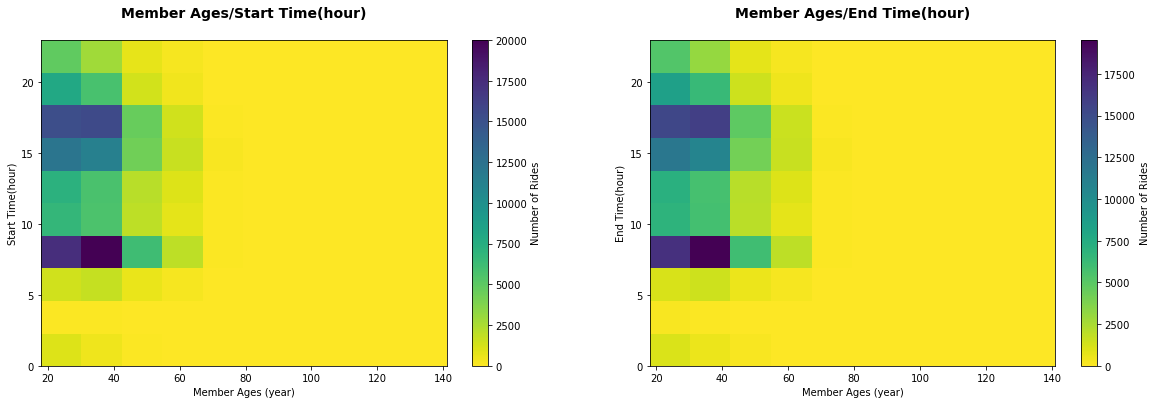

In [113]:
# plotting heat map for Member Age vs. Ride Start Time Hour and End Time Hour 

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# figure size
plt.figure(figsize =[20, 6])

# HEAT MAP ON LEFT:  Member Age vs. Ride Start Time Hour
plt.subplot(1,2,1)
# plot heat map 
plt.hist2d(data = ages_minus_0, x = ages_minus_0['member_age'], y = ages_minus_0['start_time_hour'], cmap = 'viridis_r')
plt.xlabel('Member Ages (year)')
plt.ylabel('Start Time(hour)')
plt.xticks(rotation=0)
plt.title("Member Ages/Start Time(hour)", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

# HEAT MAP ON RIGHT:  Member Age vs. Ride End Time Hour
plt.subplot(1,2,2)
# plot heat map 
plt.hist2d(data = ages_minus_0, x = ages_minus_0['member_age'], y = ages_minus_0['end_time_hour'], cmap = 'viridis_r')
plt.xlabel('Member Ages (year)')
plt.ylabel('End Time(hour)')
plt.xticks(rotation=0)
plt.title("Member Ages/End Time(hour)", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

### Insights:
> - Ages share the same distribution in both start and end time hours.
> - There is a negative coorelation between member age and start and end time hour: start and end time hours decrease as ages increase:
> -Most start and end time hours are 7-9 AM and 4-6 PM.
> - Ages 18-40 have the higher number of rides that start and end mostly at 7-9 AM and 4-6 PM.

### 2.3 Member Age vs. Ride Start Time Day and End Time Day (2 Plots)

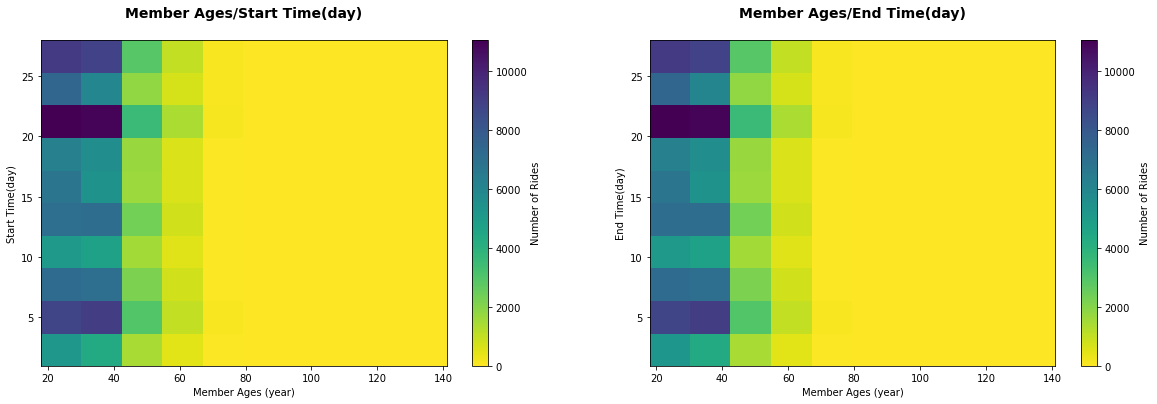

In [114]:
# plotting heat map for Member Age vs. Ride Start Time Day and End Time Day 


""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# figure size
plt.figure(figsize =[20, 6])

# HEAT MAP ON LEFT:  Member Age vs. Ride Start Time Day
plt.subplot(1,2,1)
# plot heat map 
plt.hist2d(data = ages_minus_0, x = ages_minus_0['member_age'], y = ages_minus_0['start_time_day'], cmap = 'viridis_r')
plt.xlabel('Member Ages (year)')
plt.ylabel('Start Time(day)')
plt.xticks(rotation=0)
plt.title("Member Ages/Start Time(day)", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

# HEAT MAP ON RIGHT:  Member Age vs. Ride End Time Day
plt.subplot(1,2,2)
# plot heat map 
plt.hist2d(data = ages_minus_0, x = ages_minus_0['member_age'], y = ages_minus_0['end_time_day'], cmap = 'viridis_r')
plt.xlabel('Member Ages (year)')
plt.ylabel('End Time(day)')
plt.xticks(rotation=0)
plt.title("Member Ages/End Time(day)", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

### Insights:
> - Similar to start and end time days, ages share the same distribution in both start and end time hours.
> - There is a negative coorelation between member age and start and end time day: as age increases, start and end time hour and day decrease.
> - Although the number of rides decreases as age increases, all ages start and end mostly at 4-9, 12-17 and 19-28.
> - Ages 18-40 have the higher number of rides that start and end mostly at most start and end time days.

### 2.4 Member Age vs. Ride Distance (2 Plots)

In [115]:
# check the summary statistics as log type to scale 'distance_km' 
np.log10(ages_minus_0['distance_km']).describe()

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.751470e+05
mean             -inf
std               NaN
min              -inf
25%     -4.205788e-02
50%      1.549003e-01
75%      3.467890e-01
max      1.841793e+00
Name: distance_km, dtype: float64

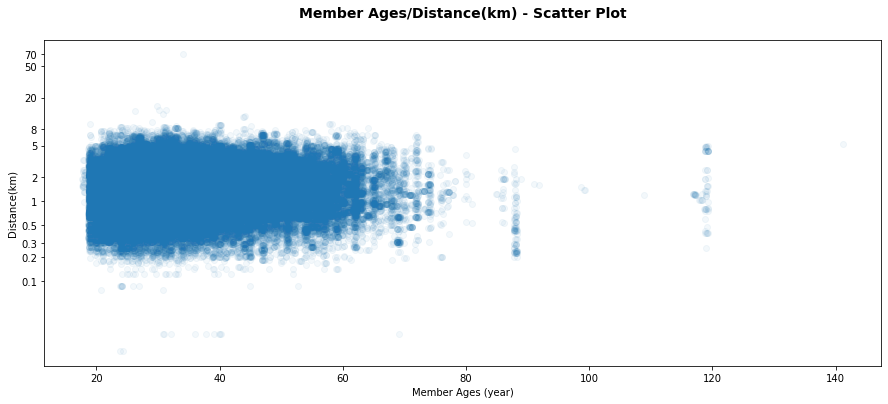

In [116]:
# plotting heat map for Member Age vs. Distance(km)

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# figure size
plt.figure(figsize =[15, 6])

# transform distance(km) to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# plot scatter plot
sb.regplot(x=ages_minus_0['member_age'], y=ages_minus_0['distance_km'].apply(log_trans), truncate=False, x_jitter=.3,
           fit_reg=True, scatter_kws={'alpha':1/20})
# y-axis tik scales
tick_locs = [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 8, 20, 50, 70]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Member Ages (year)')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Ages/Distance(km) - Scatter Plot", y=1.05, fontsize=14, fontweight='bold');


In [117]:
# find distance without outlier
ages_minus_0['distance_km'].describe(percentiles = [.999])

count    175147.000000
mean          1.689329
std           1.096938
min           0.000000
50%           1.428566
99.9%         7.087275
max          69.469241
Name: distance_km, dtype: float64

### Insights:
> - 99.9% of distance(km) is below 8km and distance(km) ranges from 0.17km-8km.
> - In general, there is a very weak positive coorelation between distance(km) and member age.

### 2.5 Member Age vs. Bike Id (2 Plots)

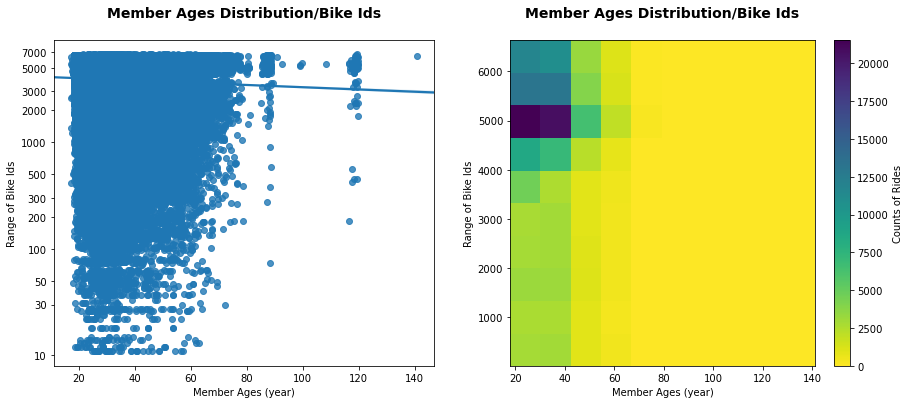

In [118]:
# plotting scatter plot and heat map for Member Age vs. Bike Id

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# transform distance(km) to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# figure size
plt.figure(figsize =[15, 6])

# SCATTER PLOT ON LEFT:  Member Age vs. Bike Id
plt.subplot(1,2,1)
# plot scatter plot
sb.regplot(x=ages_minus_0['member_age'], y=ages_minus_0['bike_id'].apply(log_trans), truncate=False, x_jitter=.8, fit_reg=True,
           scatter_kws={'alpha':.8})
# y-axis tik scales
tick_locs = [10, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Member Ages (year)')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("Member Ages Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold');


# HEAT MAP ON RIGHT: Member Age vs. Bike Id
plt.subplot(1,2,2)
# plot heat map 
plt.hist2d(data = ages_minus_0, x = ages_minus_0['member_age'], y = ages_minus_0['bike_id'], cmap = 'viridis_r')
# labels and title
plt.xlabel('Member Ages (year)')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("Member Ages Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Counts of Rides');

### Insights:
> - There is a negative coorelation between the member age and bike ids used: as age increases, the range of bike ids used decreases.

### 2.6 Ride Start and End Time Hour vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)

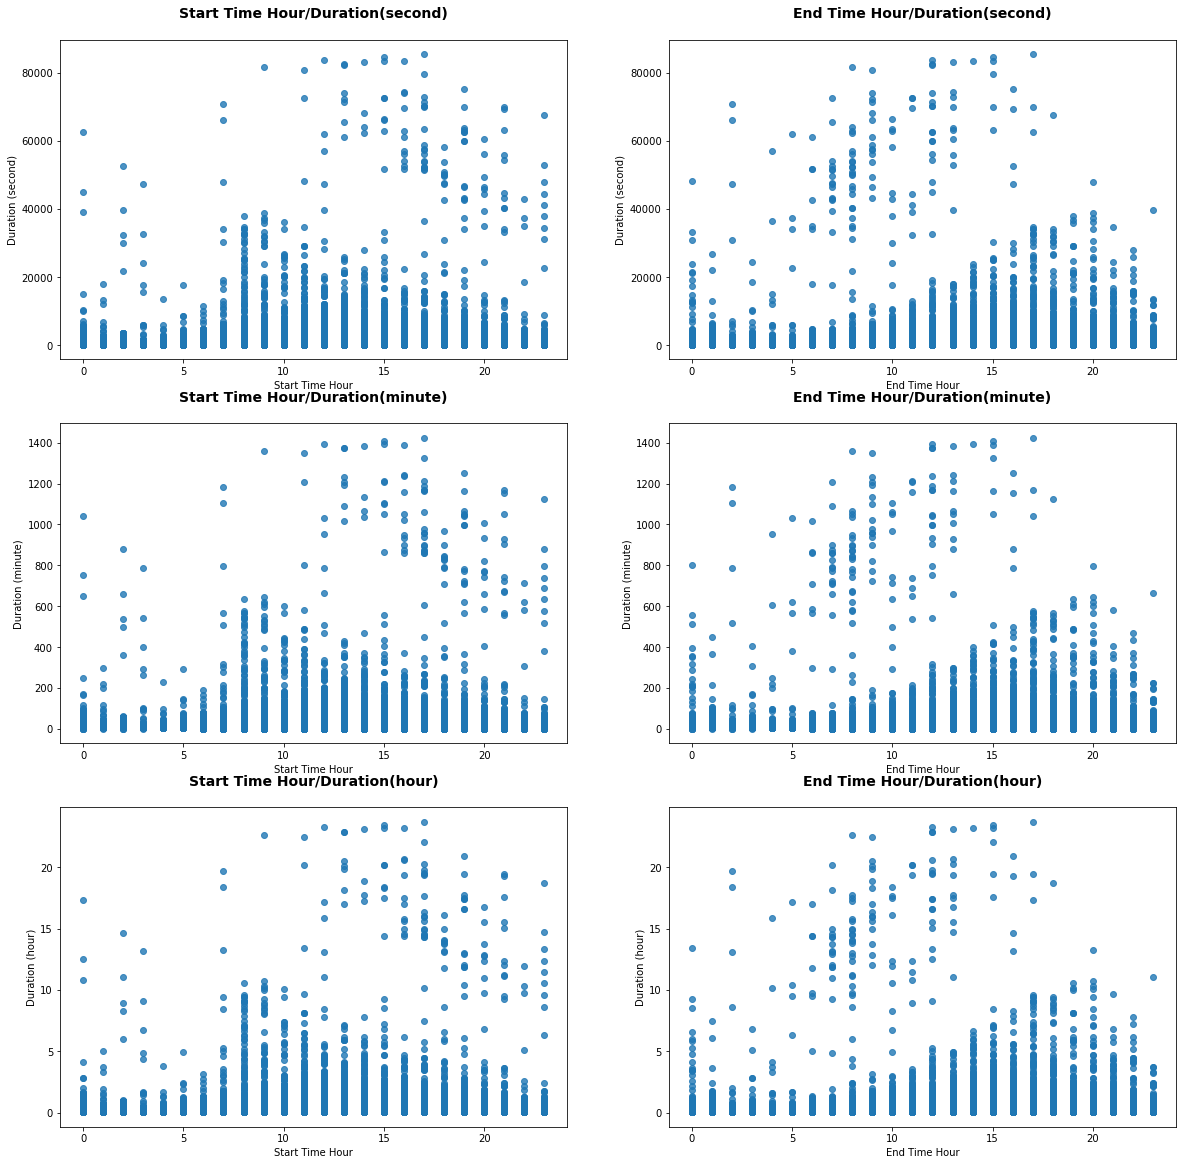

In [119]:
# plotting scatter plot for  Ride Start and End Time Hour vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)

# figure size
plt.figure(figsize =[20, 20])

# SCATTER PLOT ON ROW 1, LEFT: Ride Start Time Hour vs. Ride Duration in Seconds
plt.subplot(3,2,1)
# scatter plot 
sb.regplot(x=df['start_time_hour'], y=df['duration_sec'], fit_reg=False)
plt.xlabel('Start Time Hour')
plt.ylabel('Duration (second)')
plt.xticks(rotation=0)
plt.title("Start Time Hour/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 1, RIGHT: Ride End Time Hour vs. Ride Duration in Seconds
plt.subplot(3,2,2)
# scatter plot 
sb.regplot(x=df['end_time_hour'], y=df['duration_sec'], fit_reg=False)
plt.xlabel('End Time Hour')
plt.ylabel('Duration (second)')
plt.xticks(rotation=0)
plt.title("End Time Hour/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 2, LEFT: Ride Start Time Hour vs. Ride Duration in Minutes
plt.subplot(3,2,3)
# scatter plot 
sb.regplot(x=df['start_time_hour'], y=df['duration_minute'],fit_reg=False)
plt.xlabel('Start Time Hour')
plt.ylabel('Duration (minute)')
plt.xticks(rotation=0)
plt.title("Start Time Hour/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 2, RIGHT: Ride End Time Hour vs. Ride Duration in Minutes
plt.subplot(3,2,4)
# scatter plot 
sb.regplot(x=df['end_time_hour'], y=df['duration_minute'],fit_reg=False)
plt.xlabel('End Time Hour')
plt.ylabel('Duration (minute)')
plt.xticks(rotation=0)
plt.title("End Time Hour/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 3, LEFT: Ride Start Time Hour vs. Ride Duration in Hours
plt.subplot(3,2,5)
# scatter plot 
sb.regplot(x=df['start_time_hour'], y=df['duration_hour'], fit_reg=False)
plt.xlabel('Start Time Hour')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("Start Time Hour/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 3, RIGHT: Ride End Time Hour vs. Ride Duration in Hours
plt.subplot(3,2,6)
# scatter plot 
sb.regplot(x=df['end_time_hour'], y=df['duration_hour'], fit_reg=False)
plt.xlabel('End Time Hour')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("End Time Hour/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');



### Insights:
> - There is a very weak positive coorelation between start time and end hour and durations: as start time and end hours increase, durations increases.

### 2.7 Ride Start and End Time Day vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)

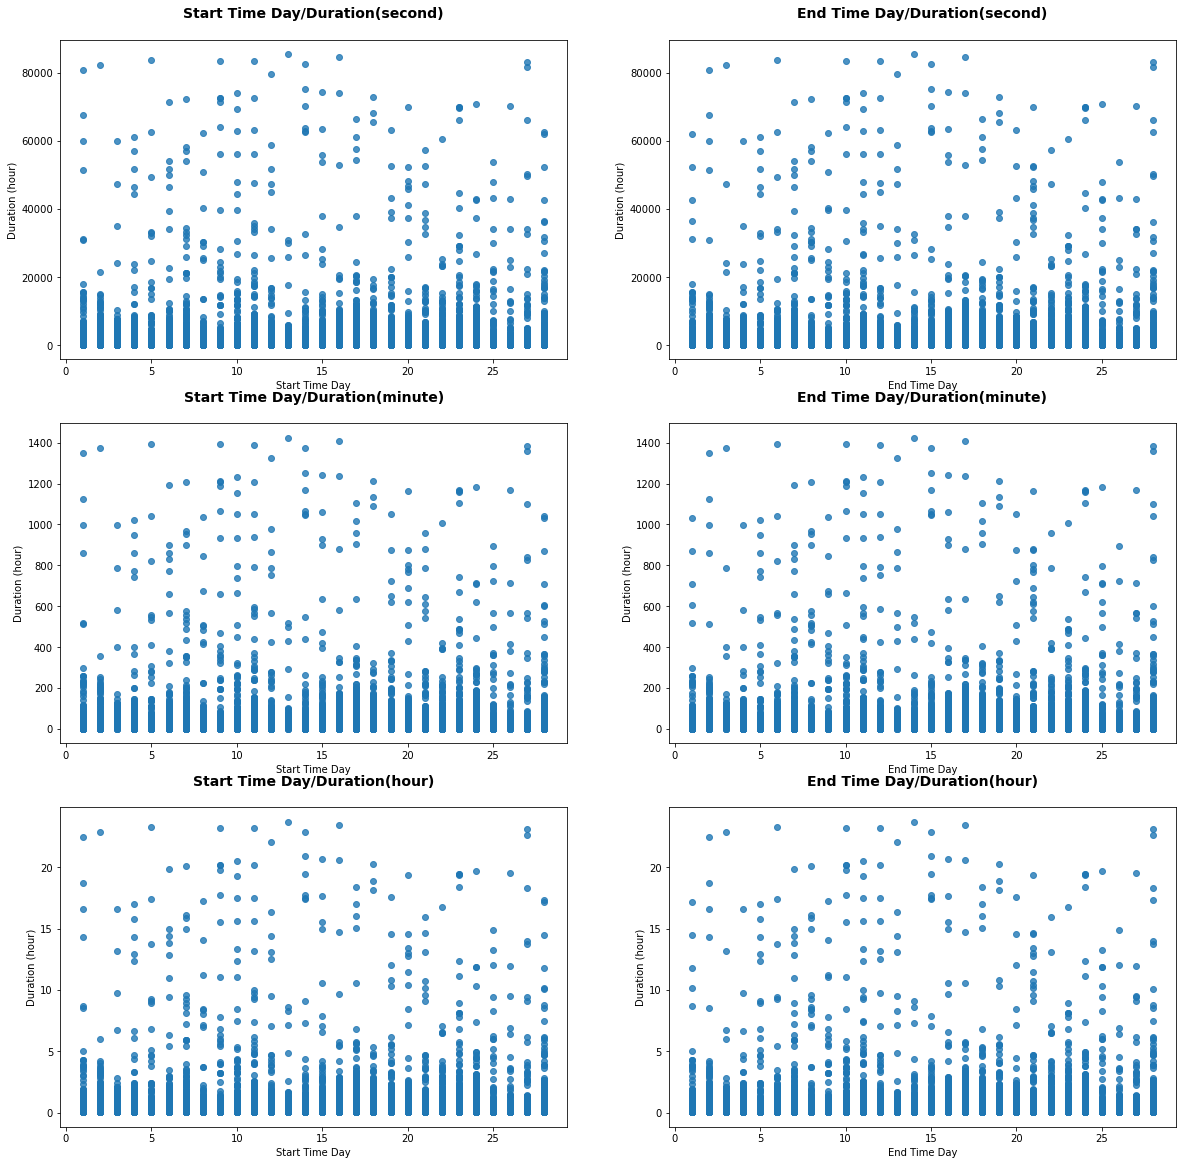

In [120]:
# plotting scatter plot for  Ride Start and End Time Day vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)


# figure size
plt.figure(figsize =[20, 20])

# SCATTER PLOT ON ROW 1, LEFT: Ride Start Time Day vs. Ride Duration in Seconds
plt.subplot(3,2,1)
# scatter plot 
sb.regplot(x=df['start_time_day'], y=df['duration_sec'], fit_reg=False)
plt.xlabel('Start Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("Start Time Day/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 1, RIGHT: Ride End Time Day vs. Ride Duration in Seconds
plt.subplot(3,2,2)
# scatter plot 
sb.regplot(x=df['end_time_day'], y=df['duration_sec'], fit_reg=False)
plt.xlabel('End Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("End Time Day/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ROW 2, LEFT:  Ride Start Time Day vs. Ride Duration in Minutes
plt.subplot(3,2,3)
# scatter plot 
sb.regplot(x=df['start_time_day'], y=df['duration_minute'], fit_reg=False)
plt.xlabel('Start Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("Start Time Day/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 2, RIGHT:  Ride End Time Day vs. Ride Duration in Minutes
plt.subplot(3,2,4)
# scatter plot 
sb.regplot(x=df['end_time_day'], y=df['duration_minute'], fit_reg=False)
plt.xlabel('End Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("End Time Day/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 3, LEFT: Ride Start Time Day vs. Ride Duration in Hours
plt.subplot(3,2,5)
# scatter plot 
sb.regplot(x=df['start_time_day'], y=df['duration_hour'], fit_reg=False)
plt.xlabel('Start Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("Start Time Day/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW 3, RIGHT: Ride End Time Day vs. Ride Duration in Hours
plt.subplot(3,2,6)
# scatter plot 
sb.regplot(x=df['end_time_day'], y=df['duration_hour'], fit_reg=False)
plt.xlabel('End Time Day')
plt.ylabel('Duration (hour)')
plt.xticks(rotation=0)
plt.title("End Time Day/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - There is a very weak positive coorelation between start time and end day and durations: as start time and end day increase, durations increases.

### 2.8 Ride Start  and End Time Hour vs. Ride distance (2 Plots)

C:\Users\sherif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


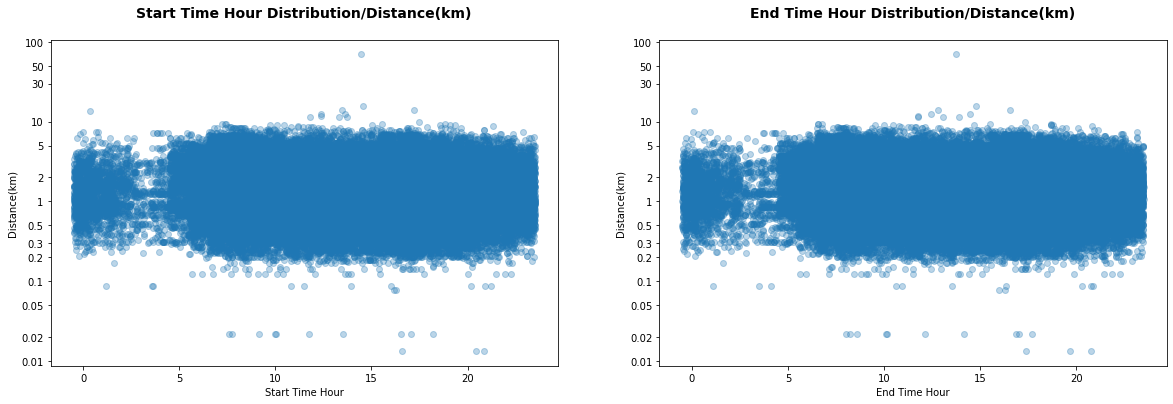

In [121]:
# plotting scatter plot for  Ride Start and End Time Hour vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)

# figure size
plt.figure(figsize =[20, 6])

# transform distance(km) to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# SCATTER PLOT ON LEFT:  Ride Start Time Hour vs. Ride distance
plt.subplot(1,2,1)
# plot scatter plot
sb.regplot(df['start_time_hour'], df['distance_km'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Start Time Hour')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Start Time Hour Distribution/Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT:  Ride End Time Hour vs. Ride distance
plt.subplot(1,2,2)
# plot scatter plot
sb.regplot(df['start_time_hour'], df['distance_km'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('End Time Hour')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("End Time Hour Distribution/Distance(km)", y=1.05, fontsize=14, fontweight='bold');


> ### Insights:
> - There is a very weak negative coorelation between start and end time hour and distance(km): as start and end time hour increases, slightly the distance(km) decreases.

### 2.9 Ride Start and End Time Day vs. Ride distance (2 Plots)

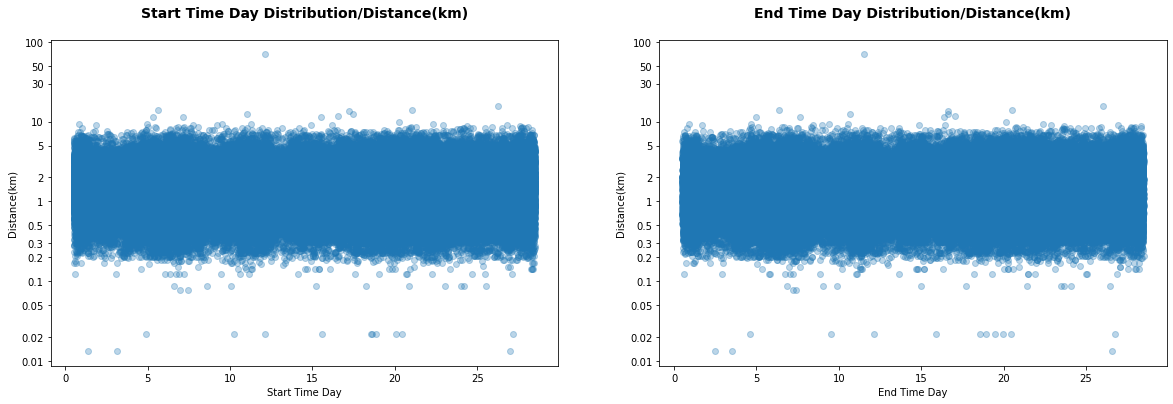

In [122]:
# plotting scatter plot for  Ride Start and End Time Day vs. Ride Duration in Seconds, Minutes, and Hours (6 Plots)

# figure size
plt.figure(figsize =[20, 6])

# transform distance(km) to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# SCATTER PLOT ON LEFT:  Ride Start Time Day vs. Ride distance
plt.subplot(1,2,1)
# plot scatter plot
sb.regplot(df['start_time_day'], df['distance_km'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Start Time Day')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Start Time Day Distribution/Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT:  Ride End Time Day vs. Ride distance
plt.subplot(1,2,2)
# plot scatter plot
sb.regplot(df['end_time_day'], df['distance_km'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('End Time Day')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("End Time Day Distribution/Distance(km)", y=1.05, fontsize=14, fontweight='bold');


> ### Insights:
> - There is a a very weak positive coorelation between start and end time day and distance(km): as start and end time day increases, slightly the distance(km) increases.

### 2.10 Ride Start and End Time Hour vs. Bike Id (2 Plots)

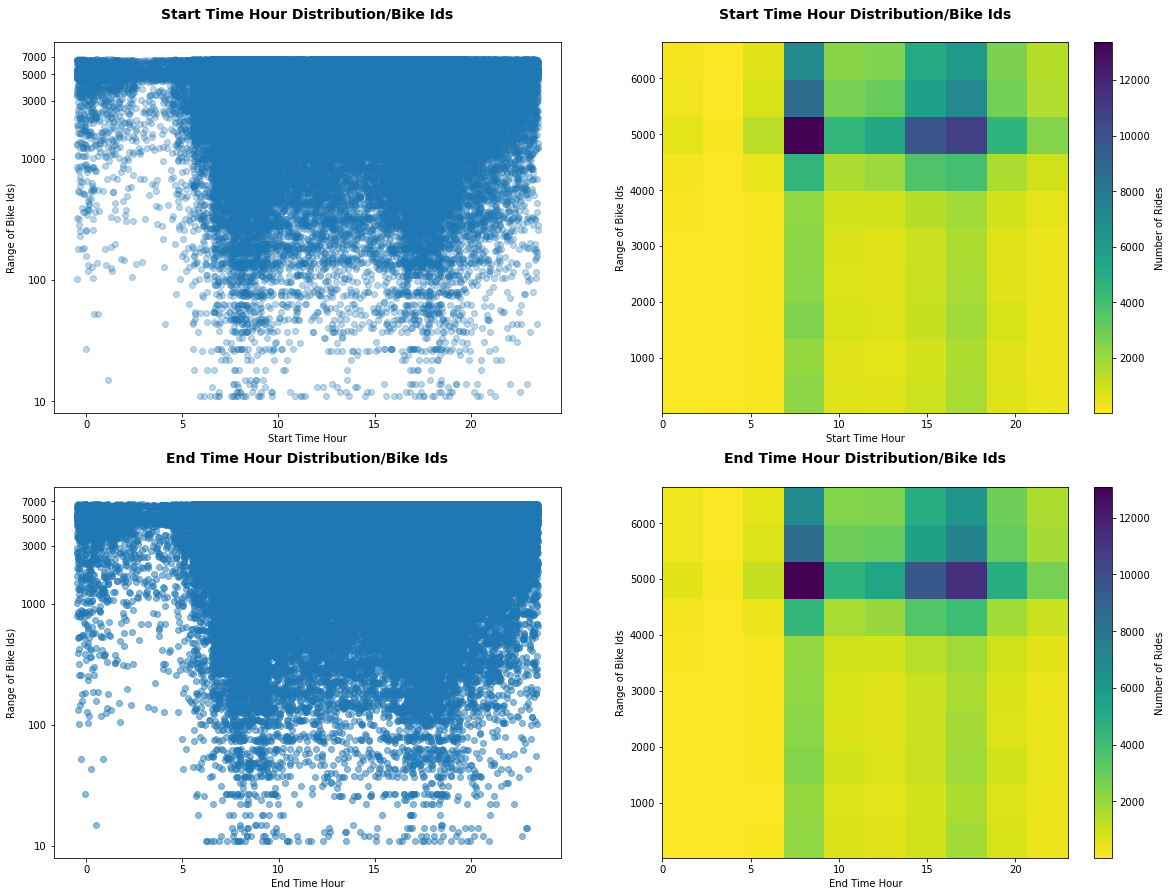

In [123]:
# plotting scatter plot for Ride Start and End Time Hour vs. Bike Id

# figure size
plt.figure(figsize =[20, 15])

# transform bike ids to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# SCATTER PLOT ON ROW1, LEFT:  Ride Start Time hour vs. vs. Bike Ide
plt.subplot(2,2,1)
# plot scatter plot
sb.regplot(x=df['start_time_hour'], y=df['bike_id'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [10, 100, 1000, 3000, 5000, 7000]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Start Time Hour')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Start Time Hour Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON ROW 1, RIGHT: Ride Start Time hour vs. vs. Bike Ide
plt.subplot(2,2,2)
# plot heat map 
plt.hist2d(data = df, x = df['start_time_hour'], y = df['bike_id'], cmap = 'viridis_r')
# labels and title
plt.xlabel('Start Time Hour')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("Start Time Hour Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');


# SCATTER PLOT ON ROW 2, LEFT:  Ride End Time hour vs. vs. Bike Ide
plt.subplot(2,2,3)
# plot scatter plot
sb.regplot(df['end_time_hour'], df['bike_id'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.5})
# y-axis tik scales
tick_locs = [10, 100, 1000, 3000, 5000, 7000]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('End Time Hour')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("End Time Hour Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON ROW 2, RIGHT: Ride End Time hour vs. vs. Bike Ide
plt.subplot(2,2,4)
# plot heat map 
plt.hist2d(data = df, x = df['end_time_hour'], y = df['bike_id'], cmap = 'viridis_r')
# labels and title
plt.xlabel('End Time Hour')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("End Time Hour Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

### Insights:
> - There is a positive coorelation between start and end time hour and range of bike ids used: as start and end time hours increase, the range of bike ids used increases from 4k-above, with most used bikes ranges from 4.5k-5.3k. 

### 2.11 Ride Start and End Time Day vs. Bike Id (2 Plots)


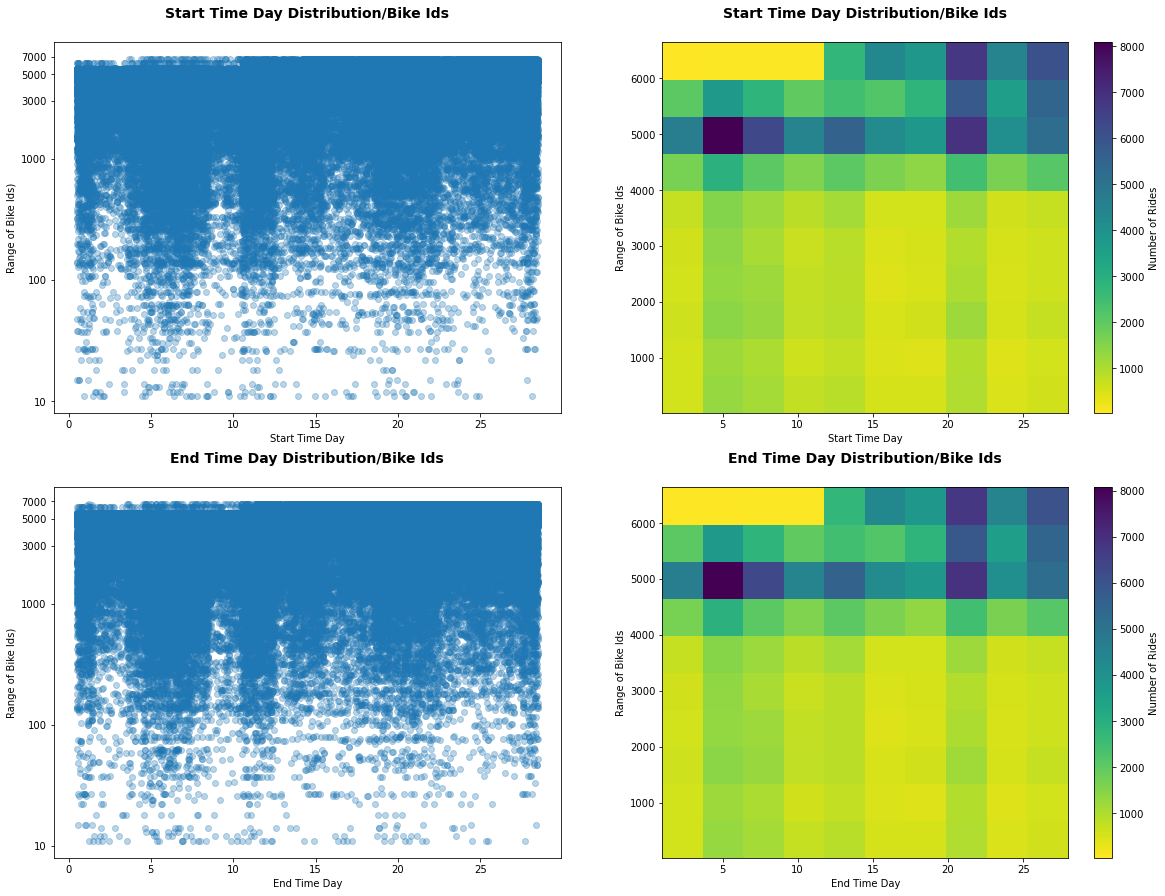

In [124]:
# plotting scatter plot for Ride Start and End Time Day vs. Bike Id

# figure size
plt.figure(figsize =[20, 15])

# transform bike ids to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# SCATTER PLOT ON ROW 1, LEFT:  Ride Start Time Day vs. vs. Bike Ide
plt.subplot(2,2,1)
# plot scatter plot
sb.regplot(df['start_time_day'], df['bike_id'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [10, 100, 1000, 3000, 5000, 7000]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Start Time Day')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Start Time Day Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON ROW 1, RIGHT: Ride Start Time Day vs. vs. Bike Ide
plt.subplot(2,2,2)
# plot heat map 
plt.hist2d(data = df, x = df['start_time_day'], y = df['bike_id'], cmap = 'viridis_r')
# labels and title
plt.xlabel('Start Time Day')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("Start Time Day Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');


# SCATTER PLOT ON ROW 2, LEFT:  Ride End Time Day vs. vs. Bike Ide
plt.subplot(2,2,3)
# plot scatter plot
sb.regplot(df['end_time_day'], df['bike_id'].apply(log_trans), truncate=False, x_jitter=.5, fit_reg=False,
           scatter_kws={'alpha':0.3})
# y-axis tik scales
tick_locs = [10, 100, 1000, 3000, 5000, 7000]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('End Time Day')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("End Time Day Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON ROW 2, RIGHT: Ride End Time Day vs. vs. Bike Ide
plt.subplot(2,2,4)
# plot heat map 
plt.hist2d(data = df, x = df['end_time_day'], y = df['bike_id'], cmap = 'viridis_r')
# labels and title
plt.xlabel('End Time Day')
plt.ylabel('Range of Bike Ids')
plt.xticks(rotation=0)
plt.title("End Time Day Distribution/Bike Ids", y=1.05, fontsize=14, fontweight='bold')
plt.colorbar(label = 'Number of Rides');

### Insights:
> - There is a positive coorelation between start and end time day and range of bike ids used: as start and end time days increase, the range of bike ids used increases from 4k-above, with most used bikes ranges from 4.5k-5.3k.

### 2.12 Ride Duration in Seconds, Minutes, and Hours vs. Bike Id (3 Plots)


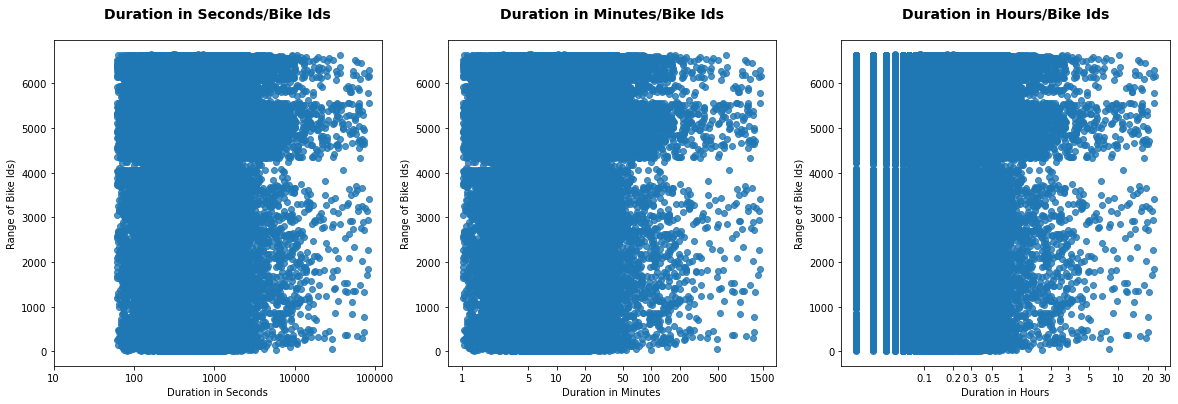

In [125]:
# plotting scatter plot for Ride Duration in Seconds, Minutes, and Hours vs. Bike Id (3 Plots)



# transform bike ids to scale the y axis to the most travelled distancs
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    
# figure size
plt.figure(figsize =[20, 6])

# SCATTER PLOT ON LEFT: Duration in Seconds vs. Bike Ids
plt.subplot(1,3,1)
# scatter plot 
sb.regplot(df['duration_sec'].apply(log_trans), df['bike_id'], fit_reg=False)
# x-axis tik scales
tick_locs = [10, 100, 1000, 10000, 100000]
plt.xticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Seconds')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Duration in Seconds/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE: Duration in Minutes vs. Bike Ids
plt.subplot(1,3,2)
# scatter plot 
sb.regplot(df['duration_minute'].apply(log_trans), df['bike_id'], fit_reg=False)
# x-axis tik scales
tick_locs = [1, 5, 10, 20, 50, 100, 200, 500, 1500]
plt.xticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Minutes')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Duration in Minutes/Bike Ids", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW RIGHT: Duration in Hours vs. Bike Ids
plt.subplot(1,3,3)
# scatter plot 
sb.regplot(df['duration_hour'].apply(log_trans), df['bike_id'], fit_reg=False)
# x-axis tik scales
tick_locs = [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 30]
plt.xticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Hours')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Duration in Hours/Bike Ids", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - There is a a weak negative coorelation between duration in seconds, minutes, and hours and bike ids used: as duration in seconds, minutes, and hours increase, the number of bike ids decreases.
> - Most bike ids are used in a duration below 10k seconds, in a duration below 200 minutes, and in a duration below 5 hours.

### 2.13 Ride Duration in Seconds, Minutes, and Hours vs. Ride Distance (3 Plots)


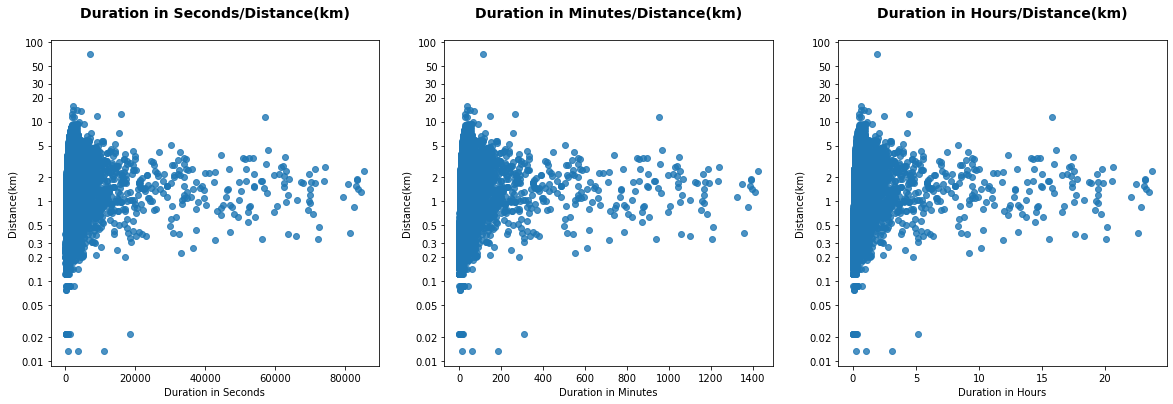

In [126]:
# plotting scatter plot for Ride Duration in Seconds, Minutes, and Hours vs. Ride Distance 

# transform distance(km) to scale the y axis to the most travelled distancs
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# figure size
plt.figure(figsize =[20, 6])

# SCATTER PLOT ON LEFT: Duration in Seconds vs. Ride Distance 

plt.subplot(1,3,1)
# scatter plot 
sb.regplot(x=df['duration_sec'], y=df['distance_km'].apply(log_trans), fit_reg=False)
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Seconds')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration in Seconds/Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE: Duration in Minutes vs. Ride Distance 
plt.subplot(1,3,2)
# scatter plot 
sb.regplot(x=df['duration_minute'], y=df['distance_km'].apply(log_trans), fit_reg=False)
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration in Minutes/Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON ROW RIGHT: Duration in Hours vs. Ride Distance 
plt.subplot(1,3,3)
# scatter plot 
sb.regplot(x=df['duration_hour'], y=df['distance_km'].apply(log_trans), fit_reg=False)
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Duration in Hours')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration in Hours/Distance(km)", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - There is a negative coorelation between duration in seconds, minutes, and hours and distance(km): as duration in seconds, minutes, and hours increase, distance(km) decreases.
> - Most distances are traveled in a duration below 20k seconds, most distances are traveled in a duration below 200 minutes, and most distances are traveled in a duration below 5 hours.

### 2.14 Ride Distance vs. Bike Id (1 Plots)

In [127]:
# check the summary statistics as log type to scale 'distance_km' 
np.log10(ages_minus_0['distance_km']).describe()

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.751470e+05
mean             -inf
std               NaN
min              -inf
25%     -4.205788e-02
50%      1.549003e-01
75%      3.467890e-01
max      1.841793e+00
Name: distance_km, dtype: float64

In [128]:
ages_minus_0['distance_km'].describe()

count    175147.000000
mean          1.689329
std           1.096938
min           0.000000
25%           0.907700
50%           1.428566
75%           2.222230
max          69.469241
Name: distance_km, dtype: float64

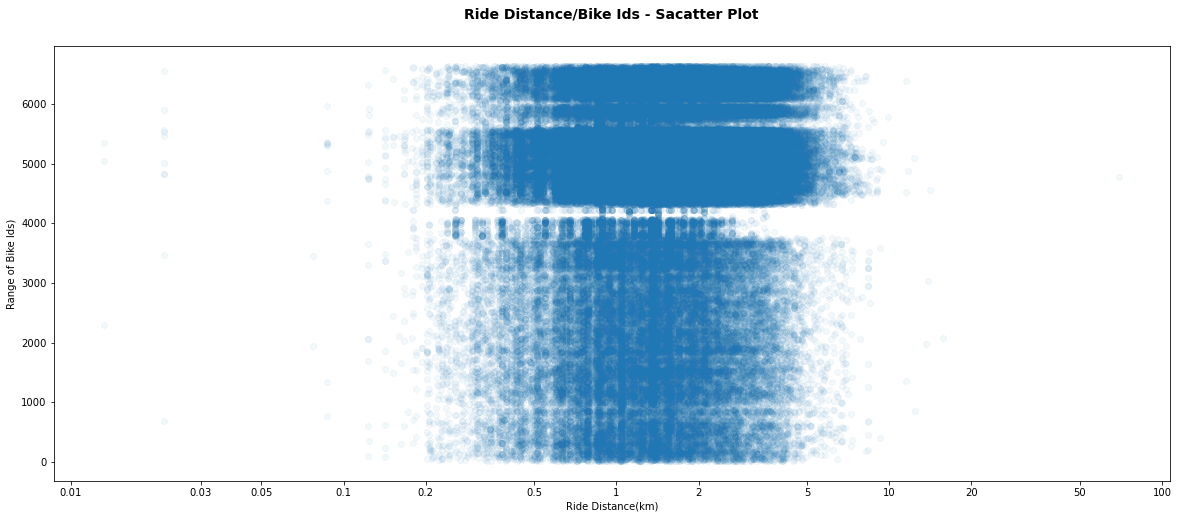

In [129]:
# plotting scatter plot for  Ride Distance vs. Bike Id (1 Plots)

# transform distances(km) to scale the x axis to the most travelled distancs
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    
# figure size
plt.figure(figsize =[20, 8])

# scatter plot 
sb.regplot(x=df['distance_km'].apply(log_trans), y=df['bike_id'], fit_reg=False, scatter_kws={'alpha':1/20})
# x-axis tik scales
tick_locs = [0.01, 0.03, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
plt.xticks(log_trans(tick_locs), tick_locs)
# labels and title
plt.xlabel('Ride Distance(km)')
plt.ylabel('Range of Bike Ids)')
plt.xticks(rotation=0)
plt.title("Ride Distance/Bike Ids - Sacatter Plot", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - There is a very week negative correlation between distance(km) and bike ids used: as distance increase, bike ides decreases.
> - Most ride ids are used in a distance between 0.2km-below 8km.

## 3. Categorical Variable vs. Numeric Variable

We can plot the following 58 categorical vs. numeric relationships for the major categorical variables of user type, member gender, bike share status, age groups, weekdays, and ride start and end stations, compared to the major numeric variables of member ages, duration in seconds, minutes and hours, ride start and end time hour and day, bike id and ride distance:

> 1. User Type vs. Member Age (1 Plot)
> 2. User Type vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 3. User Type vs. Ride start and End Time Hour and Day(4 Plots)
> 4. User Type vs. Bike Id and Ride Distance (2 Plot)
> 5. Member Gender vs. Member Age (1 Plot)
> 6. Member Gender vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 7. Member Gender vs. Ride Start and End Time Hour and Day (4 Plots)
> 8. Member Gender vs. Bike Id and Ride Distance (2 Plot)
> 9. Bike Share Status vs. Member Age (1 Plot)
>10. Bike Share Status vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 11. Bike Share Status vs. Ride Start and End Time Hour and Day (4 Plots)
> 12. Bike Share Status vs. Bike Id and Ride Distance (2 Plot)
> 13. Ride Stations vs. Member Gender (1 Plot)
> 14. Ride Stations vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 15. Ride stations vs. Ride Start and End Time Hour and Day (4 Plots)
> 16. Ride stations vs. Bike Id and Ride Distance (2 Plot)
> 17. Weekday vs. Member Age (1 Plot)
> 18. Weekday vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 19. Weekday vs. Ride start and End Time Hour and Day (4 Plots)
> 20. Weekday vs. Bike Id and Ride Distance (2 Plot)
> 21. Age groups vs. Duration in Seconds, Minutes, and Hours (3 Plots)
> 22. Age groups vs. Ride start and End Time Hour and Day (4 Plots)
> 23. Age groups vs. Bike Id and Ride Distance (2 Plot)
 

### 3.1 User Type vs. Member Age (2 Plot)

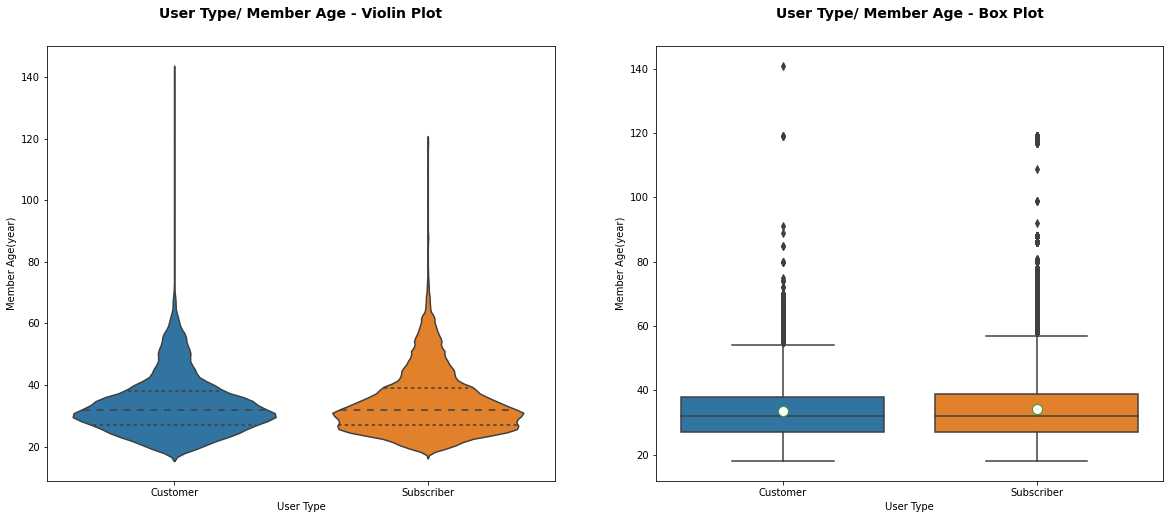

In [130]:
# plot viollin and box plot for User Type vs. Member Age (2 Plot)

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""
# figure size
plt.figure(figsize =[20, 8])

# VIOLIN PLOT ON LEFT:  User Type vs. Member Age
plt.subplot(1,2,1)
sb.violinplot(data=ages_minus_0, x='user_type', y='member_age', inner='quartile')
           
plt.xlabel('User Type')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("User Type/ Member Age - Violin Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT:  User Type vs. Member Age
plt.subplot(1, 2, 2)
sb.boxplot(data=ages_minus_0, x='user_type', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('User Type')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("User Type/ Member Age - Box Plot", y=1.05, fontsize=14, fontweight='bold');

In [131]:
# Check summary statistics for user types/member age
round(ages_minus_0.groupby('user_type')['member_age'].describe())

count  mean   std   min   25%   50%   75%    max
user_type                                                      
Customer     16631.0  34.0   9.0  18.0  27.0  32.0  38.0  141.0
Subscriber  158516.0  34.0  10.0  18.0  27.0  32.0  39.0  119.0

### Insights:
> - Average age for both customer and subscriber is 34 years old.
> - 25% of ages for both customer and subscriber are below 27 years old.
> - Median age for both customer and subscriber is 32 years old.
> - 75% of ages/customer are below 38 years old and for subscriber are below 39 years old.
> - Max age/customer is 141 years old and for subscriber is 119 years old.
> - Member age per user type follow a similar distribution.
> - In general, customer statistics are as typical as those of subscriber, except for the 75% statistic which is higher for subscriber than that of customer but the max statistic for customers is higher than that of subscribers.

### 3.2 User Type vs. Duration in Seconds, Minutes, and Hours (3 Plots)

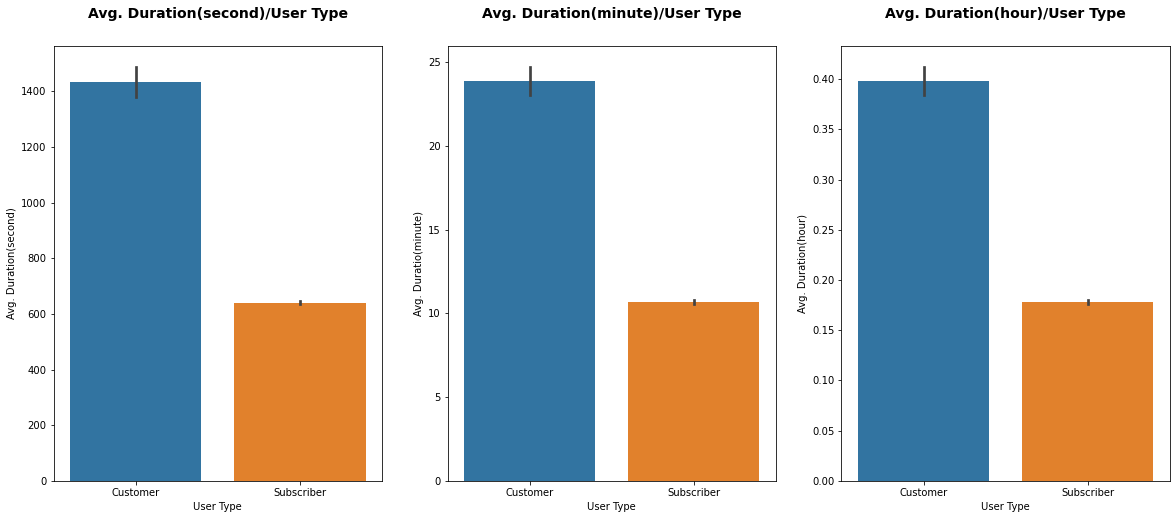

In [132]:
# plot bar plot for User Type vs. Duration in Seconds, Minutes, and Hours (3 Plots)
# figure size
plt.figure(figsize =[20, 8])


# Bar PLOT ON LEFT:  User Type vs. Duration in Seconds
plt.subplot(1,3,1)
sb.barplot(data=df, x='user_type', y='duration_sec')
plt.xticks(rotation=0)
plt.xlabel('User Type')
plt.ylabel('Avg. Duration(second)')
plt.title("Avg. Duration(second)/User Type", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON MIDDLE:  User Type vs. Duration in minutes
plt.subplot(1, 3, 2)
sb.barplot(data=df, x='user_type', y='duration_minute')
plt.xticks(rotation=0)
plt.xlabel('User Type')
plt.ylabel('Avg. Duratio(minute)')
plt.title("Avg. Duration(minute)/User Type", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT:  User Type vs. Duration in hours
plt.subplot(1,3,3)
sb.barplot(data=df, x='user_type', y='duration_hour')
plt.xticks(rotation=0)
plt.xlabel('User Type')
plt.ylabel('Avg. Duration(hour)')
plt.title("Avg. Duration(hour)/User Type", y=1.05, fontsize=14, fontweight='bold');


In [133]:
# Check summary statistics for user types/durations
df.groupby('user_type')[['duration_sec', 'duration_minute', 'duration_hour']].mean()

duration_sec  duration_minute  duration_hour
user_type                                               
Customer     1432.465019        23.874411       0.397911
Subscriber    640.263678        10.671055       0.177846

### Insights:
> - Average duration(second) for customer is 1,432 seconds and for subscriber is 640 seconds.
> - Average duration(minute) for customer is 24 minutes and for subscriber is 11 minutes.
> - Average duration(hour) for customer is 0.4 hour and for subscriber is 0.18 hour.
> - In general, average durations/customers are higher than those of subscribers.

### 3.3 User Type vs. Ride start and End Time Hour and Day(4 Plots)

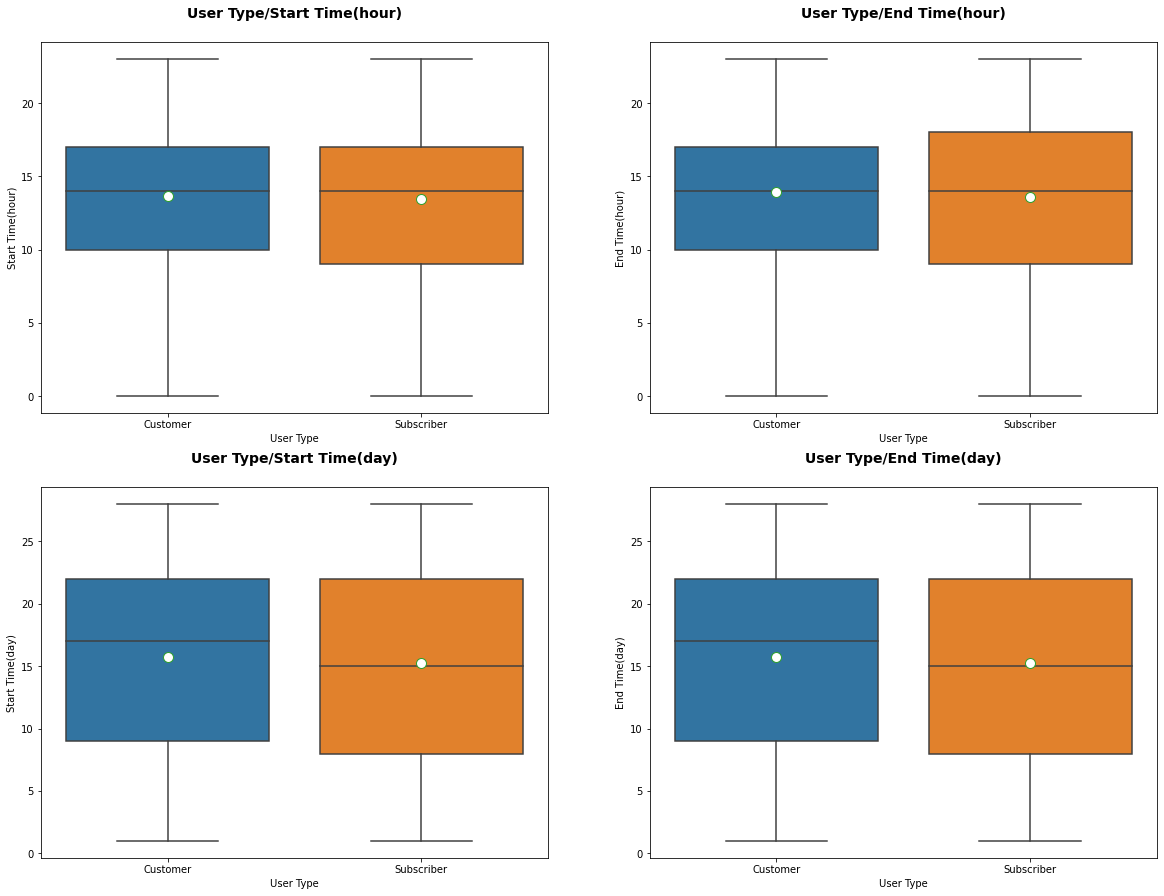

In [134]:
# plot box plot for User Type vs. Ride start and End Time Hour and Day(4 Plots)¶
# figure size
plt.figure(figsize =[20, 15])

# BOX PLOT ON LEFT, ROW 1:  User Type vs. Ride start Time Hour
plt.subplot(2,2,1)
sb.boxplot(data=df, x='user_type', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
plt.xlabel('User Type')
plt.ylabel('Start Time(hour)')
plt.xticks(rotation=0)
plt.title(("User Type/Start Time(hour)"), y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  User Type vs. Ride End Time Hour
plt.subplot(2,2,2)
sb.boxplot(data=df, x='user_type', y='end_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
plt.xlabel('User Type')
plt.ylabel('End Time(hour)')
plt.xticks(rotation=0)
plt.title(("User Type/End Time(hour)"), y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2:  User Type vs. Ride start Time Day
plt.subplot(2,2,3)
sb.boxplot(data=df, x='user_type', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
plt.xlabel('User Type')
plt.ylabel('Start Time(day)')
plt.xticks(rotation=0)
plt.title(("User Type/Start Time(day)"), y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:   User Type vs. Ride start Time Day
plt.subplot(2,2,4)
sb.boxplot(data=df, x='user_type', y='end_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
plt.xlabel('User Type')
plt.ylabel('End Time(day)')
plt.xticks(rotation=0)
plt.title(("User Type/End Time(day)"), y=1.05, fontsize=14, fontweight='bold');

In [135]:
# Check summary statistics for user types/start and end time hours and days
df.groupby('user_type')[['start_time_hour', 'end_time_hour', 'start_time_day', 'end_time_day']].mean()

start_time_hour  end_time_hour  start_time_day  end_time_day
user_type                                                               
Customer          13.644806      13.911969       15.718643     15.718039
Subscriber        13.435779      13.578664       15.247994     15.247285

### Insights:
> - Average start time (hour) for customer is 1.6 PM and for subscriber is 1.3 PM.
> - Average end time (hour) for customer is 1.9 PM and for subscriber is 1.6 PM.
> - Average start and end time(day) for customer is 16 and for subscriber is 15.
> - Start and end time hour for customers is 10 AM and for subscribers is 9 AM. 
> - Start and end time hour for customers is 9 AM and for subscribers is 8 AM. 
> - In general, start and end time hour and day for subscribers are earlier than thos of customers. 

### 3.4 User Type vs. Bike Id and Ride Distance (4 Plot)

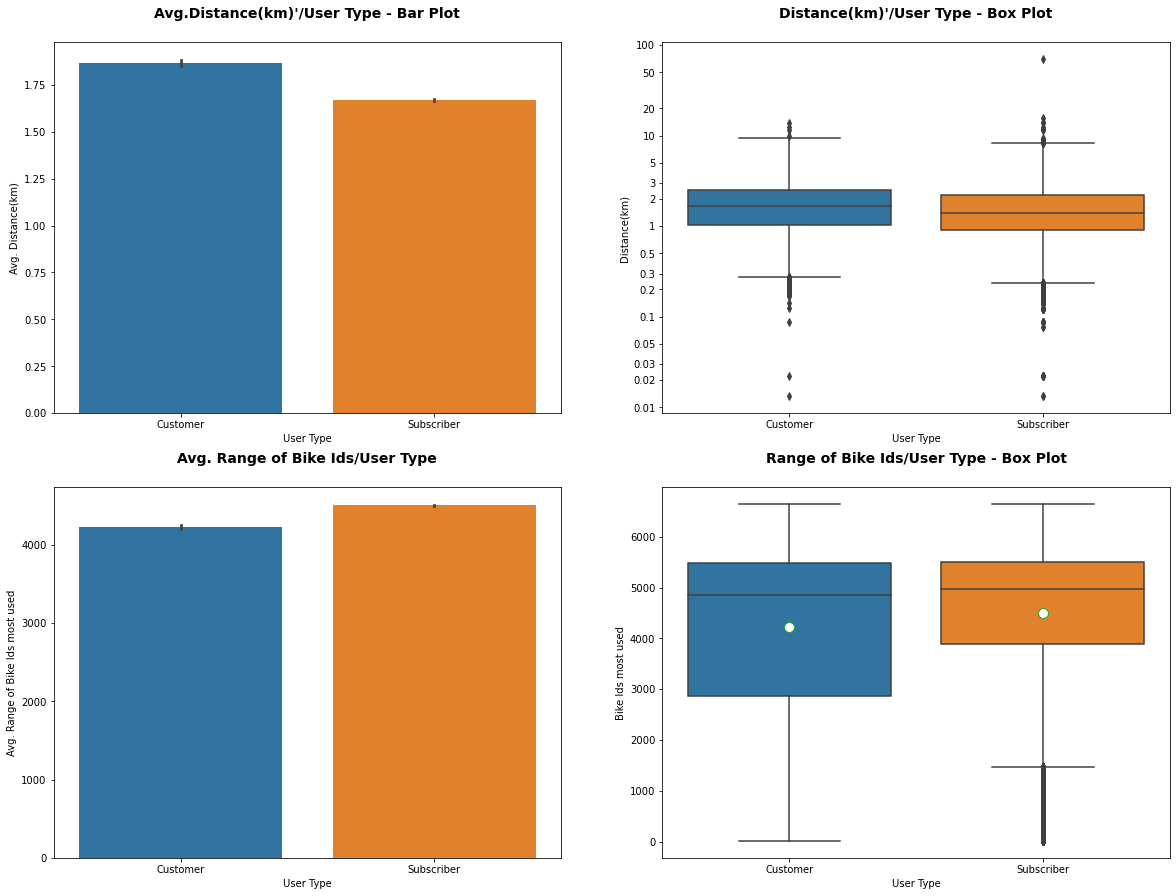

In [136]:
# plot bar plot and box plot for User Type vs. Bike Id and Ride Distance
# figure size
plt.figure(figsize =[20, 15])


# Bar PLOT ON LEFT, ROW 1:  User Type vs. Ride Distance
plt.subplot(2,2,1)
sb.barplot(data=df, x='user_type', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel('User Type')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/User Type - Bar Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  User Type vs. Ride Distance
# transform distances(km) to scale the x axis to the most travelled distancs
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    
plt.subplot(2, 2, 2)
sb.boxplot(data=df, x='user_type', y=df['distance_km'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"20"})
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=15)
plt.xlabel('User Type')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Distance(km)'/User Type - Box Plot", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON LEFT, ROW 2:  User Type vs. Bike Id 
plt.subplot(2, 2, 3)
sb.barplot(data=df, x='user_type', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('User Type')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/User Type", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  User Type vs. Bike Id
plt.subplot(2, 2, 4)
sb.boxplot(data=df, x='user_type', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('User Type')
plt.ylabel('Bike Ids most used')
plt.xticks(rotation=0)
plt.title("Range of Bike Ids/User Type - Box Plot", y=1.05, fontsize=14, fontweight='bold');

In [137]:
# Check summary statistics for user types/distance(km) and bike id
df.groupby('user_type')[['distance_km', 'bike_id']].mean()

distance_km      bike_id
user_type                           
Customer       1.867206  4225.550181
Subscriber     1.669211  4502.956226

### Insights:
> - Average start distance(km) for customer is 1.9km and for subscriber is 1.7km.
> - Average most used bike id for customer is 4,226 and for subscriber is 4503.
> - In general, average distance(km) traveled by and bike id used by customers are higher than those of subscribers. 

### 3.5 Member Gender vs. Member Age (2 Plot)

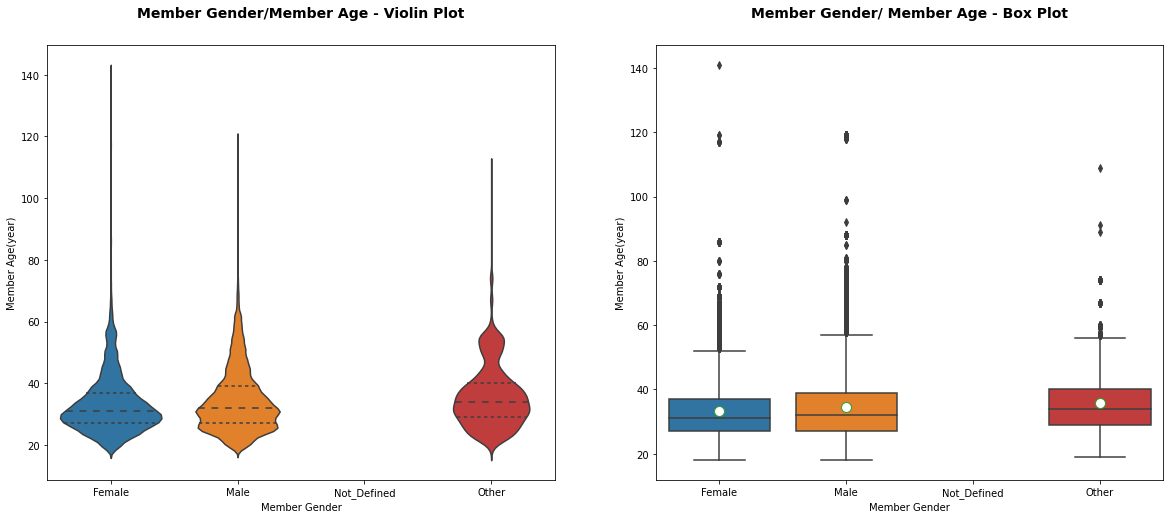

In [138]:
# plot viollin and box plot for Member Gender vs. Member Age 

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""

# figure size
plt.figure(figsize =[20, 8])

# VIOLIN PLOT ON LEFT: Member Gender vs. Member Age 
plt.subplot(1,2,1)
sb.violinplot(data=ages_minus_0, x='member_gender', y='member_age', inner='quartile')
           
plt.xlabel('Member Gender')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("Member Gender/Member Age - Violin Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON Right:  Member Gender vs. Member Age 
plt.subplot(1, 2, 2)
sb.boxplot(data=ages_minus_0, x='member_gender', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Member Gender')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("Member Gender/ Member Age - Box Plot", y=1.05, fontsize=14, fontweight='bold');

In [139]:
# Check summary statistics for member gender/member age
round(ages_minus_0.groupby('member_gender')['member_age'].mean())

member_gender
Female         33.0
Male           34.0
Not_Defined     NaN
Other          36.0
Name: member_age, dtype: float64

### Insights:
> - Average age of female members is 33 years old.
> - Average age of male members is 34 years old.
> - Average age of other members is 36 years old.
> - In general, average age of other members is higher than those of subscribers and male age is higher than female age.

### 3.6 Member Gender vs. Duration in Seconds, Minutes, and Hours (3 Plots)

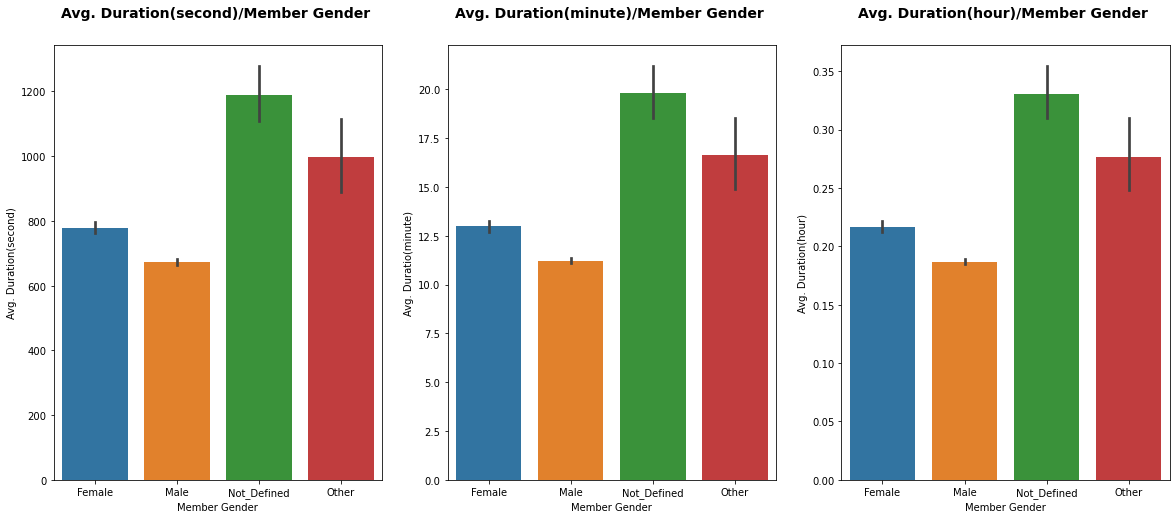

In [140]:
# plot bar plot for Member Gender vs. Duration in Seconds, Minutes, and Hours 
# figure size
plt.figure(figsize =[20, 8])


# Bar PLOT ON LEFT:   Member Gender vs. Duration in Seconds
plt.subplot(1,3,1)
sb.barplot(data=df, x='member_gender', y='duration_sec')
plt.xticks(rotation=0)
plt.xlabel('Member Gender')
plt.ylabel('Avg. Duration(second)')
plt.title("Avg. Duration(second)/Member Gender ", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON MIDDLE:   Member Gender vs. Duration in minutes
plt.subplot(1, 3, 2)
sb.barplot(data=df, x='member_gender', y='duration_minute')
plt.xticks(rotation=0)
plt.xlabel('Member Gender')
plt.ylabel('Avg. Duratio(minute)')
plt.title("Avg. Duration(minute)/Member Gender ", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT:   Member Gender vs. Duration in hours
plt.subplot(1,3,3)
sb.barplot(data=df, x='member_gender', y='duration_hour')
plt.xticks(rotation=0)
plt.xlabel('Member Gender')
plt.ylabel('Avg. Duration(hour)')
plt.title("Avg. Duration(hour)/Member Gender ", y=1.05, fontsize=14, fontweight='bold');


In [141]:
# Check summary statistics for member genders/durations
df.groupby('member_gender')[['duration_sec', 'duration_minute', 'duration_hour']].mean()

duration_sec  duration_minute  duration_hour
member_gender                                              
Female           779.070390        12.984508       0.216419
Male             672.639069        11.210645       0.186836
Not_Defined     1189.462311        19.824347       0.330428
Other            996.515334        16.608535       0.276717

### Insights:
> - Average duration (second) for female is 779 seconds, for male is 673 seconds, for not-defined is 1,189 seconds, and for other is 997 seconds.
> - Average duration (minutes) for female is 13 minutes, for male is 11 minutes, for not-defined is 20 minutes, and for other is 17 minutes.
> - Average duration (hour) for female is 0.22 hour, for male is 0.19 hour, for not-defined is 0.33 hours, and for other is 0.028 hours.
> - In general, average durations spent by not-defined and other genders are higher than those of male and female genders, but  females spent more duration than males.

### 3.7 Member Gender vs. Ride Start and End Time Hour and Day (4 Plots)

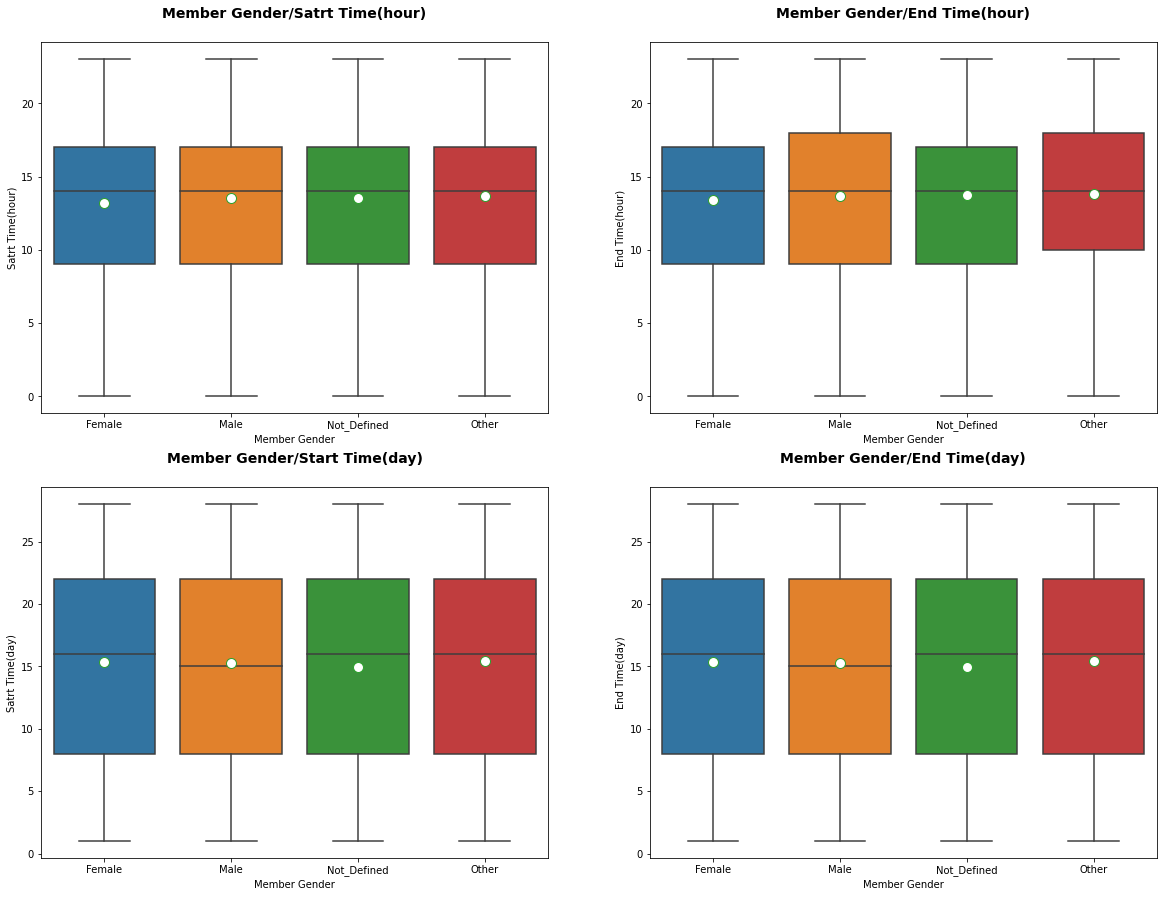

In [142]:
# plot box plot for Member Gender vs. Ride Start and End Time Hour and Day 
# figure size
plt.figure(figsize =[20, 15])

# BOX PLOT ON LEFT, ROW 1:  Member Gender vs. Ride start Time Hour
plt.subplot(2,2,1)
sb.boxplot(data=df, x='member_gender', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Member Gender')
plt.ylabel('Satrt Time(hour)')
plt.xticks(rotation=0)
plt.title("Member Gender/Satrt Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  Member Gender vs. Ride End Time Hour
plt.subplot(2,2,2)
sb.boxplot(data=df, x='member_gender', y='end_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Member Gender')
plt.ylabel('End Time(hour)')
plt.xticks(rotation=0)
plt.title("Member Gender/End Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2:  Member Gender vs. Ride start Time  Day
plt.subplot(2,2,3)
sb.boxplot(data=df, x='member_gender', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Member Gender')
plt.ylabel('Satrt Time(day)')
plt.xticks(rotation=0)
plt.title("Member Gender/Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:   Member Gender vs. Ride End Time Day
plt.subplot(2,2,4)
sb.boxplot(data=df, x='member_gender', y='end_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Member Gender')
plt.ylabel('End Time(day)')
plt.xticks(rotation=0)
plt.title("Member Gender/End Time(day)", y=1.05, fontsize=14, fontweight='bold');

In [143]:
# Check summary statistics for member genders/start and end time hour and day
df.groupby('member_gender')[['start_time_hour', 'end_time_hour','start_time_day','end_time_day']].mean()

start_time_hour  end_time_hour  start_time_day  end_time_day
member_gender                                                              
Female               13.216335      13.387474       15.378244     15.378440
Male                 13.525277      13.674017       15.291976     15.291341
Not_Defined          13.503448      13.721355       14.964186     14.961887
Other                13.672234      13.796002       15.420591     15.411281

### Insights:
> - Average start time(hour) for female is 1.2 PM, for male is 1.5 PM, for not-defined is 1.5 PM, and for other is 1.7 PM.
> - Average end time(hour) for female is 1.4 PM, for male is 1.7 PM, for not-defined is 1.7 PM, and for other is 1.8 PM.
> - Average start and end time(day) for female is 15, for male is 15, for not-defined is 15, and for other is 15.
> - In general, average start and end day per all genders is the same but average start and end time hour per female is earlier than males and all other genders.
> - 25% of all genders' start time hour is below 9 AM and 75% start time hour is below 5 PM. 25% all genders' end time hour is below 9 AM, except for other gender (10 AM), and 75% end time hour is below 5 PM, except for male gender (6 PM). 
> - 25% of all genders' start and end time day is below day 8 of the month and 75% start time day is below day 22 of the month.

### 3.8 Member Gender vs. Bike Id and Ride Distance (4 Plot)

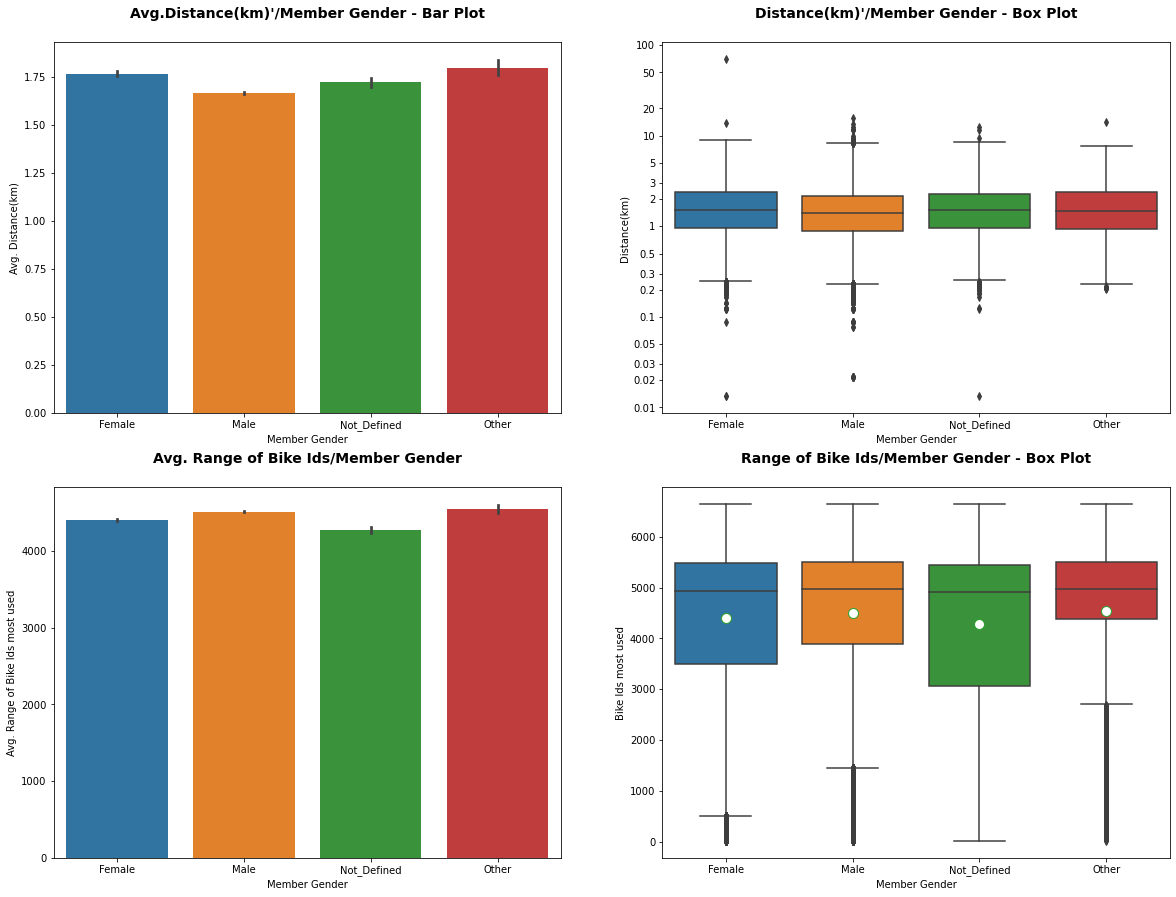

In [144]:
# plot bar plot and box plot for Member Gender vs. Bike Id and Ride Distance
# figure size
plt.figure(figsize =[20, 15])

# Bar PLOT ON LEFT, ROW 1:  Member Gender vs. Ride Distance
plt.subplot(2,2,1)
sb.barplot(data=df, x='member_gender', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel('Member Gender')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/Member Gender - Bar Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  Member Gender vs. Ride Distance
# transform distances(km) to scale the x axis to the most travelled distancs
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    
plt.subplot(2, 2, 2)
sb.boxplot(data=df, x='member_gender', y=df['distance_km'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"20"})
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=15)
plt.xlabel('Member Gender')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Distance(km)'/Member Gender - Box Plot", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON LEFT, ROW 2:  Member Gender vs. Bike Id 
plt.subplot(2, 2, 3)
sb.barplot(data=df, x='member_gender', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('Member Gender')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/Member Gender", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Member Gender vs. Bike Id
plt.subplot(2, 2, 4)
sb.boxplot(data=df, x='member_gender', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Member Gender')
plt.ylabel('Bike Ids most used')
plt.xticks(rotation=0)
plt.title("Range of Bike Ids/Member Gender - Box Plot", y=1.05, fontsize=14, fontweight='bold');

In [145]:
# Check summary statistics for member genders/distance and bike id
df.groupby('member_gender')[['distance_km', 'bike_id']].mean()

distance_km      bike_id
member_gender                          
Female            1.765259  4396.909020
Male              1.662637  4507.239707
Not_Defined       1.718845  4274.845856
Other             1.795024  4542.819277

### Insights:
> - Average distance(km) for female 1.8km, for male is 1.7km, for not-defined is 1.7km, and for other is 1.8km.
> - Average used bike id for female is 4,397, for male is 4,507, for not-defined is 4,275, and for other is 4543.
> - In general, average distance(km) traveled by females and others are higher than those of male and not-defined genders. Average used ids ranges from 4,275 to 4543.

### 3.9 Bike Share Status vs. Member Age (3 Plot)

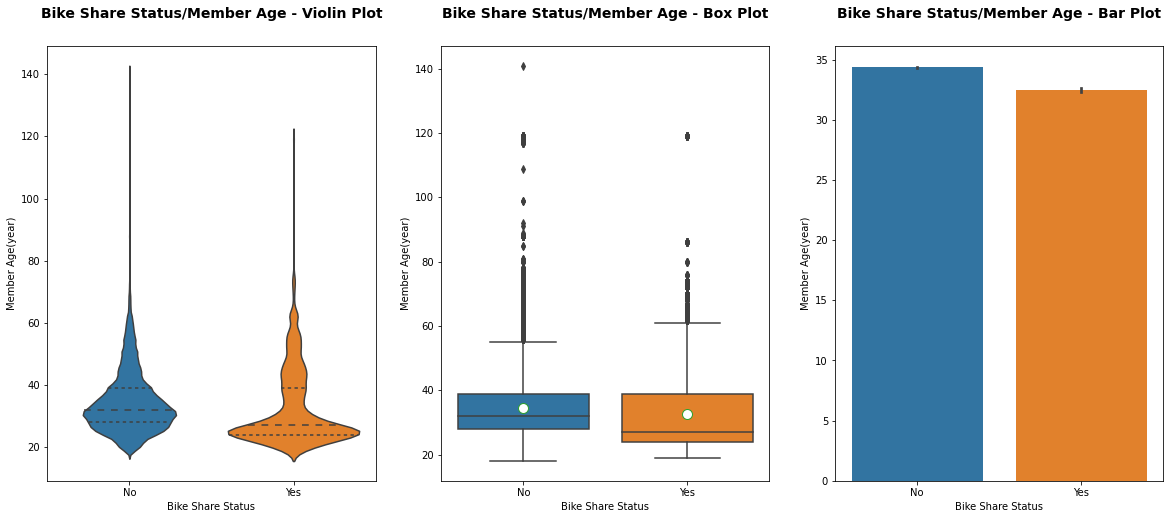

In [146]:
# plot viollin, box plot, and bar plot for Bike Share Status vs. Member Age 

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""
# figure size
plt.figure(figsize =[20, 8])

# VIOLIN PLOT ON LEFT: Bike Share Status vs. Member Age 
plt.subplot(1, 3, 1)
sb.violinplot(data=ages_minus_0, x='bike_share_for_all_trip', y='member_age', inner='quartile')
           
plt.xlabel('Bike Share Status')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/Member Age - Violin Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE:  Bike Share Status vs. Member Age 
plt.subplot(1, 3, 2)
sb.boxplot(data=ages_minus_0, x='bike_share_for_all_trip', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Bike Share Status')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/Member Age - Box Plot", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT: Bike Share Status vs. Member Age 
plt.subplot(1, 3, 3)
sb.barplot(data=ages_minus_0, x='bike_share_for_all_trip', y='member_age')
plt.xticks(rotation=0)
plt.xlabel('Bike Share Status')
plt.ylabel('Member Age(year)')
plt.title("Bike Share Status/Member Age - Bar Plot", y=1.05, fontsize=14, fontweight='bold');


In [147]:
# Check summary statistics for bike share status/member age
round(ages_minus_0.groupby('bike_share_for_all_trip')['member_age'].mean())

bike_share_for_all_trip
No     34.0
Yes    32.0
Name: member_age, dtype: float64

### Insights:
> - Average member age that share bikes during the ride is 34 years old.
> - Average member age that doesn't share bikes during the ride is 32 years old.

### 3.10 Bike Share Status vs. Duration in Seconds, Minutes, and Hours (3 Plots)

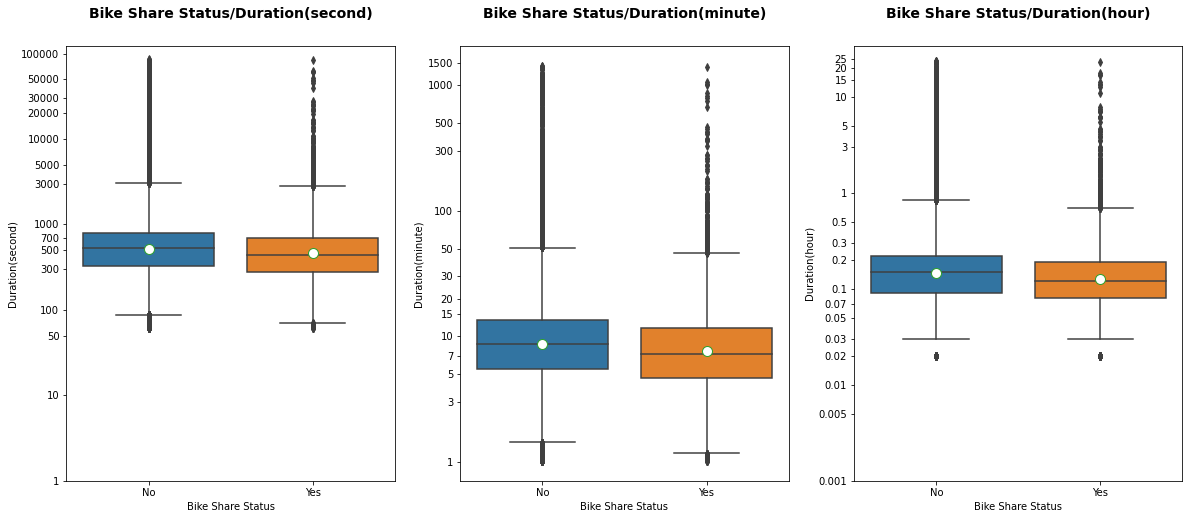

In [148]:
# plot box plot for Bike Share Status vs. Duration in Seconds, Minutes, and Hours
# figure size
plt.figure(figsize =[20, 8])

# transform y-axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    

# BOX PLOT ON LEFT, ROW 1:  Bike Share Status vs. Duration in Seconds
plt.subplot(1,3,1)
sb.boxplot(data=df, x='bike_share_for_all_trip', y=df['duration_sec'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
# y-axis tik scales
tick_locs = [1,10, 50, 100, 300, 500, 700, 1000, 3000, 5000, 10000, 20000, 30000, 50000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Bike Share Status')
plt.ylabel('Duration(second)')
plt.xticks(rotation=0)
plt.title(("Bike Share Status/Duration(second)"), y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 1:  Bike Share Status vs. Duration in Minutes
plt.subplot(1,3,2)
sb.boxplot(data=df, x='bike_share_for_all_trip', y=df['duration_minute'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
# y-axis tik scales
tick_locs = [1, 3, 5, 7, 10, 15, 20, 30, 50, 100, 300, 500, 1000, 1500]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Bike Share Status')
plt.ylabel('Duration(minute)')
plt.xticks(rotation=0)
plt.title(("Bike Share Status/Duration(minute)"), y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Bike Share Status vs. Duration in Hours
plt.subplot(1,3,3)
sb.boxplot(data=df, x='bike_share_for_all_trip', y=df['duration_hour'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markersize":"10"})
# y-axis tik scales
tick_locs = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10, 15, 20, 25]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Bike Share Status')
plt.ylabel('Duration(hour)')
plt.xticks(rotation=0)
plt.title(("Bike Share Status/Duration(hour)"), y=1.05, fontsize=14, fontweight='bold');

In [149]:
# Check summary statistics for Bike Share Status vs. Duration in Seconds, Minutes, and Hours
df.groupby('bike_share_for_all_trip')[['duration_sec', 'duration_minute', 'duration_hour']].mean()

duration_sec  duration_minute  duration_hour
bike_share_for_all_trip                                              
No                         730.454253        12.174229       0.202899
Yes                        684.220174        11.403686       0.190069

### Insights:
> - Average duration(second) for non-shared bike rides is 730 seconds and for shared rides is 684 seconds.
> - Average duration(minute) for non-shared bike rides is 12 minutes and for shared rides is 11 minutes.
> - Average duration(hour) for non-shared bike rides is 0.2 hours and for shared rides is 0.19 hour.
> - In general, average durations for non-shared bike rides are higher than that of shared bike rides.

### 3.11 Bike Share Status vs. Ride Start and End Time Hour and Day (4 Plots)

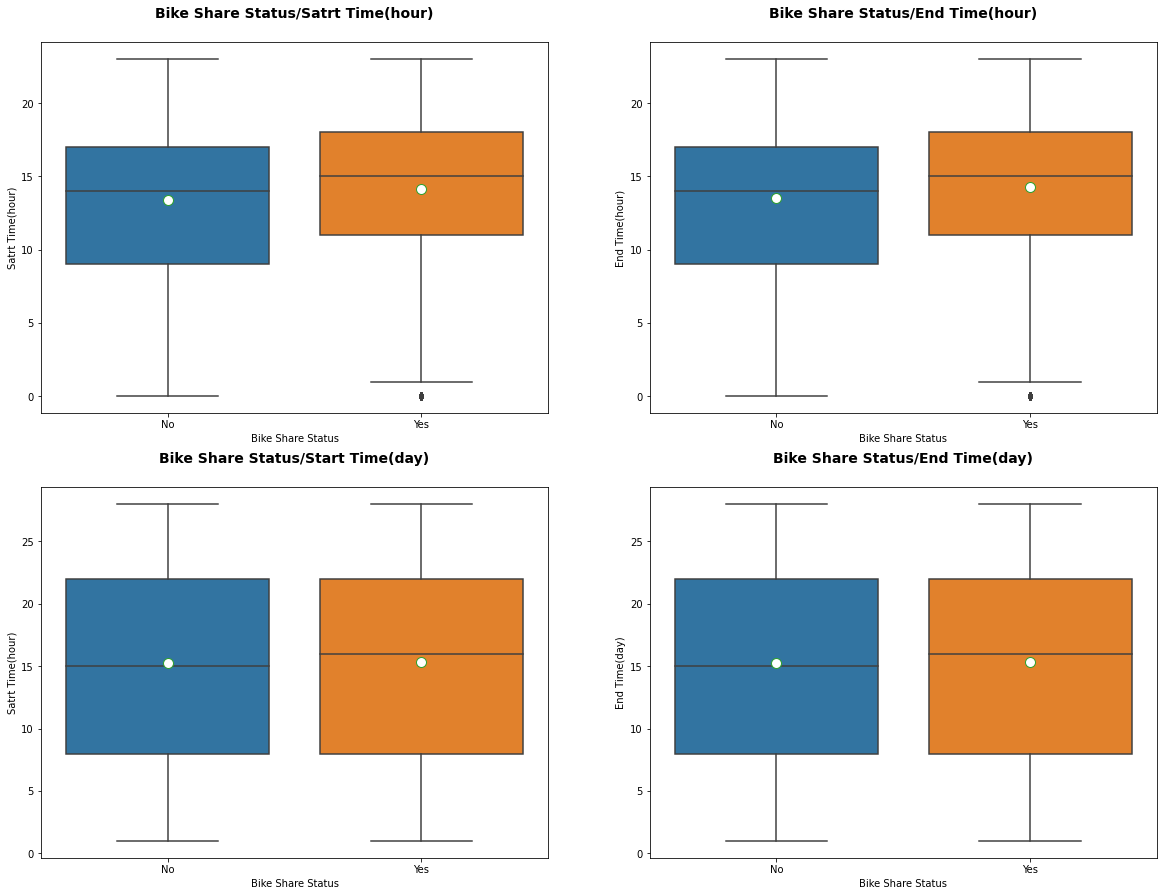

In [150]:
# plot box plot for Bike Share Status vs. Ride Start and End Time Hour and Day
# figure size
plt.figure(figsize =[20, 15])

# BOX PLOT ON LEFT, ROW 1:  Bike Share Status vs. Ride Start Time Hour
plt.subplot(2,2,1)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Bike Share Status')
plt.ylabel('Satrt Time(hour)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/Satrt Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  Bike Share Status vs. Ride End Time Hour 
plt.subplot(2,2,2)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='end_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Bike Share Status')
plt.ylabel('End Time(hour)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/End Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2:  Bike Share Status vs. Ride Start Time Day
plt.subplot(2,2,3)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Bike Share Status')
plt.ylabel('Satrt Time(hour)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Bike Share Status vs. Ride End Time Day
plt.subplot(2,2,4)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='end_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Bike Share Status')
plt.ylabel('End Time(day)')
plt.xticks(rotation=0)
plt.title("Bike Share Status/End Time(day)", y=1.05, fontsize=14, fontweight='bold');

In [151]:
# Check summary statistics for Bike Share Status vs. Ride Start and End Time Hour and Day
df.groupby('bike_share_for_all_trip')[['start_time_hour', 'end_time_hour', 'start_time_day', 'end_time_day']].mean()

start_time_hour  end_time_hour  start_time_day  \
bike_share_for_all_trip                                                   
No                             13.387587      13.546350       15.298357   
Yes                            14.136010      14.269255       15.304914   

                         end_time_day  
bike_share_for_all_trip                
No                          15.297863  
Yes                         15.302264

### Insights:
> - Average start time(hour) for non-shared bike rides is 1.4 PM and for shared rides is 2.1 PM.
> - Average end time (hour) for non-shared bike rides is 1.5 PM and for shared rides is 2.2 PM.
> - Average start and end time(day) for both non-shared or shared bike rides is 3.3 PM.
> - In general, start and end time(hour for non-shared bike rides is earlier than that of shared bike rides, while the average of start and end time(day) is same (3.3 PM).

### 3.12 Bike Share Status vs. Bike Id and Ride Distance (4 Plot)

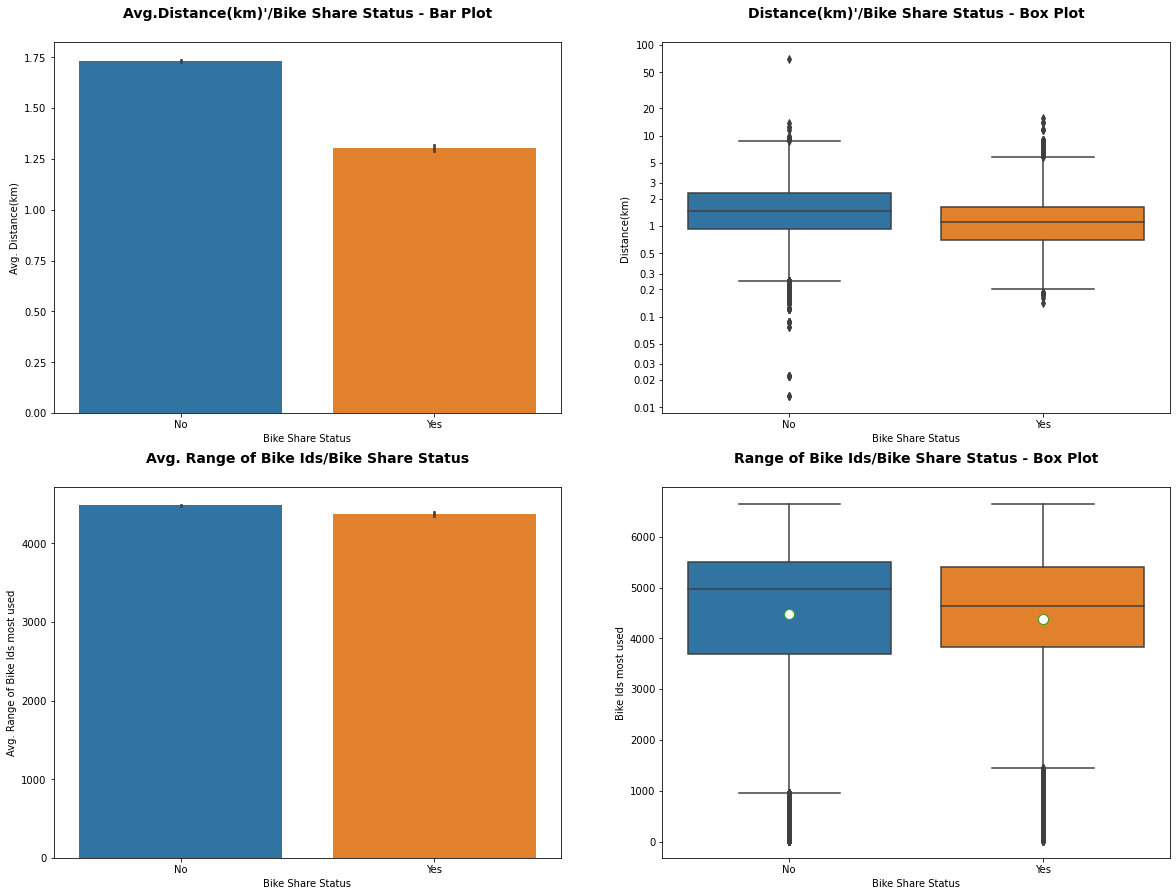

In [152]:
# plot bar plot and box plot for Bike Share Status vs. Bike Id and Ride Distance 
# figure size
plt.figure(figsize =[20, 15])

# Bar PLOT ON LEFT, ROW 1:  Bike Share Status vs. Ride Distance
plt.subplot(2,2,1)
sb.barplot(data=df, x='bike_share_for_all_trip', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel('Bike Share Status')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/Bike Share Status - Bar Plot", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  Bike Share Status vs. Ride Distance
# transform distances(km) to scale the x axis to the most travelled distancs
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
    
plt.subplot(2, 2, 2)
sb.boxplot(data=df, x='bike_share_for_all_trip', y=df['distance_km'].apply(log_trans), showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"20"})
# x-axis tik scales
tick_locs = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=15)
plt.xlabel('Bike Share Status')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Distance(km)'/Bike Share Status - Box Plot", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON LEFT, ROW 2:  Bike Share Status vs. Bike Id 
plt.subplot(2, 2, 3)
sb.barplot(data=df, x='bike_share_for_all_trip', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('Bike Share Status')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/Bike Share Status", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Bike Share Status vs. Bike Id
plt.subplot(2, 2, 4)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Bike Share Status')
plt.ylabel('Bike Ids most used')
plt.xticks(rotation=0)
plt.title("Range of Bike Ids/Bike Share Status - Box Plot", y=1.05, fontsize=14, fontweight='bold');

In [153]:
# Check summary statistics for Bike Share Status vs. Bike Id and Ride Distance
df.groupby('bike_share_for_all_trip')[['distance_km', 'bike_id']].mean()

distance_km      bike_id
bike_share_for_all_trip                          
No                          1.731022  4482.769845
Yes                         1.304558  4378.554237

### Insights:
> - Average distance(km) for non-shared bike rides is 1.7km and for shared bike rides is 1.3km. Average distance shared is lower than that non-shared.
> - Average used bike id for shared bike rides is 4483 and for shared bike rides is 4379.


### 3.13 Ride Stations vs. Member Age (3 Plots)

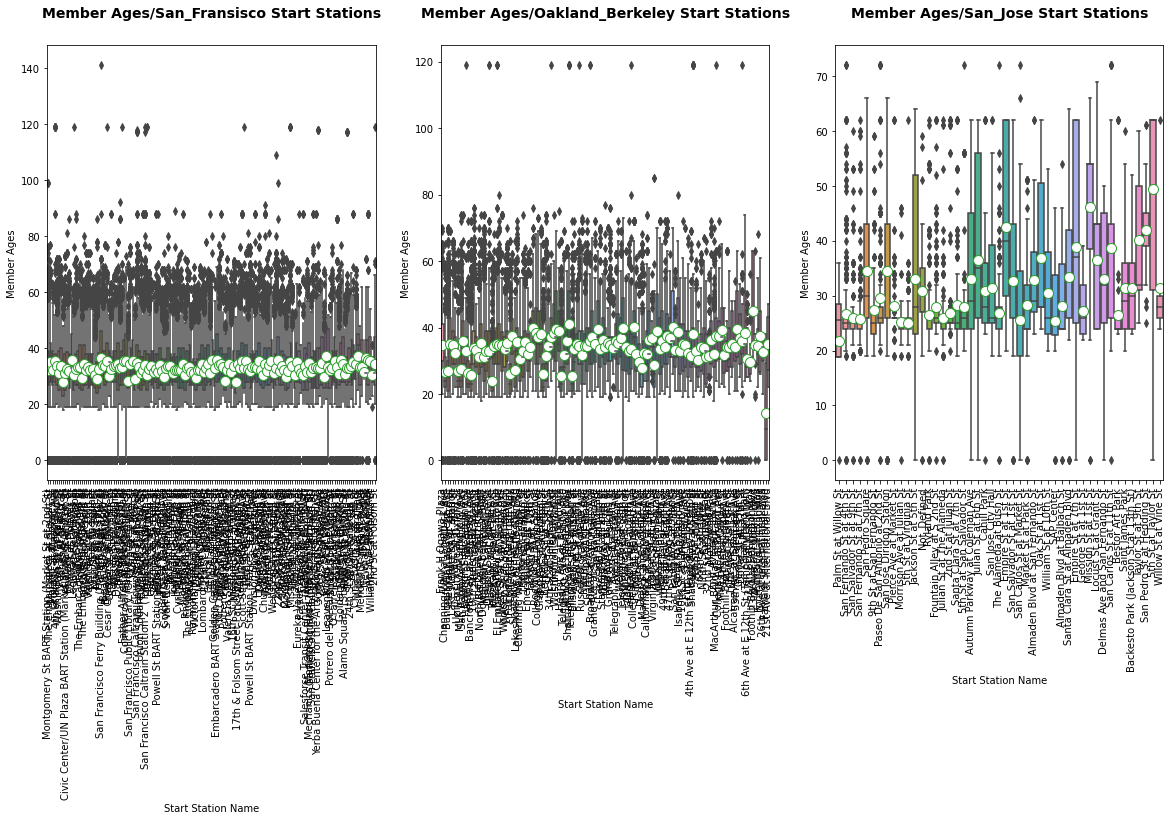

In [154]:
# plot box plot for Ride Stations vs. Member Age 
# figure size
plt.figure(figsize =[20, 8])

# BOX PLOT ON LEFT, ROW 1:  San_Fransisco Ride Stations vs. Member Age 
plt.subplot(1,3,1)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Member Ages/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Ride Stations vs. Member Age 
plt.subplot(1,3,2)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Member Ages/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  San_Jose Ride Stations vs. Member Age 
plt.subplot(1,3,3)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='member_age', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Member Ages/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

In [155]:
# Check summary statistics for Bike Share Status vs. Bike Id and Ride Distance
print("Average Member Age for San Fransisco 's Sations: {}".format(round(San_Fransisco.groupby('start_station_name')
                                                                         ['member_age'].mean().mean())))
print("Average Member Age for Oakland_Berkeley 's Sations: {}".format(round(Oakland_Berkeley.groupby('start_station_name')
                                                                            ['member_age'].mean().mean())))
print("Average Member Age for San Jose 's Sations: {}".format(round(San_Jose.groupby('start_station_name')
                                                                    ['member_age'].mean().mean())))


Average Member Age for San Fransisco 's Sations: 33
Average Member Age for Oakland_Berkeley 's Sations: 34
Average Member Age for San Jose 's Sations: 31


### Insights:
> - Average member age for San Fransisco 's Sations is 33 years old, for Oakland_Berkeley 's Sations is 34 years old, for San Jose 's Sations is 31 years old.

### 3.14 Ride Stations vs. Duration in Seconds, Minutes, and Hours (9 Plots)

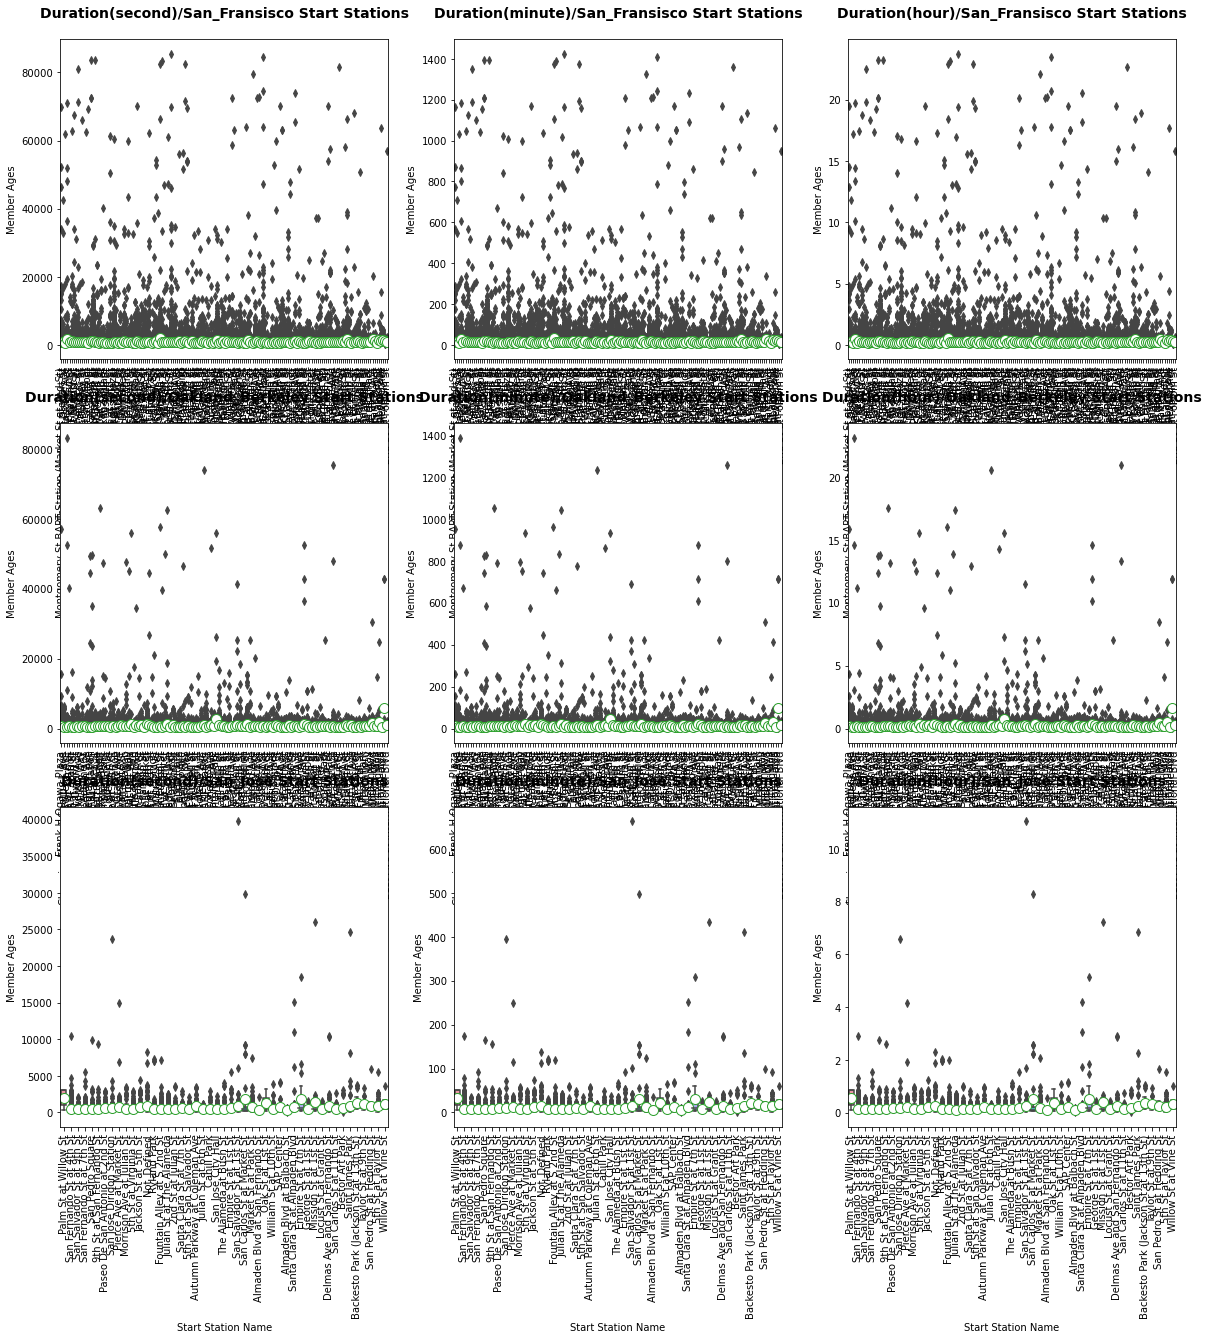

In [156]:
# plot box plot for Ride Stations vs. Duration in Seconds, Minutes, and Hours
# figure size
plt.figure(figsize =[20, 20])

# BOX PLOT ON LEFT, ROW 1:  San_Fransisco Ride Stations vs. Duration in Seconds
plt.subplot(3,3,1)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='duration_sec', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(second)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 1:  San_Fransisco Ride Stations vs. Duration in Minutes
plt.subplot(3,3,2)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='duration_minute', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(minute)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1: San_Fransisco Ride Stations vs. Duration in Hours
plt.subplot(3,3,3)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='duration_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(hour)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2:  Oakland_Berkeley Ride Stations vs. Duration in Seconds
plt.subplot(3,3,4)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='duration_sec', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(second)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 2:  Oakland_Berkeley Ride Stations vs. Duration in Minutes
plt.subplot(3,3,5)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='duration_minute', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(minute)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Oakland_Berkeley Ride Stations vs. Duration Hours
plt.subplot(3,3,6)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='duration_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(hour)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 3:  San_Jose Ride Stations vs. Duration in Seconds
plt.subplot(3,3,7)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='duration_sec', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(second)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 3:  San_Jose Ride Stations vs. Duration in Minutes
plt.subplot(3,3,8)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='duration_minute', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(minute)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 3:  San_Jose Ride Stations vs. Duration in Hours
plt.subplot(3,3,9)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='duration_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Duration(hour)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

In [157]:
# Check summary statistics for Ride Stations vs. Duration in Seconds, Minutes, and Hours
print("Average Duration (second) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['duration_sec'].mean().mean()))
print("Average Duration (minute) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['duration_minute'].mean().mean()))
print("Average Duration (hour) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                        ['duration_hour'].mean().mean()))
print("Average Duration (second) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['duration_sec'].mean().mean()))
print("Average Duration (minute) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['duration_minute'].mean().mean()))
print("Average Duration (hour) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['duration_hour'].mean().mean()))
print("Average Duration (second) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['duration_sec'].mean().mean()))
print("Average Duration (minute) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['duration_minute'].mean().mean()))
print("Average Duration (hour) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['duration_hour'].mean().mean()))
                                                                                

Average Duration (second) for San Fransisco 's Sations: 812.576605692139
Average Duration (minute) for San Fransisco 's Sations: 13.54292960909751
Average Duration (hour) for San Fransisco 's Sations: 0.22571734196102256
Average Duration (second) for Oakland_Berkeley 's Sations: 747.5424529127471
Average Duration (minute) for Oakland_Berkeley 's Sations: 12.45902643751609
Average Duration (hour) for Oakland_Berkeley 's Sations: 0.2076423657527583
Average Duration (second) for San Jose's Sations: 752.5631162273226
Average Duration (minute) for San Jose's Sations: 12.542606416313205
Average Duration (hour) for San Jose's Sations: 0.2090948373619982


### Insights:
> - Average duration (second) for San Fransisco 's sations is 812.6 seconds, for Oakland_Berkeley 's stations is 747.5 seconds, and for San Jose's sations is 752.6 seconds.
> - Average duration (minute) for San Fransisco 's sations is 13.5 minutes, for Oakland_Berkeley 's stations is 12.5 minutes, and for San Jose's sations is 12.5 minutes.
> - Average duration (hour) for San Fransisco 's sations is 0.23 hour, for Oakland_Berkeley 's stations is 0.21 hour, and for San Jose's sations is 0.21 hour.
> In general, San Fransisco 's sations have higher durations than both Oakland_Berkeley 's stations and San Jose's sations.

### 3.15 Ride stations vs. Ride Start Time Hour and Day (6 Plots)

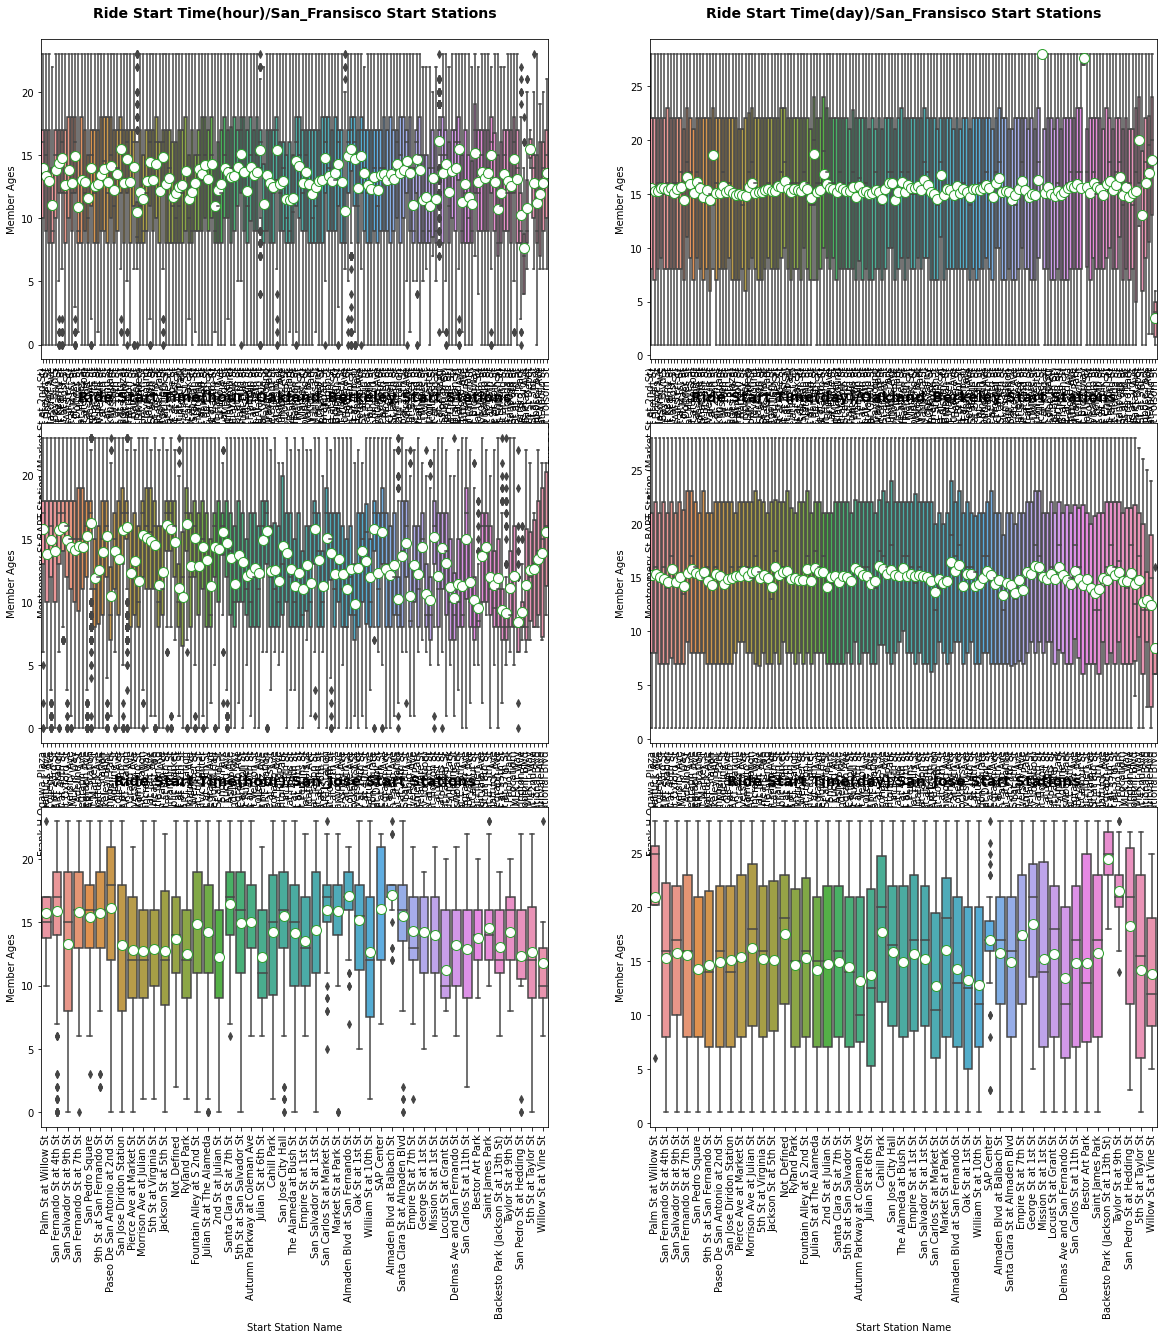

In [158]:
# plot box plot for  Ride stations vs. Ride Start Time Hour and Day 
# figure size
plt.figure(figsize =[20, 20])

# BOX PLOT ON LEFT, ROW 1:  San_Fransisco Ride Stations vs. Ride Start Time Hour
plt.subplot(3,2,1)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(hour)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  San_Fransisco Ride Stations vs. Ride Start Time day
plt.subplot(3,2,2)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(day)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON LEFT, ROW 2:  Oakland_Berkeley Ride Stations vs. Ride Start Time hour
plt.subplot(3,2,3)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(hour)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Oakland_Berkeley Ride Stations vs.Ride Start Time day
plt.subplot(3,2,4)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(day)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON LEFT, ROW 3:  San_Jose Ride Stations vs. Ride Start Time hour
plt.subplot(3,2,5)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(hour)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 3:  San_Jose Ride Stations vs. Ride Start Time day
plt.subplot(3,2,6)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Ride Start Time(day)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');


In [159]:
# Check summary statistics for Ride Stations vs. Duration in Seconds, Minutes, and Hours
print("Average start time(hour) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['start_time_hour'].mean().mean()))
print("Average  start time(day) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['start_time_day'].mean().mean()))
print("Average start time(hour) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['start_time_hour'].mean().mean()))
print("Average  start time(day) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['start_time_day'].mean().mean()))
print("Average start time(hour) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['start_time_hour'].mean().mean()))
print("Average start time(day) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['start_time_day'].mean().mean()))

Average start time(hour) for San Fransisco 's Sations: 13.093916467528285
Average  start time(day) for San Fransisco 's Sations: 15.55885356565615
Average start time(hour) for Oakland_Berkeley 's Sations: 13.049649423067937
Average  start time(day) for Oakland_Berkeley 's Sations: 14.932767174032692
Average start time(hour) for San Jose's Sations: 14.216047341995823
Average start time(day) for San Jose's Sations: 15.65265453308485


### Insights:
> - Average start time(hour) for San Fransisco 's sations is 1.1 PM, for Oakland_Berkeley 's stations is 1.05 PM, and for San Jose's sations is 2.2 PM.
> - Average start time(day) for San Fransisco 's sations is 16, for Oakland_Berkeley 's stations is 15, and for San Jose's sations is 16.
> In general, Oakland_Berkeley 's stations have earlier start time hour and day than San Fransisco 's sations or San Jose 's sations.

### 3.16 Ride stations vs. Bike Id and Ride Distance (6 Plots)

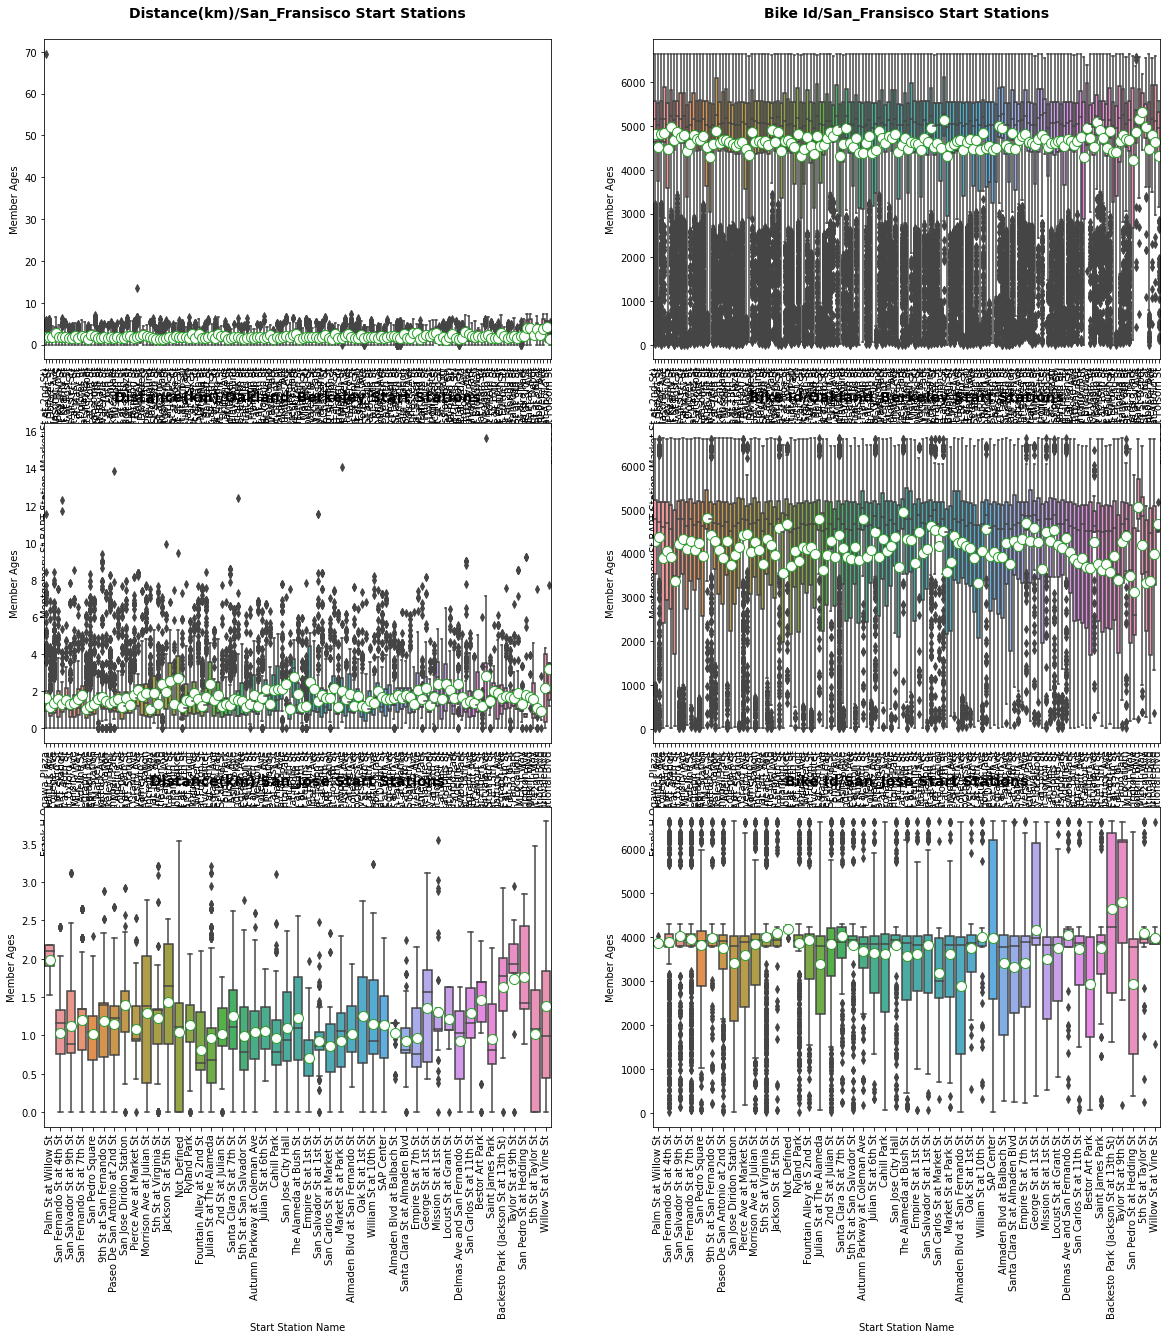

In [160]:
# plot box plot for Ride stations vs. Bike Id and Ride Distance
# figure size
plt.figure(figsize =[20, 20])

# BOX PLOT ON LEFT, ROW 1:  San_Fransisco Ride Stations vs. Ride Distance
plt.subplot(3,2,1)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='distance_km', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Distance(km)/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  San_Fransisco Ride Stations vs. Bike Id
plt.subplot(3,2,2)
# plot box plot
sb.boxplot(data=San_Fransisco, x='start_station_name', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Bike Id/San_Fransisco Start Stations", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON LEFT, ROW 2:  Oakland_Berkeley Ride Stations vs. Ride Distance
plt.subplot(3,2,3)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='distance_km', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Distance(km)/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Oakland_Berkeley Ride Stations vs. Bike Id
plt.subplot(3,2,4)
# plot box plot
sb.boxplot(data=Oakland_Berkeley, x='start_station_name', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Bike Id/Oakland_Berkeley Start Stations", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON LEFT, ROW 3:  San_Jose Ride Stations vs. Ride Distance
plt.subplot(3,2,5)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='distance_km', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Distance(km)/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 3:  San_Jose Ride Stations vs. Bike Id
plt.subplot(3,2,6)
# plot box plot
sb.boxplot(data=San_Jose, x='start_station_name', y='bike_id', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Station Name')
plt.ylabel('Member Ages')
plt.xticks(rotation=90)
plt.title("Bike Id/San_Jose Start Stations", y=1.05, fontsize=14, fontweight='bold');

In [161]:
# Check summary statistics for Ride stations vs. Bike Id and Ride Distance
print("Average distance(km) for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['distance_km'].mean().mean()))
print("Average  bike id used for San Fransisco 's Sations: {}".format(San_Fransisco.groupby('start_station_name')
                                                                          ['bike_id'].mean().mean()))
print("Average distance(km) for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['distance_km'].mean().mean()))
print("Average  bike id used for Oakland_Berkeley 's Sations: {}".format(Oakland_Berkeley.groupby('start_station_name')
                                                                             ['bike_id'].mean().mean()))
print("Average distance(km) for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['distance_km'].mean().mean()))
print("Average bike id used for San Jose's Sations: {}".format(San_Jose.groupby('start_station_name')
                                                                    ['bike_id'].mean().mean()))

Average distance(km) for San Fransisco 's Sations: 1.9088890663755218
Average  bike id used for San Fransisco 's Sations: 4650.979050043828
Average distance(km) for Oakland_Berkeley 's Sations: 1.664937677411198
Average  bike id used for Oakland_Berkeley 's Sations: 4104.266749973715
Average distance(km) for San Jose's Sations: 1.1625837724897017
Average bike id used for San Jose's Sations: 3763.5519534538594


### Insights:
> - Average distance(km) for San Fransisco 's sations is 1.9km, for Oakland_Berkeley 's stations is 1.7km, and for San Jose's sations is 1.7km.
> - Average bike id used for San Fransisco 's sations is 4651, for Oakland_Berkeley 's stations is 4104, and for San Jose's sations is 3764.
> -In general, San Fransisco 's stations have higher distances than Oakland_Berkeley 's sations or San Jose 's sations.

### 3.17 Weekday vs. Member Age (4 Plots)

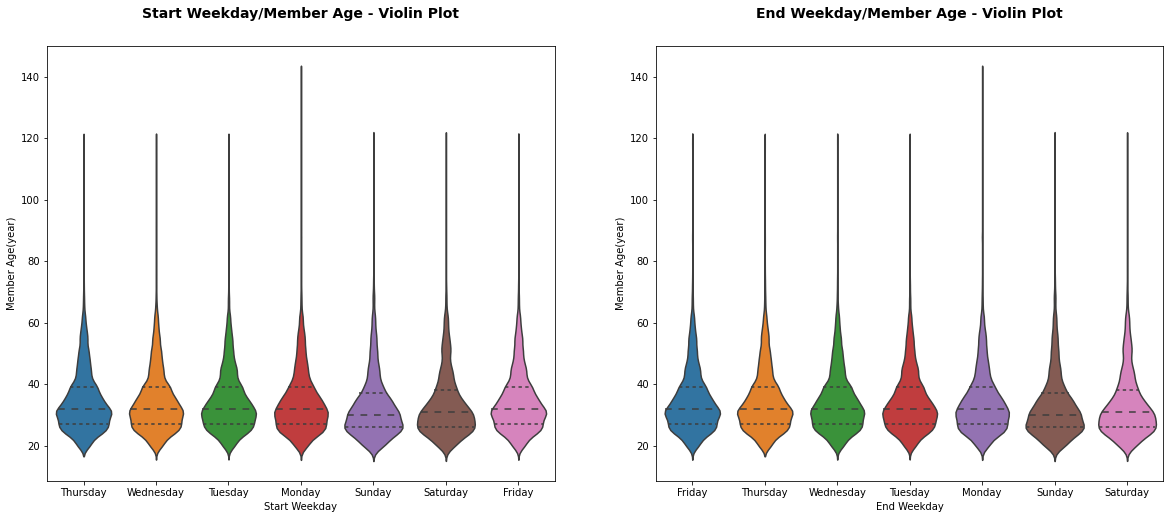

In [162]:
# plot box plot for Weekday vs. Member Age

""" 
Note: I have used ages_minus_0 subset to plot ages, excluding 0 ages
      to better visualize data distribution
"""
# figure size
plt.figure(figsize =[20, 8]) 

# VIOLIN PLOT ON LEFT, ROW 1:  Start Weekday vs. Member Age 
plt.subplot(1, 2, 1)
sb.violinplot(data=ages_minus_0, x='start_time_weekday', y='member_age', inner='quartile')
plt.xticks(rotation=15)
plt.xlabel('Start Weekday')
plt.ylabel('Member Age(year)')
plt.xticks(rotation=0)
plt.title("Start Weekday/Member Age - Violin Plot", y=1.05, fontsize=14, fontweight='bold');


# VIOLIN PLOT ON RIGHT, ROW 1:  End Weekday vs. Member Age
plt.subplot(1, 2, 2)
sb.violinplot(data=ages_minus_0, x='end_time_weekday', y='member_age', inner='quartile')
plt.xticks(rotation=0)
plt.xlabel('End Weekday')
plt.ylabel('Member Age(year)')
plt.title("End Weekday/Member Age - Violin Plot", y=1.05, fontsize=14, fontweight='bold');

In [163]:
# Check summary statistics for Weekday vs. Member Age
print("Average age per start weekday: {}".format(round(ages_minus_0.groupby('start_time_weekday')['member_age'].mean())))
print("Average age per end weekday: {}".format(round(ages_minus_0.groupby('end_time_weekday')['member_age'].mean())))

Average age per start weekday: start_time_weekday
Friday       34.0
Monday       34.0
Saturday     33.0
Sunday       33.0
Thursday     35.0
Tuesday      34.0
Wednesday    34.0
Name: member_age, dtype: float64
Average age per end weekday: end_time_weekday
Friday       34.0
Monday       34.0
Saturday     33.0
Sunday       33.0
Thursday     35.0
Tuesday      34.0
Wednesday    34.0
Name: member_age, dtype: float64


### Insights:
> - Average age per both start and end time weekday is 34 years old, except for Saturday and Sunday is 33 years old, and for Thursday is 35 years old.        

### 3.18 Weekday vs. Duration in Seconds, Minutes, and Hours (3 Plots)

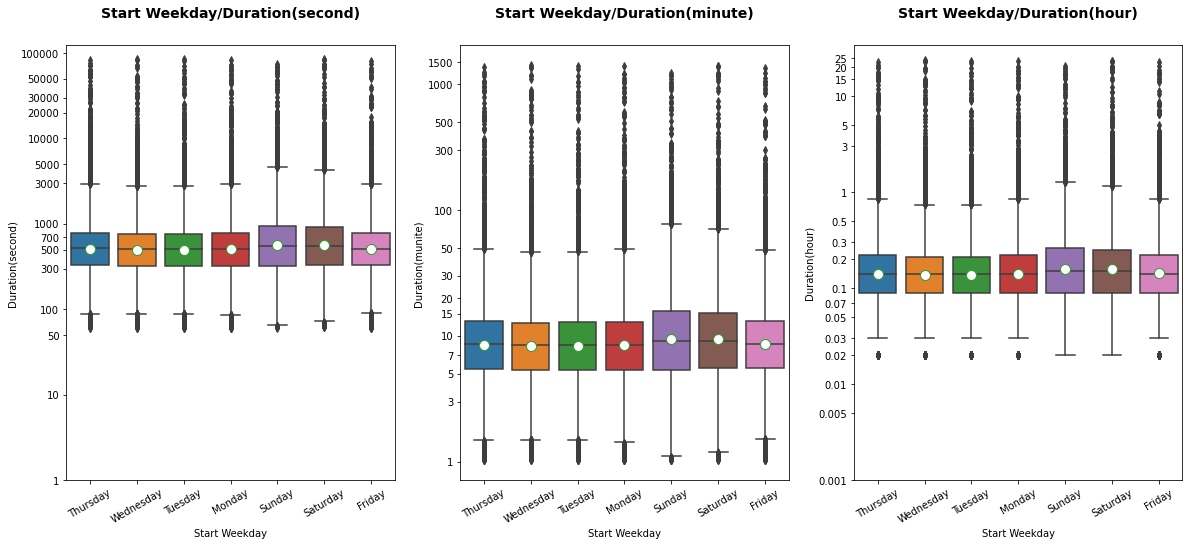

In [164]:
# plot viollin plot Weekday vs. Duration in Seconds, Minutes, and Hours

# figure size
plt.figure(figsize =[20, 8])

def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)


# BOX PLOT ON LEFT, ROW 1: Start Weekday vs. Duration in Seconds
plt.subplot(1,3,1)
sb.boxplot(data=df, x='start_time_weekday', y=df['duration_sec'].apply(log_trans), showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
# y-axis tik scales
tick_locs = [1,10, 50, 100, 300, 500, 700, 1000, 3000, 5000, 10000, 20000, 30000, 50000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Start Weekday')
plt.ylabel('Duration(second)')
plt.xticks(rotation=30)
plt.title("Start Weekday/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 1: Start Weekday vs. Duration in Minutes 
plt.subplot(1,3,2)
sb.boxplot(data=df, x='start_time_weekday', y=df['duration_minute'].apply(log_trans), showmeans=True,  
           meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"}) 
# y-axis tik scales
tick_locs = [1, 3, 5, 7, 10, 15, 20, 30, 50, 100, 300, 500, 1000, 1500]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=30)
plt.xlabel('Start Weekday')
plt.ylabel('Duration(munite)')
plt.title("Start Weekday/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON RIGHT, ROW 1: Start Weekday vs. Duration in Hours
plt.subplot(1,3,3)
sb.boxplot(data=df, x='start_time_weekday', y=df['duration_hour'].apply(log_trans), showmeans=True,  
           meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
# y-axis tik scales
tick_locs = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10, 15, 20, 25]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=30)
plt.xlabel('Start Weekday')
plt.ylabel('Duration(hour)')
plt.title("Start Weekday/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');
 

In [165]:
# Check summary statistics for  Weekday vs. Duration in Seconds, Minutes, and Hours
df.groupby('start_time_weekday')[['duration_sec', 'duration_minute', 'duration_hour']].mean()

duration_sec  duration_minute  duration_hour
start_time_weekday                                              
Friday                695.795073        11.596545       0.193272
Monday                713.159616        11.886002       0.198095
Saturday              902.661993        15.044383       0.250749
Sunday                919.746054        15.329088       0.255455
Thursday              699.040998        11.650676       0.194160
Tuesday               663.305567        11.055108       0.184277
Wednesday             673.671165        11.227834       0.187119

### Insights:
> - Average durations for week days (Saturday and Sunday) are higher than working days.
> - Average duration(second) for working days(Monday-Friday) ranges from 663 to 713 seconds while weekend days has an average which between 903 and 920 seconds.
> - Average duration(minute) for working days(Monday-Friday) ranges from 11.1 to 11.9 minuts while weekend days has an average which between 15 and 15.3 minuts.
> - Average duration(hour) for working days(Monday-Friday) ranges from 0.18 to 0.2 hour while weekend days has an average which between 0.25 and 0.26 hour.

### 3.19 Weekday vs. Ride start and End Time Hour and Day (4 Plots)

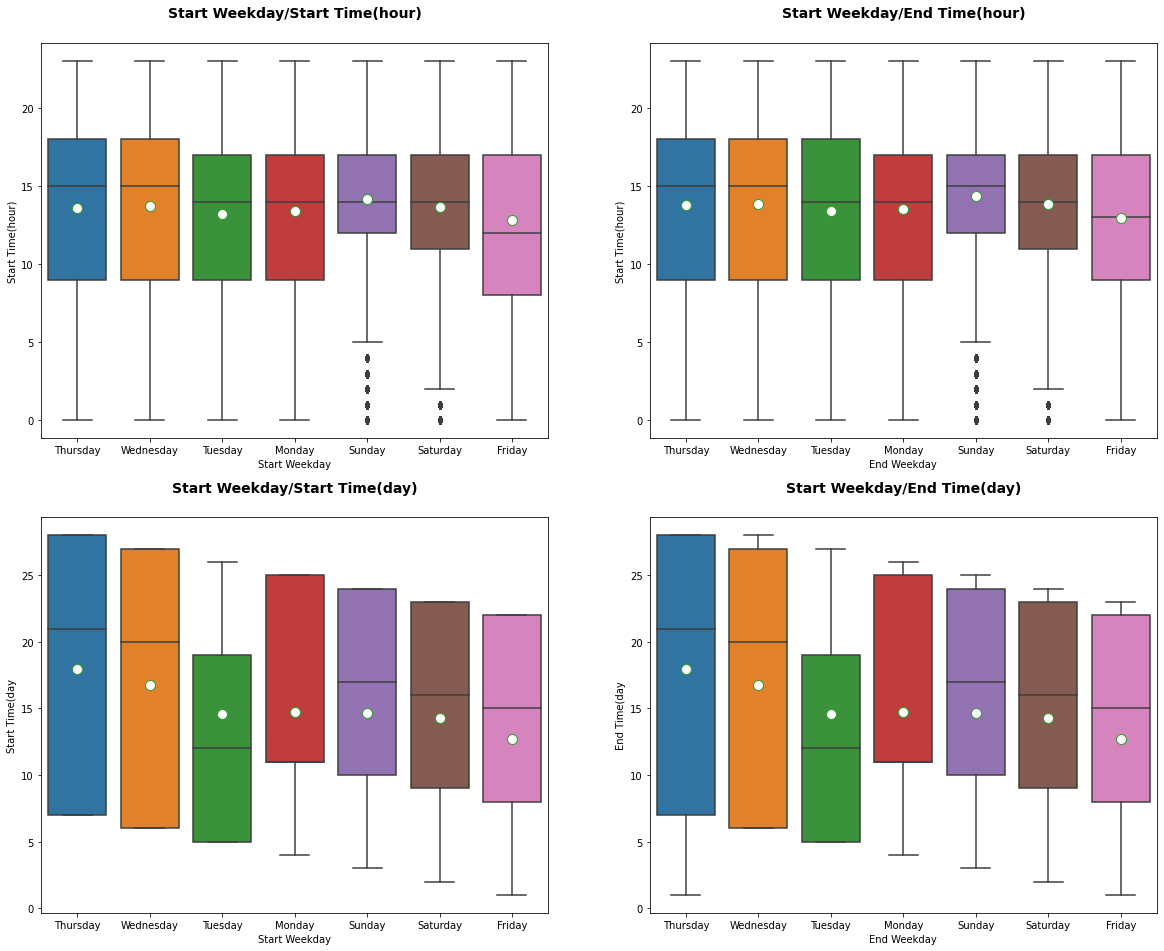

In [166]:
# plot box plot for Weekday vs. Ride start and End Time Hour

# figure size
plt.figure(figsize =[20, 16])

# BOX PLOT ON LEFT, ROW 1: Start Weekday vs. Start time Hour
plt.subplot(2,2,1)
sb.boxplot(data=df, x='start_time_weekday', y=df['start_time_hour'], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
plt.xlabel('Start Weekday')
plt.ylabel('Start Time(hour)')
plt.xticks(rotation=0)
plt.title("Start Weekday/Start Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1: Start Weekday vs. end time hour
plt.subplot(2,2,2)
sb.boxplot(data=df, x='start_time_weekday', y=df['end_time_hour'], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
plt.xlabel('End Weekday')
plt.ylabel('Start Time(hour)')
plt.xticks(rotation=0)
plt.title("Start Weekday/End Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2: End Weekday vs. start time day
plt.subplot(2,2,3)
sb.boxplot(data=df, x='start_time_weekday', y=df['start_time_day'], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
plt.xticks(rotation=15)
plt.xlabel('Start Weekday')
plt.ylabel('Start Time(day')
plt.xticks(rotation=0)
plt.title("Start Weekday/Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2: End Weekday vs. End time day
plt.subplot(2,2,4)
sb.boxplot(data=df, x='start_time_weekday', y=df['end_time_day'], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
plt.xticks(rotation=30)
plt.xlabel('End Weekday')
plt.ylabel('End Time(day')
plt.xticks(rotation=0)
plt.title("Start Weekday/End Time(day)", y=1.05, fontsize=14, fontweight='bold');


In [167]:
# Check summary statistics for  Weekday vs. Ride start and End Time Hour and Day
df.groupby('start_time_weekday')[['start_time_hour', 'end_time_hour', 'start_time_day','end_time_day']].mean()

start_time_hour  end_time_hour  start_time_day  \
start_time_weekday                                                   
Friday                    12.823022      12.971671       12.725199   
Monday                    13.395241      13.552585       14.707508   
Saturday                  13.652126      13.826550       14.300097   
Sunday                    14.178058      14.360562       14.679894   
Thursday                  13.620706      13.773731       17.969657   
Tuesday                   13.229717      13.383711       14.586521   
Wednesday                 13.712122      13.858473       16.787996   

                    end_time_day  
start_time_weekday                
Friday                 12.727097  
Monday                 14.708997  
Saturday               14.303148  
Sunday                 14.682922  
Thursday               17.958491  
Tuesday                14.587559  
Wednesday              16.789447

### Insights:
> - Average start time (hour) for working days(Monday-Friday) ranges from 12.8 PM to 1.7 PM while weekend days has an average which between 1.7 to 2.2 PM.
> - Average end time (hour) for working days(Monday-Friday) ranges from 1 PM to 1.9 PM while weekend days has an average which between 1.8 PM to 2.4 PM.
> - Average start and end time (day)for working days(Monday-Friday) ranges from 13-17 while weekend days has an average which between 14-15
> - In general, working days start and end time hours and days are earlier than those of weekend days.

### 3.20 Weekday vs. Bike Id and Ride Distance (2 Plot)

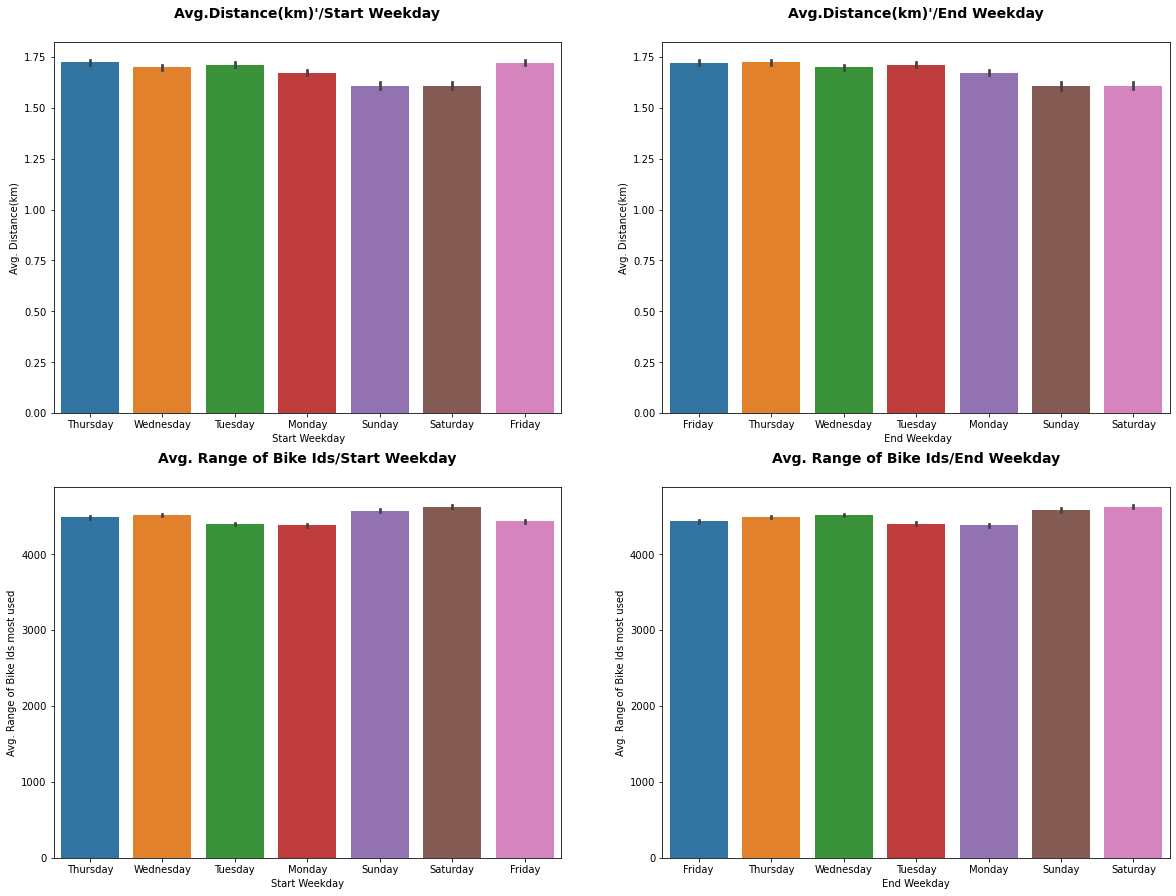

In [168]:
# plot bar plot and box plot for Start Weekday vs. Bike Id and Ride Distance
# figure size
plt.figure(figsize =[20, 15])

# Bar PLOT ON LEFT, ROW 1:  Start Weekday vs. Ride Distance
plt.subplot(2,2,1)
sb.barplot(data=df, x='start_time_weekday', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel(' Start Weekday')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/Start Weekday", y=1.05, fontsize=14, fontweight='bold');

# Bar PLOT ON LEFT, ROW 1:  End Weekday vs. Ride Distance
plt.subplot(2,2,2)
sb.barplot(data=df, x='end_time_weekday', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel(' End Weekday')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/End Weekday", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT, ROW 1:  Start Weekday vs. Bike Id 
plt.subplot(2, 2, 3)
sb.barplot(data=df, x='start_time_weekday', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('Start Weekday')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/Start Weekday", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT, ROW 1:  End Weekday vs. Bike Id 
plt.subplot(2, 2, 4)
sb.barplot(data=df, x='end_time_weekday', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('End Weekday')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/End Weekday", y=1.05, fontsize=14, fontweight='bold');



In [169]:
# Check summary statistics for  Weekday vs. Ride start and End Time Hour and Day
(df.groupby('start_time_weekday')[['distance_km', 'bike_id']].mean(), 
df.groupby('end_time_weekday')[['distance_km', 'bike_id']].mean())

(                    distance_km      bike_id
 start_time_weekday                          
 Friday                 1.721757  4433.640696
 Monday                 1.673051  4380.645650
 Saturday               1.608491  4628.002207
 Sunday                 1.608656  4575.100496
 Thursday               1.724219  4490.056681
 Tuesday                1.712082  4400.652249
 Wednesday              1.699010  4517.935697,
                   distance_km      bike_id
 end_time_weekday                          
 Friday               1.722522  4434.009420
 Monday               1.672490  4380.701255
 Saturday             1.609141  4627.180432
 Sunday               1.608401  4576.550860
 Thursday             1.723960  4490.638170
 Tuesday              1.712113  4399.857480
 Wednesday            1.698878  4517.374439)

### Insights:
> - Average distance(km) for start and end time working days(Monday-Friday) ranges from 1.67km to 1.73km while weekend days has an average of 1.6km.
 > -Average bike id most used for start and end time working days(Monday-Friday) ranges from 4380 to 4518 while weekend days has an average between 4575 to 4628
> - In general, Average distance(km) for working days in start and end time working weekdays is higher than those of weekend days. And, the range of used bike ids in weekend days is higher than this of working days.

### 3.21 Age groups vs. Duration in Seconds, Minutes, and Hours (3 Plots)

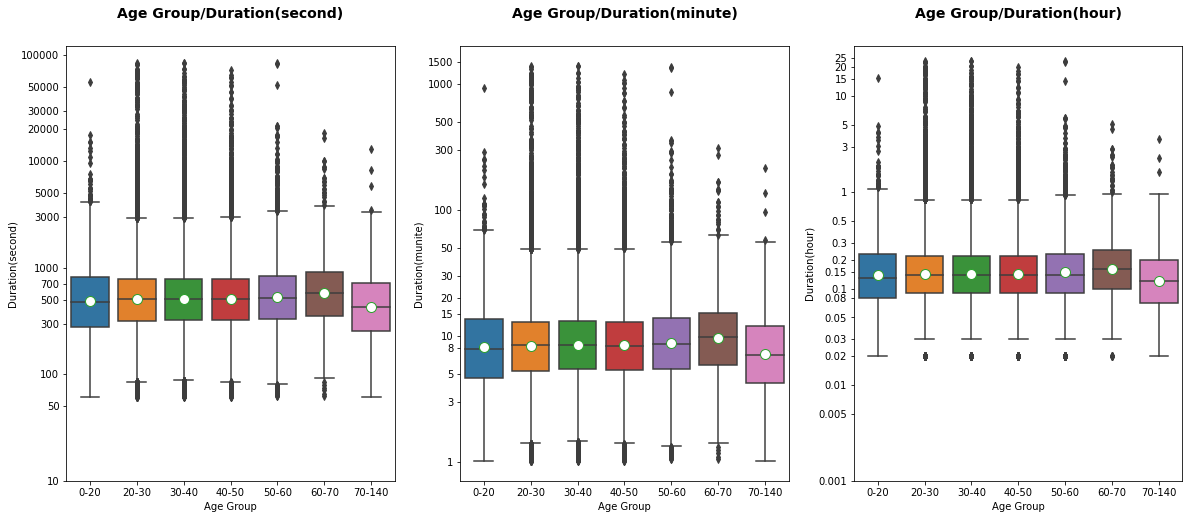

In [170]:
# plot box plot for Age groups vs. Duration in Seconds, Minutes, and Hours 

# figure size
plt.figure(figsize =[20, 8])

def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)


# BOX PLOT ON LEFT, ROW 1: Age groups vs. Duration in Seconds
plt.subplot(1,3,1)
sb.boxplot(data=df, x='net_age_groups', y=df['duration_sec'].apply(log_trans), showmeans=True,  
           meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"}) 
# y-axis tik scales
tick_locs = [10, 50, 100, 300, 500, 700, 1000, 3000, 5000, 10000, 20000, 30000, 50000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Age Group')
plt.ylabel('Duration(second)')
plt.xticks(rotation=0)
plt.title("Age Group/Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON MIDDLE, ROW 1: Age groups vs. Duration in Minutes 
plt.subplot(1,3,2)
sb.boxplot(data=df, x='net_age_groups', y=df['duration_minute'].apply(log_trans), showmeans=True,  
           meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"}) 
# y-axis tik scales
tick_locs = [1, 3, 5, 8, 10, 15, 20, 30, 50, 100, 300, 500, 1000, 1500]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Duration(munite)')
plt.title("Age Group/Duration(minute)", y=1.05, fontsize=14, fontweight='bold');


# BOX PLOT ON RIGHT, ROW 1: Age groups vs. Duration in Hours
plt.subplot(1,3,3)
sb.boxplot(data=df, x='net_age_groups', y=df['duration_hour'].apply(log_trans), showmeans=True,  
           meanprops={"marker":"o", "markerfacecolor":"white", "markersize":"10"})
# y-axis tik scales
tick_locs = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3, 0.5, 1, 3, 5, 10, 15, 20, 25]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Duration(hour)')
plt.title("Age Group/Duration(hour)", y=1.05, fontsize=14, fontweight='bold');
 

In [171]:
# Check summary statistics for  Age groups vs. Duration in Seconds, Minutes, and Hours 
df.groupby('net_age_groups')[['duration_sec', 'duration_minute', 'duration_hour']].mean()

duration_sec  duration_minute  duration_hour
net_age_groups                                              
0-20              724.248113        12.070729       0.201191
20-30             707.930257        11.798826       0.196635
30-40             687.884419        11.464745       0.191076
40-50             713.497823        11.891640       0.198202
50-60             736.022779        12.267001       0.204435
60-70             764.203723        12.736785       0.212274
70-140            626.126957        10.435287       0.174052

### Insights:
> - Average duration for age group 60-70 is the highest (0.21 hour), followed by group 50-60 (0.204 hour), followed by group 18-20 (0.201 hour), followed by groups 20-50 (0.191-0.198 hour), and the lowest average duration is for group 70-141 (0.174 hour).

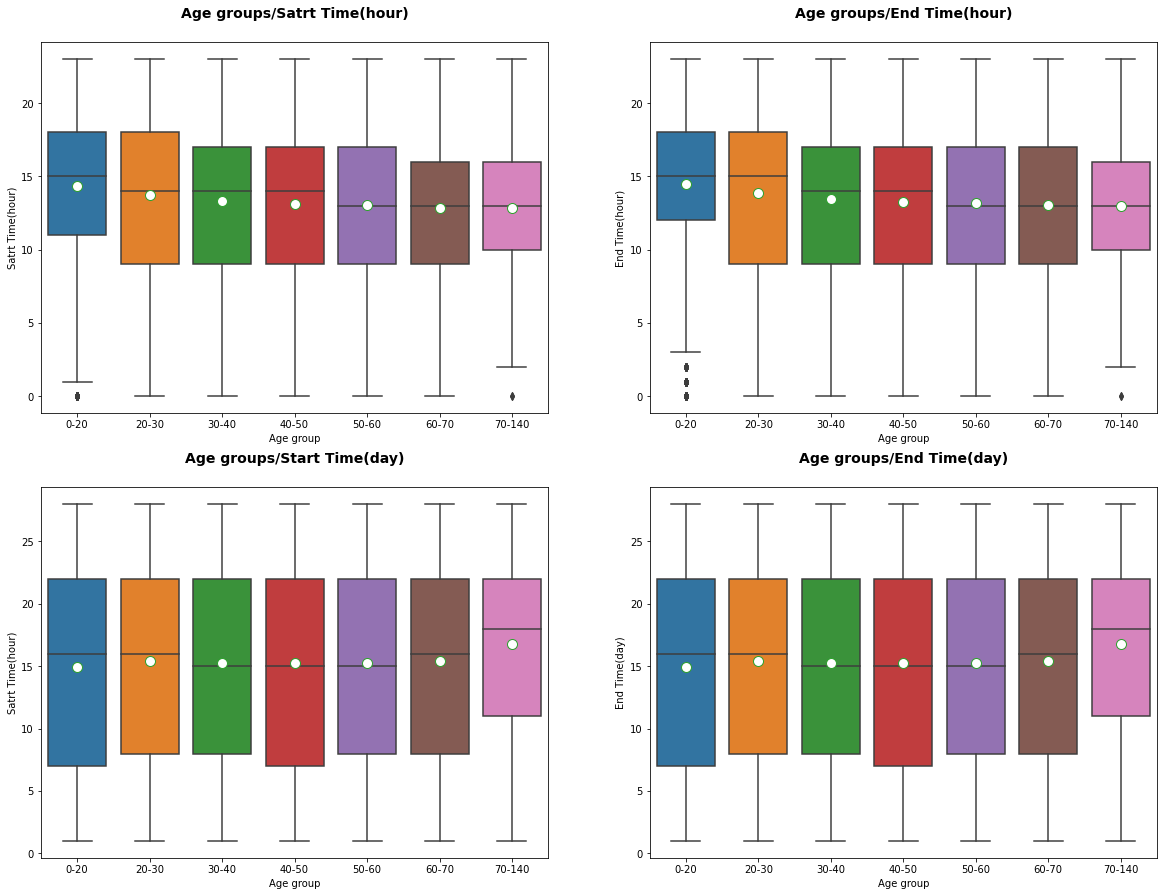

In [172]:
# plot box plot for Age groups vs. Ride start and End Time Hour and Day

# figure size
plt.figure(figsize =[20, 15])

# BOX PLOT ON LEFT, ROW 1:  Age groups vs. Ride Start Time Hour
plt.subplot(2,2,1)
sb.boxplot(data=df, x='net_age_groups', y='start_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Age group')
plt.ylabel('Satrt Time(hour)')
plt.xticks(rotation=0)
plt.title("Age groups/Satrt Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 1:  Age groups vs. Ride End Time Hour 
plt.subplot(2,2,2)
sb.boxplot(data=df, x='net_age_groups', y='end_time_hour', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Age group')
plt.ylabel('End Time(hour)')
plt.xticks(rotation=0)
plt.title("Age groups/End Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON LEFT, ROW 2:  Age groups vs. Ride Start Time Day
plt.subplot(2,2,3)
sb.boxplot(data=df, x='net_age_groups', y='start_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Age group')
plt.ylabel('Satrt Time(hour)')
plt.xticks(rotation=0)
plt.title("Age groups/Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# BOX PLOT ON RIGHT, ROW 2:  Age groups vs. Ride End Time Day
plt.subplot(2,2,4)
sb.boxplot(data=df, x='net_age_groups', y='end_time_day', showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                      "markersize":"10"})
plt.xlabel('Age group')
plt.ylabel('End Time(day)')
plt.xticks(rotation=0)
plt.title("Age groups/End Time(day)", y=1.05, fontsize=14, fontweight='bold');

### 3.22 Age groups vs. Ride start and End Time Hour and Day (4 Plots)

In [173]:
# Check summary statistics for Age groups vs. Ride start and End Time Hour and Day
df.groupby('net_age_groups')[['start_time_hour', 'end_time_hour', 'start_time_day', 'end_time_day']].mean()

start_time_hour  end_time_hour  start_time_day  end_time_day
net_age_groups                                                              
0-20                  14.376415      14.508962       14.945519     14.948349
20-30                 13.745989      13.894302       15.409927     15.409057
30-40                 13.309411      13.462214       15.259697     15.259290
40-50                 13.104036      13.266984       15.224127     15.222993
50-60                 13.016952      13.185326       15.258167     15.257108
60-70                 12.874112      13.059222       15.392893     15.393909
70-140                12.820870      13.003478       16.744348     16.744348

### Insights:
> - Average start time(hour) for age groups 60-70 & 70-141 is the earliest (12.82 PM-12.87 PM), followed by group 20-30 to 50-60 (1 PM - 1.7 PM), and the most late average  start time(hour) is for group 0-20 (2.4 PM).
> - Average end time(hour) for age groups 60-70 & 70-141 is the earliest (1 PM- 1.06 PM), followed by group 20-30 to 50-60 (1.2 PM - 1.9 PM), and the most late average end time(hour) is for group 0-20 (2.5 PM).
> - Average start and end time(day) for age group 0-20 is the earliest (day 14), followed by group 20-30 to 60-70 (day 15), and the most late average start and end time(day) is for group 70-141 (day 16).


### 3.23 Age groups vs. Bike Id and Ride Distance (2 Plot)

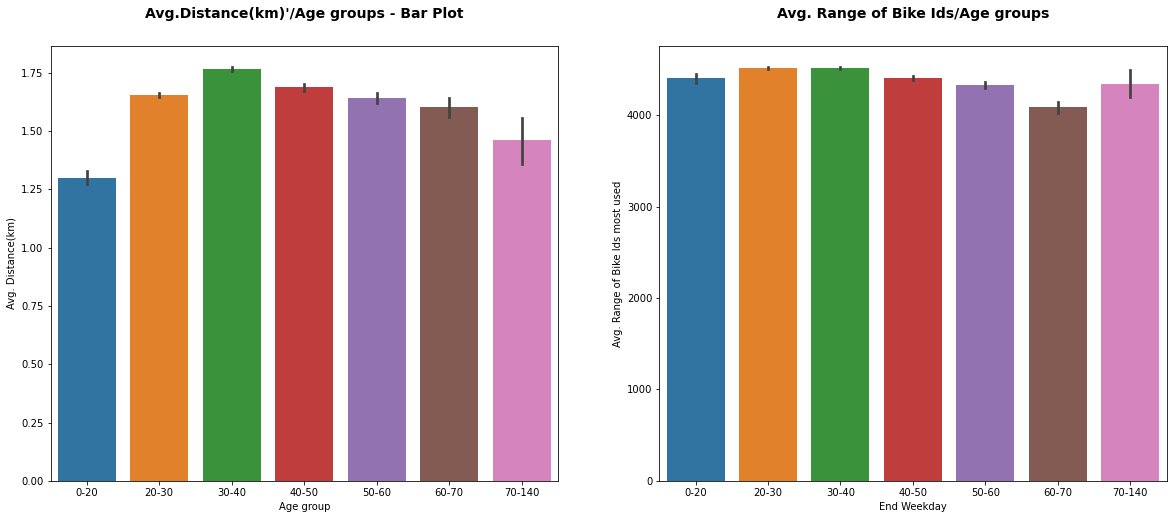

In [174]:
# plot bar plot for Age groups vs. Bike Id and Ride Distance

# figure size
plt.figure(figsize =[20, 8])

# Bar PLOT ON LEFT, ROW 1:  Age groups vs. Ride Distance
plt.subplot(1,2,1)
sb.barplot(data=df, x='net_age_groups', y='distance_km')
plt.xticks(rotation=0)
plt.xlabel('Age group')
plt.ylabel('Avg. Distance(km)')
plt.title("Avg.Distance(km)'/Age groups - Bar Plot", y=1.05, fontsize=14, fontweight='bold');


# Bar PLOT ON RIGHT, ROW 2:  Age groups vs. Bike Id 
plt.subplot(1, 2, 2)
sb.barplot(data=df, x='net_age_groups', y='bike_id')
plt.xticks(rotation=0)
plt.xlabel('End Weekday')
plt.ylabel('Avg. Range of Bike Ids most used')
plt.title("Avg. Range of Bike Ids/Age groups", y=1.05, fontsize=14, fontweight='bold');


In [175]:
# Check summary statistics for Age groups vs. Bike Id and Ride Distance
df.groupby('net_age_groups')[['distance_km', 'bike_id']].mean()

distance_km      bike_id
net_age_groups                          
0-20               1.299768  4403.791509
20-30              1.654897  4517.431520
30-40              1.767911  4520.030210
40-50              1.687907  4409.832245
50-60              1.642379  4331.067544
60-70              1.601229  4090.001015
70-140             1.461706  4344.766957

### Insights:
> - Average distance(km) for age group 30-40 is the highest(1.8km), followed by age groups 20-30 and 40-70 (1.6km-1.7km), and the lowest average distance(km) is for  age groups 0-20 & 70-141(1.3km-1.5km).
> - The higher average bike id most used is for age groups 20-40 (4517-4520), followed by age groups 0-20, 40-50, 50-60 & 70-141 (4331-4409), and the lowest average goes for the age group 60-70(4090). 

## Question 1:Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Main features of interest include ride durations, ride times, ride weekdays, ride distance(km), ride stations/city, user types, member genders, member age, and age groups. I will investigate the relationships among these variables as follows:

## 1. Categorical Variable vs. Categorical Variable
### User Type vs. Member Gender:
> - Most subscribers are males and represents 73% of total subscribers, followed by females with 22%.
> - Most customers are males and represents 58% of total customers, followed by females with 23%.
### User Type vs. Age Groups:
> - For subscribers, age group 20-30 is the highest (39.7%), followed by age group 30-40 (39.4%) and the lowest age group is 70-141(0.001%). 
> For customers, age group 20-30 is the highest (40%), followed by age group 30-40 (36.3%) and the lowest age group is 70-141(0.004%).
### User Type vs. Start and End Stations:
> - Subscribers are using both start and end stations more than customers.
### Member Gender vs. Age Groups: 
> - For males and female genders, age group 20-30 is the highest (39%), followed by age group 30-40 (36.3%) and the lowest age group is 70-141 (0.004%).
> - For females and female genders, age group 20-30 is the highest (44%), followed by age group 30-40 (36%) and the lowest age group is 70-141 (0.002%).
> - For other other gender, age group 30-40 (43.3%) is the highest, followed by age group 20-30 (33%) and the lowest age group is 70-141 (0.0025%).
### Member Gender vs. Ride Stations:
> - Males are using both start and end stations more than other genders.

## 2. Numeric Variable vs. Numeric Variable:
### Member Age vs. Ride Duration in Seconds, Minutes, Hours:
> - There is a negative coorelation between member age and ride durations: Duration decreases when age increases.
> - Ages 23-40 have the higher ride durations compared to other ages.
### Member Age vs. Ride Start Time Hour and End Time Hour:
> - There is a negative coorelation between member age and start and end time hour: start and end time hours decrease as ages increase:
> - Most start and end time hours are 7-9 AM and 4-6 PM.
> - Ages 18-40 have the higher number of rides that start and end mostly at 7-9 AM and 4-6 PM.
### Member Age vs. Ride Start Time Day and End Time Day: 
> - There is a negative coorelation between member age and start and end time day: as age increases, start and end time hour and day decrease.
> - Although the number of rides decreases as age increases, all ages start and end mostly at 4-9, 12-17 and 19-28.
> - Ages 18-40 have the higher number of rides that start and end mostly at most start and end time days.
### Member Age vs. Ride Distance: 
> - 99.9% of distance(km) is below 8km and distance(km) ranges from 0.17km-8km.
> - In general, there is a very weak positive coorelation between distance(km) and member age.
### Ride Start and End Time Hour vs. Ride Duration in Seconds, Minutes, and Hours:
> - There is a very weak positive coorelation between start time and end hour and durations: as start time and end hours increase, durations increases.
### Ride Start and End Time Day vs. Ride Duration in Seconds, Minutes, and Hours:
> - There is a very weak positive coorelation between start time and end day and durations: as start time and end day increase, durations increases.
### Ride Start and End Time Hour vs. Ride distance:
> - There is a very weak negative coorelation between start and end time hour and distance(km): as start and end time hour increases, slightly the distance(km) decreases.
### Ride Start and End Time Day vs. Ride distance: 
> - There is a a very weak positive coorelation between start and end time day and distance(km): as start and end time day increases, slightly the distance(km) increases.
### Ride Duration in Seconds, Minutes, and Hours vs. Ride Distance:
> - There is a negative coorelation between duration in seconds, minutes, and hours and distance(km): as duration in seconds, minutes, and hours increase, distance(km) decreases.
> - Most distances are traveled in a duration below 20k seconds, most distances are traveled in a duration below 200 minutes, and most distances are traveled in a duration below 5 hours.

## 3. Categorical Variable vs. Numeric Variable : 
### User Type vs. Member Age:
> - Average age for both customer and subscriber is 34 years old.
> - 25% of ages for both customer and subscriber are below 27 years old.
> - Median age for both customer and subscriber is 32 years old.
> - 75% of ages/customer are below 38 years old and for subscriber are below 39 years old.
> - Max age/customer is 141 years old and for subscriber is 119 years old.
### User Type vs. Duration in Seconds, Minutes, and Hours:
> - Average duration(second) for customer is 1,432 seconds and for subscriber is 640 seconds.
> - Average duration(minute) for customer is 24 minutes and for subscriber is 11 minutes.
> - Average duration(hour) for customer is 0.4 hour and for subscriber is 0.18 hour.
> - In general, average durations/customers are higher than those of subscribers.
### User Type vs. Ride start and End Time Hour and Day: 
> - Average start time (hour) for customer is 1.6 PM and for subscriber is 1.3 PM.
> - Average end time (hour) for customer is 1.9 PM and for subscriber is 1.6 PM.
> - Average start and end time(day) for customer is 16 and for subscriber is 15.
> - Start and end time hour for customers is 10 AM and for subscribers is 9 AM. 
> - Start and end time hour for customers is 9 AM and for subscribers is 8 AM. 
> - In general, start and end time hour and day for subscribers are earlier than thos of customers. 
### User Type vs. Bike Id and Ride Distance: 
> - Average start distance(km) for customer is 1.9km and for subscriber is 1.7km.
> - Average most used bike id for customer is 4,226 and for subscriber is 4503.
> - In general, average distance(km) traveled by and bike id used by customers are higher than those of subscribers. 
### Member Gender vs. Member Age:
> - Average age of female members is 33 years old.
> - Average age of male members is 34 years old.
> - Average age of other members is 36 years old.
> - In general, average age of other members is higher than those of subscribers and male age is higher than female age.
### Member Gender vs. Duration in Seconds, Minutes, and Hours:
> - Average duration (second) for female is 779 seconds, for male is 673 seconds, for not-defined is 1,189 seconds, and for other is 997 seconds.
> - Average duration (minutes) for female is 13 minutes, for male is 11 minutes, for not-defined is 20 minutes, and for other is 17 minutes.
> - Average duration (hour) for female is 0.22 hour, for male is 0.19 hour, for not-defined is 0.33 hours, and for other is 0.028 hours.
> - In general, average durations spent by not-defined and other genders are higher than those of male and female genders, but females spent more duration than males.
### Member Gender vs. Ride Start and End Time Hour and Day:
> - Average start time(hour) for female is 1.2 PM, for male is 1.5 PM, for not-defined is 1.5 PM, and for other is 1.7 PM.
> - Average end time(hour) for female is 1.4 PM, for male is 1.7 PM, for not-defined is 1.7 PM, and for other is 1.8 PM.
> - Average start and end time(day) for female is 15, for male is 15, for not-defined is 15, and for other is 15.
> - In general, average start and end day per all genders is the same but average start and end time hour per female is earlier than males and all other genders.
> - 25% of all genders' start time hour is below 9 AM and 75% start time hour is below 5 PM. 25% all genders' end time hour is below 9 AM, except for other gender (10 AM), and 75% end time hour is below 5 PM, except for male gender (6 PM). 
> - 25% of all genders' start and end time day is below day 8 of the month and 75% start time day is below day 22 of the month.
### Member Gender vs. Ride Distance:
> - Average distance(km) for female 1.8km, for male is 1.7km, for not-defined is 1.7km, and for other is 1.8km.
> - In general, average distance(km) traveled by females and others are higher than those of male and not-defined genders. 
###  Ride Stations vs. Member Age:
> - Average member age for San Fransisco 's Sations is 33 years old, for Oakland_Berkeley 's Sations is 34 years old, for San Jose 's Sations is 31 years old.
### Ride Stations vs. Duration in Seconds, Minutes, and Hours:
> - Average duration (second) for San Fransisco 's sations is 812.6 seconds, for Oakland_Berkeley 's stations is 747.5 seconds, and for San Jose's sations is 752.6 seconds.
> - Average duration (minute) for San Fransisco 's sations is 13.5 minutes, for Oakland_Berkeley 's stations is 12.5 minutes, and for San Jose's sations is 12.5 minutes.
> - Average duration (hour) for San Fransisco 's sations is 0.23 hour, for Oakland_Berkeley 's stations is 0.21 hour, and for San Jose's sations is 0.21 hour.
> In general, San Fransisco 's sations have higher durations than both Oakland_Berkeley 's stations and San Jose's sations.
### Ride stations vs. Ride Start Time Hour and Day:
> - Average start time(hour) for San Fransisco 's sations is 1.1 PM, for Oakland_Berkeley 's stations is 1.05 PM, and for San Jose's sations is 2.2 PM.
> - Average start time(day) for San Fransisco 's sations is 16, for Oakland_Berkeley 's stations is 15, and for San Jose's sations is 16.
> In general, Oakland_Berkeley 's stations have earlier start time hour and day than San Fransisco 's sations or San Jose 's sations.
### Ride stations vs. Bike Id and Ride Distance:
> - Average distance(km) for San Fransisco 's sations is 1.9km, for Oakland_Berkeley 's stations is 1.7km, and for San Jose's sations is 1.7km.
> - Average bike id used for San Fransisco 's sations is 4651, for Oakland_Berkeley 's stations is 4104, and for San Jose's sations is 3764.
> -In general, San Fransisco 's stations have higher distances than Oakland_Berkeley 's sations or San Jose 's sations.
###  Weekday vs. Member Age:
> - Average age per both start and end time weekday is 34 years old, except for Saturday and Sunday is 33 years old, and for Thursday is 35 years old.
### Weekday vs. Duration in Seconds, Minutes, and Hours:
> - Average durations for week days (Saturday and Sunday) are higher than working days.
> - Average duration(second) for working days(Monday-Friday) ranges from 663 to 713 seconds while weekend days has an average which between 903 and 920 seconds.
> - Average duration(minute) for working days(Monday-Friday) ranges from 11.1 to 11.9 minuts while weekend days has an average which between 15 and 15.3 minuts.
> - Average duration(hour) for working days(Monday-Friday) ranges from 0.18 to 0.2 hour while weekend days has an average which between 0.25 and 0.26 hour.
### Weekday vs. Ride start and End Time Hour and Day:
> - Average durations for week days (Saturday and Sunday) are higher than other working days.
> - Average start time (hour) for working days(Monday-Friday) ranges from 12.8 PM to 1.7 PM while weekend days has an average which between 1.7 to 2.2 PM.
> - Average end time (hour) for working days(Monday-Friday) ranges from 1 PM to 1.9 PM while weekend days has an average which between 1.8 PM to 2.4 PM.
> - Average start and end time (day)for working days(Monday-Friday) ranges from 13-17 while weekend days has an average which between 14-15
> - In general, working days start and end time hours and days are earlier than those of weekend days.
### Weekday vs. Bike Id and Ride Distance :
> - Average distance(km) for start and end time working days(Monday-Friday) ranges from 1.67km to 1.73km while weekend days has an average of 1.6km.
> - In general, average distance(km) for working days in start and end time working weekdays is higher than those of weekend days.
### Age groups vs. Duration in Seconds, Minutes, and Hours:
> - Average duration for age group 60-70 is the highest (0.21 hour), followed by group 50-60 (0.204 hour), followed by group 18-20 (0.201 hour), followed by groups 20-50 (0.191-0.198 hour), and the lowest average duration is for group 70-141 (0.174 hour).
### Age groups vs. Ride start and End Time Hour and Day:
> - Average start time(hour) for age groups 60-70 & 70-141 is the earliest (12.82 PM-12.87 PM), followed by group 20-30 to 50-60 (1 PM - 1.7 PM), and the most late average  start time(hour) is for group 0-20 (2.4 PM).
> - Average end time(hour) for age groups 60-70 & 70-141 is the earliest (1 PM- 1.06 PM), followed by group 20-30 to 50-60 (1.2 PM - 1.9 PM), and the most late average end time(hour) is for group 0-20 (2.5 PM).
> - Average start and end time(day) for age group 0-20 is the earliest (day 14), followed by group 20-30 to 60-70 (day 15), and the most late average start and end time(day) is for group 70-141 (16).
### Age groups vs. Ride Distance :
> - Average distance(km) for age group 30-40 is the highest(1.8km), followed by age groups 20-30 and 40-70 (1.6km-1.7km), and the lowest average distance(km) is for  age groups 0-20 & 70-141(1.3km-1.5km).



## Question 2: Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Other additional features include ride bike share and bike id and how they are associated with main features. we can investigate them as follows:

## 1. Bike Share Status:
### User Type vs. bike share
> - 89.4% of subscribers don't share bikes during their rides and 10.6 % of subscribers share bikes during their rides, but customers don't share bikes during their rides.
### Member Gender vs. bike share
> - 90% of males don't share bikes during the ride and 10% share bikes.
> - 91% of females don't share bikes during the ride and 9% share bikes.
> - All not-defined users don't share bikes during the ride.
> - 82% of other users don't share bikes during the ride and 18% share bikes.
### Bike Share vs. Age Groups: 
> - For non-shared rides , age group 30-40 is the highest (39%), followed by age group 20-30 (38%) and the lowest age group is 70-141(0.0024%).
> - For shared rides, age group 20-30 is the highest (58%), followed by age group 30-40 (13%) and the lowest age group is 70-141(0.01%).
### Bike Share vs. Ride Stations
> - Non-shared bikes are more than shared bikes in both start and end stations.
### Bike Share Status vs. Member Age:
> - Average member age that share bikes during the ride is 34 years old.
> - Average member age that doesn't share bikes during the ride is 32 years old.
### Bike Share Status vs. Duration in Seconds, Minutes, and Hours:
> - Average duration(second) for non-shared bike rides is 730 seconds and for shared rides is 684 seconds.
> - Average duration(minute) for non-shared bike rides is 12 minutes and for shared rides is 11 minutes.
> - Average duration(hour) for non-shared bike rides is 0.2 hours and for shared rides is 0.19 hour.
> - In general, average durations for non-shared bike rides are higher than that of shared bike rides.
### Bike Share Status vs. Ride Start and End Time Hour and Day:
> - Average start time(hour) for non-shared bike rides is 1.4 PM and for shared rides is 2.1 PM.
> - Average end time (hour) for non-shared bike rides is 1.5 PM and for shared rides is 2.2 PM.
> - Average start and end time(day) for both non-shared or shared bike rides is 3.3 PM.
> - In general, start and end time(hour for non-shared bike rides is earlier than that of shared bike rides, while the average of start and end time(day) is same (3.3 PM).
### Bike Share Status vs. Bike Id and Ride Distance:
> - Average distance(km) for non-shared bike rides is 1.7km and for shared bike rides is 1.3km. Average distance shared is lower than that non-shared.
> - Average used bike id for shared bike rides is 4483 and for shared bike rides is 4379.


## 2. Bike Id:
### Member Age vs. Bike Id:
> - There is a negative coorelation between the member age and bike ids used: as age increases, the range of bike ids used decreases.
### Ride Start and End Time Hour vs. Bike Id:
> - There is a positive coorelation between start and end time hour and range of bike ids used: as start and end time hours increase, the range of bike ids used increases from 4k-above, with most used bikes ranges from 4.5k-5.3k.
### Ride Start and End Time Day vs. Bike Id:
> - There is a positive coorelation between start and end time day and range of bike ids used: as start and end time days increase, the range of bike ids used increases from 4k-above, with most used bikes ranges from 4.5k-5.3k.
### Ride Duration in Seconds, Minutes, and Hours vs. Bike Id:
> - There is a a weak negative coorelation between duration in seconds, minutes, and hours and bike ids used: as duration in seconds, minutes, and hours increase, the number of bike ids decreases.
> - Most bike ids are used in a duration below 10k seconds, in a duration below 200 minutes, and in a duration below 5 hours.
### Ride Distance vs. Bike Id:
> - There is a very week negative correlation between distance(km) and bike ids used: as distance increase, bike ides decreases.
> - Most ride ids are used in a distance between 0.2km-below 8km.
### Member Gender vs. Bike Id:
> - Average used bike id for female is 4,397, for male is 4,507, for not-defined is 4,275, and for other is 4543.
> - Average used ids ranges from 4,275 to 4543.
### Weekday vs. Bike Id:
> -Average bike id most used for start and end time working days(Monday-Friday) ranges from 4380 to 4518 while weekend days has an average between 4575 to 4628
> - The range of used bike ids in weekend days is higher than this of working days.
### Age groups vs. Bike Id:
> - The higher average bike id most used is for age groups 20-40 (4517-4520), followed by age groups 0-20, 40-50, 50-60 & 70-141 (4331-4409), and the lowest average goes for the age group 60-70(4090). 




<a id='multivariate'></a>
## Multivariate Exploration

> - In this section, I will investigate and plot multiple variables to explore the patterns, trends, models, and relationships among three or more features. The main thing I want to explore in this part of the analysis is how these variables of interest correlate and impact one anothor.

### We can summarize variables of interest in the following variable map:

### 1. Categorical Variables:
> 1. User characteristics: User Type, Member Gender, and Age Groups.
> 2. Ride Start and End Times: Start and End Weekdays.
> 3. Ride Stations: Start and End Stations
> 4. Bike Share: Bike Share Status
    
### 2. Numeric Variables
> 1. Member Age
> 2. Ride Durations: Durations in Seconds, Minutes, and Hours
> 3. Ride Start and End Times: Ride Start and End Times in Hour and Day
> 3. Ride Distance(km)
> 4. Bike Id

## 1. Plotting Correlation Matrix : Numeric Variables

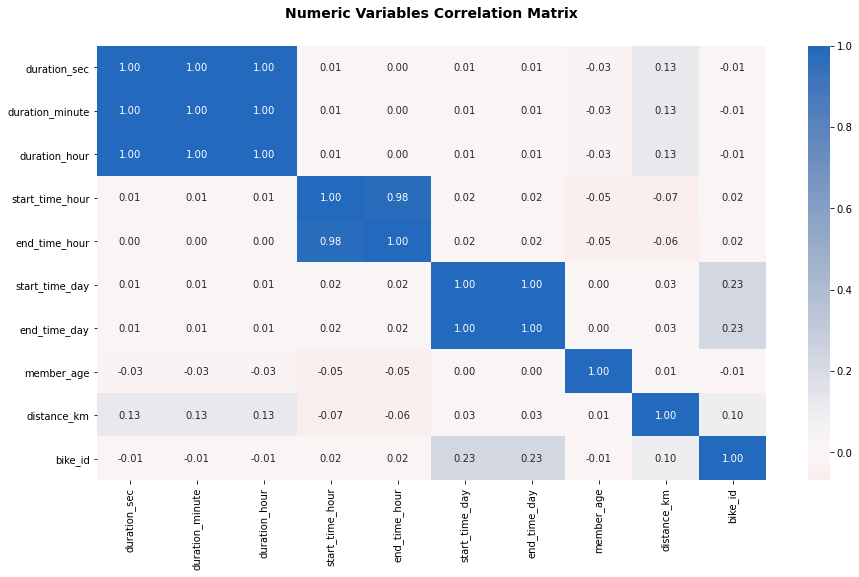

In [176]:
# Create a correlation matrix of numeric variables
# figure size
plt.figure(figsize =[15, 8])
# Create a dataframe of variables of interest by filtering the original df
corr_vars = df[['duration_sec','duration_minute', 'duration_hour','start_time_hour','end_time_hour','start_time_day',
                'end_time_day', 'member_age', 'distance_km', 'bike_id']]
# Create a heatmap with a diverging color map with annotation of correlation values
sb.heatmap(corr_vars.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("Numeric Variables Correlation Matrix", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> **1.Correlation of Durations Vs. Other Numeric Variables:**
> - Durations vs. Start Time(hour): Very weak positive Coorelation
> - Durations vs. End Time(hour): Neutral Coorelation
> - Durations vs. Start Time(day): Very weak positive Coorelation
> - Durations vs. End Time(day): Very weak positive Coorelation
> - Durations vs. Member Age: Very weak negative Coorelation
> - Durations vs. Distance(km): Very weak positive Coorelation
> - Durations vs. Bike Id: Very weak negative Coorelation

> **2.Correlation of Start & End Time(hour) vs.. Other Numeric Variables:**
> - Start & End Time(hour) vs. Durations: Very weak positive Coorelation
> - Start Time(hour) vs. End Time(hour): Strong positive Coorelation
> - Start & End Time(hour) vs. Start and End Time(day): Very weak positive Coorelation
> - Start & End Time(hour) vs. Member Age: Very weak negative Coorelation
> - Start & End Time(hour) vs. Distance(km): Very weak negative Coorelation
> - Start & End Time(hour) vs. Bike Id: Very weak positive Coorelation

> **3.Correlation of Start & End Time(day) vs. Other Numeric Variables:**
> - Start & End Time(day) vs. Durations: Very weak positive Coorelation
> - Start & End Time(day) vs. Start & End Time(hour): Very weak positive Coorelation
> - Start & End Time(day) vs. Member Age: Neutral Coorelation
> - Start & End Time(day) vs. Distance(km): Very weak positive Coorelation
> - Start & End Time(day) vs. Bike Id: Very weak positive Coorelation

> **4.Correlation of Member Age vs. Other Numeric Variables:**
> - Member Age vs. Durations: Very weak negative Coorelation
> - Member Age vs. Start & End Time(hour): Very weak negative Coorelation
> - Member Age vs. Start & End Time(day): Neutral Coorelation
> - Member Age vs. Distance(km): Very weak positive Coorelation
> - Member Age vs. Bike Id: Very weak negative Coorelation

> **5.Correlation of Distance(km) vs. Other Numeric Variables:**
> - Distance(km) vs. Durations: Very weak positive Coorelation
> - Distance(km) vs. Start & End Time(hour): Very weak negative Coorelation
> - Distance(km) vs. Start & End Time(day):  Very weak positive Coorelation
> - Distance(km) vs. Member Age: Very weak positive Coorelation
> - Distance(km) vs. Bike Id: Very weak positive Coorelation

> **6.Correlation of Bike Id vs. Other Numeric Variables:**
> - Bike Id vs. Durations: Very weak negative Coorelation
> - Bike Id vs. Start & End Time(hour): Very weak positive Coorelation
> - Bike Id vs. Start & End Time(day):  Very weak positive Coorelation
> - Bike Id vs. Member Age: Very weak negative Coorelation
> - Bike Id vs. Bike Id: Very weak positive Coorelation

## 2. Faceting Many Categorical and Numeric Variables:

### 2.1 User Types and Member Gender vs. Durations (second, minute, and hour)

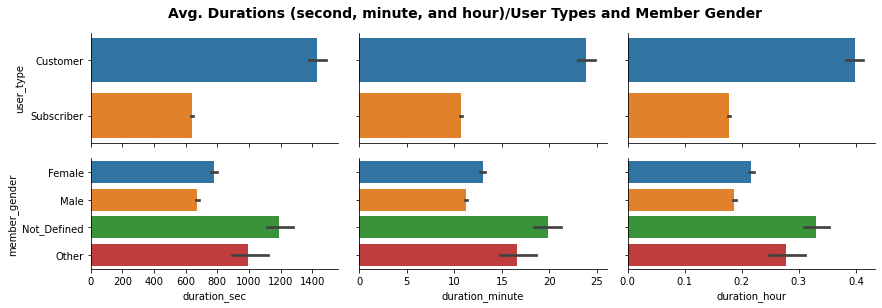

In [177]:
# plotting Avg. Durations (second, minute, and hour)/User Types and Member Gender
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['duration_sec','duration_minute','duration_hour'],
                y_vars = ['user_type','member_gender'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Durations (second, minute, and hour)/User Types and Member Gender", y=1.05, 
               fontsize=14, fontweight='bold');

In [178]:
# Check summary statistics for Durations (second, minute, and hour)
(df.groupby('user_type')[['duration_sec','duration_minute','duration_hour']].mean(), 
df.groupby('member_gender')[['duration_sec','duration_minute','duration_hour']].mean())

(            duration_sec  duration_minute  duration_hour
 user_type                                               
 Customer     1432.465019        23.874411       0.397911
 Subscriber    640.263678        10.671055       0.177846,
                duration_sec  duration_minute  duration_hour
 member_gender                                              
 Female           779.070390        12.984508       0.216419
 Male             672.639069        11.210645       0.186836
 Not_Defined     1189.462311        19.824347       0.330428
 Other            996.515334        16.608535       0.276717)

### Insights:
**1. Duration(second):**
> - Avg. duration(second) for customers(1432 seconds) is higher than that of subscriber(640 seconds).
> - Avg. duration(second) for Not-defined gender(1189 seconds) is higher than that of Other gender(997 seconds), Females(779 seconds), and Males(673 seconds).

**1. Duration(minute):**
> - Avg. duration(minute) for customers(24 minutes) is higher than that of subscriber(11 minutes).
> - Avg. duration(minute) for Not-defined gender(20 minutes) is higher than that of Other gender(17 ninutes), Females(13 minutes), and Males(11 minutes).

**1. Duration(hour):**
> - Avg. duration(hour) for customers(0.4 hour) is higher than that of subscriber(0.18 hour).
> - Avg. duration(hour) for Not-defined gender(0.33 hour) is higher than that of Other gender(0.28 hour), Females(0.22 hour), and Males(0.19 hour).

### 2.2 User Types and Member Gender vs. Start and End Time Hours and Days

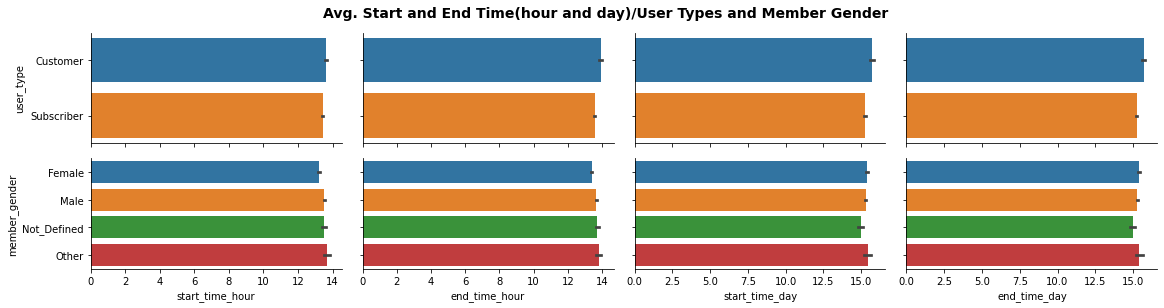

In [179]:
# plotting Avg. Start and End Time(hour and day)/User Types and Member Gender
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['start_time_hour','end_time_hour', 'start_time_day',
                'end_time_day'], y_vars = ['user_type','member_gender'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Start and End Time(hour and day)/User Types and Member Gender", y=1.05, 
               fontsize=14, fontweight='bold');

In [180]:
# Check summary statistics for Start and End Time Hours and Days
(df.groupby('user_type')[['start_time_hour','end_time_hour', 'start_time_day',
                'end_time_day']].mean(), 
df.groupby('member_gender')[['start_time_hour','end_time_hour', 'start_time_day',
                'end_time_day']].mean())

(            start_time_hour  end_time_hour  start_time_day  end_time_day
 user_type                                                               
 Customer          13.644806      13.911969       15.718643     15.718039
 Subscriber        13.435779      13.578664       15.247994     15.247285,
                start_time_hour  end_time_hour  start_time_day  end_time_day
 member_gender                                                              
 Female               13.216335      13.387474       15.378244     15.378440
 Male                 13.525277      13.674017       15.291976     15.291341
 Not_Defined          13.503448      13.721355       14.964186     14.961887
 Other                13.672234      13.796002       15.420591     15.411281)

### Insights:
**1. Start Time(hour):**
> - Avg. Start time(hour) for Subscriber(1.4 PM) is earlier than that of Customer(1.6 PM).
> - Avg. Start time(hour) for Female gender (1.2 PM) is earlier than that of Not-defined(1.5 PM), Male (1.52 PM), and Other(1.7 PM).

**2. End Time(hour):**
> - Avg. End time(hour) for Subscriber(1.6 PM) is earlier than that of Customer(1.9 PM).
> - Avg. End time(hour) for Female gender (1.4 PM) is earlier than that of Male (1.7 PM), Not-defined(1.72 PM),  and Other(1.8 PM).


**3. Start and End Time(day):**
> - Avg. Start time(day) for Subscriber(day 15) is earlier than that of Customer(day 16).
> - Avg. End time(day) for is same (day 15) for all genders.

### 2.3 User Types and Member Gender vs. Member Age, Trip Distance(km), and Bike Ids(most-used)

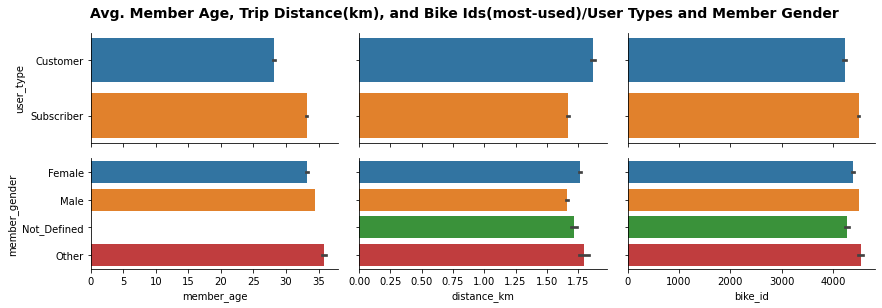

In [181]:
# plotting bar plot for Avg. Member Age, Trip Distance(km), and Bike Ids(most-used)
g = sb.PairGrid(data = df, x_vars = ['member_age', 'distance_km', 'bike_id'], y_vars = ['user_type','member_gender'],
                aspect = 2, height = 2)
g.map(sb.barplot)
g.fig.suptitle("Avg. Member Age, Trip Distance(km), and Bike Ids(most-used)/User Types and Member Gender", y=1.05, 
               fontsize=14, fontweight='bold');

In [182]:
# Check summary statistics for Member Age, Trip Distance(km), and Bike Ids
(df.groupby('user_type')[['member_age', 'distance_km', 'bike_id']].mean(), 
df.groupby('member_gender')[['member_age', 'distance_km', 'bike_id']].mean())

(            member_age  distance_km      bike_id
 user_type                                       
 Customer     28.158295     1.867206  4225.550181
 Subscriber   33.198717     1.669211  4502.956226,
                member_age  distance_km      bike_id
 member_gender                                      
 Female          33.217462     1.765259  4396.909020
 Male            34.451600     1.662637  4507.239707
 Not_Defined      0.000000     1.718845  4274.845856
 Other           35.878970     1.795024  4542.819277)

### Insights:
**1. Member Age:**
> - Avg. age for Subscriber(33 years) is higher than that of Customer(28 years).
> - Avg. age for Other gender (36 years) is higher than both Male(34 years) and Female(33 years).

**2. Distance(km):**
> - Avg. distance(km) for customers (1.9km) is higher than that of subscribers(1.7km).
> - Avg. distance(km) for Other gender(1.9km) is higher than that of Female(1.77km), Not-defined(1.72km), and Male(1.66km).

**3. Bike Id:**
> - Avg. most used bike id for Subscriber(4503) is higher than that of Customer(4226).
> - Avg. most used bike id for Other gender(4543) is higher than that of Male(4507), Female(4397), and Not-defined(4275).


### 2.4 Start and End Weekday vs. Durations (second, minute, and hour)

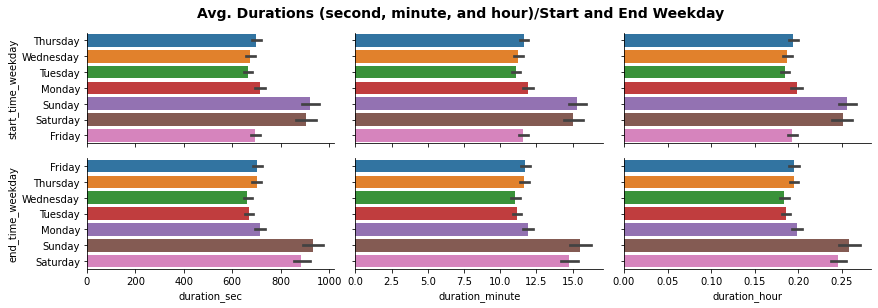

In [183]:
# plotting Avg. Durations (second, minute, and hour)/Start and End Weekday
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['duration_sec', 'duration_minute', 'duration_hour'],
                y_vars = ['start_time_weekday', 'end_time_weekday'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Durations (second, minute, and hour)/Start and End Weekday", y=1.05, 
               fontsize=14, fontweight='bold');

In [184]:
# Check summary statistics for Durations (second, minute, and hour)
(df.groupby('start_time_weekday')[['duration_sec', 'duration_minute', 'duration_hour']].mean(), 
df.groupby('end_time_weekday')[['duration_sec', 'duration_minute', 'duration_hour']].mean())

(                    duration_sec  duration_minute  duration_hour
 start_time_weekday                                              
 Friday                695.795073        11.596545       0.193272
 Monday                713.159616        11.886002       0.198095
 Saturday              902.661993        15.044383       0.250749
 Sunday                919.746054        15.329088       0.255455
 Thursday              699.040998        11.650676       0.194160
 Tuesday               663.305567        11.055108       0.184277
 Wednesday             673.671165        11.227834       0.187119,
                   duration_sec  duration_minute  duration_hour
 end_time_weekday                                              
 Friday              702.620027        11.710295       0.195169
 Monday              714.374474        11.906248       0.198433
 Saturday            885.393499        14.756574       0.245953
 Sunday              931.158732        15.519300       0.258625
 Thursday            

### Insights:
**1. Duration(second):**
> - Avg. Duration(second) for start weekend days(903-920 seconds) is higher than that of working days(663-713 seconds).
> - Avg. Duration(second) for end weekend days(885-931 seconds) is higher than that of working days(663-714 seconds).

**2. Duration(minute):**
> - Avg. Duration(minute) for start weekend days(15-15.3 minutes) is higher than that of working days(11-11.9 minutes).
> - Avg. Duration(minute) for end weekend days(14-15.5 minutes) is higher than that of working days(11-11.9 minutes).

**3. Duration(hour):**
> - Avg. Duration(hour) for start weekend days(0.25-0.26 hour) is higher than that of working days(0.18-0.20 hour).
> - Avg. Duration(hour) for end weekend days(0.25-0.26 hour) is higher than that of working days(0.18-0.20 hour).

### 2.5 Start and End Weekday vs. Start and End Time Hours and Days

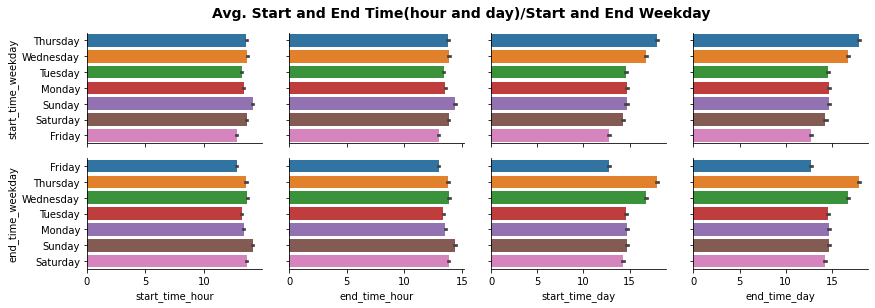

In [185]:
# plotting Avg. Start and End Time(hour and day)/Start and End Weekday
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 1.5, height = 2, x_vars = ['start_time_hour','end_time_hour',
                'start_time_day', 'end_time_day'], y_vars = ['start_time_weekday', 'end_time_weekday'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Start and End Time(hour and day)/Start and End Weekday", y=1.05, 
               fontsize=14, fontweight='bold');

In [186]:
# Check summary statistics for Start and End Time(hour and day)
(df.groupby('start_time_weekday')[['start_time_hour','end_time_hour','start_time_day', 'end_time_day']].mean(), 
df.groupby('end_time_weekday')[['start_time_hour','end_time_hour','start_time_day', 'end_time_day']].mean())

(                    start_time_hour  end_time_hour  start_time_day  \
 start_time_weekday                                                   
 Friday                    12.823022      12.971671       12.725199   
 Monday                    13.395241      13.552585       14.707508   
 Saturday                  13.652126      13.826550       14.300097   
 Sunday                    14.178058      14.360562       14.679894   
 Thursday                  13.620706      13.773731       17.969657   
 Tuesday                   13.229717      13.383711       14.586521   
 Wednesday                 13.712122      13.858473       16.787996   
 
                     end_time_day  
 start_time_weekday                
 Friday                 12.727097  
 Monday                 14.708997  
 Saturday               14.303148  
 Sunday                 14.682922  
 Thursday               17.958491  
 Tuesday                14.587559  
 Wednesday              16.789447  ,
                   start_time_hour

### Insights:
**1. Start & End Time(hour):**
> - Avg. Start Time(hour) for working day (12.8-1.7 PM) is earlier than that of weekend days(1.7-2.3 PM) .
> - Avg. End Time(hour) for working day (1-1.9 PM)is earlier than that of weekend days(1.8-2.3 PM) .

**2. Start & End Time(day):**
> - Avg. Start and End Time(day) for working day (day 12-17) is earlier than that of weekend days(14-15).


### 2.6 Start and End Weekday vs. Member Age, Trip Distance(km), and Bike Ids(most-used)

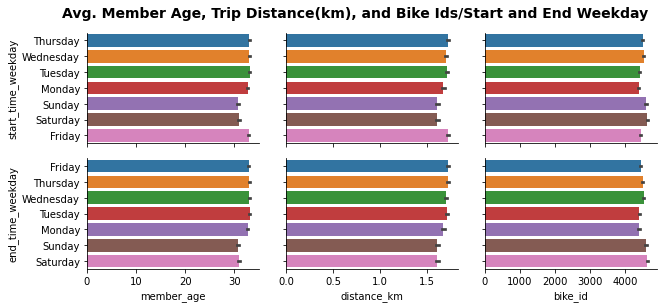

In [187]:
# plotting Avg. Member Age, Trip Distance(km), and Bike Ids/Start and End Weekday
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 1.5, height = 2, x_vars = ['member_age','distance_km',
                'bike_id'], y_vars = ['start_time_weekday', 'end_time_weekday'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Member Age, Trip Distance(km), and Bike Ids/Start and End Weekday", y=1.05, 
               fontsize=14, fontweight='bold');

In [188]:
# Check summary statistics for Member Age, Trip Distance(km), and Bike Ids
(df.groupby('start_time_weekday')[['member_age', 'distance_km', 'bike_id']].mean(), 
df.groupby('end_time_weekday')[['member_age', 'distance_km', 'bike_id']].mean())

(                    member_age  distance_km      bike_id
 start_time_weekday                                      
 Friday               32.944757     1.721757  4433.640696
 Monday               32.751527     1.673051  4380.645650
 Saturday             31.065758     1.608491  4628.002207
 Sunday               30.709077     1.608656  4575.100496
 Thursday             33.078359     1.724219  4490.056681
 Tuesday              33.160500     1.712082  4400.652249
 Wednesday            33.069903     1.699010  4517.935697,
                   member_age  distance_km      bike_id
 end_time_weekday                                      
 Friday             32.938511     1.722522  4434.009420
 Monday             32.731040     1.672490  4380.701255
 Saturday           31.067086     1.609141  4627.180432
 Sunday             30.730658     1.608401  4576.550860
 Thursday           33.087139     1.723960  4490.638170
 Tuesday            33.165179     1.712113  4399.857480
 Wednesday          33.067733

### Insights:
**1. Member Age:**
> - Avg. Member Age for start & end weekend day (30-31 years) is younger than that of working days(31-33 years)

**2. Distance(km):**
> - Avg. Distance(km) for start & end working day (1.7-1.72km) is higher than that of weekend days(1.6km)


**3. Bike Id:**
> - Avg.Bike Id for start & end weekend days(4575-4628) is higher than that of working day (4400-4518).


### 2.7 Bike Share Status and Age Groups vs. Durations (second, minute, and hour)

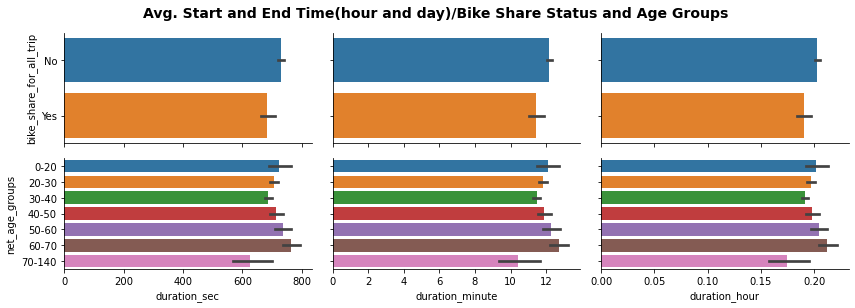

In [189]:
# plotting Avg. Durations (second, minute, and hour)/Bike Share Status and Age Groups
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['duration_sec', 'duration_minute', 'duration_hour'],
                y_vars = ['bike_share_for_all_trip','net_age_groups'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Start and End Time(hour and day)/Bike Share Status and Age Groups ", y=1.05, 
               fontsize=14, fontweight='bold');

In [190]:
# Check summary statistics for Durations (second, minute, and hour)
(df.groupby('bike_share_for_all_trip')[['duration_sec','duration_minute','duration_hour']].mean(), 
df.groupby('net_age_groups')[['duration_sec','duration_minute','duration_hour']].mean())

(                         duration_sec  duration_minute  duration_hour
 bike_share_for_all_trip                                              
 No                         730.454253        12.174229       0.202899
 Yes                        684.220174        11.403686       0.190069,
                 duration_sec  duration_minute  duration_hour
 net_age_groups                                              
 0-20              724.248113        12.070729       0.201191
 20-30             707.930257        11.798826       0.196635
 30-40             687.884419        11.464745       0.191076
 40-50             713.497823        11.891640       0.198202
 50-60             736.022779        12.267001       0.204435
 60-70             764.203723        12.736785       0.212274
 70-140            626.126957        10.435287       0.174052)

### Insights:
**1. Duration(second):**
> - Avg. Duration(second) for non-shared bikes during the ride(730 seconds) is higher than that of shared bikes(684 seconds).
> - Avg. Duration(second) for age group 60-70 (764 seconds) is higher than other groups(626-736 seconds). The middle groups 18-60 has average of 689-736 seconds and the lower age group is 70-140(626 seconds).

**2. Duration(minute):**
> - Avg. Duration(minute) for non-shared bikes during the ride(12 minutes) is higher than that of shared bikes(11 minutes).
> - Avg. Duration(minute) for age group 60-70 (12.73 minutes) is higher than other groups(10.4-12.26 minutes). The middle groups 18-60 has average of 11.5-12.27 minutes and the lower age group is 70-140(10.4 minutes).

**3. Duration(hour):**
> - Avg. Duration(hour) for non-shared bikes during the ride(0.20 hour) is higher than that of shared bikes(0.19 hour).
> - Avg. Duration(hour) for age group 60-70 (0.21 hour) is higher than other groups(17-20 hour). The middle groups 18-60 have an average of 0.19-0.20 hour and the lower age group is 70-140(0.17 hour).


### 2.8 Bike Share Status and Age Groups vs. Start and End Time Hours and Days

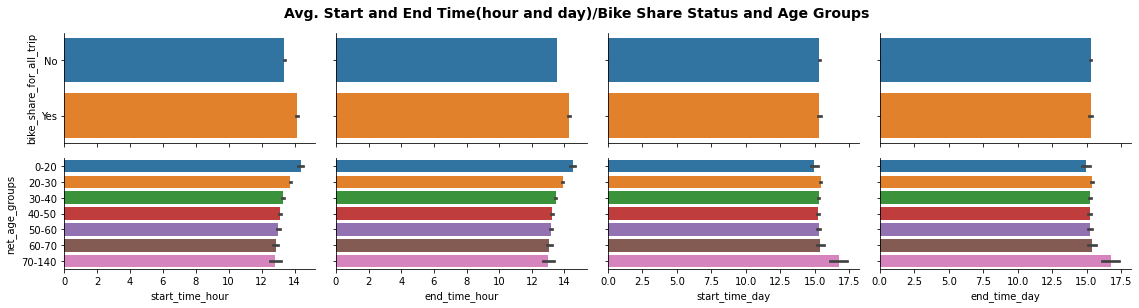

In [191]:
# plotting Avg. Start and End Time Hours and Days/Bike Share Status and Age Groups
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['start_time_hour','end_time_hour',
                'start_time_day', 'end_time_day'],
                y_vars = ['bike_share_for_all_trip','net_age_groups'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Start and End Time(hour and day)/Bike Share Status and Age Groups ", y=1.05, 
               fontsize=14, fontweight='bold');

In [192]:
# Check summary statistics for Start and End Time(hour and day)
(df.groupby('bike_share_for_all_trip')[['start_time_hour','end_time_hour','start_time_day', 'end_time_day']].mean(), 
df.groupby('net_age_groups')[['start_time_hour','end_time_hour','start_time_day', 'end_time_day']].mean())

(                         start_time_hour  end_time_hour  start_time_day  \
 bike_share_for_all_trip                                                   
 No                             13.387587      13.546350       15.298357   
 Yes                            14.136010      14.269255       15.304914   
 
                          end_time_day  
 bike_share_for_all_trip                
 No                          15.297863  
 Yes                         15.302264  ,
                 start_time_hour  end_time_hour  start_time_day  end_time_day
 net_age_groups                                                              
 0-20                  14.376415      14.508962       14.945519     14.948349
 20-30                 13.745989      13.894302       15.409927     15.409057
 30-40                 13.309411      13.462214       15.259697     15.259290
 40-50                 13.104036      13.266984       15.224127     15.222993
 50-60                 13.016952      13.185326       15.2581

### Insights:
**1. Start & End Time(hour):**
> - Avg. Start Time(hour) for non-shared bikes(1.4 PM) is earlier than that of shared bikes(2.1 PM).
> - Avg. End Time(hour) for non-shared bikes(1.5 PM) is earlier than that of shared bikes(2.3 PM).
> - Avg. Start Time(hour) for age group 70-141(12.82 PM) is earlier than other age groups(12.87 PM-2.4 PM). The middle groups 20-70 has average of 12.9 PM-1.75 PM and the lower age group is 18-20(2.4 PM).
> - Avg. End Time(hour) for age group 70-141(1 PM) is earlier than other age groups(1.05 PM-2.5 PM). The middle groups 20-70 has average of 1.05 PM-1.9 PM and the lower age group is 18-20(2.5 PM).


**2. Start & End Time(day):**
> - Avg. Start and End Time(day) for both non-shared bikes and shared bikes is day 15.
> - Avg. Start and End Time(day) for age groups 18-70 is day 15 and for age group 70-141 is day 17.

### 2.9 Bike Share Status and Age Groups vs. Member Age, Trip Distance(km), and Bike Ids(most-used)¶

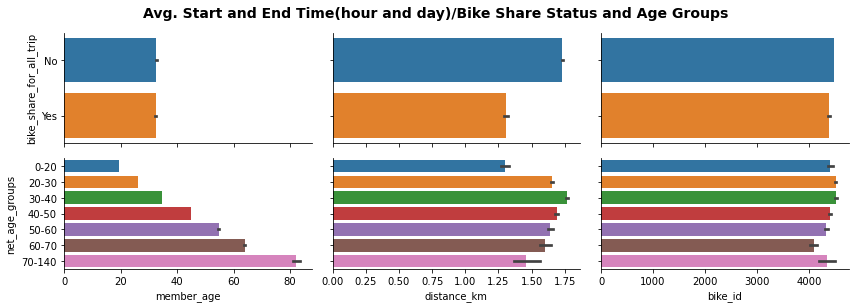

In [193]:
# plotting Avg. Member Age, Trip Distance(km), and Bike Ids/Bike Share Status and Age Groups
# x variables are numeric and y varaibles are categorical
g = sb.PairGrid(data = df,  aspect = 2, height = 2, x_vars = ['member_age', 'distance_km', 'bike_id'],
                y_vars = ['bike_share_for_all_trip','net_age_groups'])
g.map(sb.barplot)
g.fig.suptitle("Avg. Start and End Time(hour and day)/Bike Share Status and Age Groups ", y=1.05, 
               fontsize=14, fontweight='bold');

In [194]:
# Check summary statistics for Member Age, Trip Distance(km), and Bike Ids
(df.groupby('bike_share_for_all_trip')[['member_age', 'distance_km', 'bike_id']].mean(), 
df.groupby('net_age_groups')[['member_age', 'distance_km', 'bike_id']].mean())

(                         member_age  distance_km      bike_id
 bike_share_for_all_trip                                      
 No                        32.669834     1.731022  4482.769845
 Yes                       32.488968     1.304558  4378.554237,
                 member_age  distance_km      bike_id
 net_age_groups                                      
 0-20             19.588208     1.299768  4403.791509
 20-30            26.295486     1.654897  4517.431520
 30-40            34.684954     1.767911  4520.030210
 40-50            44.919184     1.687907  4409.832245
 50-60            54.708017     1.642379  4331.067544
 60-70            63.942809     1.601229  4090.001015
 70-140           82.109565     1.461706  4344.766957)

### Insights:
**1. Member Age:**
> - Avg. Member Age for non-shared bikes is 33 years and  for shared bikes is 32 years.

**2. Distance(km):**
> - Avg.  Distance(km) for non-shared bikes is 1.7km and for shared bikes is 1.3km.
> - Avg.  Distance(km) for age group 30-40 (1.8km) is higher than other age groups(1.3km-1.7km). The middle age groups(18-20 & 20-30 & 70-141) have an average distance of 1.5km-1.7km and the lower age group 18-20 has an average distance of 1.3km. 

**3. Bike Id:**
> - Avg. Bike Id for snon-shared bikes(4483) is higher than that of shared bikes(4379).
> - Avg. Bike Id for age group 30-40(4520) is higher than other age groups(4090-4517). The middle age groups(18-30 & 40-141) have an average bike id of 4090-4517 and the lower age group 60-70 has an average bike id of 4090. 

## 3. Plotting Three Numeric Variables: Encoding via Size and Color

### 3.1 Member Age and Ride Distance(km) vs. Ride Start and End Times in Hours and Days

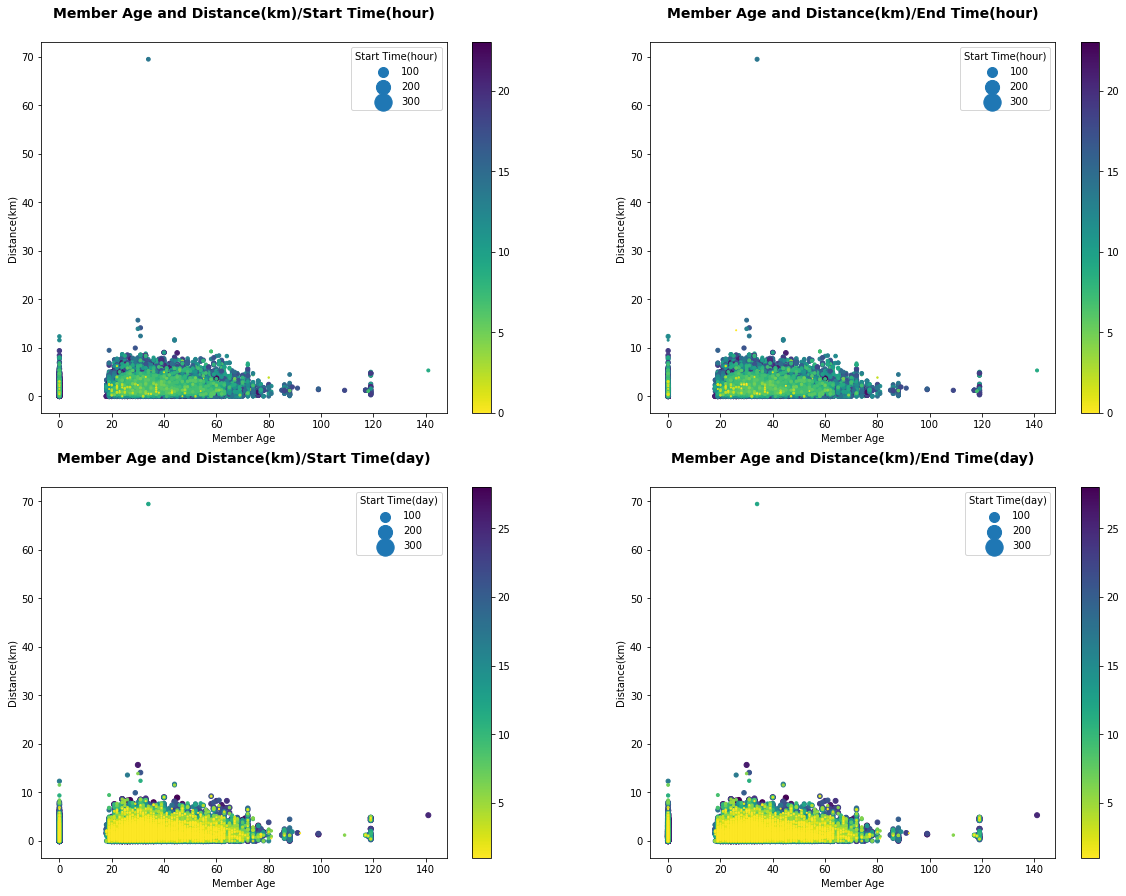

In [195]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Ride Start and End Times in Hours and Days

# figure size
plt.figure(figsize =[20, 15])

# SCATTER PLOT ON LEFT, ROW 1:  Member Age and Distance(km)/Start Time(hour)
plt.subplot(2,2,1)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'start_time_hour',
            s = 'start_time_hour', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Start Time(hour)')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Start Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON LEFT, ROW 1:  Member Age and Distance(km)/End Time(hour)
plt.subplot(2,2,2)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'start_time_hour',
            s = 'end_time_hour', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Start Time(hour)')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/End Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON LEFT, ROW 2:  Member Age and Distance(km)/Start Time(day)
plt.subplot(2,2,3)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'start_time_day', 
            s = 'start_time_day', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Start Time(day)')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT, ROW 2:  Member Age and Distance(km)/End Time(day)
plt.subplot(2,2,4)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'start_time_day', 
            s = 'end_time_day', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Start Time(day)')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/End Time(day)", y=1.05, fontsize=14, fontweight='bold');


### Insights:
>- There is a negative coorelation between member age and distance(km) based on start and end time hours and days: as member age increases, the distance decreases.

### 3.2 Member Age and Ride Distance(km) vs. Durations in Seconds, Minutes, and Hours

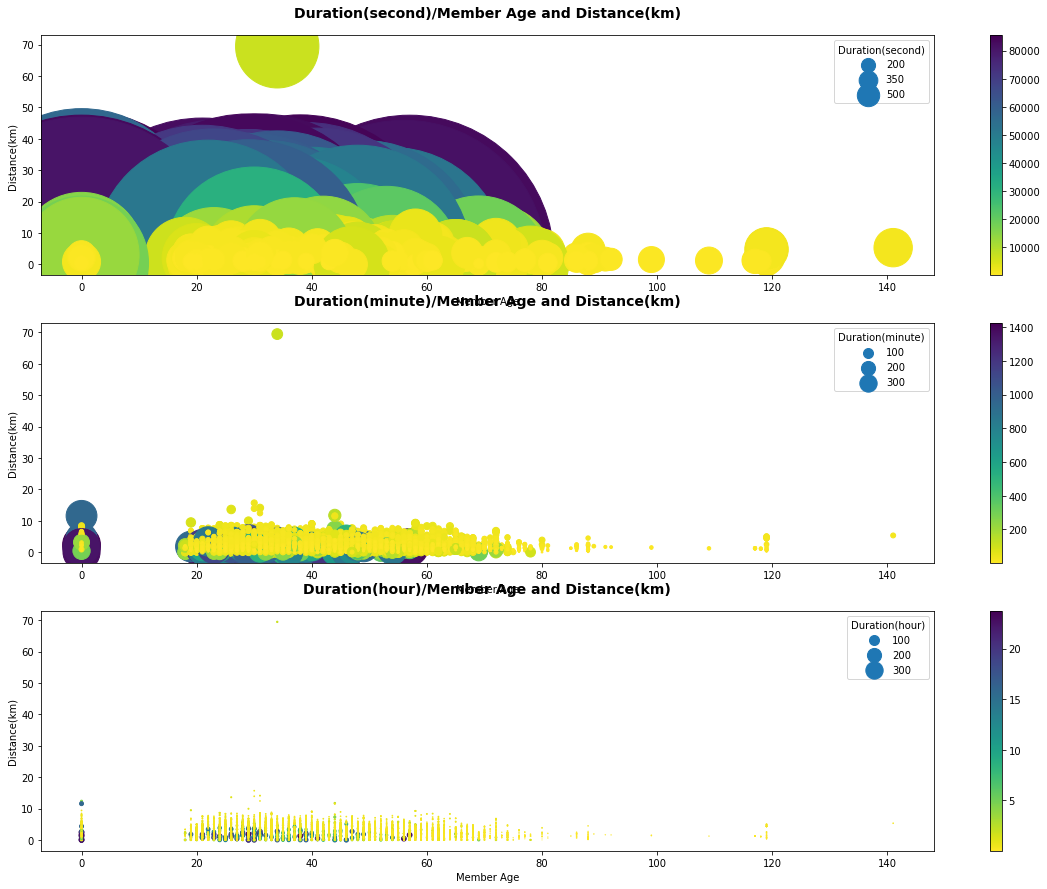

In [196]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Durations in Seconds, Minutes, and Hours

# figure size
plt.figure(figsize =[20, 15])

# SCATTER PLOT ON LEFT, ROW 1:  Member Age and Distance(km)/Duration(second)
plt.subplot(3, 1, 1)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'duration_sec',
            s = 'duration_sec', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Duration(second)')
# labels and title
plt.xticks(rotation=0)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration(second)/Member Age and Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Member Age and Distance(km)/Duration(minute)
plt.subplot(3, 1, 2)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'duration_minute',
            s = 'duration_minute', cmap ='viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Duration(minute)')
# labels and title
plt.xticks(rotation=0)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration(minute)/Member Age and Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT, ROW 1:  Member Age and Distance(km)/Duration(hour)
plt.subplot(3, 1, 3)
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'duration_hour',
            s = 'duration_hour', cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [100, 200, 300]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Duration(hour)')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Duration(hour)/Member Age and Distance(km)", y=1.05, fontsize=14, fontweight='bold');


### Insights:
>- There is a negative coorelation between member age and distance(km) based on duration: as member age increases, the distance over durations in seconds, minutes, and hours decreases.

### 3.3 Member Age and Ride Distance(km) vs. Bike Id

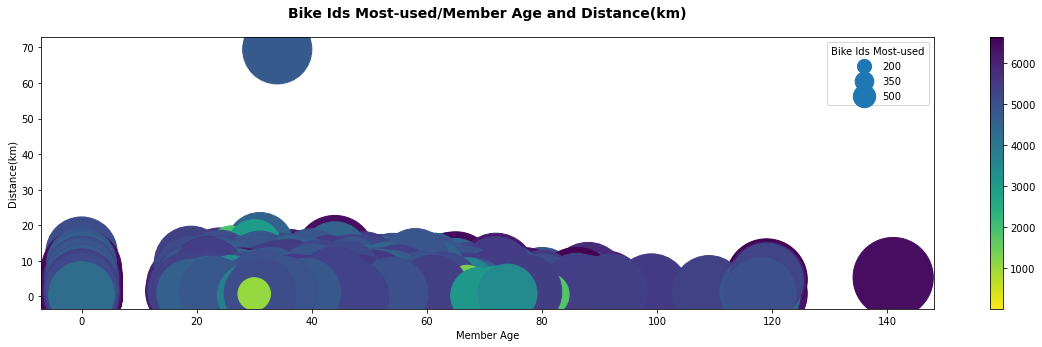

In [197]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Bike Id

# figure size
plt.figure(figsize =[20, 5])
# plot scatter plot
plt.scatter(data = df, x = 'member_age', y = 'distance_km', c = 'bike_id', s = 'bike_id', 
            cmap = 'viridis_r')
plt.colorbar()
# dummy series for adding legend
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Bike Ids Most-used')
# labels and title
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Bike Ids Most-used/Member Age and Distance(km)", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a a negative coorelation between member age and distance(km) based on bike id: as member age increases, the distance over bike ids decreases.

## 4. Plotting Two numeric variables vs. One categorical variable: Encoding via Shape and Color for Third Categorical

### 4.1 Member Age and Ride Distance(km) vs. User Type

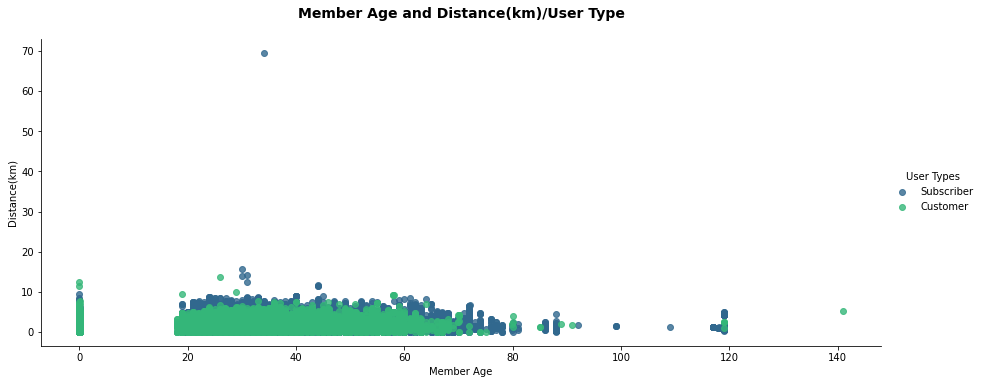

In [198]:
# plot scatter plot for Member Age and Ride Distance(km) vs. User Type

# hue = the categorical variable that the other 2 numeric variables in the map() funtion are compared against it
grid = sb.FacetGrid(data = df, hue = 'user_type', hue_order = ['Subscriber', 'Customer'], height = 5, 
                    aspect= 2.5, palette = 'viridis')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='User Types')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/User Type", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on user type: as member age increases, the distance for both subscribers and customers decreases.

### 4.2 Member Age and Ride Distance(km) vs. Member Gender

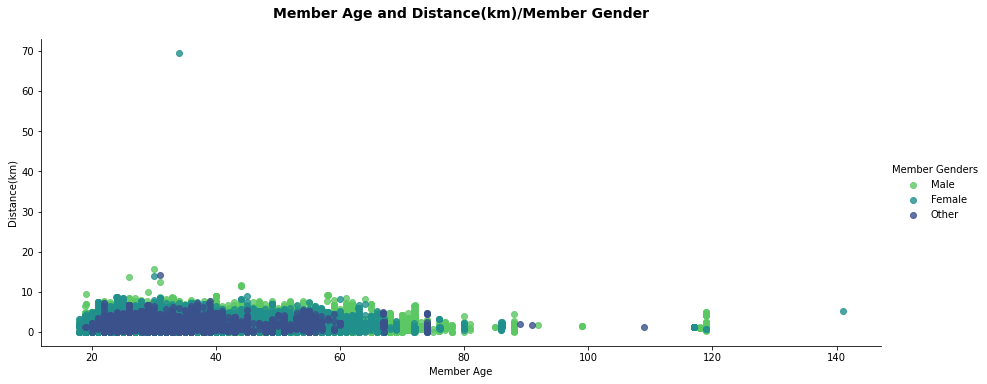

In [199]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Member Gender
# hue = the categorical variable that the other 2 numeric variables in the map() funtion are compared against it
grid = sb.FacetGrid(data = df, hue = 'member_gender', hue_order = ['Male', 'Female', 'Other'], height = 5, 
                    aspect= 2.5,  palette = 'viridis_r')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='Member Genders')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Member Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on member gender: as member age increases, the distance for both male, female and other genders decreases.

### 4.3 Member Age and Ride Distance(km) vs. Age Groups

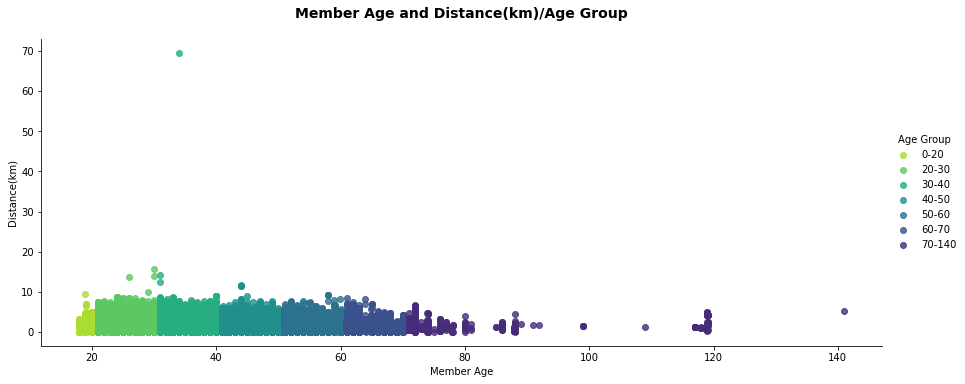

In [200]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Age Groups
# hue = the categorical variable that the other 2 numeric variables in the map() funtion are compared against it
grid = sb.FacetGrid(data = df, hue = 'net_age_groups', height = 5, 
                    aspect= 2.5,  palette = 'viridis_r')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='Age Group')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Age Group", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on age group: as member age increases, the distance for age groups decreases.

### 4.4 Member Age and Ride Distance(km) vs. Ride Start and End Weekdays 

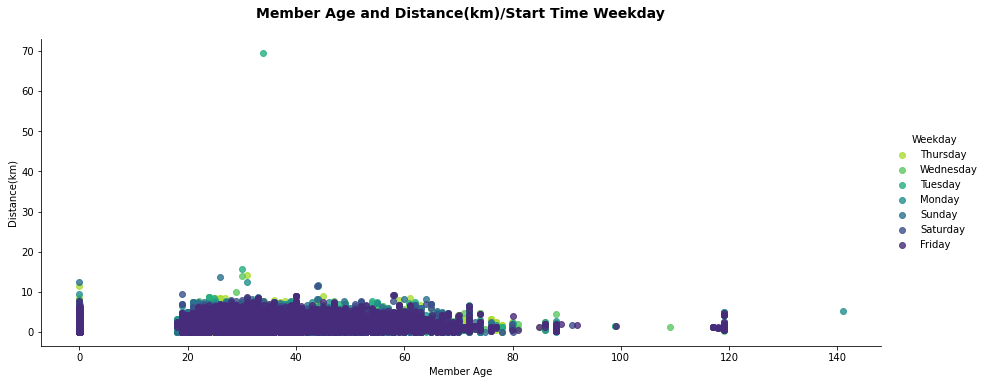

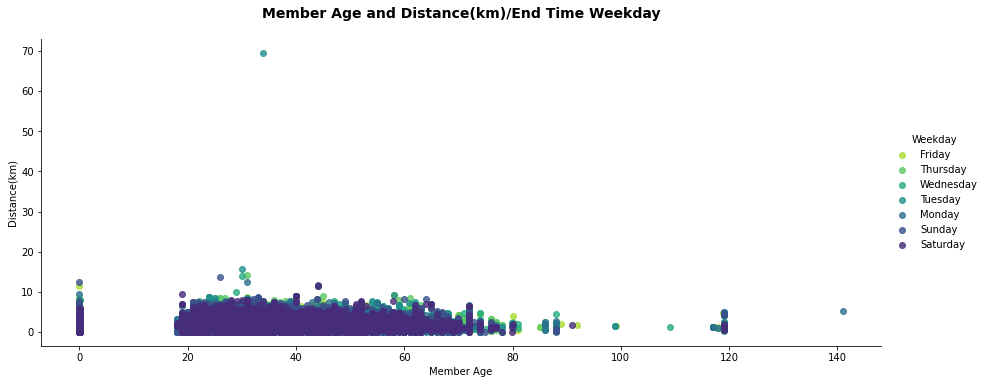

In [201]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Ride Start and End Weekdays
# hue = the categorical variable that the other 2 numeric variables in the map() funtion are compared against it

# plot scatter plot: Member Age and Ride Distance(km) vs. Ride Start Weekdays 
grid = sb.FacetGrid(data = df, hue = 'start_time_weekday', height = 5,  aspect = 2.5, 
                    palette = 'viridis_r')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='Weekday')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Start Time Weekday", y=1.05, fontsize=14, fontweight='bold');


# plot scatter plot: Member Age and Ride Distance(km) vs. Ride End Weekdays 
grid = sb.FacetGrid(data = df, hue = 'end_time_weekday', height = 5, aspect = 2.5, 
                    palette = 'viridis_r')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='Weekday')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/End Time Weekday", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on start and end time weekdays: as member age increases, the distance for weekdays decreases.

### 4.4 Member Age and Ride Distance(km) vs. Bike Share Status

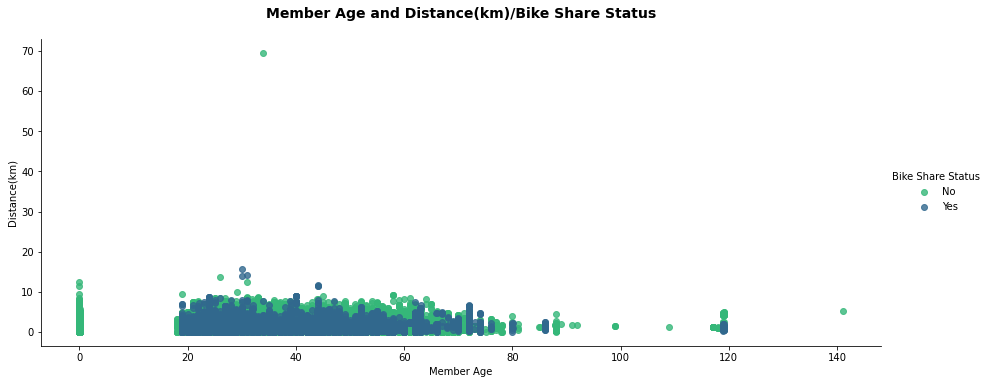

In [202]:
# plot scatter plot for Member Age and Distance(km)/Bike Share Status
# hue = the categorical variable that the other 2 numeric variables in the map() funtion are compared against it

grid = sb.FacetGrid(data = df, hue = 'bike_share_for_all_trip', height = 5,  aspect = 2.5, 
                 palette = 'viridis_r')
grid.map(sb.regplot, 'member_age', 'distance_km', x_jitter = 0.04, fit_reg = False)
grid.add_legend(title ='Bike Share Status')
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.xticks(rotation=0)
plt.title("Member Age and Distance(km)/Bike Share Status", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on bike shar status: as member age increases, the distance for both shared or non-shared bikes decreases.

## 5.  One Categorical Variable and Two Numeric Variables

### 5.1 Member Age and Ride Distance(km) vs. User Type

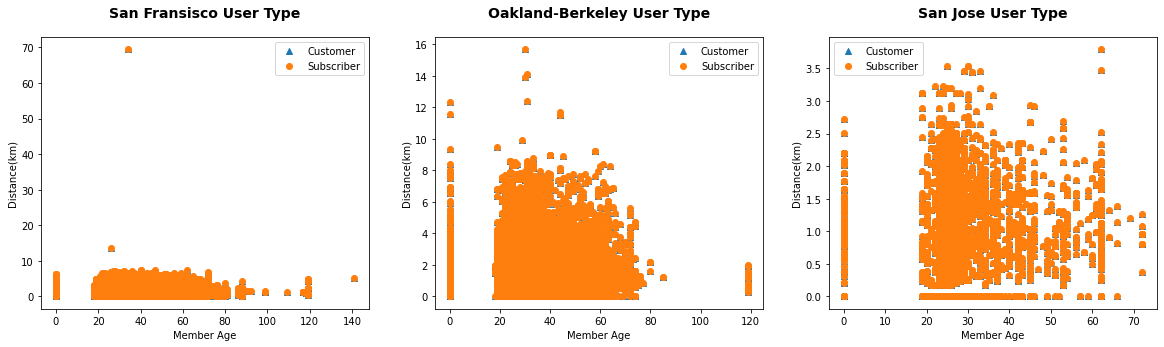

In [203]:
# plot scatter plot for Member Age and Ride Distance(km) vs. User Type
# Figure size
plt.figure(figsize = [20, 5])

# SCATTER PLOT ON LEFT, ROW 1:  San Fransisco Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 1)
ttype_markers = [['Subscriber', '^'],
               ['Customer', 'o']]

for ttype, marker in ttype_markers:
    plot_data = San_Fransisco[San_Fransisco['user_type'] == ttype]
    plt.scatter(data = San_Fransisco, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Customer','Subscriber'])
plt.title("San Fransisco User Type", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 2)
ttype_markers = [['Subscriber', '^'],
               ['Customer', 'o']]

for ttype, marker in ttype_markers:
    plot_data = Oakland_Berkeley[Oakland_Berkeley['user_type'] == ttype]
    plt.scatter(data = Oakland_Berkeley, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Customer','Subscriber'])
plt.title("Oakland-Berkeley User Type", y=1.05, fontsize=14, fontweight='bold');



# SCATTER PLOT ON RIGHT, ROW 1:  San Jose Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 3)
ttype_markers = [['Subscriber', '^'],
               ['Customer', 'o']]

for ttype, marker in ttype_markers:
    plot_data = San_Jose[San_Jose['user_type'] == ttype]
    plt.scatter(data = San_Jose, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Customer','Subscriber'])
plt.title("San Jose User Type", y=1.05, fontsize=14, fontweight='bold');


### Insights:
>- There is a negative coorelation between member age and distance(km) based on user types of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for user types in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations is <10km but <4km for San Jose stations.
> -The dominant user type in all stations is Subscriber.

### 5.2 Member Age and Ride Distance(km) vs. Member Gender

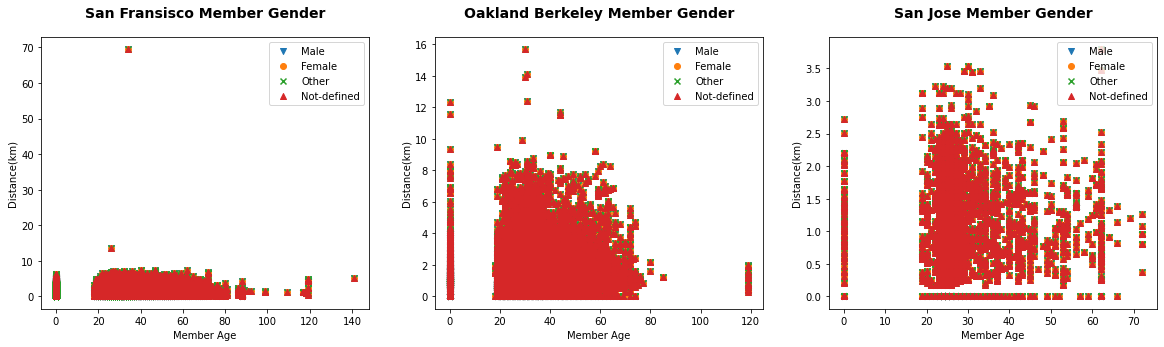

In [204]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Member Gender
# Figure size
plt.figure(figsize = [20, 5])

# SCATTER PLOT ON LEFT, ROW 1:  San Fransisco Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 1)
ttype_markers = [['Male', 'v'],
               ['Female', 'o'],
               ['Other', 'x'],
               ['Not-defined', '^']]

for ttype, marker in ttype_markers:
    plot_data = San_Fransisco[San_Fransisco['member_gender'] == ttype]
    plt.scatter(data = San_Fransisco, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Male','Female', 'Other', 'Not-defined'])
plt.title("San Fransisco Member Gender", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 2)
ttype_markers = [['Male', 'v'],
               ['Female', 'o'],
               ['Other', 'x'],
               ['Not-defined', '^']]

for ttype, marker in ttype_markers:
    plot_data = Oakland_Berkeley[Oakland_Berkeley['member_gender'] == ttype]
    plt.scatter(data = Oakland_Berkeley, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Male','Female', 'Other', 'Not-defined'])
plt.title("Oakland Berkeley Member Gender", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON RIGHT, ROW 1:  San Jose Member Age and Ride Distance(km) vs. User Type
plt.subplot(1, 3, 3)
ttype_markers = [['Male', 'v'],
               ['Female', 'o'],
               ['Other', 'x'],
               ['Not-defined', '^']]

for ttype, marker in ttype_markers:
    plot_data = San_Jose[San_Jose['member_gender'] == ttype]
    plt.scatter(data = San_Jose, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Male','Female', 'Other', 'Not-defined'])
plt.title("San Jose Member Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on member genders of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for all member genders in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations is <10km but <4km for San Jose stations. 

### 5.3 Member Age and Ride Distance(km) vs. Bike Share Status

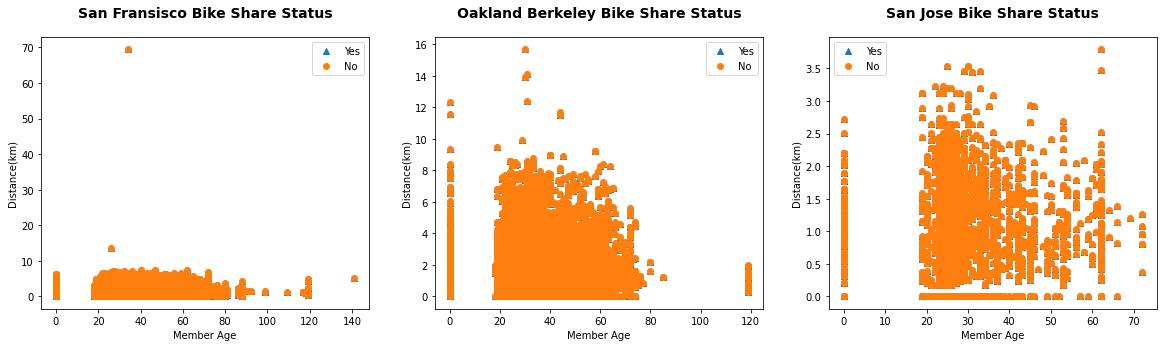

In [205]:
# plot scatter plot for Member Age and Ride Distance(km) vs. Bike Share Status
# Figure size
plt.figure(figsize = [20, 5])

# SCATTER PLOT ON LEFT, ROW 1:  San Fransisco Member Age and Ride Distance(km) vs. Bike Share Status
plt.subplot(1, 3, 1)
ttype_markers = [['Yes', '^'],
               ['No', 'o']]

for ttype, marker in ttype_markers:
    plot_data = San_Fransisco[San_Fransisco['bike_share_for_all_trip'] == ttype]
    plt.scatter(data = San_Fransisco, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Yes','No'])
plt.title("San Fransisco Bike Share Status", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Member Age and Ride Distance(km) vs. Bike Share Status
plt.subplot(1, 3, 2)
ttype_markers = [['Yes', '^'],
               ['No', 'o']]

for ttype, marker in ttype_markers:
    plot_data = Oakland_Berkeley[Oakland_Berkeley['bike_share_for_all_trip'] == ttype]
    plt.scatter(data = Oakland_Berkeley, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Yes','No'])
plt.title("Oakland Berkeley Bike Share Status", y=1.05, fontsize=14, fontweight='bold');



# SCATTER PLOT ON RIGHT, ROW 1:  San Jose Member Age and Ride Distance(km) vs. Bike Share Status
plt.subplot(1, 3, 3)
ttype_markers = [['Yes', '^'],
               ['No', 'o']]

for ttype, marker in ttype_markers:
    plot_data = San_Jose[San_Jose['bike_share_for_all_trip'] == ttype]
    plt.scatter(data = San_Jose, x = 'member_age', y = 'distance_km', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Distance(km)')
plt.legend(['Yes','No'])
plt.title("San Jose Bike Share Status", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and distance(km) based on Bike Share Status of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for bike share in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations <10km but <4km for San Jose stations. 
> -The dominant bike share status in all stations is non-shared.

### 5.4 Member Age and Duration vs. Ride Weekday

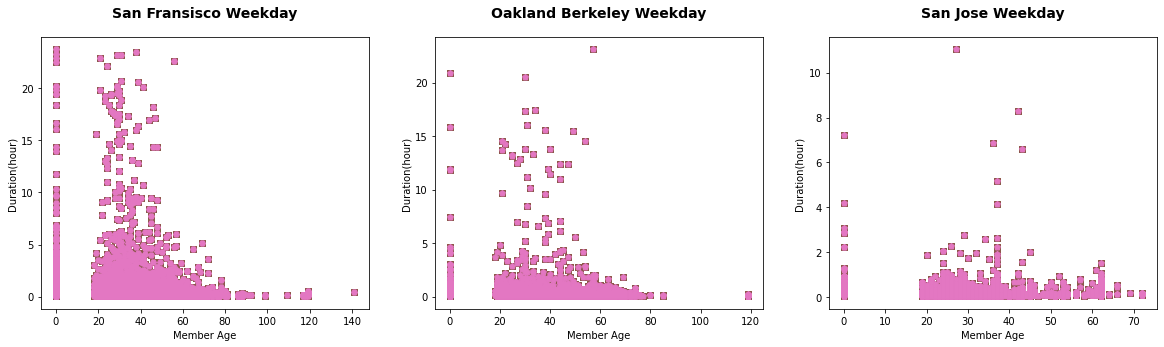

In [206]:
# plot scatter plot Member Age and Duration vs. Ride Weekdays
# Figure size
plt.figure(figsize = [20, 5])

# SCATTER PLOT ON LEFT, ROW 1:  San Fransisco Member Age and Ride Distance(km) vs. Ride Weekdays
plt.subplot(1, 3, 1)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'p'],
               ['Thursday', 's'],
               ['Friday', 'H']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = San_Fransisco, x = 'member_age', y = 'duration_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Duration(hour)')
plt.title("San Fransisco Weekday", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Member Age and Ride Distance(km) vs. Ride Weekdays
plt.subplot(1, 3, 2)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'H'],
               ['Thursday', 's'],
               ['Friday', 'p']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = Oakland_Berkeley, x = 'member_age', y = 'duration_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Duration(hour)')
plt.title("Oakland Berkeley Weekday", y=1.05, fontsize=14, fontweight='bold');



# SCATTER PLOT ON RIGHT, ROW 1:  San Jose Member Age and Ride Distance(km) vs. Ride Weekdays
plt.subplot(1, 3, 3)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'H'],
               ['Thursday', 's'],
               ['Friday', 'p']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = San_Jose, x = 'member_age', y = 'duration_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Duration(hour)')
plt.title("San Jose Weekday", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a negative coorelation between member age and duration based on weekday in San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the duration in all stations decreases.

### 5.5 Member Age and Weekdays vs. Start Time Hour

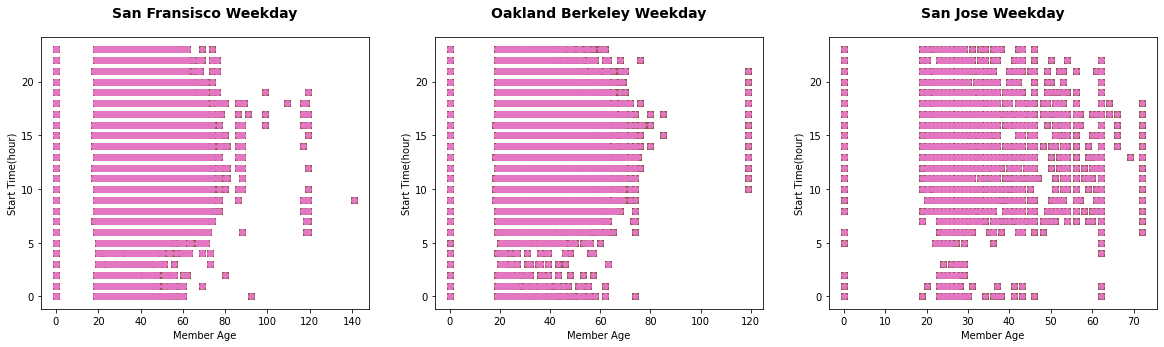

In [207]:
# plot scatter plot Member Age and Duration vs. Ride Weekdays
# Figure size
plt.figure(figsize = [20, 5])

# SCATTER PLOT ON LEFT, ROW 1:  San Fransisco Member Age and Weekdays vs. Start Time Hour
plt.subplot(1, 3, 1)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'p'],
               ['Thursday', 's'],
               ['Friday', 'H']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = San_Fransisco, x = 'member_age', y = 'start_time_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Start Time(hour)')
plt.title("San Fransisco Weekday", y=1.05, fontsize=14, fontweight='bold');

# SCATTER PLOT ON MIDDLE, ROW 1:  Oakland_Berkeley Member Age and Weekdays vs. Start Time Hour
plt.subplot(1, 3, 2)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'H'],
               ['Thursday', 's'],
               ['Friday', 'p']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = Oakland_Berkeley, x = 'member_age', y = 'start_time_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Start Time(hour)')
plt.title("Oakland Berkeley Weekday", y=1.05, fontsize=14, fontweight='bold');



# SCATTER PLOT ON RIGHT, ROW 1:  San Jose Member Age and Weekdays vs. Start Time Hour
plt.subplot(1, 3, 3)
ttype_markers = [['Saturday', 'o'],
               ['Sunday', 'v'],
               ['Monday', '^'],
               ['Tuesday', 'h'],
               ['Wednesday', 'H'],
               ['Thursday', 's'],
               ['Friday', 'p']]

for ttype, marker in ttype_markers:
    plot_data = df[df['start_time_day'] == ttype]
    plt.scatter(data = San_Jose, x = 'member_age', y = 'start_time_hour', marker = marker)
plt.xlabel('Member Age')
plt.ylabel('Start Time(hour)')
plt.title("San Jose Weekday", y=1.05, fontsize=14, fontweight='bold');

### Insights:
>- There is a positive coorelation between member age and start time hour based on weekday in San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the start time hour in all stations increases.

## 5. Plotting Two Categorical Variables vs. One Numeric Variable

### 5.1 User Type and Member Gender vs. Member Age

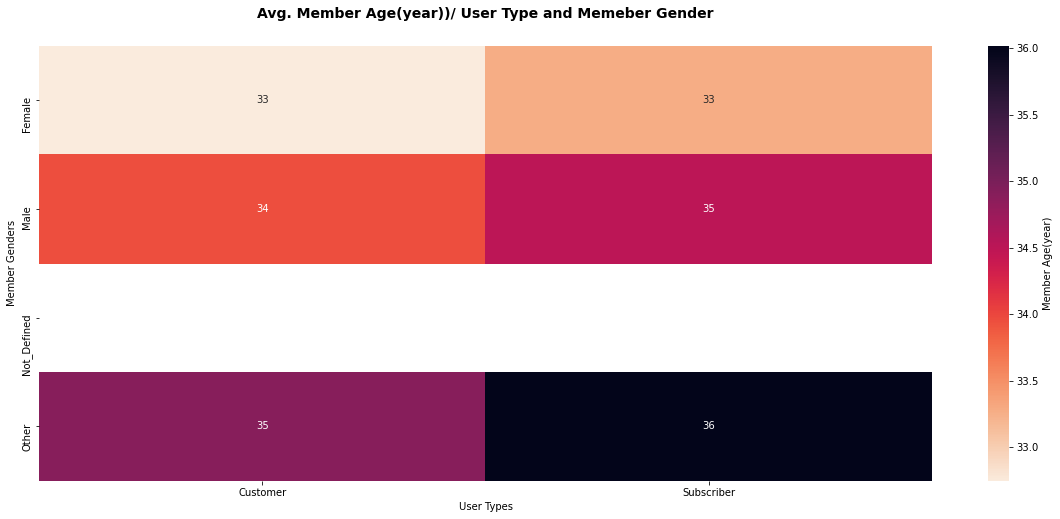

In [208]:
# plot Heat Map for User Type and Member Gender vs. Member Age
plt.figure(figsize =[20, 8])

# filter categorical variables by numeric variable
cat_means = ages_minus_0.groupby(['user_type','member_gender']).mean()['member_age']
# index and order variables
cat_means = cat_means.reset_index(name = 'distance_km')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'distance_km')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.0f', cmap='rocket_r', cbar_kws = {'label':'Member Age(year)'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Member Age(year))/ User Type and Memeber Gender", y=1.05, fontsize=14, fontweight='bold');



### Insights:
>  Avg. member age per user type and member gender can be summarized as follows:
> - 1. Female gender is the youngest gender ( 33 year for customer and subscriber user type).
> - 2. Male gender is middle age( 34 years for customers and 35 for subscribers).
> - 3. Other gender is the eldest gender( 35 years for customers and 36 years for subscriber).

### 5.2 User Type and Member Gender vs. Distance(km)

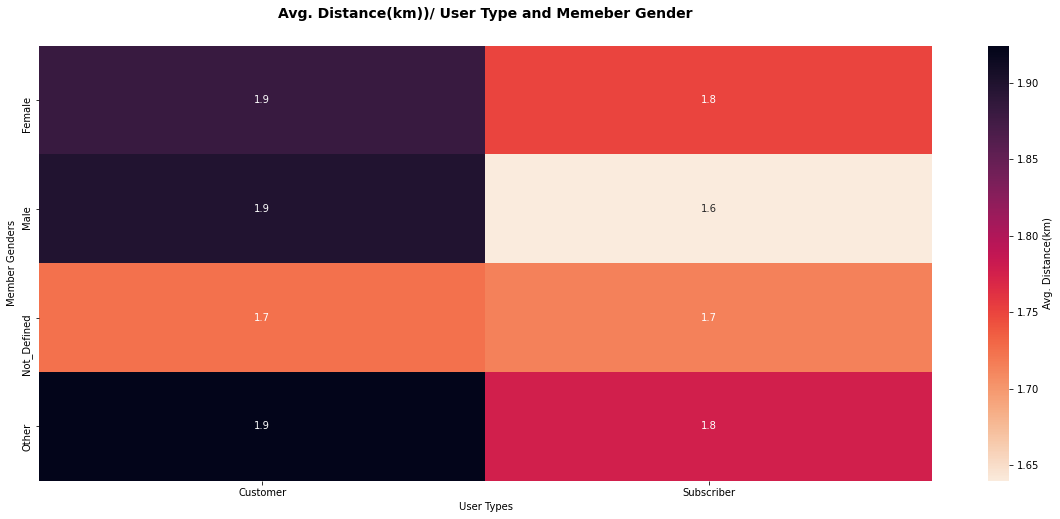

In [209]:
# plot Heat Map for User Type and Member Gender vs. Distance(km)
plt.figure(figsize =[20, 8])

# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['distance_km']
# index and order variables
cat_means = cat_means.reset_index(name = 'distance_km')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'distance_km')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.1f', cmap='rocket_r', cbar_kws = {'label':'Avg. Distance(km)'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Distance(km))/ User Type and Memeber Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> Avg. distance(km) per user type and member gender can be summarized as follows:
> - 1. Female, male and other genders are the highest genders in distance(km)(1.9km for customers and 1.8km for subscribers(just females and others)).
> - 2. Not-defined gender is has average distance of 1.7km for both customer and subscriber user types.
> - 3. Male gender is has the lowest distance for subscriber user type(1.6km).

### 5.3 User Type and Member Gender vs. Durations in Seconds, Minutes, and Hours

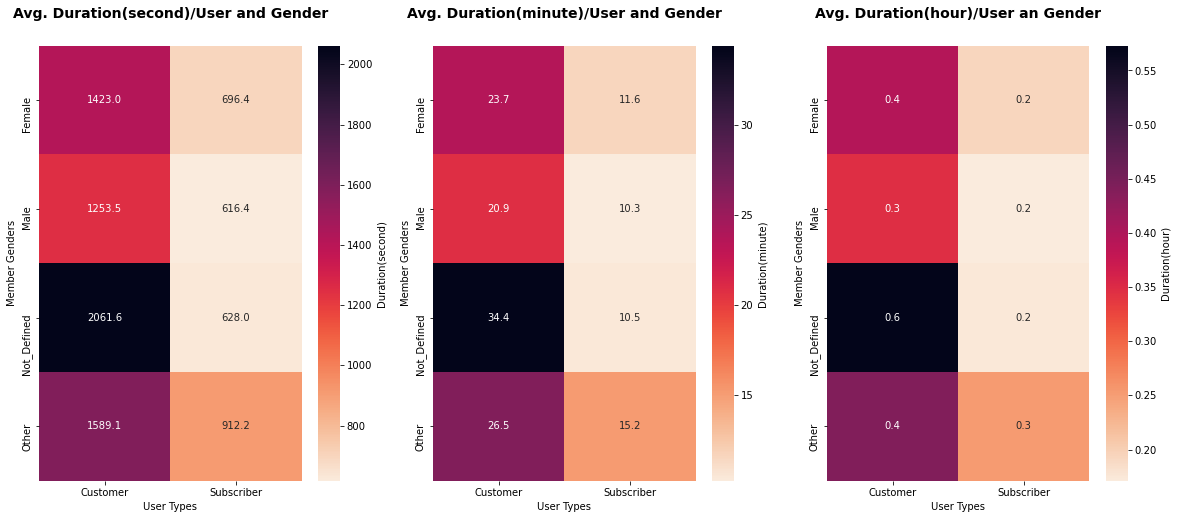

In [210]:
# plot Heat Map for User Type and Member Gender vs. Durations in Seconds, Minutes, and Hours

# figure size
plt.figure(figsize =[20, 8])

# HEAT MAP ON LEFT, ROW 1:  Avg. Duration(second)/User Type and Memeber Gender
plt.subplot(1,3,1)

# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_sec']
# index and order variables
cat_means = cat_means.reset_index(name = 'duration_sec')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'duration_sec')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.1f', cmap='rocket_r', cbar_kws = {'label':'Duration(second)'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Duration(second)/User and Gender", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON MIDDLE, ROW 1:  Avg. Duration(minute)/User Type and Memeber Gender
plt.subplot(1,3,2)

# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_minute']
# index and order variables
cat_means = cat_means.reset_index(name = 'duration_minute')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'duration_minute')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.1f', cmap='rocket_r', cbar_kws = {'label':'Duration(minute)'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Duration(minute)/User and Gender", y=1.05, fontsize=14, fontweight='bold');


# HEAT MAP ON RIGHT, ROW 1:  Avg. Duration(hour)/User Type and Memeber Gender
plt.subplot(1,3,3)
# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_hour']
# index and order variables
cat_means = cat_means.reset_index(name = 'duration_hour')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'duration_hour')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.1f', cmap='rocket_r', cbar_kws = {'label':'Duration(hour)'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Duration(hour)/User an Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights: 
> Avg. Durations per user type and member gender can be summarized as follows:
> - 1. Customers have higher duration(second) for all genders(1254-2062 seconds) than subscribers'(216-912 seconds).
> - 2. Customers have higher duration(minute) for all genders(20.9-34.4 minutes) than subscribers'(10.3-15.2 minutes).
> - 3. Customers have higher duration(hour) for all genders(0.3-0.6 hour) than subscribers'(0.2-0.3 hour).

### 5.4 User Type and Member Gender vs. Start Time Hour and Day

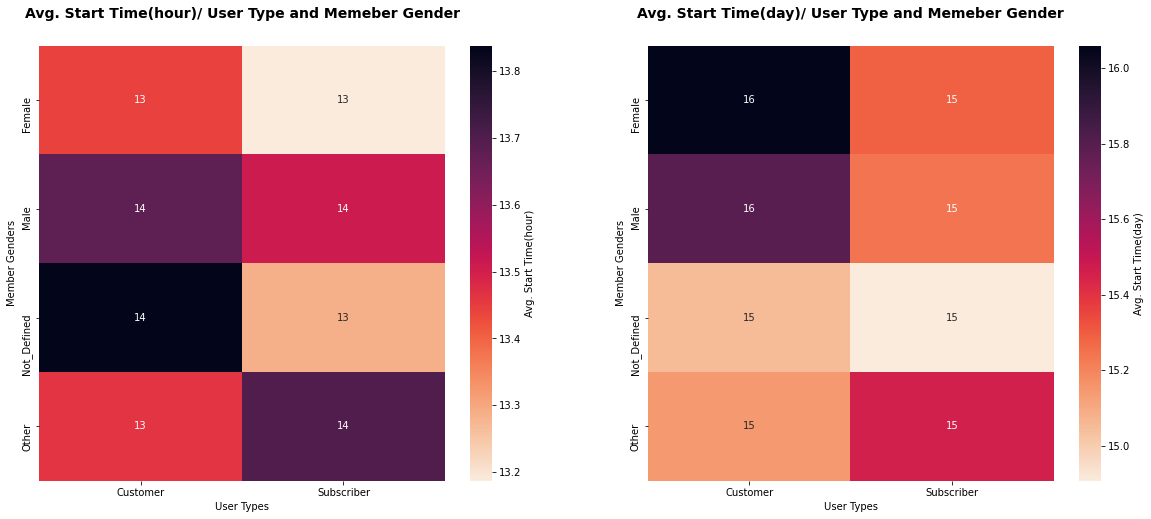

In [211]:
# plotting 2 categorical variables vs. 1 numeric variable in terms of mean statistic
# plot Heat Map for Avg. Start Time(hour)/User Type and Memeber Gender and
# Avg. Start Time(day)/User Type and Memeber Gender

# figure size
plt.figure(figsize =[20, 8])

# HEAT MAP ON LEFT, ROW 1:  Avg. Start Time(hour)/User Type and Memeber Gender
plt.subplot(1,2,1)
# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['start_time_hour']
# index and order variables
cat_means = cat_means.reset_index(name = 'start_time_hour')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'start_time_hour')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.0f', cmap='rocket_r', cbar_kws = {'label':'Avg. Start Time(hour)'})
plt.xticks(rotation=0)
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Start Time(hour)/ User Type and Memeber Gender", y=1.05, fontsize=14, fontweight='bold');

# HEAT MAP ON Right, ROW 1: Avg. Start Time(day)/User Type and Memeber Gender
plt.subplot(1,2,2)
# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['start_time_day']
# index and order variables
cat_means = cat_means.reset_index(name = 'start_time_day')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'start_time_day')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.0f', cmap='rocket_r', cbar_kws = {'label':'Avg. Start Time(day)'})
plt.xticks(rotation=0)
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Start Time(day)/ User Type and Memeber Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights: 
> Avg. start time hour and day per user type and member gender can be summarized as follows:
> - 1. Avg. start time hour for all genders and user types is 1 PM-2 PM.
> - 2. Avg. start time day for all genders and user types is 15-16.

### 5.5 User Type and Member Gender vs. Bike Id

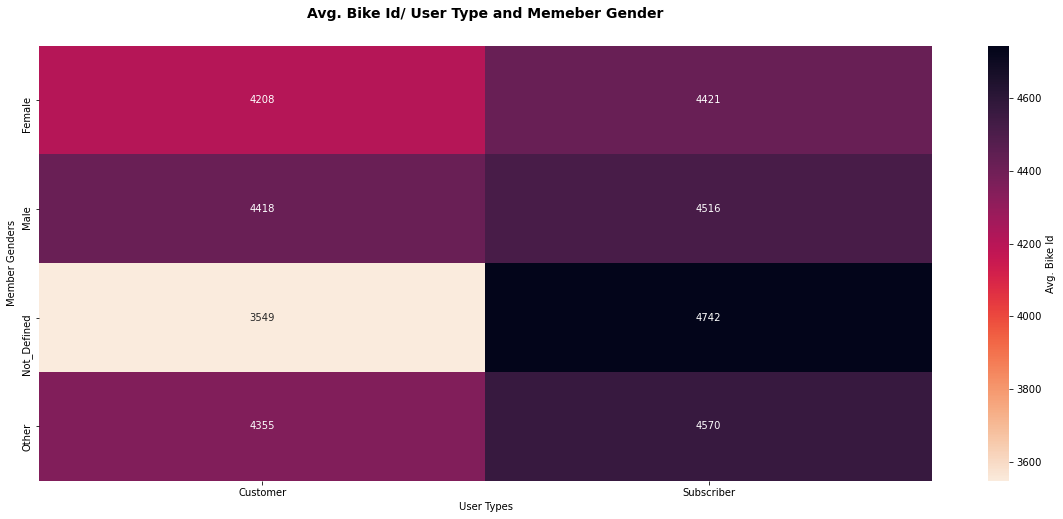

In [212]:
# plot Heat Map for User Type and Member Gender vs. Bike Id
plt.figure(figsize =[20, 8])

# filter categorical variables by numeric variable
cat_means = df.groupby(['user_type', 'member_gender']).mean()['bike_id']
# index and order variables
cat_means = cat_means.reset_index(name = 'bike_id')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type', values = 'bike_id')
# plot heat manp
sb.heatmap(cat_means, annot = True, fmt = '.0f', cmap='rocket_r', cbar_kws = {'label':'Avg. Bike Id'})
plt.xlabel('User Types')
plt.ylabel('Member Genders')
plt.xticks(rotation=0)
plt.title("Avg. Bike Id/ User Type and Memeber Gender", y=1.05, fontsize=14, fontweight='bold');

### Insights: 
> Avg. Bike Id per user type and member gender can be summarized as follows:
> - 1. Avg. bike id for all genders and customer user type ranges from 3549 to 4418.
> - 1. Avg. bike id for all genders and subscriber user type ranges from 4421 to 4742.

## 6. Plotting Many Variables 

### 6.1 User Type and Member Gender vs. numeric variables

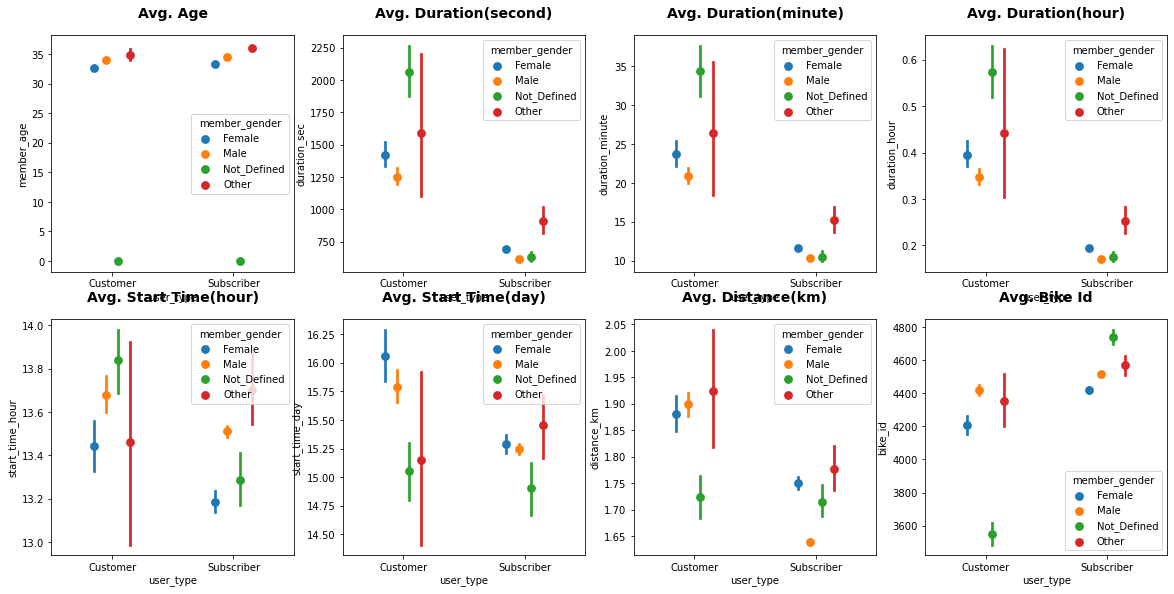

In [213]:
# plot point plot for User Type and Member Gender vs. numeric variables: 
# Member Age, Durations in Seconds, Minutes, and Hours, Ride Start and End Times in Hour and Day,
# Ride Distance(km), and Bike Id

# figure size
plt.figure(figsize = [ 20,20])

# POINT PLOT ON LEFT, ROW 1: Avg. Age/User Type and Memeber Gender
plt.subplot(4,4,1)
ax = sb.pointplot(data = df, x = 'user_type', y = 'member_age', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Age", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON LEFT, ROW 1: Avg. Durations(second)/User Type and Memeber Gender
plt.subplot(4,4,2)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(minute)/User Type and Memeber Gender
plt.subplot(4,4,3)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_minute', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(hour)/User Type and Memeber Gender
plt.subplot(4,4,4)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_hour', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(hour)/User Type and Memeber Gender
plt.subplot(4,4,5)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_hour', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(day)/User Type and Memeber Gender
plt.subplot(4,4,6)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_day', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Distance(km)/User Type and Memeber Gender
plt.subplot(4,4,7)
ax = sb.pointplot(data = df, x = 'user_type', y = 'distance_km', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Bike Id/User Type and Memeber Gender
plt.subplot(4,4,8)
ax = sb.pointplot(data = df, x = 'user_type', y = 'bike_id', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Bike Id", y=1.05, fontsize=14, fontweight='bold');


### Insights:
> - Avg. member ages per subscriber genders is higher than those of customers.
> - Avg. durations per customer genders is higher than those of subscribers.
> - Avg. start time hour and day per customer genders are higher than those of subscriber, except for the other gender as its average start time hour and day per subscriber are higher than those of customer.
> - Avg. distance(km) per customer genders is higher than those of subscribers.
> - Avg. bike id per subscriber genders is higher than those of subscribers.

### 6.2 User Type and Weekday vs. numeric variables

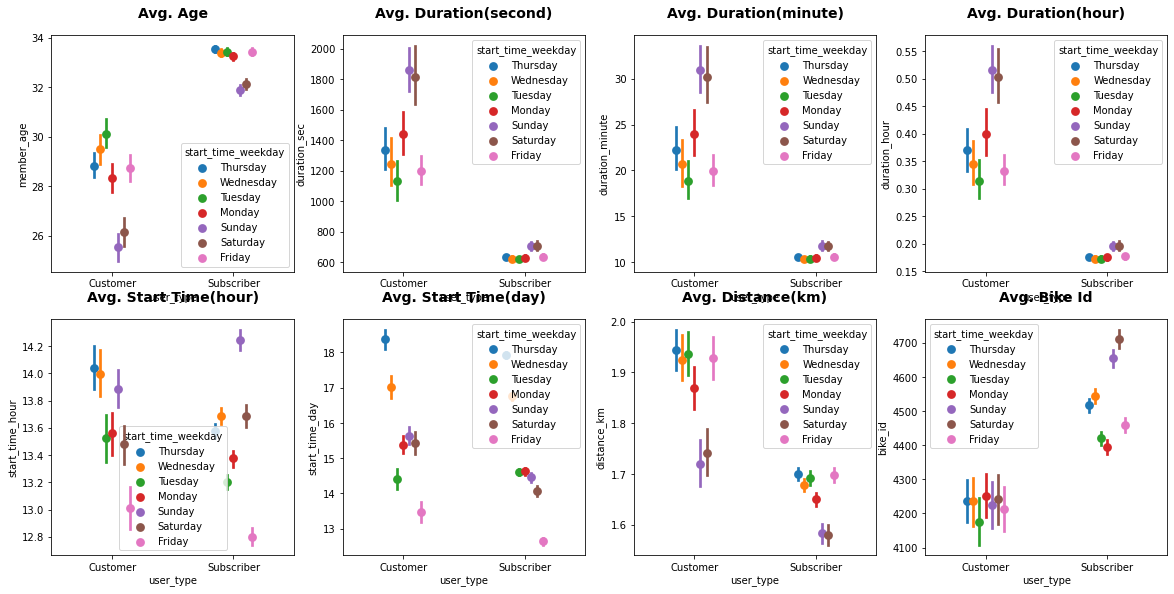

In [214]:
# plot point plot for User Type and Satart Time Weekday vs. numeric variables:
# Member Age, Durations in Seconds, Minutes, and Hours,
# Ride Start and End Times in Hour and Day, Ride Distance(km), and Bike Id

# figure size
plt.figure(figsize = [ 20,20])

# POINT PLOT ON LEFT, ROW 1: Avg. Age/User Type and Start Time Weekday 
plt.subplot(4,4,1)
ax = sb.pointplot(data = df, x = 'user_type', y = 'member_age', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Age", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON LEFT, ROW 1: Avg. Durations(second)/User Type and Start Time Weekday 
plt.subplot(4,4,2)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(minute)/User Type and Start Time Weekday 
plt.subplot(4,4,3)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_minute', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(hour)/User Type and Start Time Weekday 
plt.subplot(4,4,4)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_hour', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(hour)/User Type and Start Time Weekday 
plt.subplot(4,4,5)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_hour', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(day)/User Type and Start Time Weekday 
plt.subplot(4,4,6)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_day', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Distance(km)/User Type and Start Time Weekday 
plt.subplot(4,4,7)
ax = sb.pointplot(data = df, x = 'user_type', y = 'distance_km', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Bike Id/User Type and Start Time Weekday 
plt.subplot(4,4,8)
ax = sb.pointplot(data = df, x = 'user_type', y = 'bike_id', hue = 'start_time_weekday',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Bike Id", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Avg. member ages per subscriber weekdays is higher than those of customers.
> - Avg. durations per customer weekdays is higher than those of subscribers.
> - Avg. start time hour per customer weekdays are higher than those of subscriber, except for saturday and sunday as their average start time hour per subscriber are higher than those of customer.
> - Avg. start time day per customer weekdays are higher than those of subscriber, except for tuesday as its average start time day per subscriber are higher than that of customer.
> - Avg. distance(km) per customer weekdays is higher than those of subscribers.
> - Avg. bike id per subscriber weekdays is higher than those of subscribers.

### 6.3 User Type and Bike Share Status vs. numeric variables

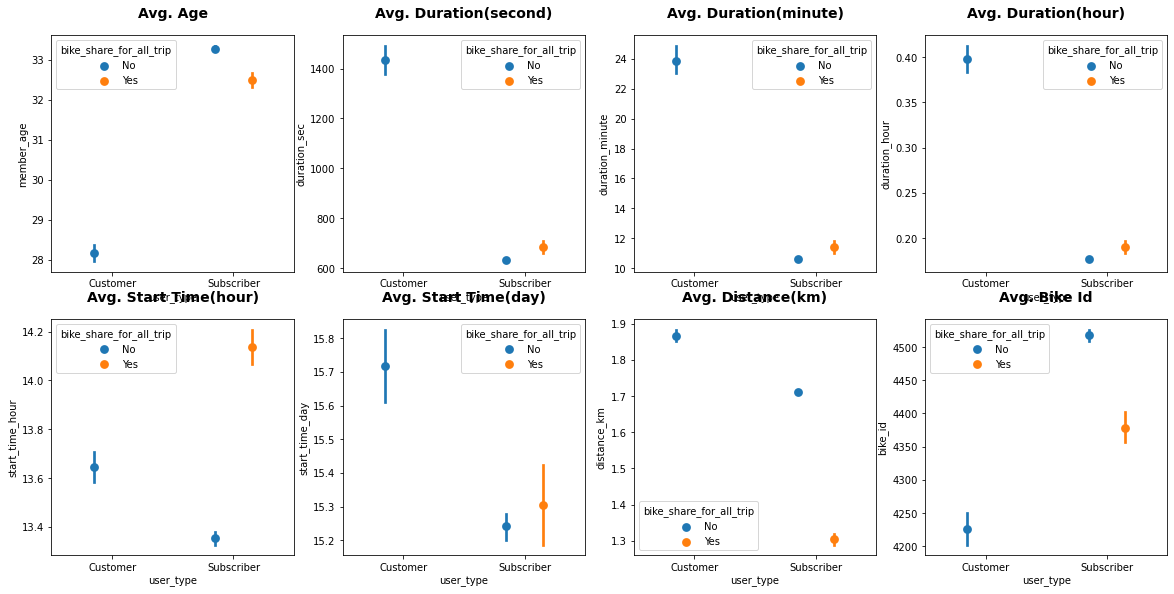

In [215]:
# plot point plot for User Type and Bike Share Status vs. numeric variables:
# Member Age, Durations in Seconds, Minutes, and Hours,
# Ride Start and End Times in Hour and Day, Ride Distance(km), and Bike Id

# figure size
plt.figure(figsize = [ 20,20])

# POINT PLOT ON LEFT, ROW 1: Avg. Age/User Type and Bike Share Statusy 
plt.subplot(4,4,1)
ax = sb.pointplot(data = df, x = 'user_type', y = 'member_age', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Age", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON LEFT, ROW 1: Avg. Durations(second)/User Type and Bike Share Status 
plt.subplot(4,4,2)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(second)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(minute)/User Type and Bike Share Status
plt.subplot(4,4,3)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_minute', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(minute)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Durations(hour)/User Type and Bike Share Status
plt.subplot(4,4,4)
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_hour', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Duration(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(hour)/User Type and Bike Share Status
plt.subplot(4,4,5)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_hour', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(hour)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Start Time(day)/User Type and Bike Share Status
plt.subplot(4,4,6)
ax = sb.pointplot(data = df, x = 'user_type', y = 'start_time_day', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Start Time(day)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Distance(km)/User Type and Bike Share Status
plt.subplot(4,4,7)
ax = sb.pointplot(data = df, x = 'user_type', y = 'distance_km', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Distance(km)", y=1.05, fontsize=14, fontweight='bold');

# POINT PLOT ON RIGHT, ROW 1: Avg. Bike Id/User Type and Bike Share Status
plt.subplot(4,4,8)
ax = sb.pointplot(data = df, x = 'user_type', y = 'bike_id', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title("Avg. Bike Id", y=1.05, fontsize=14, fontweight='bold');

### Insights:
> - Avg. member ages per subscriber who shares/doesn't share bikes is higher than those of customers. Customers don't share bikes.
> - Avg. durations per customer who doesn't share bikes is higher than those of subscriber shares/doesn't share bikes.
> - Avg. start time hour per customer who doesn't share bikes are higher than that of subscriber who doesn't share bikes but it is lower than average start time hour of subscribers who share bikes.
> - Avg. start time day per customer who doesn't share bikes are higher than that of subscriber who share/doesn't share bikes.
> - Avg. distance(km) per customer who doesn't share bikes are higher than that of subscriber who shares/doesn't share bikes.
> - Avg. bike id per subscriber who shares/doesn't share bikes is higher than that of customer who doesn't share bikes.

## Question 1: Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of categorical variables including user type, member gender, ride weekday, age groups, ride stations/city, and bike share against numeric variables including ride durations, ride times, member age, distance(km) and bike id. My goal is to explore how these factors impact the usage of GoBike service and how they correlate to one another. So, let's explore multiple variavle relationships as follows:

## 1. Correlation Matrix for Numeric Variables:
> - Mumeric variables have very weak correlations, either positive or negative, or some variables have neutral correlation.

## 2. Two Categorical Variables and One Third Numeric Variable

### User Types and Member Gender vs. Durations (second, minute, and hour):
>- Avg. duration(second) for customers(1432 seconds) is higher than that of subscriber(640 seconds).
> - Avg. duration(second) for Not-defined gender(1189 seconds) is higher than that of Other gender(997 seconds), Females(779 seconds), and Males(673 seconds).
> - Avg. duration(minute) for customers(24 minutes) is higher than that of subscriber(11 minutes).
> - Avg. duration(minute) for Not-defined gender(20 minutes) is higher than that of Other gender(17 ninutes), Females(13 minutes), and Males(11 minutes).
> - Avg. duration(hour) for customers(0.4 hour) is higher than that of subscriber(0.18 hour).
> - Avg. duration(hour) for Not-defined gender(0.33 hour) is higher than that of Other gender(0.28 hour), Females(0.22 hour), and Males(0.19 hour).
### User Types and Member Gender vs. Start and End Time Hours and Days:
> - Avg. Start time(hour) for Subscriber(1.4 PM) is earlier than that of Customer(1.6 PM).
> - Avg. Start time(hour) for Female gender (1.2 PM) is earlier than that of Not-defined(1.5 PM), Male (1.52 PM), and Other(1.7 PM).
> - Avg. End time(hour) for Subscriber(1.6 PM) is earlier than that of Customer(1.9 PM).
> - Avg. End time(hour) for Female gender (1.4 PM) is earlier than that of Male (1.7 PM), Not-defined(1.72 PM),  and Other(1.8 PM).
> - Avg. Start time(day) for Subscriber(day 15) is earlier than that of Customer(day 16).
> - Avg. End time(day) for is same (day 15) for all genders.
### User Types and Member Gender vs. Member Age, Trip Distance(km), and Bike Ids:
> - Avg. age for Subscriber(33 years) is higher than that of Customer(28 years).
> - Avg. age for Other gender (36 years) is higher than both Male(34 years) and Female(33 years).
> - Avg. distance(km) for customers (1.9km) is higher than that of subscribers(1.7km).
> - Avg. distance(km) for Other gender(1.9km) is higher than that of Female(1.77km), Not-defined(1.72km), and Male(1.66km).
> - Avg. most used bike id for Subscriber(4503) is higher than that of Customer(4226).
> - Avg. most used bike id for Other gender(4543) is higher than that of Male(4507), Female(4397), and Not-defined(4275).
### Start and End Weekday vs. Durations (second, minute, and hour):
> - Avg. Duration(second) for start weekend days(903-920 seconds) is higher than that of working days(663-713 seconds).
> - Avg. Duration(second) for end weekend days(885-931 seconds) is higher than that of working days(663-714 seconds).
> - Avg. Duration(minute) for start weekend days(15-15.3 minutes) is higher than that of working days(11-11.9 minutes).
> - Avg. Duration(minute) for end weekend days(14-15.5 minutes) is higher than that of working days(11-11.9 minutes).
> - Avg. Duration(hour) for start weekend days(0.25-0.26 hour) is higher than that of working days(0.18-0.20 hour).
> - Avg. Duration(hour) for end weekend days(0.25-0.26 hour) is higher than that of working days(0.18-0.20 hour).
### Start and End Weekday vs. Start and End Time Hours and Days
> - Avg. Start Time(hour) for working day (12.8-1.7 PM) is earlier than that of weekend days(1.7-2.3 PM) .
> - Avg. End Time(hour) for working day (1-1.9 PM)is earlier than that of weekend days(1.8-2.3 PM) .
> - Avg. Start and End Time(day) for working day (day day 12-17) is earlier than that of weekend days(14-15).
### Start and End Weekday vs. Member Age, Trip Distance(km), and Bike Ids:
> - Avg. Member Age for start & end weekend day (30-31 years) is younger than that of working days(31-33 years)
> - Avg. Distance(km) for start & end working day (1.7-1.72km) is higher than that of weekend days(1.6km)
> - Avg.Bike Id for start & end weekend days(4575-4628) is higher than that of working day (4400-4518).
### Bike Share Status and Age Groups vs. Durations (second, minute, and hour):
> - Avg. Duration(second) for non-shared bikes during the ride(730 seconds) is higher than that of shared bikes(684 seconds).
> - Avg. Duration(second) for age group 60-70 (764 seconds) is higher than other groups(626-736 seconds). The middle groups 18-60 has average of 689-736 seconds and the lower age group is 70-140(626 seconds).
Avg. Duration(minute) for non-shared bikes during the ride(12 minutes) is higher than that of shared bikes(11 minutes).
> - Avg. Duration(minute) for age group 60-70 (12.73 minutes) is higher than other groups(10.4-12.26 minutes). The middle groups 18-60 has average of 11.5-12.27 minutes and the lower age group is 70-140(10.4 minutes).
> - Avg. Duration(hour) for non-shared bikes during the ride(0.20 hour) is higher than that of shared bikes(0.19 hour).
> - Avg. Duration(hour) for age group 60-70 (0.21 hour) is higher than other groups(0.17-0.20 hour). The middle groups 18-60 have an average of 0.19-0.20 hour and the lower age group is 70-140(0.17 hour).
### Bike Share Status and Age Groups vs. Start and End Time Hours and Days:
> - Avg. Start Time(hour) for non-shared bikes(1.4 PM) is earlier than that of shared bikes(2.1 PM).
> - Avg. End Time(hour) for non-shared bikes(1.5 PM) is earlier than that of shared bikes(2.3 PM).
> - Avg. Start Time(hour) for age group 70-141(12.82 PM) is earlier than other age groups(12.87 PM-2.4 PM). The middle groups 20-70 has average of 12.9 PM-1.75 PM and the lower age group is 18-20(2.4 PM).
> - Avg. End Time(hour) for age group 70-141(1 PM) is earlier than other age groups(1.05 PM-2.5 PM). The middle groups 20-70 has average of 1.05 PM-1.9 PM and the lower age group is 18-20(2.5 PM).
> - Avg. Start and End Time(day) for both non-shared bikes and shared bikes is day 15.
> - Avg. Start and End Time(day) for age groups 18-70 is day 15 and for age group 70-141 is day 17.
### Bike Share Status and Age Groups vs. Member Age, Trip Distance(km), and Bike Ids:
> - Avg. Member Age for non-shared bikes is 33 years and  for shared bikes is 32 years.
> - Avg.  Distance(km) for non-shared bikes is 1.7km and for shared bikes is 1.3km.
> - Avg.  Distance(km) for age group 30-40 (1.8km) is higher than other age groups(1.3km-1.7km). The middle age groups(18-20 & 20-30 & 70-141) have an average distance of 1.5km-1.7km and the lower age group 18-20 has an average distance of 1.3km. 
> - Avg. Bike Id for snon-shared bikes(4483) is higher than that of shared bikes(4379).
> - Avg. Bike Id for age group 30-40(4520) is higher than other age groups(4090-4517). The middle age groups(18-30 & 40-141) have an average bike id of 4090-4517 and the lower age group 60-70 has an average bike id of 4090. 

## 3. Three Numeric Variables
### Member Age and Ride Distance(km) vs. Ride Start and End Times in Hours and Days:
> - There is a negative coorelation between member age and distance(km) based on start and end time hours and days: as member age increases, the distance decreases.
###  Member Age and Ride Distance(km) vs. Durations in Seconds, Minutes, and Hours:
> - There is a negative coorelation between member age and distance(km) based on duration: as member age increases, the distance over durations in seconds, minutes, and hours decreases.
### Member Age and Ride Distance(km) vs. Bike Id:
> - There is a a negative coorelation between member age and distance(km) based on bike id: as member age increases, the distance over bike ids decreases.
## 4. Two Numeric Variables vs. One Categorical Variable
### Member Age and Ride Distance(km) vs. User Type:
>- There is a negative coorelation between member age and distance(km) based on user type: as member age increases, the distance for both subscribers and customers decreases.
### Member Age and Ride Distance(km) vs. Member Gender:
> - There is a negative coorelation between member age and distance(km) based on member gender: as member age increases, the distance for both male, female and other genders decreases.
### Member Age and Ride Distance(km) vs. Age Groups:
> - There is a negative coorelation between member age and distance(km) based on age group: as member age increases, the distance for age groups decreases.
### Member Age and Ride Distance(km) vs. Ride Start and End Weekdays:
> - There is a negative coorelation between member age and distance(km) based on start and end time weekdays: as member age increases, the distance for weekdays decreases.
### Member Age and Ride Distance(km) vs. Bike Share Status:
> - There is a negative coorelation between member age and distance(km) based on bike shar status: as member age increases, the distance for both shared or non-shared bikes decreases.
## 5. One Categorical Variable and Two Numeric Variables
### Member Age and Ride Distance(km) vs. User Type: San Fransisco, Oakland-Berkeley, and San Jose Stations
>- There is a negative coorelation between member age and distance(km) based on user types of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for user types in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations is <10km but <4km for San Jose stations.
> -The dominant user type in all stations is Subscriber.
### Member Age and Ride Distance(km) vs. Member Gender: San Fransisco, Oakland-Berkeley, and San Jose Stations
>- There is a negative coorelation between member age and distance(km) based on member genders of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for all member genders in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations is <10km but <4km for San Jose stations. 
### Member Age and Ride Distance(km) vs. Bike Share Status: San Fransisco, Oakland-Berkeley, and San Jose Stations
>- There is a negative coorelation between member age and distance(km) based on Bike Share Status of San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the distance for bike share in all stations decreases.
> - Most of distance for San Fransisco & Oakland-Berkeley stations <10km but <4km for San Jose stations. 
> -The dominant bike share status in all stations is non-shared.
###  Member Age and Duration vs. Ride Weekday: San Fransisco, Oakland-Berkeley, and San Jose Stations
> - There is a negative coorelation between member age and duration based on weekday in San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the duration in all stations decreases.
### Member Age and Weekdays vs. Start Time Hour: San Fransisco, Oakland-Berkeley, and San Jose Stations
> - There is a positive coorelation between member age and start time hour based on weekday in San Fransisco, Oakland-Berkeley, and San Jose stations: as member age increases, the start time hour in all stations increases.
## 6. Two Categorical Variables vs. One Numeric Variable
### User Type and Member Gender vs. Member Age:
> Avg. member age per user type and member gender can be summarized as follows:
> - 1. Female gender is the youngest gender( 33 year for customer and subscriber user type).
> - 2. Male gender is middle age( 34 years for customers and 35 for subscribers).
> - 3. Other gender is the eldest gender( 35 years for customers and 36 years for subscriber).
### User Type and Member Gender vs. Distance(km):
> Avg. distance(km) per user type and member gender can be summarized as follows:
> - 1. Female, male and other genders are the highest genders in distance(km)(1.9km for customers and 1.8km for subscribers(just females and others)).
> - 2. Not-defined gender is has average distance of 1.7km for both customer and subscriber user types.
> - 3. Male gender is has the lowest distance for subscriber user type(1.6km).
### User Type and Member Gender vs. Durations in Seconds, Minutes, and Hours:
> Avg. Durations per user type and member gender can be summarized as follows:
> - 1. Customers have higher duration(second) for all genders(1254-2062 seconds) than subscribers'(216-912 seconds).
> - 2. Customers have higher duration(minute) for all genders(20.9-34.4 minutes) than subscribers'(10.3-15.2 minutes).
> - 3. Customers have higher duration(hour) for all genders(0.3-0.6 hour) than subscribers'(0.2-0.3 hour).
### User Type and Member Gender vs. Start Time Hour and Day:
> Avg. start time hour and day per user type and member gender can be summarized as follows:
> - 1. Avg. start time hour for all genders and user types is 1 PM-2 PM.
> - 2. Avg. start time day for all genders and user types is 15-16.
### User Type and Member Gender vs. Bike Id:
> Avg. Bike Id per user type and member gender can be summarized as follows:
> - 1. Avg. bike id for all genders and customer user type ranges from 3549 to 4418.
> - 1. Avg. bike id for all genders and subscriber user type ranges from 4421 to 4742.
## 7. Many Variables
### User Type and Member Gender vs. All Numeric Variables:
> - Avg. member ages per subscriber genders is higher than those of customers.
> - Avg. durations per customer genders is higher than those of subscribers.
> - Avg. start time hour and day per customer genders are higher than those of subscriber, except for the other gender as its average start time hour and day per subscriber are higher than those of customer.
> - Avg. distance(km) per customer genders is higher than those of subscribers.
> - Avg. bike id per subscriber genders is higher than those of subscribers.
### User Type and Weekday vs. All Numeric Variables:
> - Avg. member ages per subscriber weekdays is higher than those of customers.
> - Avg. durations per customer weekdays is higher than those of subscribers.
> - Avg. start time hour per customer weekdays are higher than those of subscriber, except for saturday and sunday as their average start time hour per subscriber are higher than those of customer.
> - Avg. start time day per customer weekdays are higher than those of subscriber, except for tuesday as its average start time day per subscriber are higher than that of customer.
> - Avg. distance(km) per customer weekdays is higher than those of subscribers.
> - Avg. bike id per subscriber weekdays is higher than those of subscribers.
### User Type and Bike Share Status vs. All Numeric Variables:
> - Avg. member ages per subscriber who shares/doesn't share bikes is higher than those of customers. Customers don't share bikes.
> - Avg. durations per customer who doesn't share bikes is higher than those of subscriber shares/doesn't share bikes.
> - Avg. start time hour per customer who doesn't share bikes are higher than that of subscriber who doesn't share bikes but it is lower than average start time hour of subscribers who share bikes.
> - Avg. start time day per customer who doesn't share bikes are higher than that of subscriber who share/doesn't share bikes.
> - Avg. distance(km) per customer who doesn't share bikes are higher than that of subscriber who shares/doesn't share bikes.
> - Avg. bike id per subscriber who shares/doesn't share bikes is higher than that of customer who doesn't share bikes.


## Question 2: Were there any interesting or surprising interactions between features?
Some interesting or surprising interactions may include:

> - Most of numeric variables have very weak correlations, except for start time hour and end time hour: they have very strong correlation (0.98).
> - In general, there is a negative correlation between member age and distance(km) based on start and end time hours, between member age and distance(km) based on duration, between member age and distance(km) based on user type, between member age and distance(km) based on member gender,  between member age and distance(km) based on age group, between member age and distance(km) based on start and end time weekdays, and between member age and distance(km) based on bike shar status.
> - Moreover, there is a negative correlation in San Fransisco, Oakland-Berkeley, and San Jose stations between member age and distance(km) based on user types, between member age and distance(km) based on member genders, between member age and distance(km) based on Bike Share Status, between member age and duration based on weekday, and between member age and start time hour based on weekday.
> -  Member age and distance(km) have a negative correlation with start and end time hour and bike id has a negative correlation with durations and member age. Other numeric variables hav a very weak or even neutral correlation.
> - Despite subscribers constitute 89% of total rides, avg. duration(second) for customers(1432 seconds) is higher than that of subscriber(640 seconds). Also, avg. duration(minute) for customers(24 minutes) is higher than that of subscriber(11 minutes). More interesting, avg. duration(hour) for customers(0.4 hour) is higher  than and roughly double that of subscriber(0.18 hour).
> - Customers have higher duration(minute) for all genders(20.9-34.4 minutes) than subscribers'(10.3-15.2 minutes). Similarly, Customers have higher duration(hour) for all genders(0.3-0.6 hour) than subscribers'(0.2-0.3 hour).
> Females' avg. duration(second)(779 seconds) are higher in duration than that of Males(673 seconds), Females' avg. duration(minute)(13 minutes) is also higher than that of Males(11 minutes). More interesting, Females' duration(hour)(0.22 hour) is higher than that of Males(0.19 hour).
> - Avg. start time hour for all genders and user types is 1PM-2PM.
> - Avg. start time day for all genders and user types is 15-16.
> - Avg. start time(hour) for Subscriber(1.4 PM) is earlier than that of Customer(1.6 PM) and avg. end time(hour) for Subscriber(1.6 PM) is earlier than that of Customer(1.9 PM).
> - Avg. age for Subscriber(33 years) is higher than that of Customer(28 years).
> - Avg. age for Male(34 years) is higher than that of Female(33 years).
> - Avg. distance(km) for customers (1.9km) is higher than that of subscribers(1.7km).
> - Avg. distance(km) for Female(1.77km) is higher than that of Male(1.66km).
> - Avg. Duration(second) for start weekend days(903-920 seconds) is higher than that of working days(663-713 seconds).
> - Avg. Duration(minute) for start weekend days(15-15.3 minutes) is higher than that of working days(11-11.9 minutes).
> - Avg. Duration(hour) for start weekend days(0.25-0.26 hour) is higher than that of working days(0.18-0.20 hour).
> - Avg. Start Time(hour) for working day (12.8-1.7 PM) is earlier than that of weekend days(1.7-2.3 PM) .
> - Avg. Member Age for start & end weekend day (30-31 years) is younger than that of working days(31-33 years)
> - Avg. Distance(km) for start & end working day (1.7-1.72km) is higher than that of weekend days(1.6km)
> - Avg. Duration(minute) for age group 60-70 (12.73 minutes) is higher than other groups(10.4-12.26 minutes). The middle groups 18-60 has average of 11.5-12.27 minutes and the lower age group in duration is 70-140(10.4 minutes).
> - Avg. Duration(hour) for age group 60-70 (0.21 hour) is higher than other groups(17-20 hour). The middle groups 18-60 have an average of 0.19-0.20 hour and the lower age group is 70-140(0.17 hour).
> - Avg. Start Time(hour) for age group 70-141(12.82 PM) is earlier than other age groups(12.87 PM-2.4 PM). The middle groups 20-70 has average of 12.9 PM-1.75 PM and the lower age group is 18-20(2.4 PM).



<a id='summary'></a>
## Summary
In conclusion, Ford GoBike service dataset for the month of February consists of 183,412 rides and subscriber users have most of the rides at 89% of totoal rides while customers make 11% of the total rides. Findings can be summarized as follows:

> - Durations: Customers have higher duration(minute) for all genders(20.9-34.4 minutes) than subscribers'(10.3-15.2 minutes) and they have higher duration(hour) for all genders(0.3-0.6 hour) than subscribers'(0.2-0.3 hour) and females' duration(hour)(0.22 hour) is higher than that of males(0.19 hour).

> - Start/End Times: Avg. start time(hour) for working day (12.8-1.7 PM) is earlier than that of weekend days(1.7-2.3 PM). Avg. start time hour for all genders and user types is 1PM-2PM. Avg. start time(hour) for subscriber(1.4 PM) is earlier than that of customer(1.6 PM) and avg. start time(hour) for Female gender (1.2 PM) is earlier than that of Male (1.52 PM).

> - Member Age: Avg. age for subscriber(33 years) is higher than that of customer(28 years) and avg. age for males(34 years) is higher than that of females(33 years).

> - Distance: Avg. distance(km) for customers (1.9km) is higher than that of subscribers(1.7km) and avg. distance(km) for females(1.77km) is higher than that of males(1.66km). Avg. distance(km) for start & end working day (1.7-1.72km) is higher than that of weekend days(1.6km)

> - Weekdays: Average duration(minute) for working days(Monday-Friday) ranges from 11.1 to 11.9 minuts while weekend days has an average which ranges between 15 and 15.3 minuts and average duration(hour) for working days(Monday-Friday) ranges from 0.18 to 0.2 hour while weekend days has an average which between 0.25 and 0.26 hour. Average start time (hour) for working days(Monday-Friday) ranges from 12.8 PM to 1.7 PM while weekend days has an average which between 1.7 to 2.2 PM. Average distance(km) for start and end time working days(Monday-Friday) ranges from 1.67km to 1.73km while weekend days has an average of 1.6km.

> - Bike Share: Avg. Duration(minute) for non-shared bikes during the ride(12 minutes) is higher than that of shared bikes(11 minutes). Avg. distance(km) for non-shared bikes is 1.7km and for shared bikes is 1.3km.

> - Age Groups:  Avg. Duration(minute) for age group 60-70 (12.73 minutes) is higher than that other groups(10.4-12.26 minutes). The middle groups 18-60 has average of 11.5-12.27 minutes and the loweest age group is 70-140(10.4 minutes). Avg.  Distance(km) for age group 30-40 (1.8km) is higher than other age groups(1.3km-1.7km). The middle age groups(18-20 & 20-30 & 70-141) have an average distance of 1.5km-1.7km and the lowest age group 18-20 has an average distance of 1.3km. 

> - Stations/City: San Fransisco has 156 stations, Oakland_Berkeley have 127 stations, and San Jose has 47 stations. Avg. number of rides per station in San Fransisco is , in Oakland_Berkeley is 1,480, and in San Jose is 295. Average member age for San Fransisco 's Sations is 33 years old, for Oakland_Berkeley 's Sations is 34 years old, for San Jose 's Sations is 31 years old.
Average duration (hour) for San Fransisco 's sations is 0.23 hour, for Oakland_Berkeley and  San Jose's stations is 0.21 hour. Average distance(km) for San Fransisco 's sations is 1.9km, for Oakland_Berkeley and San Jose 's stations is 1.7km.


<a id='sources'></a>
## Sources
> I have used the following sources in my exploration:
> - [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels) and [BikeShare.cc](https://bikeshare.cc/companies/ford-gobike/#:~:text=Ford%20GoBike%20is%20the%20Bay%20Area%E2%80%99s%20bike%20share,San%20Francisco%2C%20the%20East%20Bay%20and%20San%20Jose.) - Introduction about Ford GoBike.
> - [Github.io](https://hrngok.github.io/posts/missing%20values/) - Handling Missing Values
> - [Github.com](https://gist.github.com/rochacbruno/2883505) - Haversine Formula - Calculate distance between latitude longitude pairs with Python
